In [380]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.transforms as mtrans

In [381]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [382]:
rng = np.random.default_rng()

This notebook uses some lazy coding practices, namely the use of global variables. I apologize.

In [383]:
QOLData_og=pd.read_csv("QOLResponses.csv")
# Columns=QOLData.columns

In [384]:
QOLData=pd.read_csv("QOLResponses.csv")
Columns=QOLData.columns

In [385]:
def explode_Research():
    newQOL = QOLData.copy()
    newQOL = newQOL.assign(Research=newQOL['Research'].str.split(' / ')).explode('Research')
    return newQOL

def explode_Job():
    newQOL = QOLData.copy()
    newQOL = newQOL.assign(Job=QOLData['Job'].str.split(', ')).explode('Job')
    return newQOL

def explode_Race():
    newQOL = QOLData.copy()
    newQOL = newQOL.assign(Race=QOLData['Race'].str.split(' - ')).explode('Race')
    return newQOL

In [386]:
Columns=QOLData.columns
# QOLData = QOLData.assign(Research=QOLData['Research'].str.split(' / ')).explode('Research')
# QOLData = QOLData.assign(Job=QOLData['Job'].str.split(', ')).explode('Job')
# QOLData = QOLData.assign(Race=QOLData['Race'].str.split(' - ')).explode('Race')
# QOLData.reset_index(drop=True,inplace=True)

# A single student might be part of multiple research groups, they are represented as multiple columns for now

for column in Columns:
    if QOLData[column].dtype=='object':
        QOLData[column]=QOLData[column].astype('category')

In [8]:
demographic_columns = ['Program', 'Job', 'Research', 'Gender', 'LGBTQIA+', 'Race','Hispanic']

question_columns = ['Happy', 'Belong', 'Community', 'Degree Requirements', 'Breadth','CM Core Prep Comp', 'EM Core Prep Comp', 'QM1 Core Prep Comp',
        'QM2 Core Prep Comp', 'SM Core Prep Comp', 'CM Core Prep Research','EM Core Prep Research', 'QM1 Core Prep Research',
        'QM2 Core Prep Research', 'SM Core Prep Research', 'Financially Stable','Work Hours per Week', 'Adequate Health Time', 'Health Hours per Week',
        'Adequate Recreation Time', 'Recreation Hours per Week','Department Events', 'PGSA Events','Grad Seminar', 'Grad Astro Lab', 'Workload Impedence',
        'Undergrad Prep Concept', 'Undergrad Prep Math', 'Comp Fair', 'COMP Time Prep','Sleep','Mental Health Rate', 'Physical Health Rate', 'Downtime',
        'Monthly Income', 'Outside Support', 'Necessities percentage','Stipend Financially stable']

In [9]:
VariablesComps=['CM Core Prep Comp', 'EM Core Prep Comp', 'QM1 Core Prep Comp',
        'QM2 Core Prep Comp', 'SM Core Prep Comp', 'CM Core Prep Research','EM Core Prep Research', 'QM1 Core Prep Research',
        'QM2 Core Prep Research', 'SM Core Prep Research','Comp Fair', 'COMP Time Prep']
VariablesCourses=['Degree Requirements', 'Breadth','Grad Astro Lab', 'Workload Impedence','Undergrad Prep Concept', 'Undergrad Prep Math']
VariablesBelong=['Happy', 'Belong', 'Community','Department Events', 'PGSA Events']
VariablesFinances=['Financially Stable','Monthly Income', 'Outside Support', 'Necessities percentage','Stipend Financially stable']
VariablesHealth=['Work Hours per Week', 'Adequate Health Time', 'Health Hours per Week',
        'Adequate Recreation Time', 'Recreation Hours per Week','Sleep','Mental Health Rate', 'Physical Health Rate', 'Downtime']

In [10]:
Questions={'Happy':'I am happy in the department.',
           'Belong':"I feel that I belong here.",
           'Community':'The department provides an adequate sense of community.',
           'Degree Requirements':'I feel the requirements for my degree are reasonable.', 
           'Breadth':'I feel the breadth courses provide a wide variety of topics.',
            'CM Core Prep Comp':'The core courses adequately prepared me for taking the comps. CM',
            'EM Core Prep Comp':'The core courses adequately prepared me for taking the comps. EM', 
            'QM1 Core Prep Comp':'The core courses adequately prepared me for taking the comps. QM1',
            'QM2 Core Prep Comp':'The core courses adequately prepared me for taking the comps. QM2',
            'SM Core Prep Comp':'The core courses adequately prepared me for taking the comps. SM',
            'CM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research CM',
            'EM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research EM',
            'QM1 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 1',
            'QM2 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 2',
            'SM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research SM',
            'Financially Stable':'I feel financially stable.',
            'Work Hours per Week':'How many hours per week you spend on activities related to your program',
            'Adequate Health Time':'I feel I have adequate time to spend on my mental and physical health',
            'Health Hours per Week':'How many hours per week you spend on activities for your mental and physical health.',
            'Adequate Recreation Time':'I feel I have adequate time to spend on recreational activities.',
            'Recreation Hours per Week':'How many hours per week you spend on recreational activities.',
            'Department Events':'The department-wide events help me to connect with my peers and professors.',
            'PGSA Events':'The PGSA events help me to connect with my peers.',
            'Grad Seminar':'I feel the seminar courses help me become better at communicating science research.', 
            'Grad Astro Lab':'I feel the Graduate Lab/Astronomy Lab sufficiently taught me experimental/observational techniques and data analysis.',
            'Workload Impedence':'I feel the workload from my degree requirements impedes \n my ability to take courses more relevant to my research.',
            'Undergrad Prep Concept':'My undergraduate education prepared me for understanding and solving problems conceptually in graduate courses.',
            'Undergrad Prep Math':'My undergraduate education prepared me for understanding and solving problems mathematically in graduate courses.',
            'Comp Fair':'I feel the comprehensive exams are fair tests of the material from the core courses.', 
            'COMP Time Prep':'How much time do/did you spend on average preparing for each comprehensive exam?',
            'Sleep':'How many hours a do you sleep at night?',
            'Mental Health Rate':'How would you rate your mental health?',
            'Physical Health Rate':'How would you rate your physical health?', 
            'Downtime':'I feel there is enough downtime/breaks during the year.',
            'Monthly Income':'How much do you make in monthly income',
            'Outside Support':'Do you hold any positions outside of the department to support yourself?', 
            'Necessities percentage':'What percentage of your income do you spend on necessities ',
            'Stipend Financially stable':'I feel my stipend alone is enough for me to be financially stable.'}

In [11]:
Programs=list(QOLData['Program'].values.unique())
Jobs=list(QOLData['Job'].values.unique())
ResearchAreas=list(QOLData['Research'].values.unique())
Genders=list(QOLData['Gender'].values.unique())
LGBT=list(QOLData['LGBTQIA+'].values.unique())
Races=list(QOLData['Race'].values.unique())
Hispanic=list(QOLData['Hispanic'].values.unique())

In [179]:
# Check how much we have in each demographic column and then make anonymized bins accordingly

for dc in demographic_columns:
    unique_values = list(QOLData[dc].values.unique())
    counts = np.zeros(len(unique_values))
    for i,uv in enumerate(unique_values):
        counts[i] = np.sum(QOLData[dc]==uv)
    print(f"In {dc} we have counts {counts} with values {unique_values}")

In Program we have counts [23. 55. 23.] with values ['PhD Candidate', 'PhD Student', 'Masters Degree']
In Job we have counts [55.  9.  7. 24.  3.  2.  1.] with values ['Research Assistant or Graduate Assistant', 'Other', 'Not Paid', 'Teaching Assistant', 'Teaching Assistant, Other', 'Teaching Assistant, Research Assistant or Graduate Assistant', 'Research Assistant or Graduate Assistant, Other']
In Research we have counts [ 6.  7. 19.  7.  9.  1.  1.  9. 11.  3.  4.  1.  3.  3.  7.  2.  1.  3.
  1.  1.  1.  1.] with values ['Condensed Matter - Theory', 'High Energy Physics - Neutrino and Nucleon Decay Group', 'Astronomy', 'Phenomenology', 'Formal Theory', 'Astronomy / Atomic, Molecular and Optical (AMO) Physics', 'Atomic, Molecular and Optical (AMO) Physics / Condensed Matter - Experiment', 'Atomic, Molecular and Optical (AMO) Physics', 'Nuclear Experiment', 'High Energy Physics - Hadron Collider Group', 'Atomic, Molecular and Optical (AMO) Physics / Quantum Information Science and Tec

In [278]:
# Re-binning in order to get at least 9 in each category (aside from Research group)

# Each category is binned from smallest to largest until we have at least 9 in the aggregate bin

Anonymous_Programs = [['Masters Degree'], ['PhD Candidate'], ['PhD Student']]
Anonymous_Jobs = [['Teaching Assistant'], ['Research Assistant or Graduate Assistant'], ['Not Paid', 'Other']]
Anonymous_Gender = [['Female'], ['Male'], ['Non-binary', 'Prefer not to answer', 'Trans Woman']]
Anonymous_Race = [['Asian (Including East Asia and the Indian subcontinent)'],
                  ['Prefer not to answer'],
                  ['White (European, Middle Eastern, or North African)'],
                  ['American Indian and Alaska Native',
                   'Black or Sub-Saharan African',
                   'Latin American or South American']]
Anonymous_Hispanic =  [['No'], ['Prefer not to answer','Yes']]

In [295]:
Anonymous_Race = [['White (European, Middle Eastern, or North African)'], 
                  ['Asian (Including East Asia and the Indian subcontinent)'],
                  ['American Indian and Alaska Native',
                   'Black or Sub-Saharan African',
                   'Latin American or South American'],
                  ['Prefer not to answer']]

Anonymous_Gender = [['Male'],
                    ['Female'],
                    ['Non-binary', 'Prefer not to answer', 'Trans Woman']]


In [296]:
#Re-format some fields in order to keep consistent with other anonymized 
#demographic bins

Ano_Research = [[RA] for RA in sorted(ResearchAreas)] 
Ano_LGBT = [[lt] for lt in sorted(LGBT)]

In [297]:
# Put "I am not in research" and "Prefer not to answer" at the end

Ano_Research.pop(-2)
Ano_Research.pop(-5)
Ano_Research.append(['I am not currently involved in research'])
Ano_Research.append( ['Prefer not to answer'])

In [298]:
# Dictionary to get the anonymized categories

anonymous_demo = {'Program': Anonymous_Programs, 'Job':Anonymous_Jobs, 'Research': Ano_Research,
                  'Gender': Anonymous_Gender, 'LGBTQIA+': Ano_LGBT, 'Race': Anonymous_Race, 
                  'Hispanic': Anonymous_Hispanic}

In [299]:
# Get data with anonymized category

def anon_factor(demo_column, factor, ano_bins=None, QOL=QOLData):
    if ano_bins is None:
        ano_bins = anonymous_demo[demo_column]
        
    factor_data = []
    for col_bins in ano_bins:
        anon_factor_data = []
        for anon_col in col_bins:
            anon_factor_data += list(QOL[factor][QOL[demo_column]==anon_col])
        factor_data.append(np.array(anon_factor_data))
    return factor_data

In [300]:
# Create a violin plot
# Not in use...

def violin_plot(data, demo_column, factor, ano_bins=None):
    if ano_bins is None:
        ano_bins = anonymous_demo[demo_column]
        
    xticks = np.arange(len(ano_bins))+1
    fig, ax = plt.subplots(1)
    ax.violinplot(data, showmeans=False, showmedians=True)
    
    ax.set_title(f"{factor} vs {demo_column}", fontsize=16)
    
    tick_lbls = []
    for col_bins in ano_bins:
        col_name = '\n'.join(col_bins)
        tick_lbls.append(col_name)
    ax.set_xticks(xticks, tick_lbls, fontsize=14)
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
    plt.show()
    return ax

In [301]:
def auto_violin_plot(demo_column, factor, fig, ax,
                     ano_bins=None, tick_lbls=None, show=False,
                     rot=90, fontsize=14):
    if ano_bins is None:
        ano_bins = anonymous_demo[demo_column]
        
    data = anon_factor(demo_column, factor, ano_bins)
        
    xticks = np.arange(len(ano_bins))+1
    ax.violinplot(data, showmeans=False, showmedians=True)
    
    ax.set_title(f"{factor} vs {demo_column}", fontsize=20)
    ax.set_ylabel(factor, fontsize=fontsize)    
    
    if tick_lbls is None:
        tick_lbls = []
        for col_bins in ano_bins:
            col_name = '\n'.join(col_bins)
            tick_lbls.append(col_name)
    ax.set_xticks(xticks, tick_lbls, rotation=rot)
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)
    if show: plt.show()
    return 

In [302]:
def auto_box_plot(demo_column, factor, fig, ax,
                  ano_bins=None, tick_lbls=None, rot=90,
                  fontsize=14, show=False):
    if ano_bins is None:
        ano_bins = anonymous_demo[demo_column]
        
    data = anon_factor(demo_column, factor, ano_bins)
        
    xticks = np.arange(len(ano_bins))+1
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.boxplot(data)
        
    ax.set_title(f"{factor} vs {demo_column}", fontsize=20)
    ax.set_ylabel(factor, fontsize=fontsize)
    
    
    if tick_lbls is None:
        tick_lbls = []
        for col_bins in ano_bins:
            col_name = '\n'.join(col_bins)
            tick_lbls.append(col_name)
    ax.set_xticks(xticks, tick_lbls, rotation=rot)
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)
    if show: plt.show()
    return 

In [303]:
# Create a heatmap for a certain question and demographic.
# Bootstrap to create 1sigma confidence intervals
# Used to create the "Belonging" plots

def demo_quest_heatmap(QOL, demo, quest, fig, ax, cmap='cool', show=False,
                       err=True, transpose=False, cbar=False, ano_bins=None, manual_ticks=None):
    if ano_bins is None:
        ano_bins = anonymous_demo[demo]
        
    gb_map = np.zeros((len(ano_bins), len(quest)))
    gb_map_err = np.zeros_like(gb_map)

    # gb_n = np.zeros(len(anonymous_demo[demo]))

    # Gather data based on the demographic filters
    # store mean and bootstrapped confidence interval
    for i,VB in enumerate(quest):
        gb_data = anon_factor(demo, VB, QOL=QOL, ano_bins=ano_bins)
        gb_n = [len(gbd) for gbd in gb_data]
        for j,gbd in enumerate(gb_data):
            gb_map[j,i] = np.mean(gbd)
            if err:
                boot_ci = stats.bootstrap([gbd], np.mean, confidence_level=.68)
                boot_sigma = np.diff(boot_ci.confidence_interval)/2 #Lazy symmetrizing
                gb_map_err[j,i] = boot_sigma[0]
                
    # Format the names to look prettier
    if manual_ticks is None:
        tick_lbls = []
        for col_bins in ano_bins:
            col_name = '\n'.join(col_bins)
            tick_lbls.append(col_name)
    else:
        tick_lbls = manual_ticks
    # Transpose the data now if we want to turn the plot 90 degrees
    if transpose:
        gb_map = gb_map.T
        gb_map_err = gb_map_err.T
    
    # Annotate the cells with the mean and the 1sigma error    
    for i in range(gb_map.shape[0]):
        for j in range(gb_map.shape[1]):
            text = ax.text(j, i, f'{gb_map[i, j]:1.2f}',
                           ha="center", va="center", color="k", fontsize=12)
            if err:
                _ = ax.text(j, i+.2, r'$\pm$' + f'{gb_map_err[i, j]:0.2f}',
                           ha="center", va="center", color="k", fontsize=10)
                
    # Annotate the edge with the number of entries 
    for i, n in enumerate(gb_n):
        if transpose:
            _ = ax.text(i-.2, -.6, f'n={n}', color="black", fontsize=11)
        else:
            _ = ax.text(gb_map.shape[1]-.4, i, f'n={n}', color="black", fontsize=11)
            
    # Plot data and colorbar
    xim = ax.imshow(gb_map, cmap=colormaps.get(cmap), vmin=1, vmax=5)
    if cbar:
        fig.colorbar(xim, pad=0.2)

    # Label relevant axis and ticks
    if transpose:
        ax.set_yticks(np.arange(gb_map.shape[0]), labels=quest,  fontsize=15)
        ax.set_xticks(np.arange(gb_map.shape[1]), tick_lbls, fontsize=15, rotation=-45, ha='left', wrap=True)
        ax.set_xlabel(demo, fontsize=22)
    else:
        ax.set_xticks(np.arange(gb_map.shape[1]), labels=quest, fontsize=15, rotation=-45, ha='left')
        ax.set_yticks(np.arange(gb_map.shape[0]), tick_lbls, fontsize=15)
        ax.set_ylabel(demo, fontsize=22)

    if show: plt.show()
    return

In [304]:
def generic_rating_hist(column, qol, fig, ax, color='blue',
                        legend=True, annotate=True, title=True,
                        mean=True, meanlabel=True, label='',
                        guidelines=True, hatch=''):
    data = qol[column]
    med_data = np.nanmedian(data)
    mean_data = np.nanmean(data)

    ax.hist(data, bins=rbins, alpha=1, density=False,
            histtype='step', linewidth=2.2,color=color, label=label)
    
    ax.hist(data, bins=rbins, alpha=.1, density=False, color=color, hatch=hatch, edgecolor=color)

    # ax.axvline(x=3.5, color='k', ls='--', alpha=.35)
    # ax.axvline(x=med_data+0.5, color=color, ls='-', label=f"Median = {med_data:0.2f}")
    if meanlabel:
        mlabel = f"Mean = {mean_data:0.2f}"
    else:
        mlabel = ""
        
    if mean:
        ax.axvline(x=mean_data+0.5, color=color, ls='-.', label=mlabel)

    if legend:
        ax.legend(frameon=False, bbox_to_anchor=(1.1, .54))
    
    ax.set_xticks(ratings+.5, ratings);
    if guidelines:
        for ll in rbins:
            ax.axvline(ll, color='k', ls='--', alpha=.1)

    if title:
        fig.suptitle(Questions[column])
    if annotate:
        ax.annotate("Strong Disagree", xy=(0,-.1), xycoords='axes fraction')
        ax.annotate("Strong Agree", xy=(.75, -.1), xycoords='axes fraction')
        # ax.annotate("Strong Disagree", xy=(.1,.01), xycoords='figure fraction')
        # ax.annotate("Strong Agree", xy=(.8, .01), xycoords='figure fraction')

    return None

In [305]:
def generic_continuous_hist(column, qol, fig, ax, bins, color='blue',
                        legend=True, annotate=True, title=True,
                        mean=True, meanlabel=True, label='', hatch=''):
    data = qol[column]
    med_data = np.nanmedian(data)
    mean_data = np.nanmean(data)

    ax.hist(data, bins=bins, alpha=1, density=False,
            histtype='step', linewidth=2.2,color=color, label=label)
    
    ax.hist(data, bins=bins, alpha=.1, density=False, color=color, hatch=hatch, edgecolor=color)

    # ax.axvline(x=3.5, color='k', ls='--', alpha=.35)
    # ax.axvline(x=med_data+0.5, color=color, ls='-', label=f"Median = {med_data:0.2f}")
    if meanlabel:
        mlabel = f"Mean = {mean_data:0.2f}"
    else:
        mlabel = ""
        
    if mean:
        ax.axvline(x=mean_data, color=color, ls='-.', label=mlabel)

    if legend:
        ax.legend(frameon=False, bbox_to_anchor=(1.1, .54))
    
    ax.set_xticks(ratings, ratings);

    if title:
        fig.suptitle(Questions[column])
    if annotate:
        ax.annotate("Strong Disagree", xy=(0,-.1), xycoords='axes fraction')
        ax.annotate("Strong Agree", xy=(.75, -.1), xycoords='axes fraction')
        # ax.annotate("Strong Disagree", xy=(.1,.01), xycoords='figure fraction')
        # ax.annotate("Strong Agree", xy=(.8, .01), xycoords='figure fraction')

    return None

In [306]:
def split_QOL(factor, data):
    cutoff = np.mean(data[factor])
    above = data[data[factor]>=cutoff]
    below = data[data[factor]<cutoff]
    return above, below

Most questions are rated on a scale of $1$ to $5$ with $1$ being the *worst* and $5$ being the _best_ option. Neutral corresponds to a score of $3$.

If value$-\sigma > 3$, we comment that the group responds positively. If value$+\sigma < 3$ it responds negatively. If neither are true, the group is neutral.

Note: We are using 1$\sigma$ confidence intervals that are symmetrized so this is not the best way to make statistical claims. We have low sample counts and have rebinned to get at least 9 in a bin (aside from research area).

We use the "coolwarm" colormap which is diverging with neutral corresponding to gray. Red corresponds to above neutral and blue below.

In [307]:
ratings = np.arange(1,6)
rbins = np.arange(1,7)

# Belonging

Do students feel like they belong in the department?

In [308]:
cut_VariablesBelong = VariablesBelong[:3] # Cutting out PGSA and Department Events question since there are so few responses

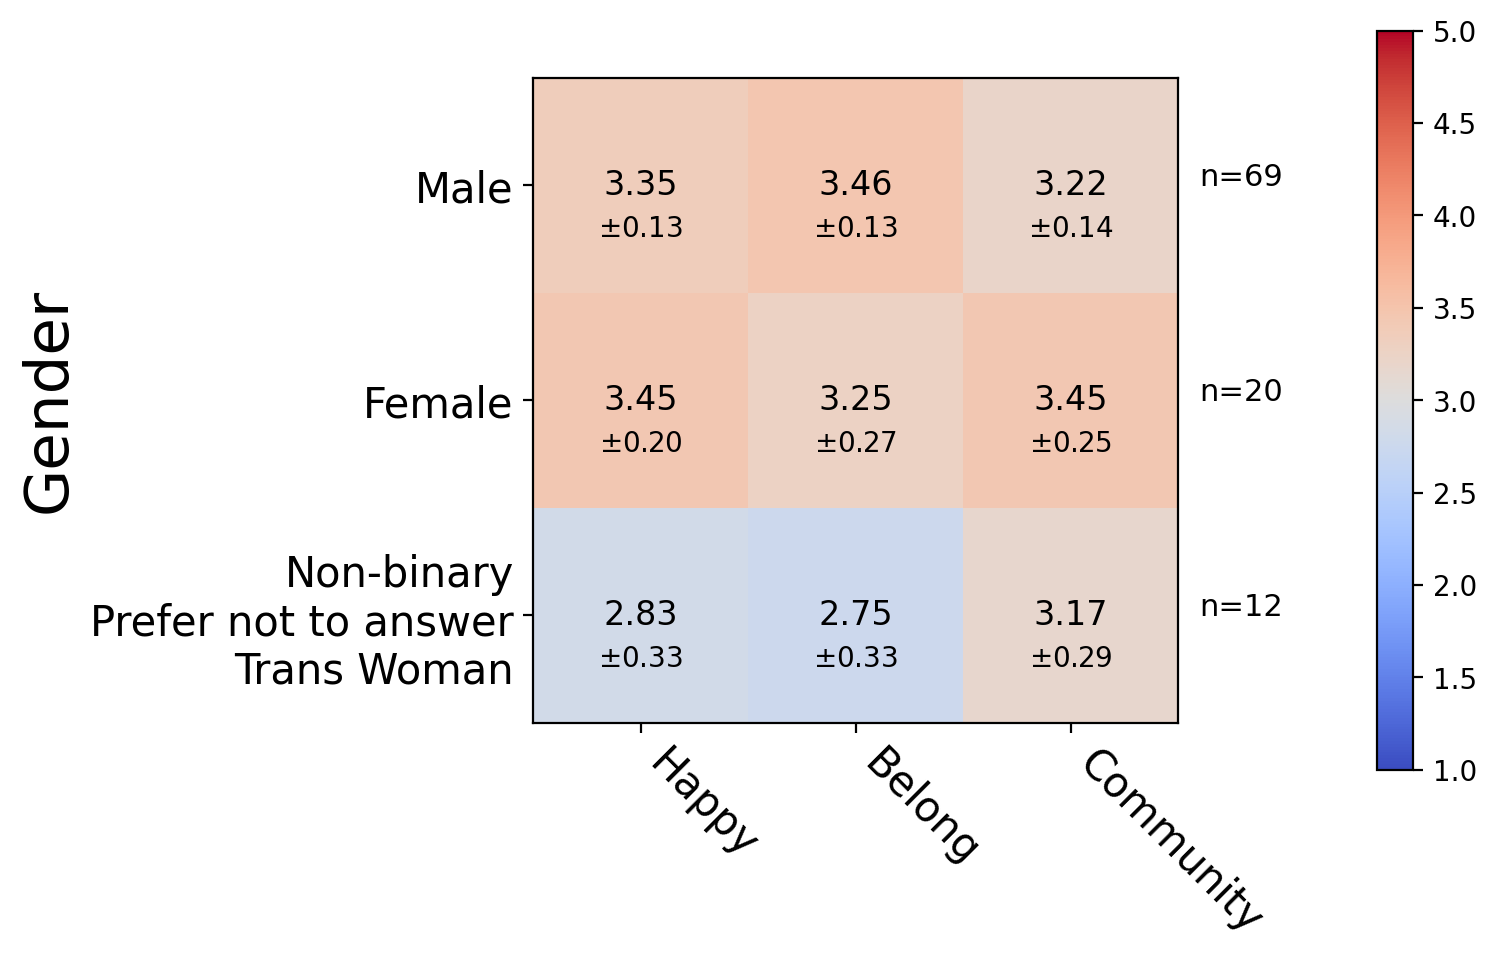

In [309]:
fig, ax = plt.subplots(1)

demo_quest_heatmap(QOLData, "Gender", cut_VariablesBelong, fig, ax, cmap='coolwarm', err=True, cbar=True)

Male and female students respond positively and are $\geq 1\sigma$ from neutral ($3$)

Non-binary / PNA / Trans students are lower across the board and consistent with a neutral response. 

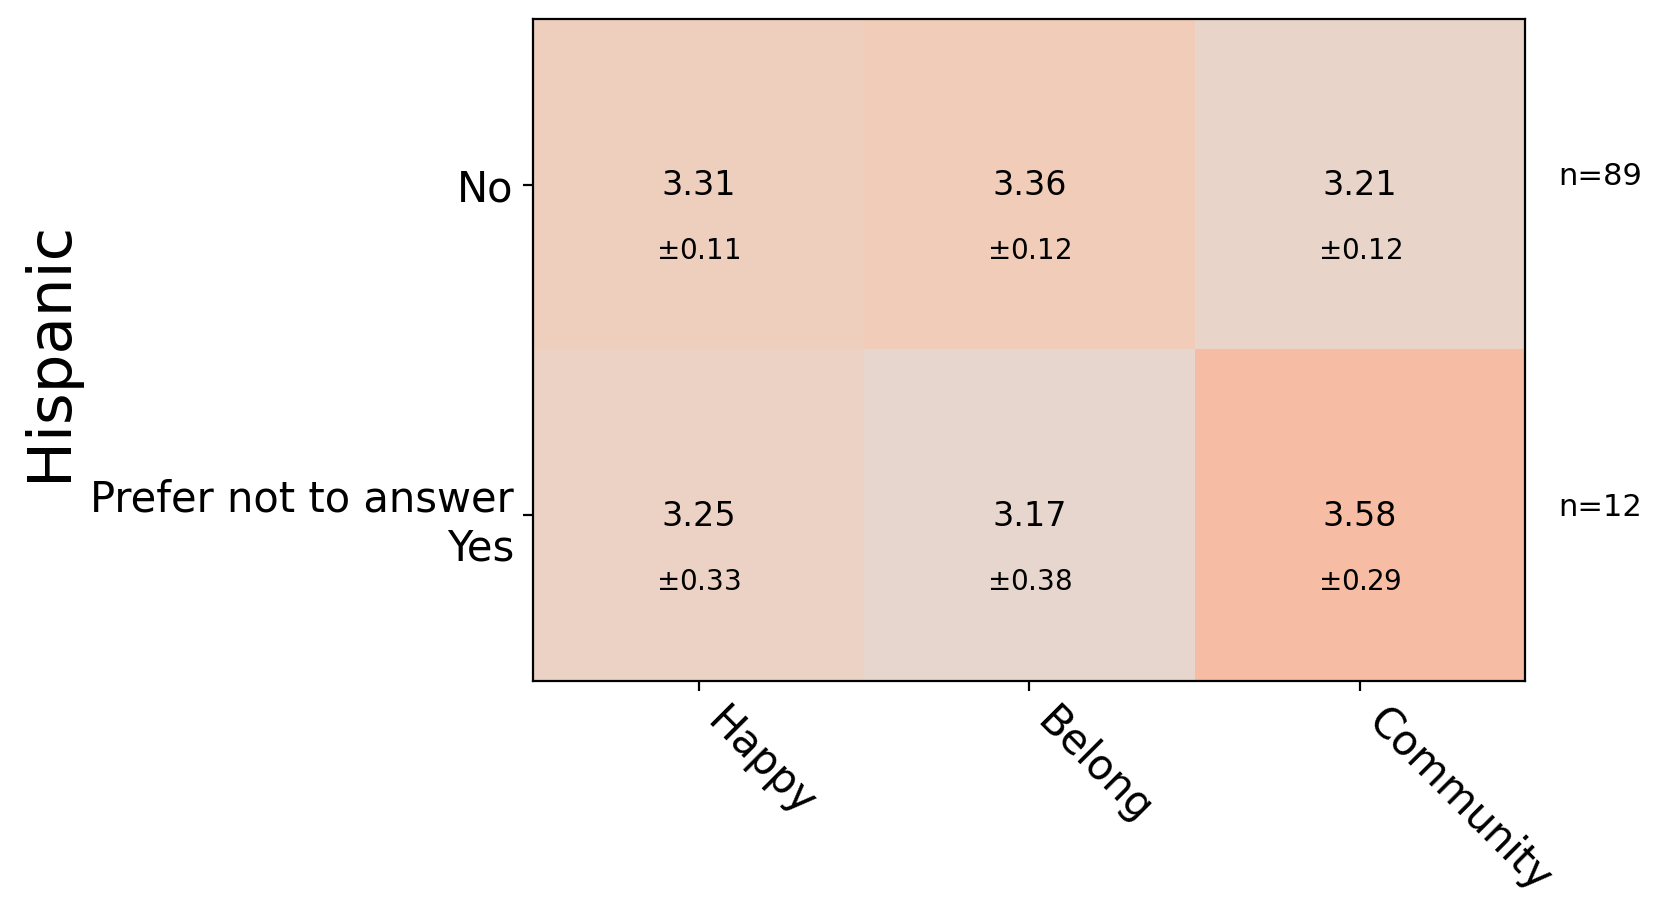

In [294]:
fig, ax = plt.subplots(1)

demo_quest_heatmap(QOLData, "Hispanic", cut_VariablesBelong, fig, ax, cmap='coolwarm', transpose=False)

Non-Hispanic students respond positively and are $\geq 2\sigma$ from neutral

Hispanic / PNA students are consistent with a neutral response in happiness and sense of belonging but respond positively to community.

In [258]:
ano_race_lbls = ['White (European, Middle\n Eastern, or North African)',
                 'Asian (Including East Asia and\n the Indian subcontinent)',
                 'American Indian and Alaska Native\n Black or Sub-Saharan African\n Latin American or South American',
                 'Prefer not to answer']

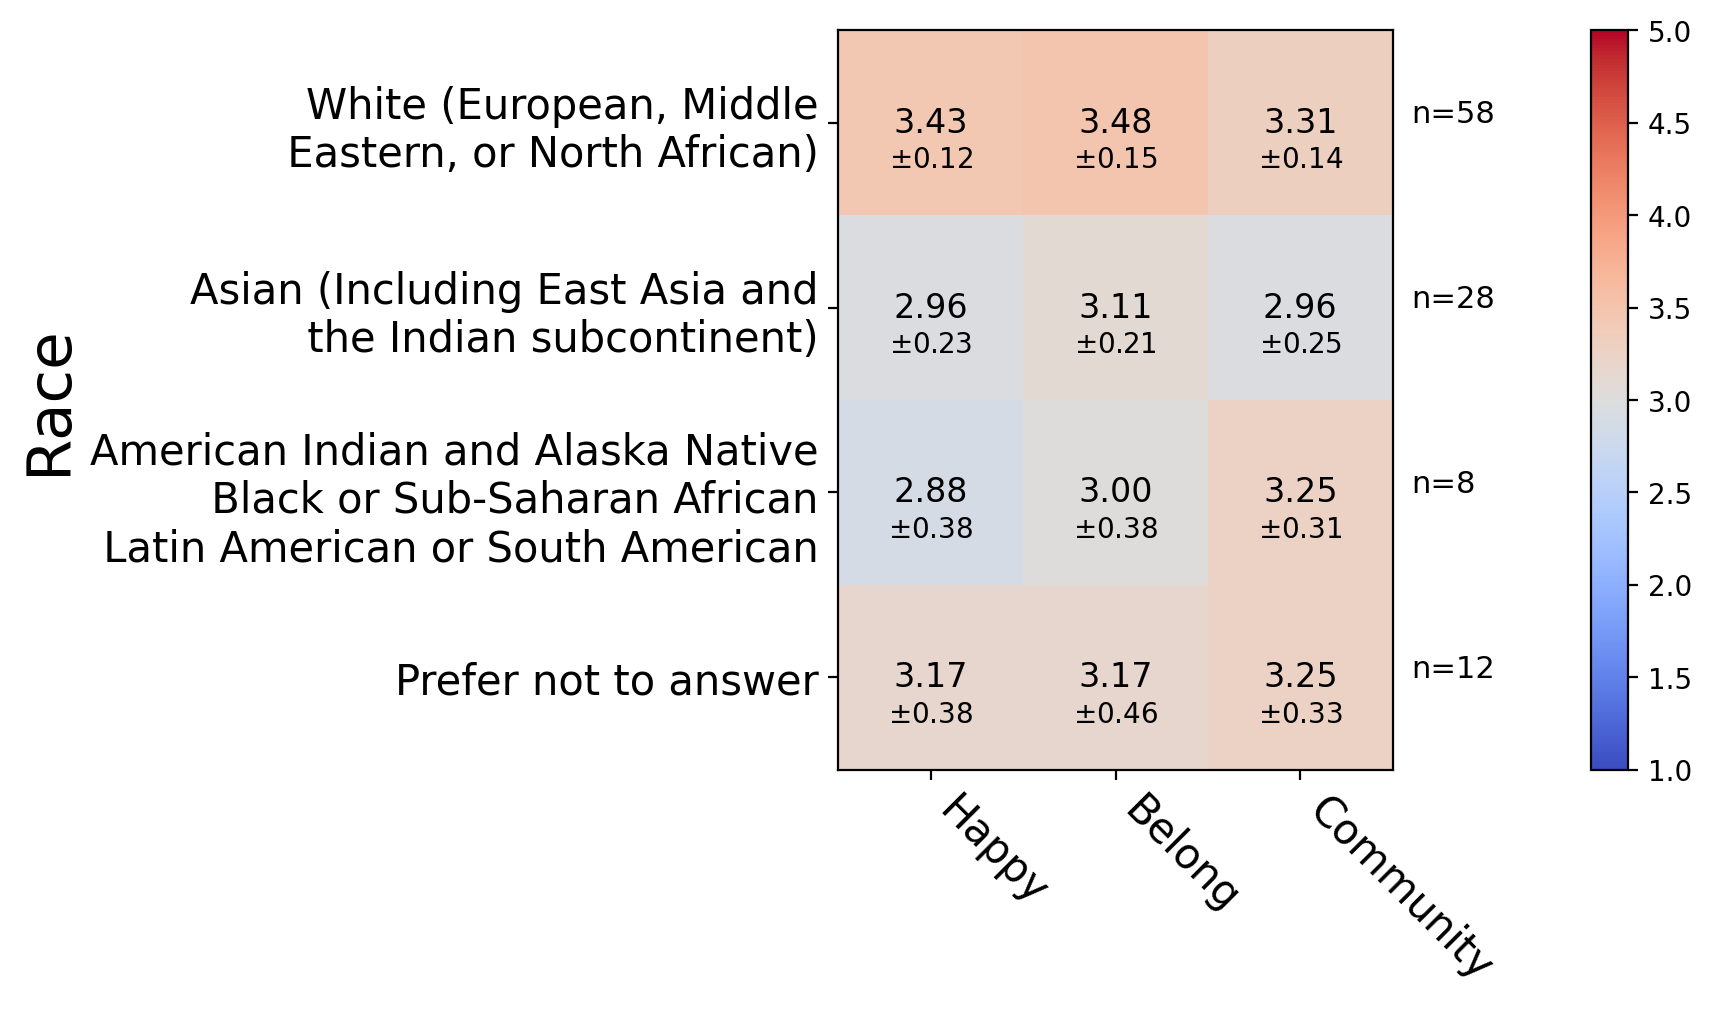

In [310]:
fig, ax = plt.subplots(1)

raceQOL = explode_Race()

demo_quest_heatmap(raceQOL, "Race", cut_VariablesBelong, fig, ax, cmap='coolwarm', manual_ticks=ano_race_lbls, cbar=True)

The only demographic that is inconsistent with neutral is White

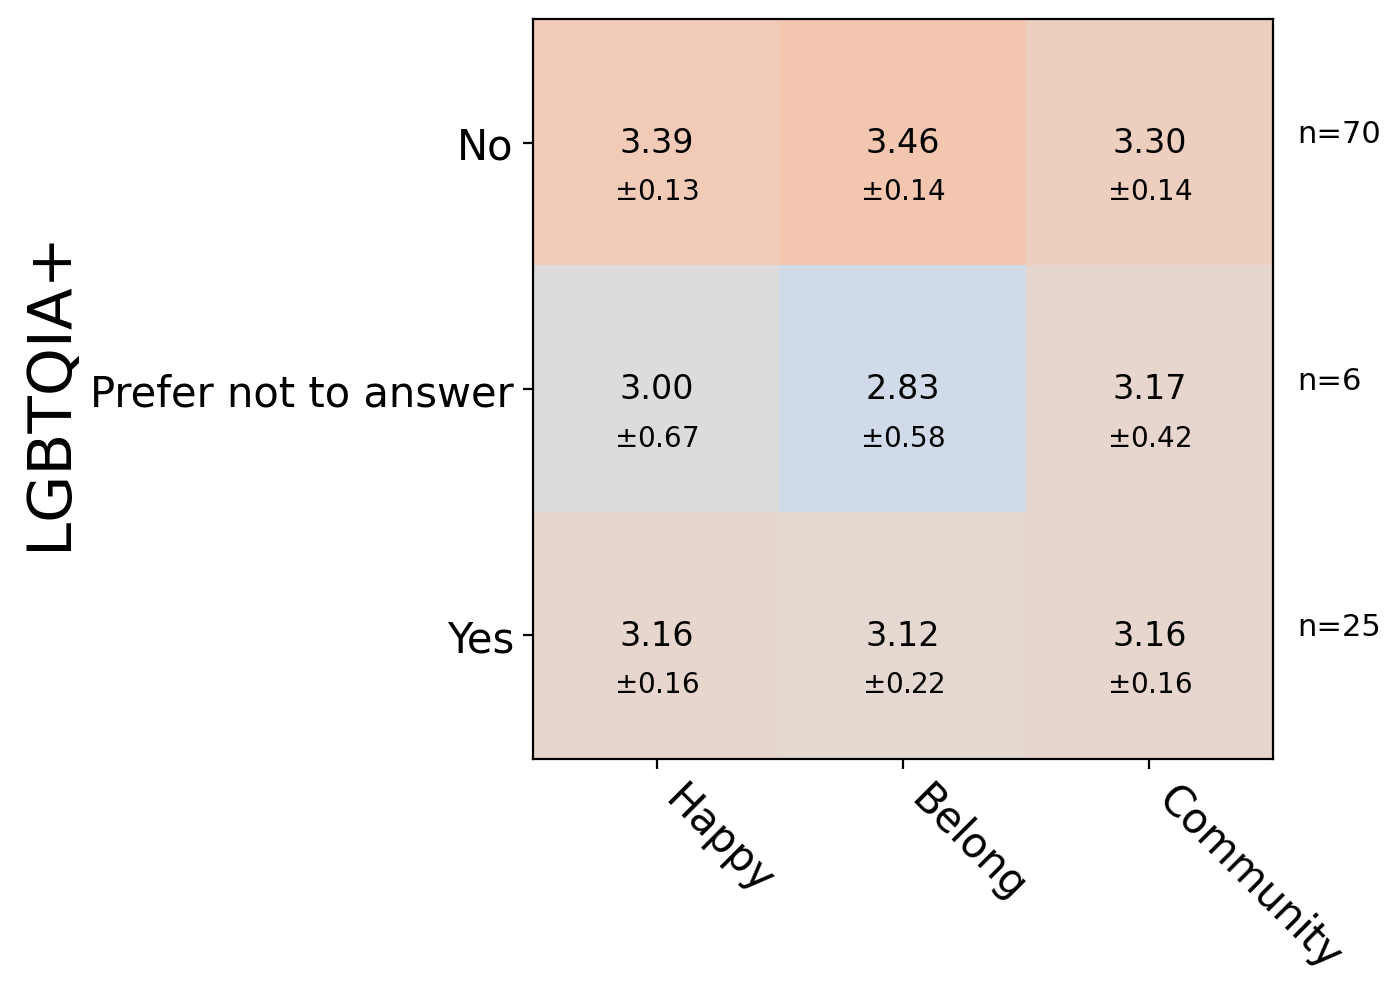

In [829]:
fig, ax = plt.subplots(1)

demo_quest_heatmap(QOLData, "LGBTQIA+", cut_VariablesBelong, fig, ax, cmap='coolwarm')

Members of the LGBTQIA+ community and those that are not are consistent with a positive response. PNA is quite low and has a negative response to sense of belonging. The sense of community and happiness are consistent with neutral for PNA.

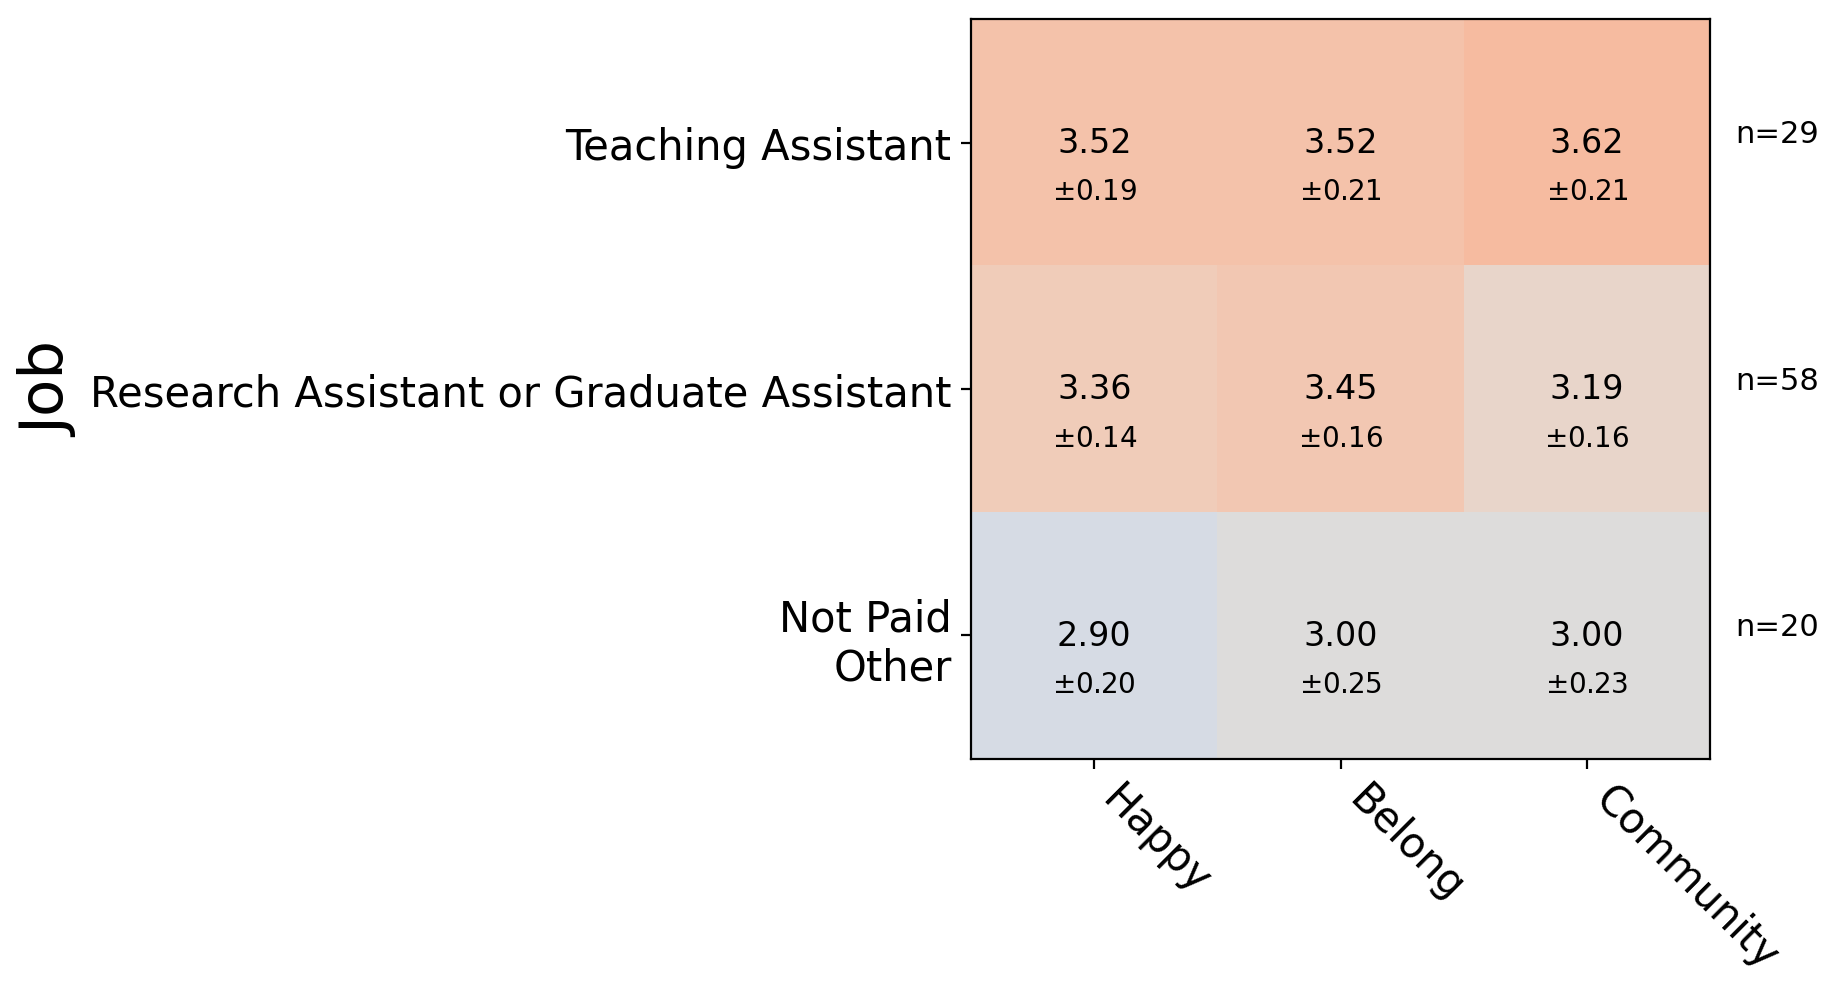

In [78]:
fig, ax = plt.subplots(1)

jobQOL = explode_Job()
demo_quest_heatmap(jobQOL, "Job", cut_VariablesBelong, fig, ax, cmap='coolwarm')

TAs, RAs, and GAs respond positively while students that are not paid or other are lower across the board and consistent with a neutral response. 

In [79]:
# Standard QOL data can have one student (row) be part of multiple research groups
# Here we let a single student that is part of multiple groups be counted multiple times
researchQOL = explode_Research()

# Need a new set of "anonymized" research group names 
non_combined_research_areas = np.unique(researchQOL['Research'].values)
nc_research_areas = [[ncra] for ncra in non_combined_research_areas]

nc_research_areas.pop(-2)
nc_research_areas.pop(-5)
nc_research_areas.append(['I am not currently involved in research'])
nc_research_areas.append( ['Prefer not to answer'])

# kl = anon_factor("Research", cut_VariablesBelong[0], ano_bins=nc_research_areas, QOL=researchQOL)

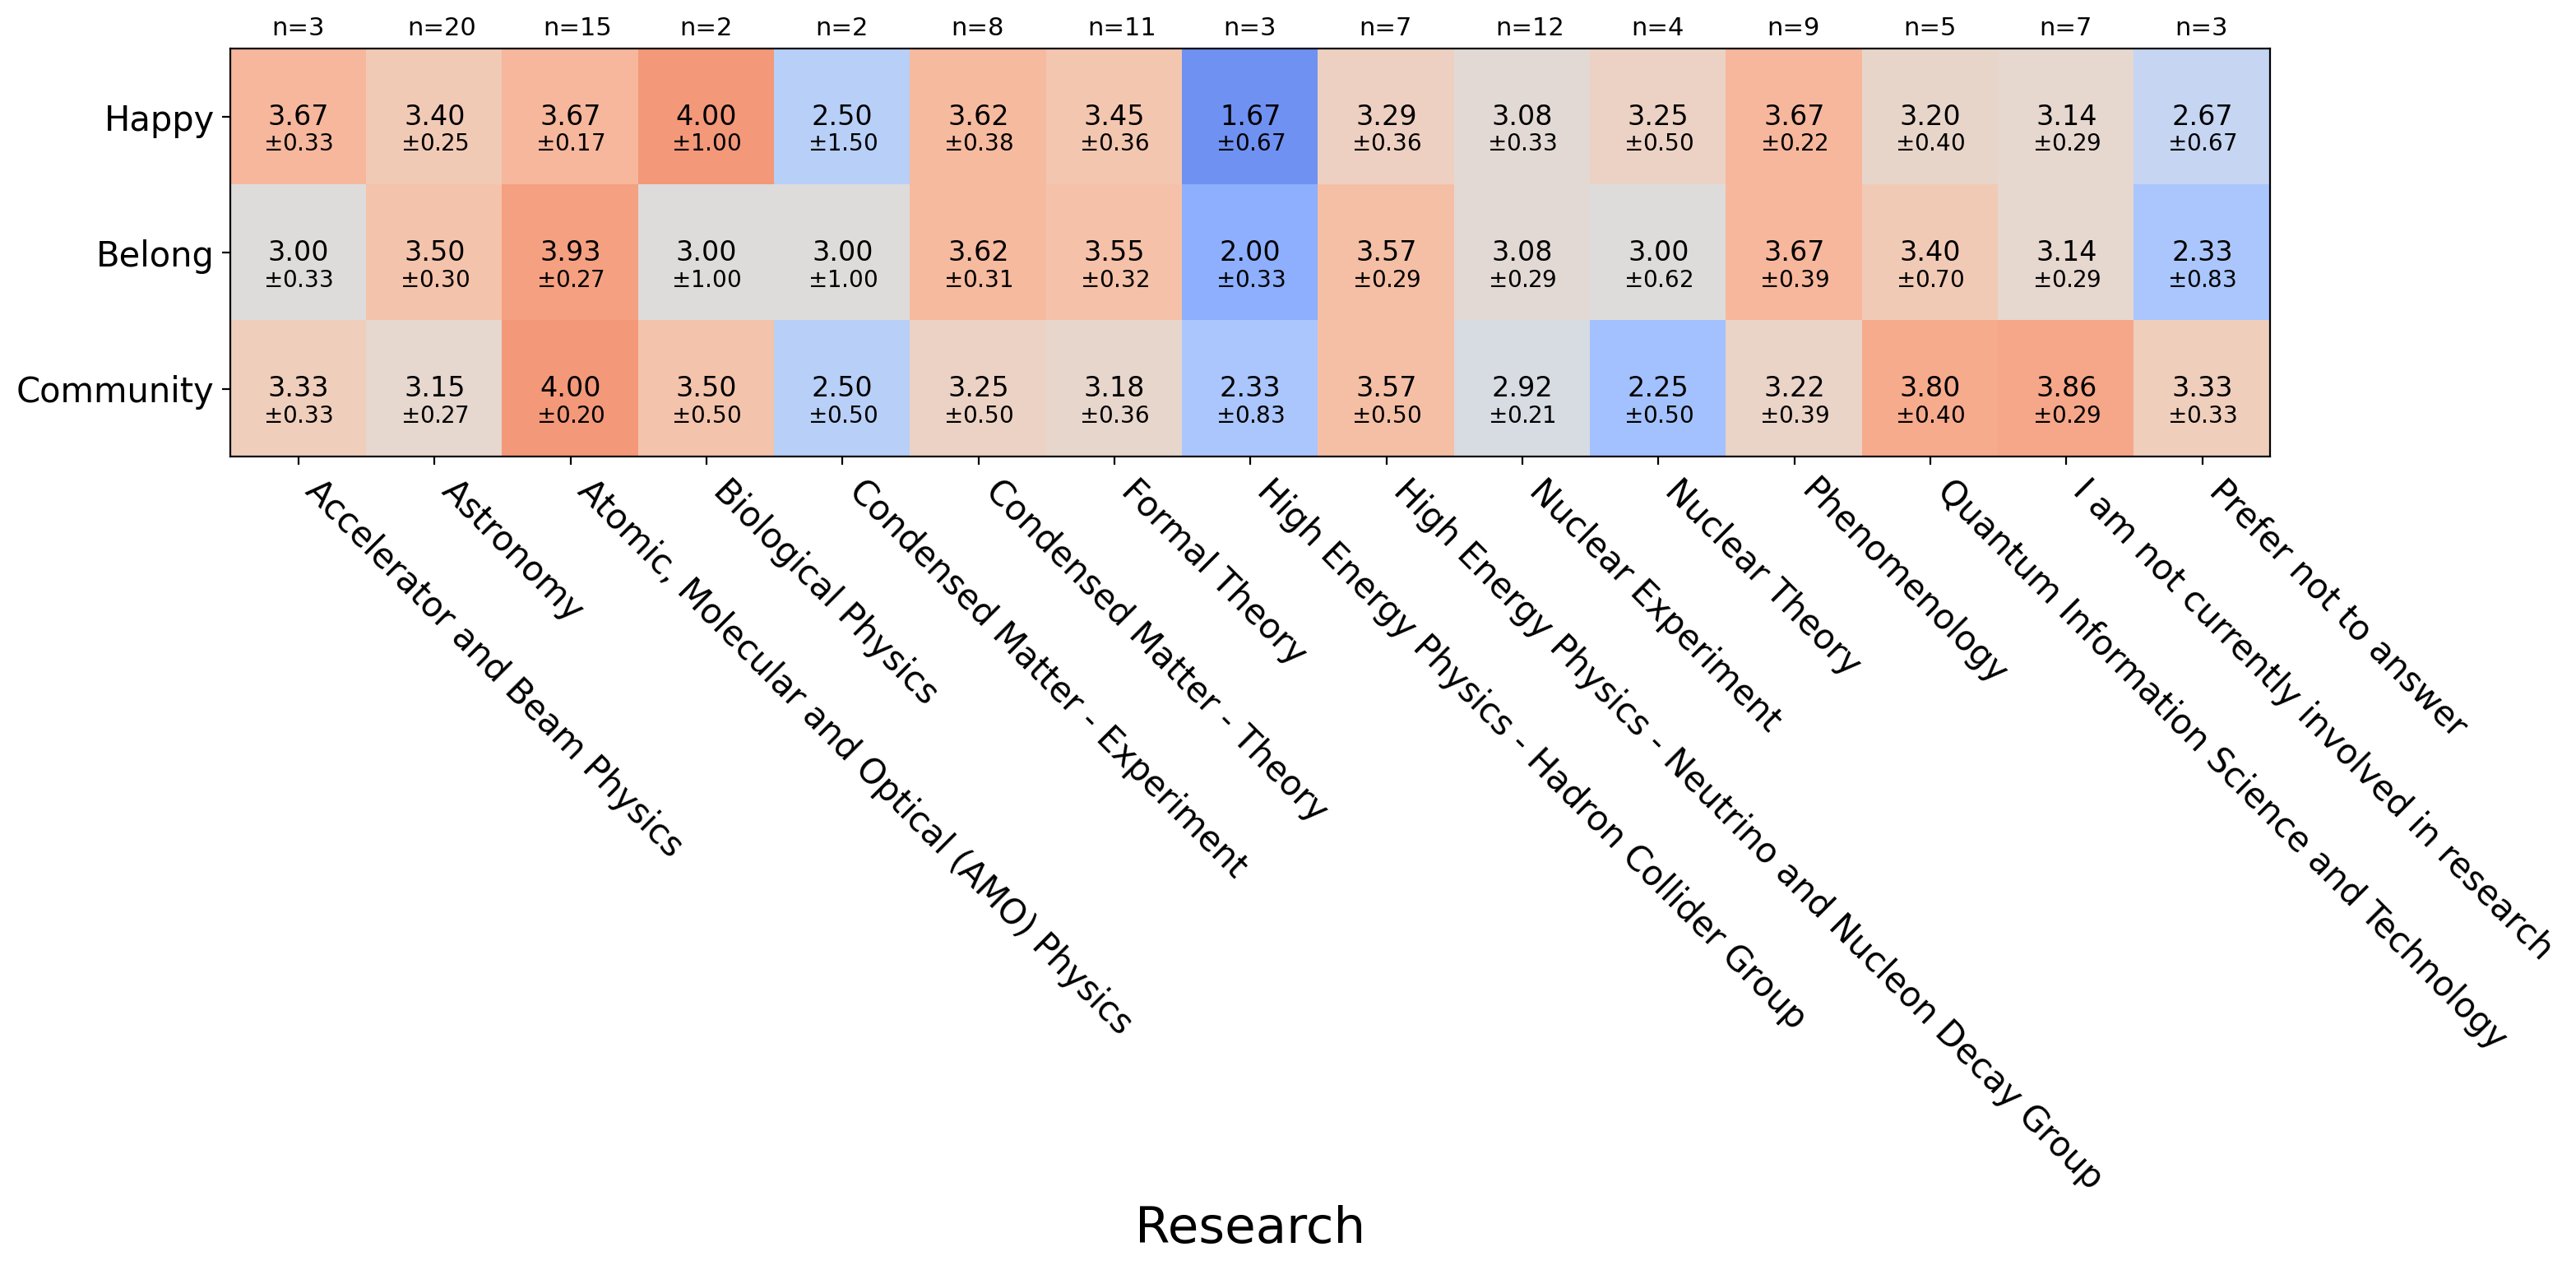

In [81]:
fig, ax = plt.subplots(1, figsize=(16, 4))

demo_quest_heatmap(researchQOL, "Research", cut_VariablesBelong, fig, ax,
                   cmap='coolwarm', transpose=True, ano_bins=nc_research_areas)

# ax.set_xticks(np.arange(15), Ano_Research, rotation=-90);

Few standouts:
1. AMO is quite positive
2. HEP - Hadron collider group is quite negative.
3. Most others are neutral to positive.

Each group should take a look at their row and see what should be focused on.

## Takeaways

Overall it seems that a decent number of students are happy, feel like they belong, and have an adequate sense of community.
Marginalized communities such as "Non-binary + PNA + Trans Woman" and "American Indian and Alaska Native + Black or Sub-Saharan African + Latin American or South American" report lower than the other groups. Similarly for job status, students that are unpaid or in some other situation have a lower sense of belonging. The statistical significance of these can be deliberated, most things are within $2\sigma$ of each other and can be chalked up to sample variance. However, it is concerning that these historically oppressed groups are reporting lower than their peers. 

Some wins are that Hispanic students, members of the LGBQTIA+ community, and a large number of research groups responded positively. 

Finally, there are almost no categories where the mean is greater than 4. Almost every demographic and research group can afford extra attention and help in making the students happier and feel like they belong. 


# Courses + Comps

For each core course, students were asked to rate their knowledge from $1$ (low) to $10$ (high) on the subject before the taking the course, after taking the course, and after taking the comp.

In [26]:
def single_core_rating(core_name, fig, ax, add_filter=None, show=False, short_x=True, label=None):
    row_strings = [f'Knowledge {core_name} Start', f'Knowledge {core_name} Core', f'Knowledge {core_name} Comp']
    short_strings = ['Before Core', 'After Core', 'After Comp']
    n_entry = [np.sum(~np.isnan(QOLData[rs])) for rs in row_strings]
    
    if add_filter is None:
        course_data = QOLData[row_strings]
    else:
        course_data = QOLData[row_strings][add_filter]
    
    mean_course = course_data.agg('mean')
    sigma_course = course_data.agg('std')

    if label is None:
        label=core_name
    
    ax.errorbar(np.arange(3), mean_course, yerr=sigma_course, label=label)
    ax.set_ylabel("Mean Rating", fontsize=14)
    ax.set_title(f"Knowledge on {core_name}", fontsize=16)

    xticks = []
    for i in range(3):
        if short_x: #Do we want to use the short form for the x-label
            xticks.append(short_strings[i]  + '\n' + f'(n={n_entry[i]})')
        else:
            xticks.append(row_strings[i] + '\n' + f'(n={n_entry[i]})')
    ax.set_xticks(np.arange(3.0), xticks, rotation=-45, ha='left', multialignment='center')
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
        
    trans = mtrans.Affine2D().translate(-60, 0)
    for t in ax.get_xticklabels():
        t.set_transform(t.get_transform()+trans)
    
    if show: plt.show()
    return mean_course, sigma_course, xticks

In [27]:
def single_core_difference(core_name, fig, ax, add_filter=None, show=False, bwidth=0.5):
    row_strings = [f'Knowledge {core_name} Start', f'Knowledge {core_name} Core', f'Knowledge {core_name} Comp']
    short_strings = ['Before Core', 'After Core', 'After Comp']

    if add_filter is None:
        course_data = QOLData[row_strings]
    else:
        course_data = QOLData[row_strings][add_filter]
    course_difference = course_data.iloc[:,1] - course_data.iloc[:,0]
    comp_difference = course_data.iloc[:,2] - course_data.iloc[:,1]
    
    n_entry = [np.sum(~np.isnan(course_difference)), np.sum(~np.isnan(comp_difference))]
    
    labels_course, counts_course = np.unique(course_difference, return_counts=True)
    notnan_coursecounts = ~np.isnan(labels_course)

    labels_comp, counts_comp = np.unique(comp_difference, return_counts=True)
    notnan_compcounts = ~np.isnan(labels_comp)
    tab10 = colormaps.get_cmap('tab10')
    
    ax.bar(labels_course[notnan_coursecounts]-bwidth/2, counts_course[notnan_coursecounts]/n_entry[0], align='center', label="Course - Start Difference", width=bwidth)
    ax.bar(labels_comp[notnan_compcounts]+bwidth/2, counts_comp[notnan_compcounts]/n_entry[1], align='center', label="Comp - Course Difference", width=bwidth)
    ax.set_title(f"Knowledge on {core_name}", fontsize=16)
    ax.annotate(f"Course Entries: {n_entry[0]}", xy=(.05,.9), xycoords="axes fraction", fontsize=14, color=tab10(0))
    ax.annotate(f"Comp Entries: {n_entry[1]}", xy=(.05,.85), xycoords="axes fraction", fontsize=14, color=tab10(1))

    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

    if show: plt.show()
        
    return course_difference, comp_difference

In [28]:
def get_comp_demo(QOL, demo_name, fig, axs, show=False, cm='tab10'):
    core_names = ['CM', 'EM', 'SM', 'QM']
    anon_bins = anonymous_demo[demo_name]
    lanon = len(anon_bins)
    
    tick_lbls = []
    for col_bins in anon_bins:
        col_name = '\n'.join(col_bins)
        tick_lbls.append(col_name)
    
    core_improvement = {i:[] for i in range(len(anon_bins))}
    comp_improvement = {i:[] for i in range(len(anon_bins))}
    
    for cn in core_names:
        demo_start = anon_factor(demo_name, f"Knowledge {cn} Start", QOL=QOL)
        demo_core = anon_factor(demo_name, f"Knowledge {cn} Core", QOL=QOL)
        demo_comp = anon_factor(demo_name, f"Knowledge {cn} Comp", QOL=QOL)
        
        for i in range(lanon):
            core_i = demo_core[i] - demo_start[i]
            comp_i = demo_comp[i] - demo_core[i]
            
            core_improvement[i].append(core_i[~np.isnan(core_i)])
            comp_improvement[i].append(comp_i[~np.isnan(comp_i)])
    
    cmap = colormaps.get_cmap(cm)
    
    for i in range(lanon):
        tick_lbls[i] += (r' ($N_{core}$' + f'={len(np.concatenate(core_improvement[i]))}'+
        r' $N_{comp}$' +f'={len(np.concatenate(comp_improvement[i]))})')
    
    core_xs = np.arange(-10, 11, 1)-.5
    comp_xs = np.arange(-10, 11, 1)-.5
    lss = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3,5,1,5))]
    for i in range(lanon):
        axs[0].hist(np.concatenate(core_improvement[i]), bins=comp_xs,
                    alpha=.1, density=True, color=cmap(i))
        axs[0].hist(np.concatenate(core_improvement[i]), bins=comp_xs,
                    label=tick_lbls[i], alpha=1, density=True, color=cmap(i),
                    histtype='step', linewidth=2.2, linestyle=lss[i])
        axs[1].hist(np.concatenate(comp_improvement[i]), bins=comp_xs,
                    alpha=.1, density=True, color=cmap(i))
        axs[1].hist(np.concatenate(comp_improvement[i]), bins=comp_xs,
                    label=tick_lbls[i], alpha=1, density=True, color=cmap(i),
                    histtype='step', linewidth=2.2, linestyle=lss[i])
    
    axs[0].set_title("Core - Start", fontsize=16)
    axs[1].set_title("Comp - Core", fontsize=16)
    return core_improvement, comp_improvement

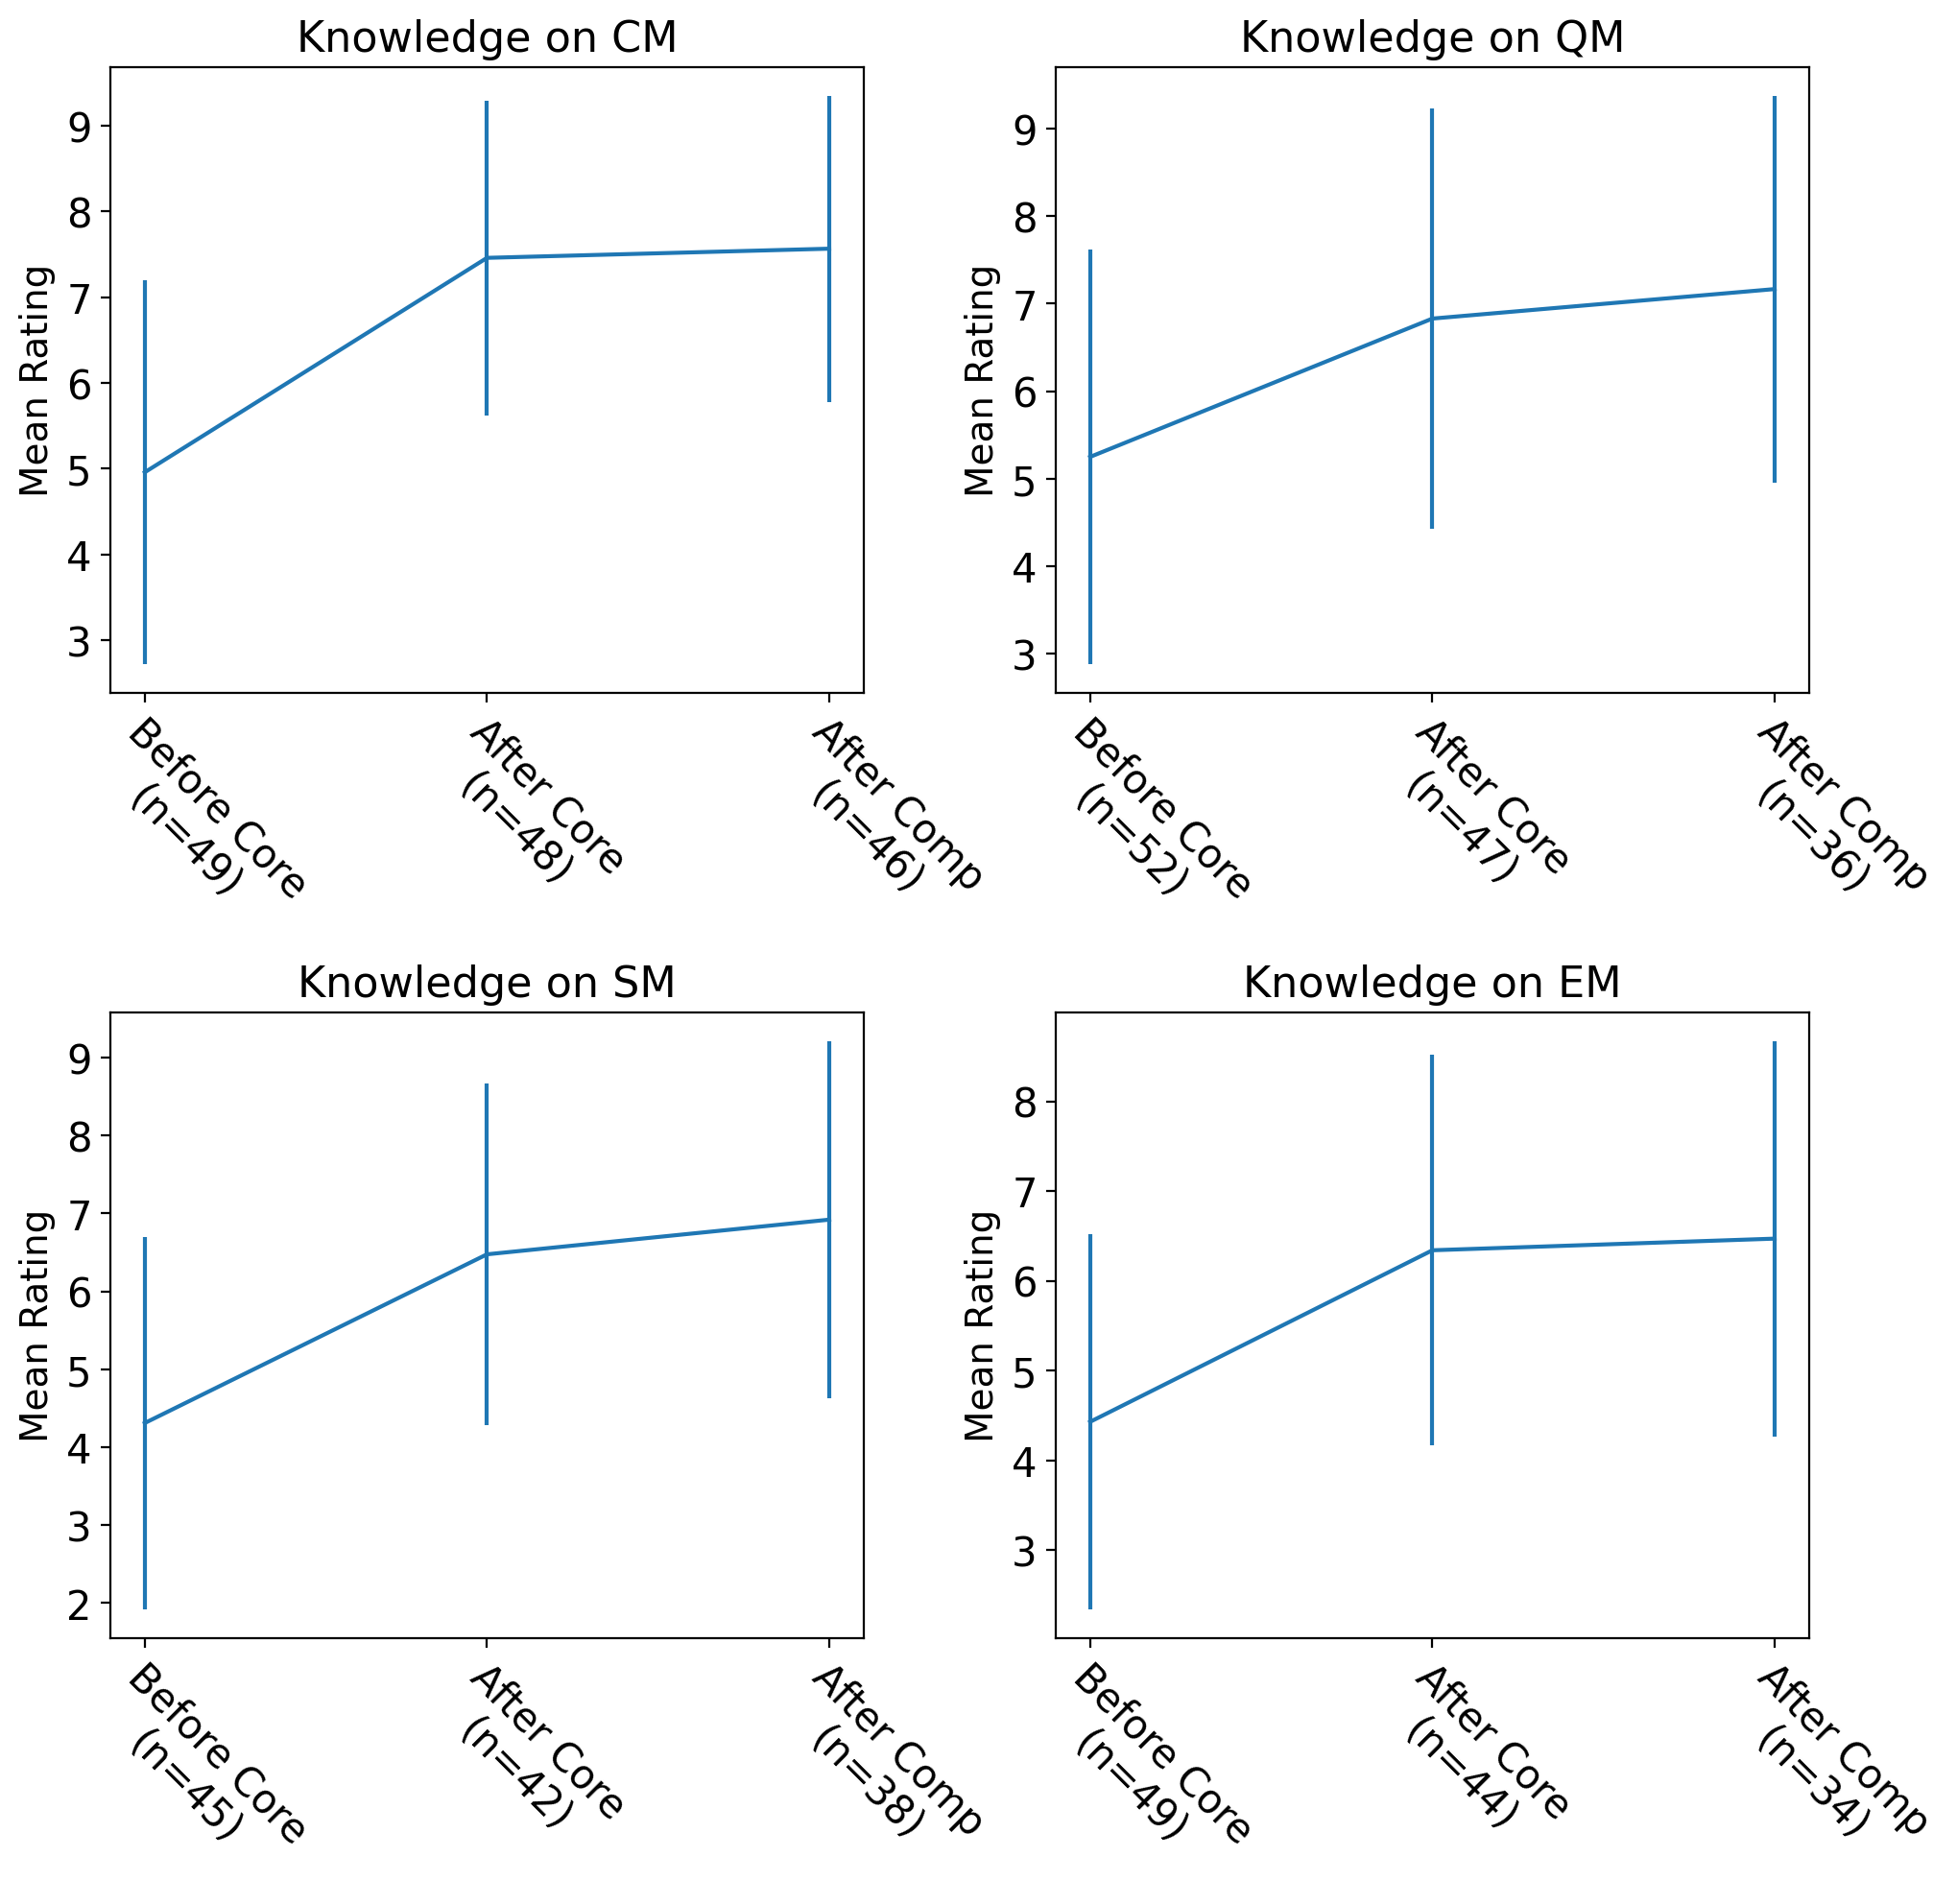

In [29]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

core_names = ['CM', 'QM', 'SM', 'EM']

for i in range(4):
    ix = i//2
    iy = i%2
    
    course = core_names[i]
    _ = single_core_rating(course, fig, ax[ix,iy], short_x=True)
plt.tight_layout()

Text(-0.02, 0.5, 'Fraction of Responses')

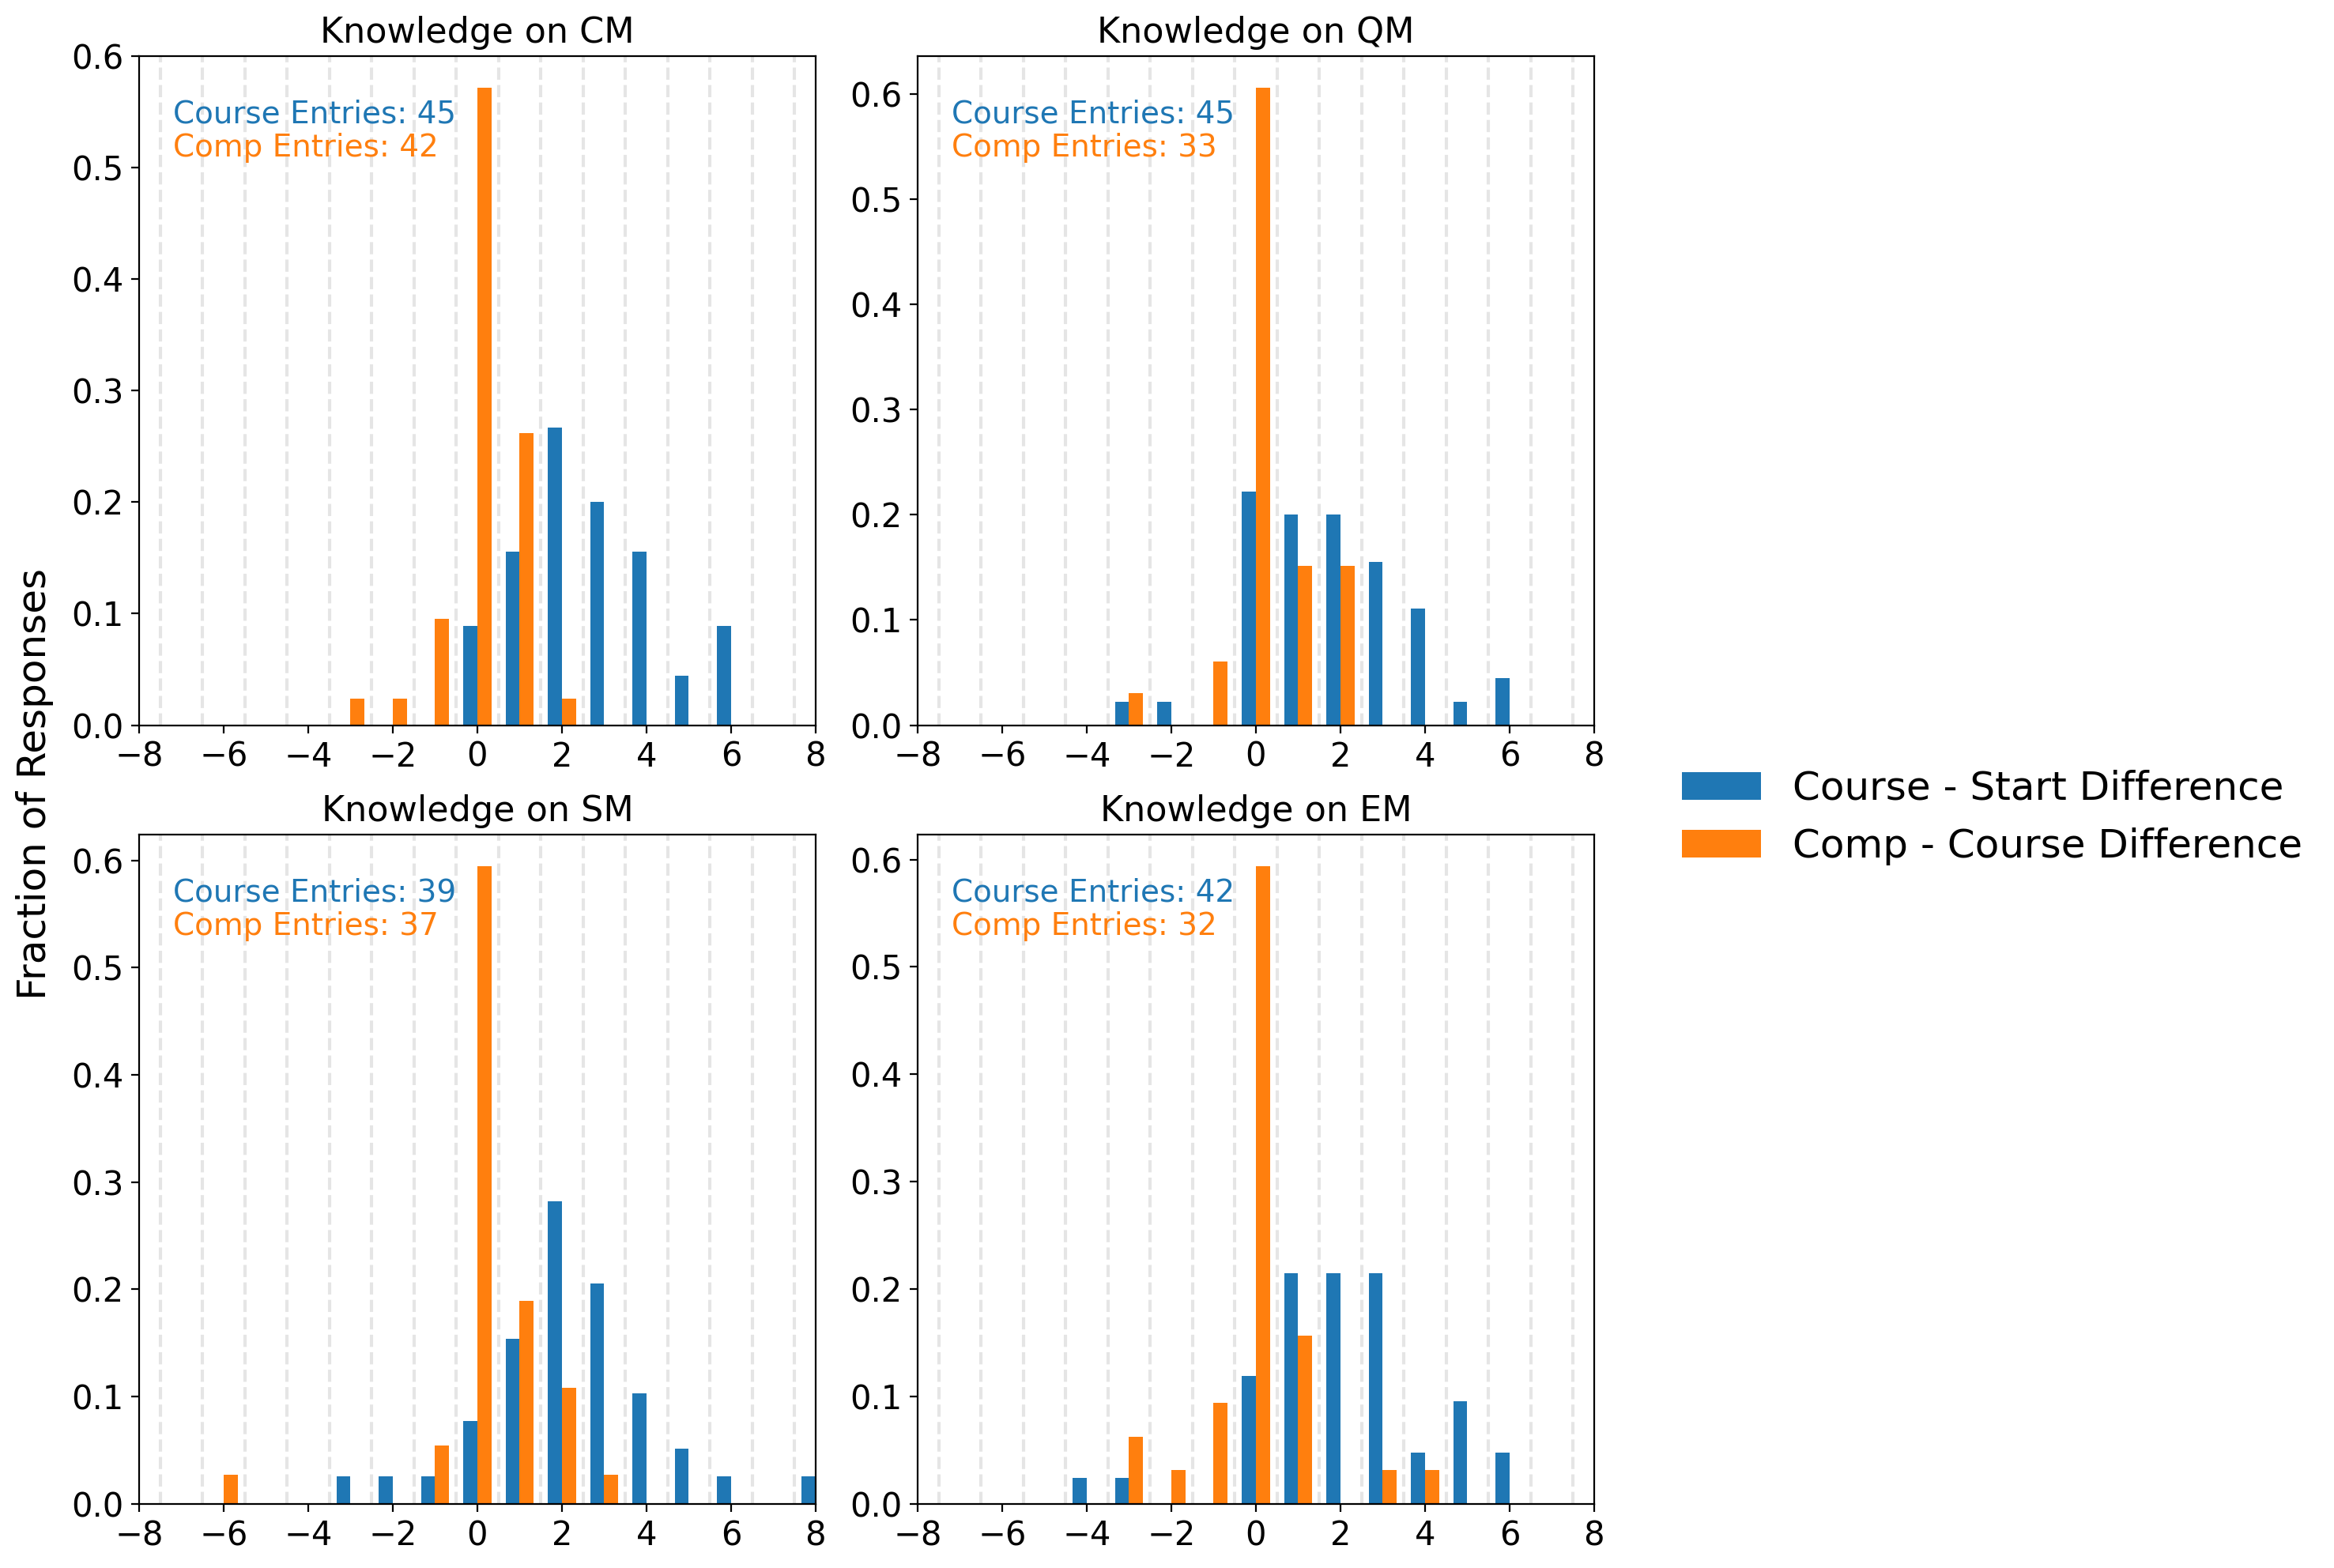

In [30]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

core_names = ['CM', 'QM', 'SM', 'EM']

for i in range(4):
    ix = i//2
    iy = i%2
    
    course = core_names[i]
    _ = single_core_difference(course, fig, ax[ix,iy], bwidth=0.33)
for xx in ax:
    for axes in xx:
        axes.set_xlim(-8,8)
        for ll in np.arange(-7.5, 8, 1):
            axes.axvline(ll, color='k', ls='--', alpha=.1)

plt.tight_layout()
plt.legend(frameon=False, bbox_to_anchor=(2.1, 1.15), fontsize=18)
fig.supylabel("Fraction of Responses", x=-.02, fontsize=18)

Text(-0.02, 0.5, 'Fraction of Responses')

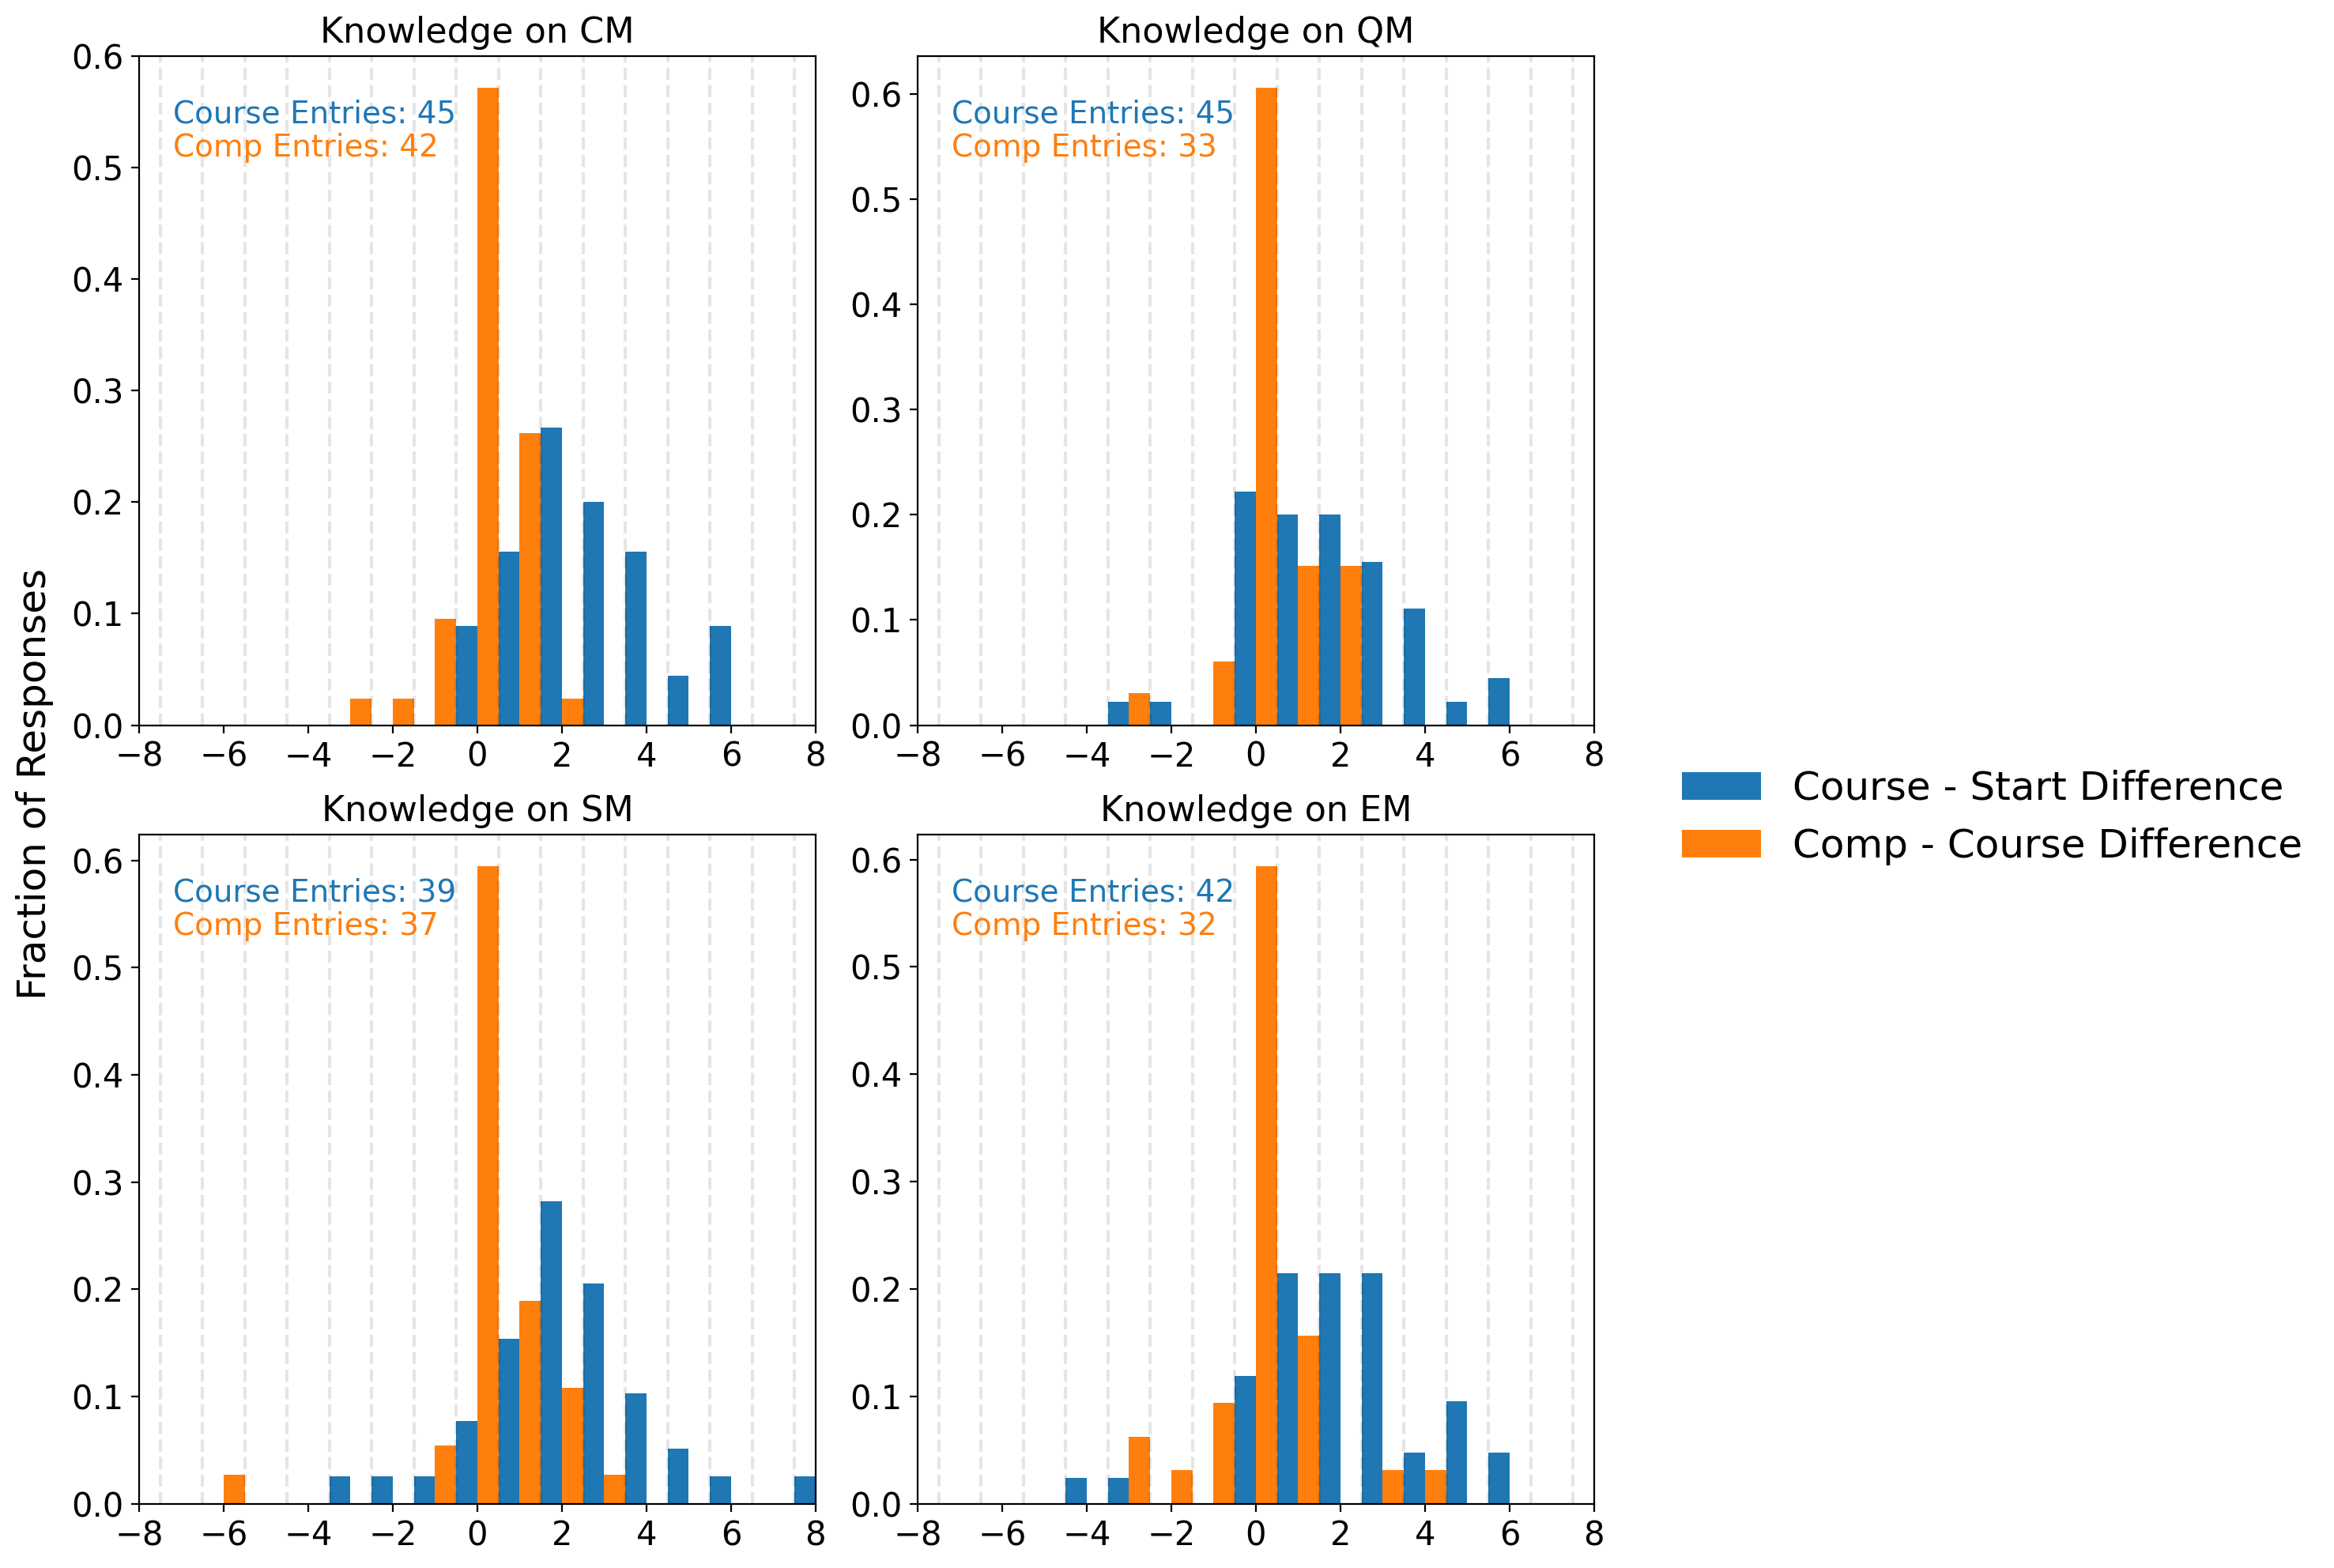

In [31]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

core_names = ['CM', 'QM', 'SM', 'EM']

for i in range(4):
    ix = i//2
    iy = i%2
    
    course = core_names[i]
    _ = single_core_difference(course, fig, ax[ix,iy], bwidth=0.5)
for xx in ax:
    for axes in xx:
        axes.set_xlim(-8,8)
        for ll in np.arange(-7.5, 8, 1):
            axes.axvline(ll, color='k', ls='--', alpha=.1)

plt.tight_layout()
plt.legend(frameon=False, bbox_to_anchor=(2.1, 1.15), fontsize=18)
fig.supylabel("Fraction of Responses", x=-.02, fontsize=18)

In [556]:
cand_filt = (QOLData['Program'] == 'PhD Candidate')
noncand_filt = (QOLData['Program'] == 'PhD Student')

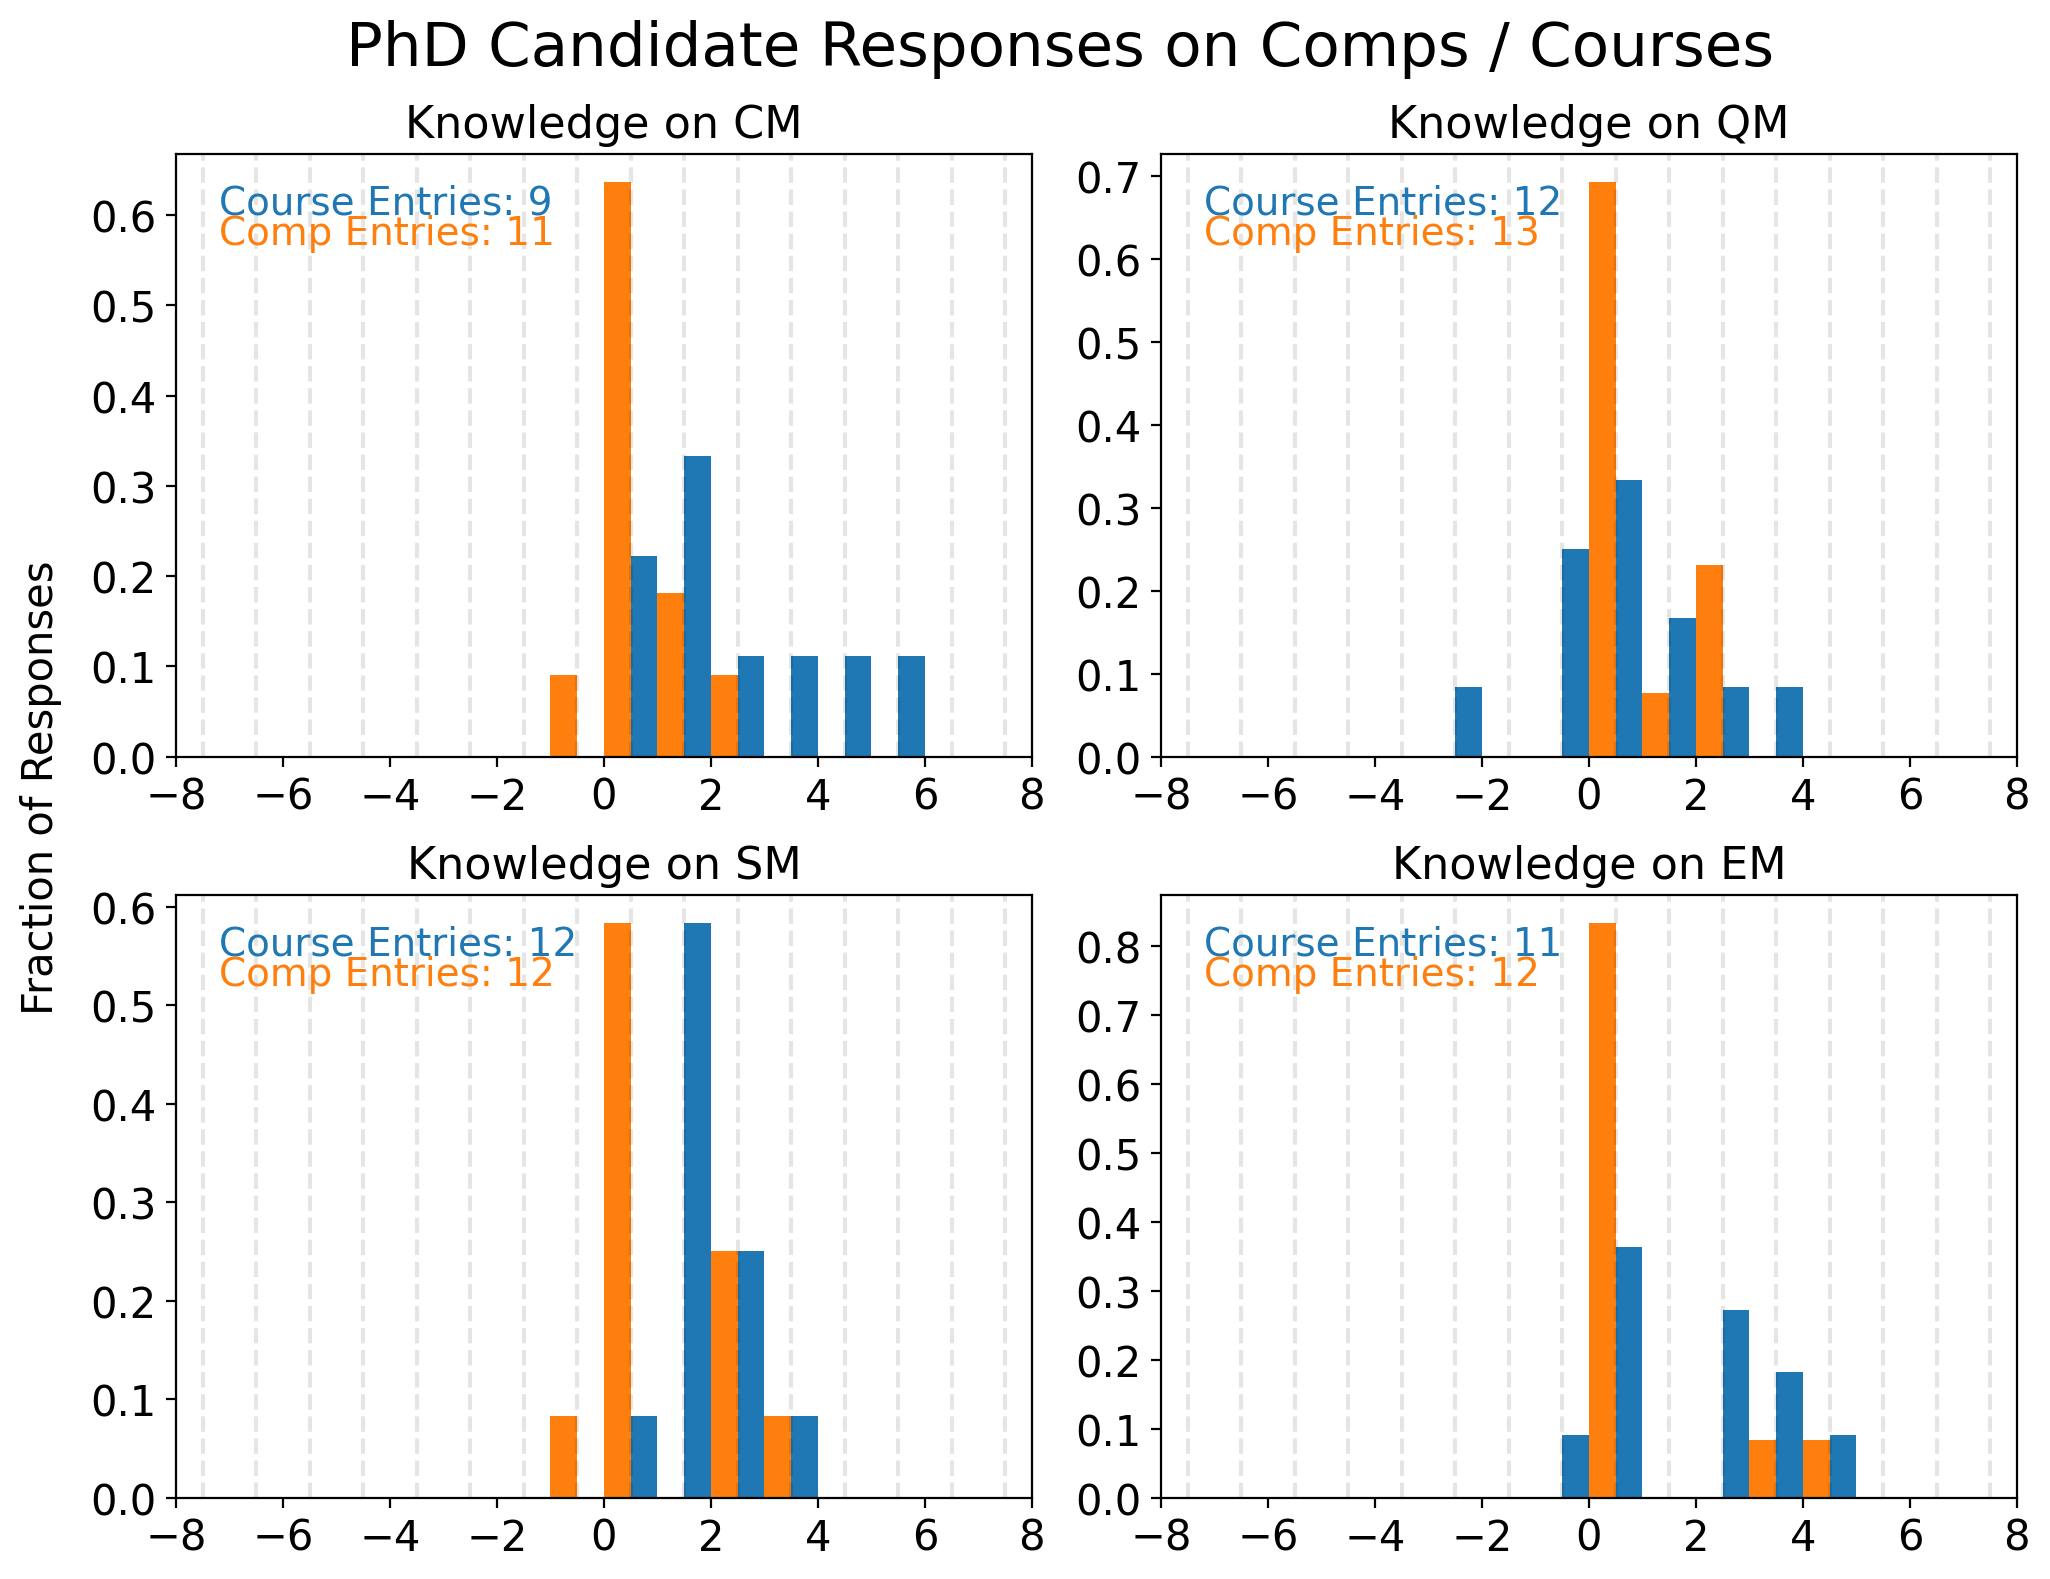

In [561]:
fig, ax = plt.subplots(2,2, figsize=(10,8))

core_names = ['CM', 'QM', 'SM', 'EM']

for i in range(4):
    ix = i//2
    iy = i%2
    
    course = core_names[i]
    _ = single_core_difference(course, fig, ax[ix,iy], bwidth=0.5, add_filter=cand_filt)
for xx in ax:
    for axes in xx:
        axes.set_xlim(-8,8)
        for ll in np.arange(-7.5, 8, 1):
            axes.axvline(ll, color='k', ls='--', alpha=.1)

fig.suptitle("PhD Candidate Responses on Comps / Courses", fontsize=22)
plt.tight_layout()
# plt.legend(frameon=False, bbox_to_anchor=(2.1, 1.15), fontsize=15)
fig.supylabel("Fraction of Responses", x=-.02, fontsize=15)
plt.savefig('figs/phdcandidate_compcourse.png', dpi=300)

### Are the comps/core courses -ist?

Now we group by specific demographics to see if there is any noticeable bias with the subgroups

Text(0.5, 0.98, 'Improvement from Core Course and Comp binned by Gender Demographic')

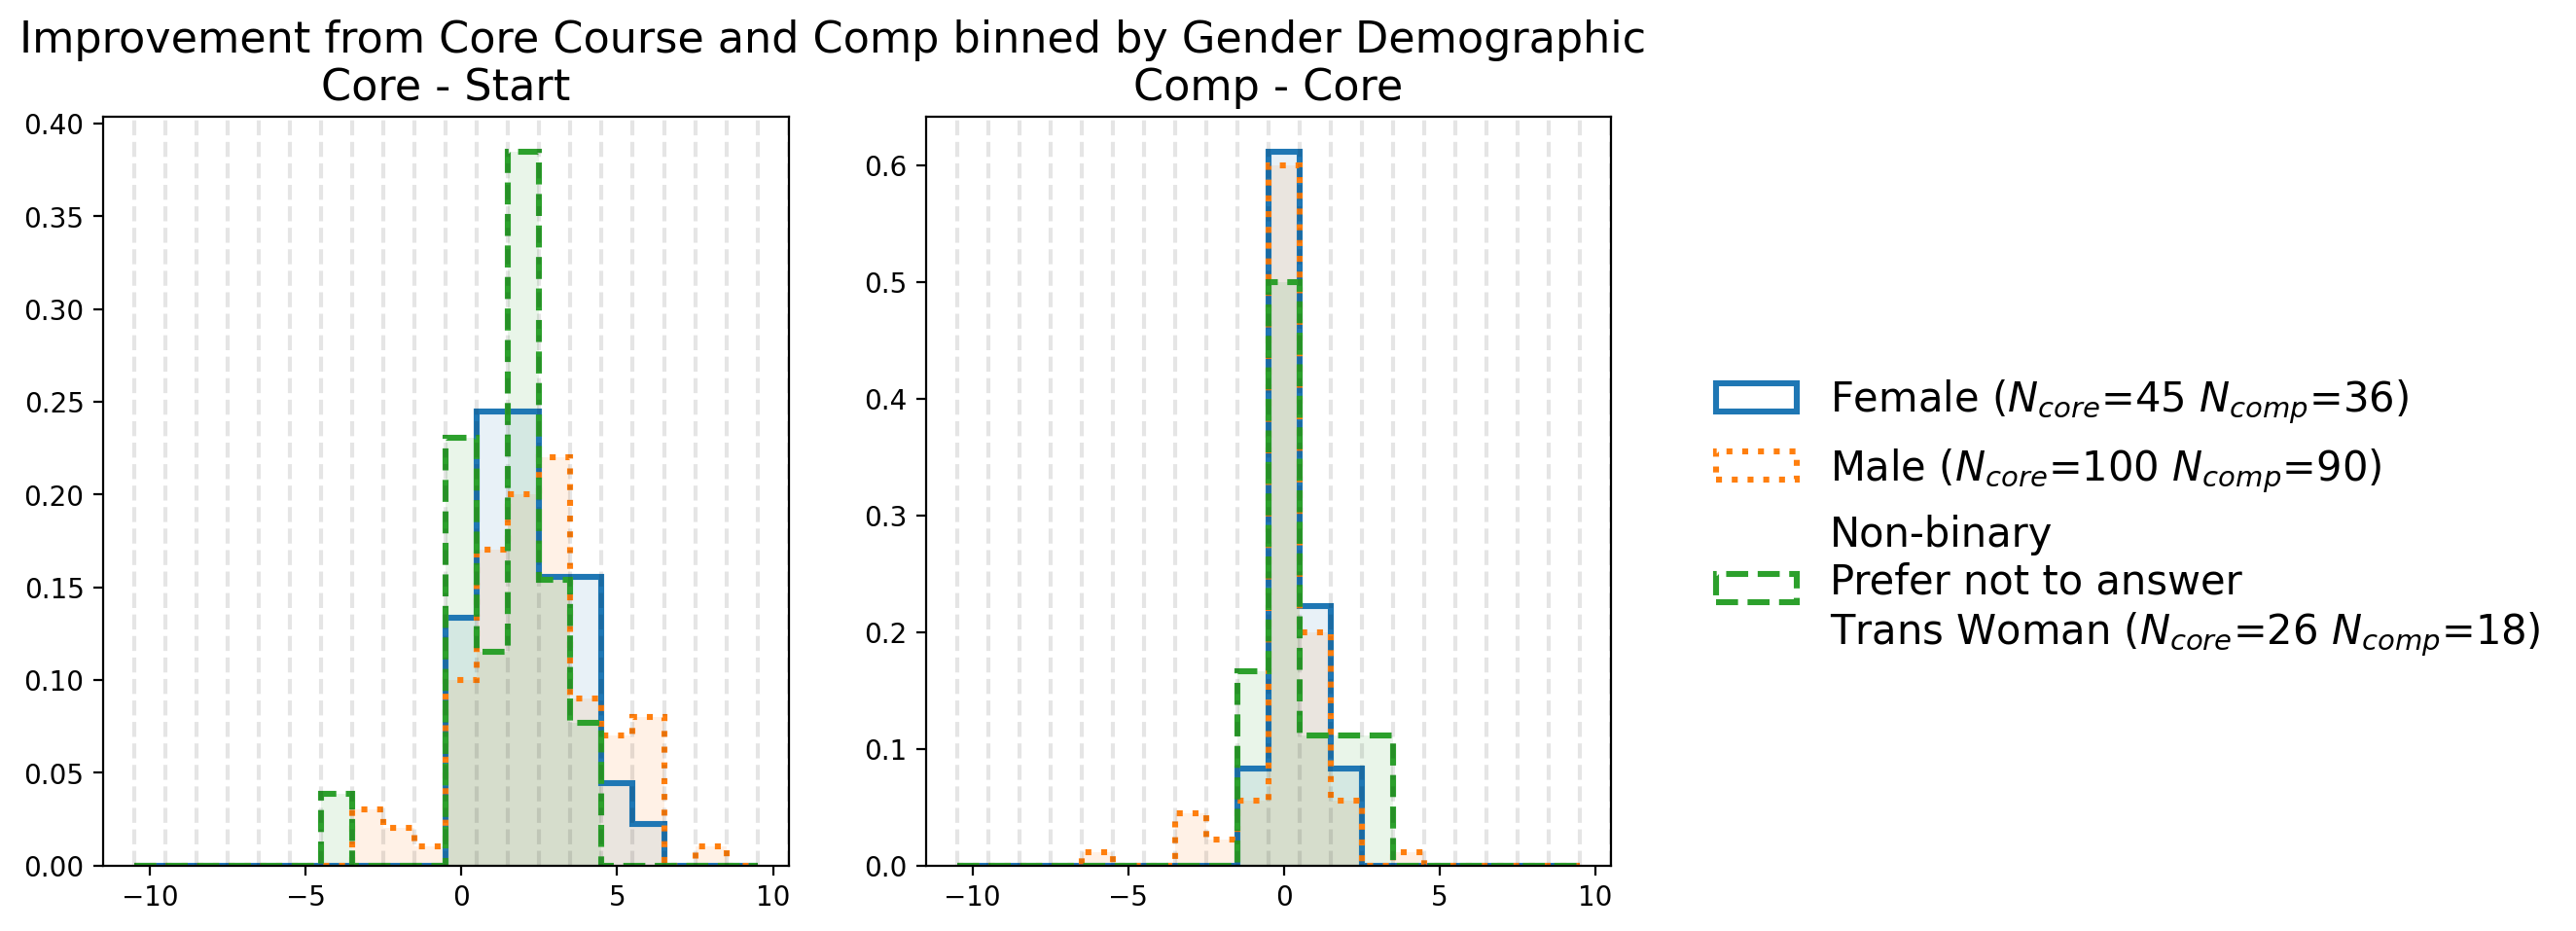

In [111]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

dcol = 'Gender'

core_i, comp_i = get_comp_demo(QOLData, dcol, fig, ax)
ax[1].legend(frameon=False, bbox_to_anchor=(1.1,.7), fontsize=15)

for xx in ax:
    for ll in np.arange(-10.5, 11, 1):
        xx.axvline(ll, color='k', ls='--', alpha=.1)

fig.suptitle(f'Improvement from Core Course and Comp binned by {dcol} Demographic', fontsize=16)

Text(0.5, 0.98, 'Improvement from Core Course and Comp binned by LGBTQIA+ Demographic')

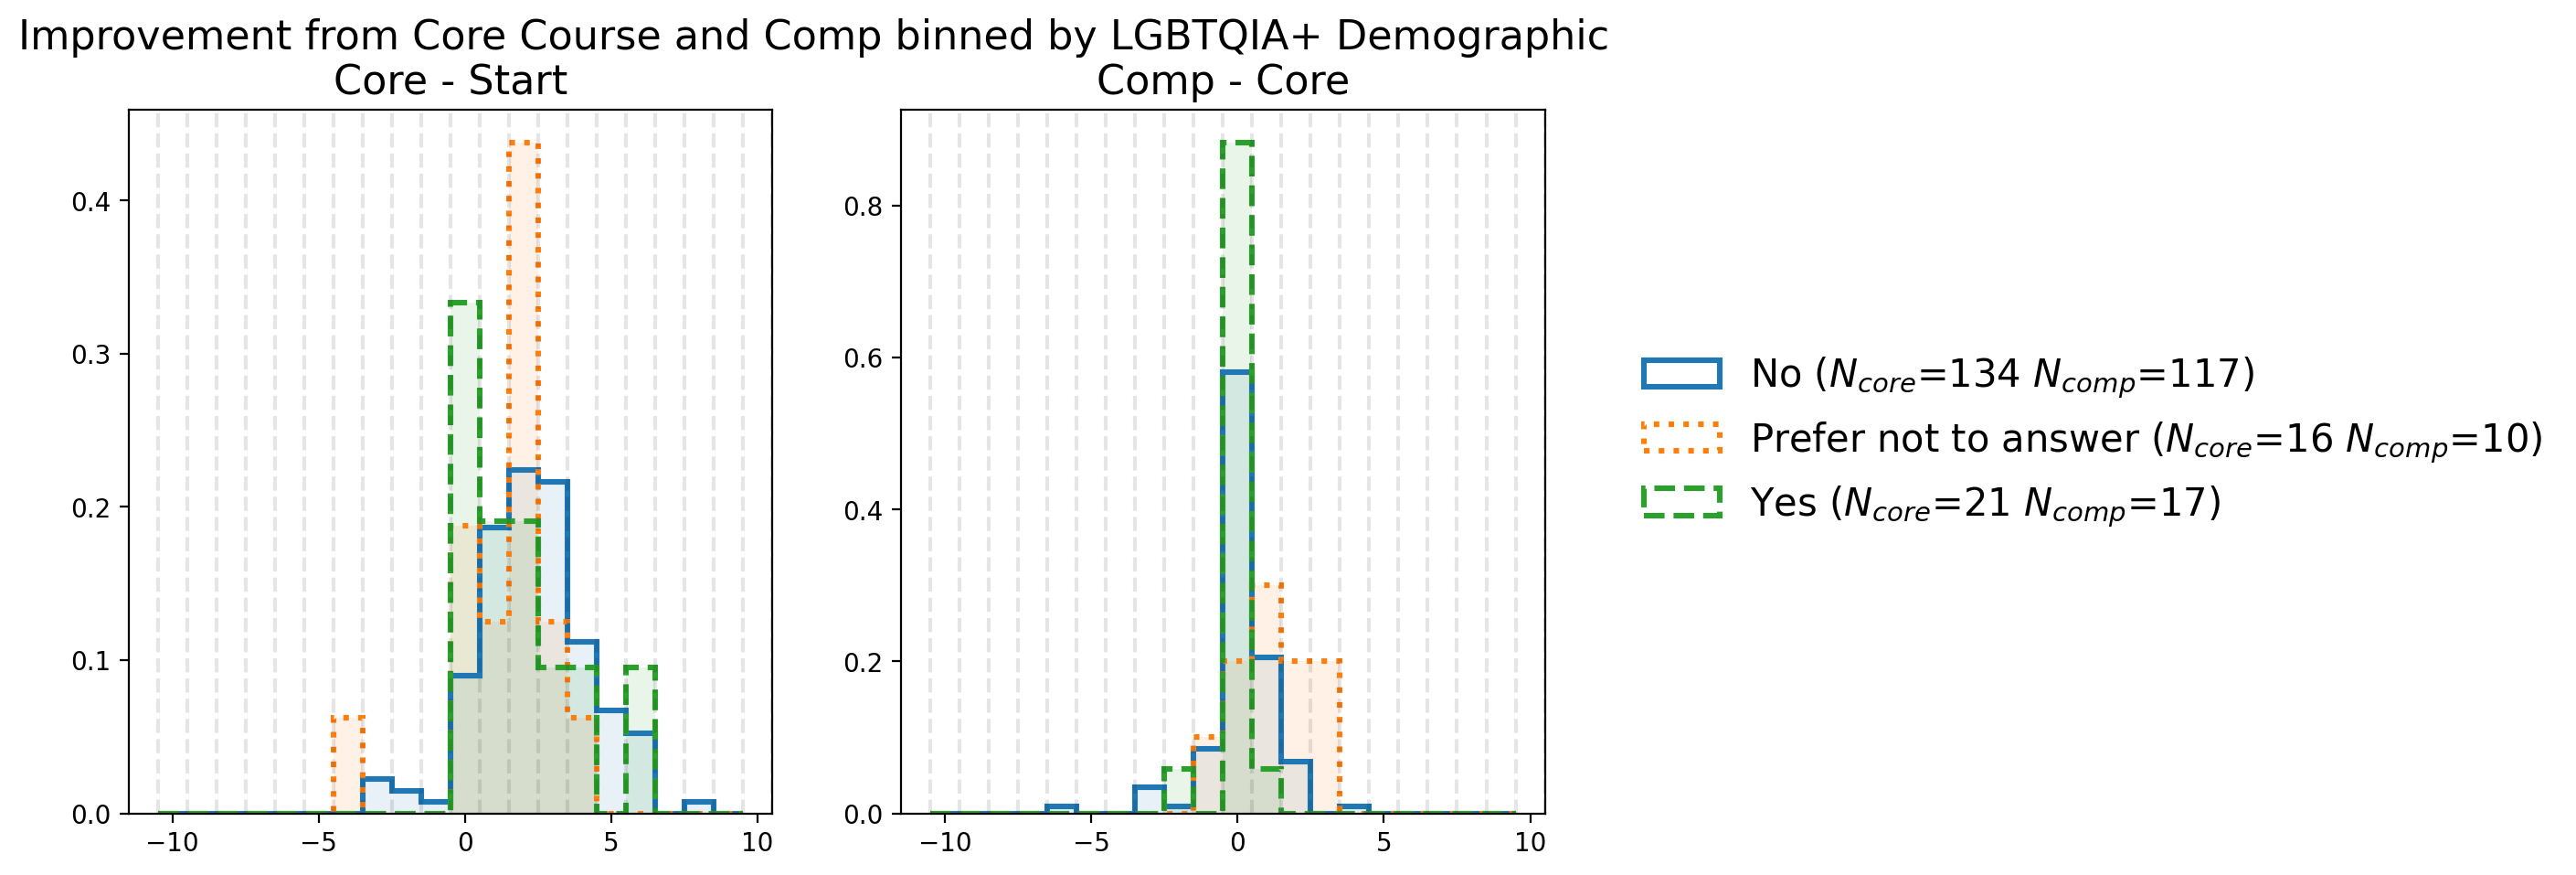

In [112]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

dcol = 'LGBTQIA+'

core_i, comp_i = get_comp_demo(QOLData, dcol, fig, ax)
ax[1].legend(frameon=False, bbox_to_anchor=(1.1,.7), fontsize=15)

for xx in ax:
    for ll in np.arange(-10.5, 11, 1):
        xx.axvline(ll, color='k', ls='--', alpha=.1)

fig.suptitle(f'Improvement from Core Course and Comp binned by {dcol} Demographic', fontsize=16)

Text(0.5, 0.98, 'Improvement from Core Course and Comp binned by Hispanic Demographic')

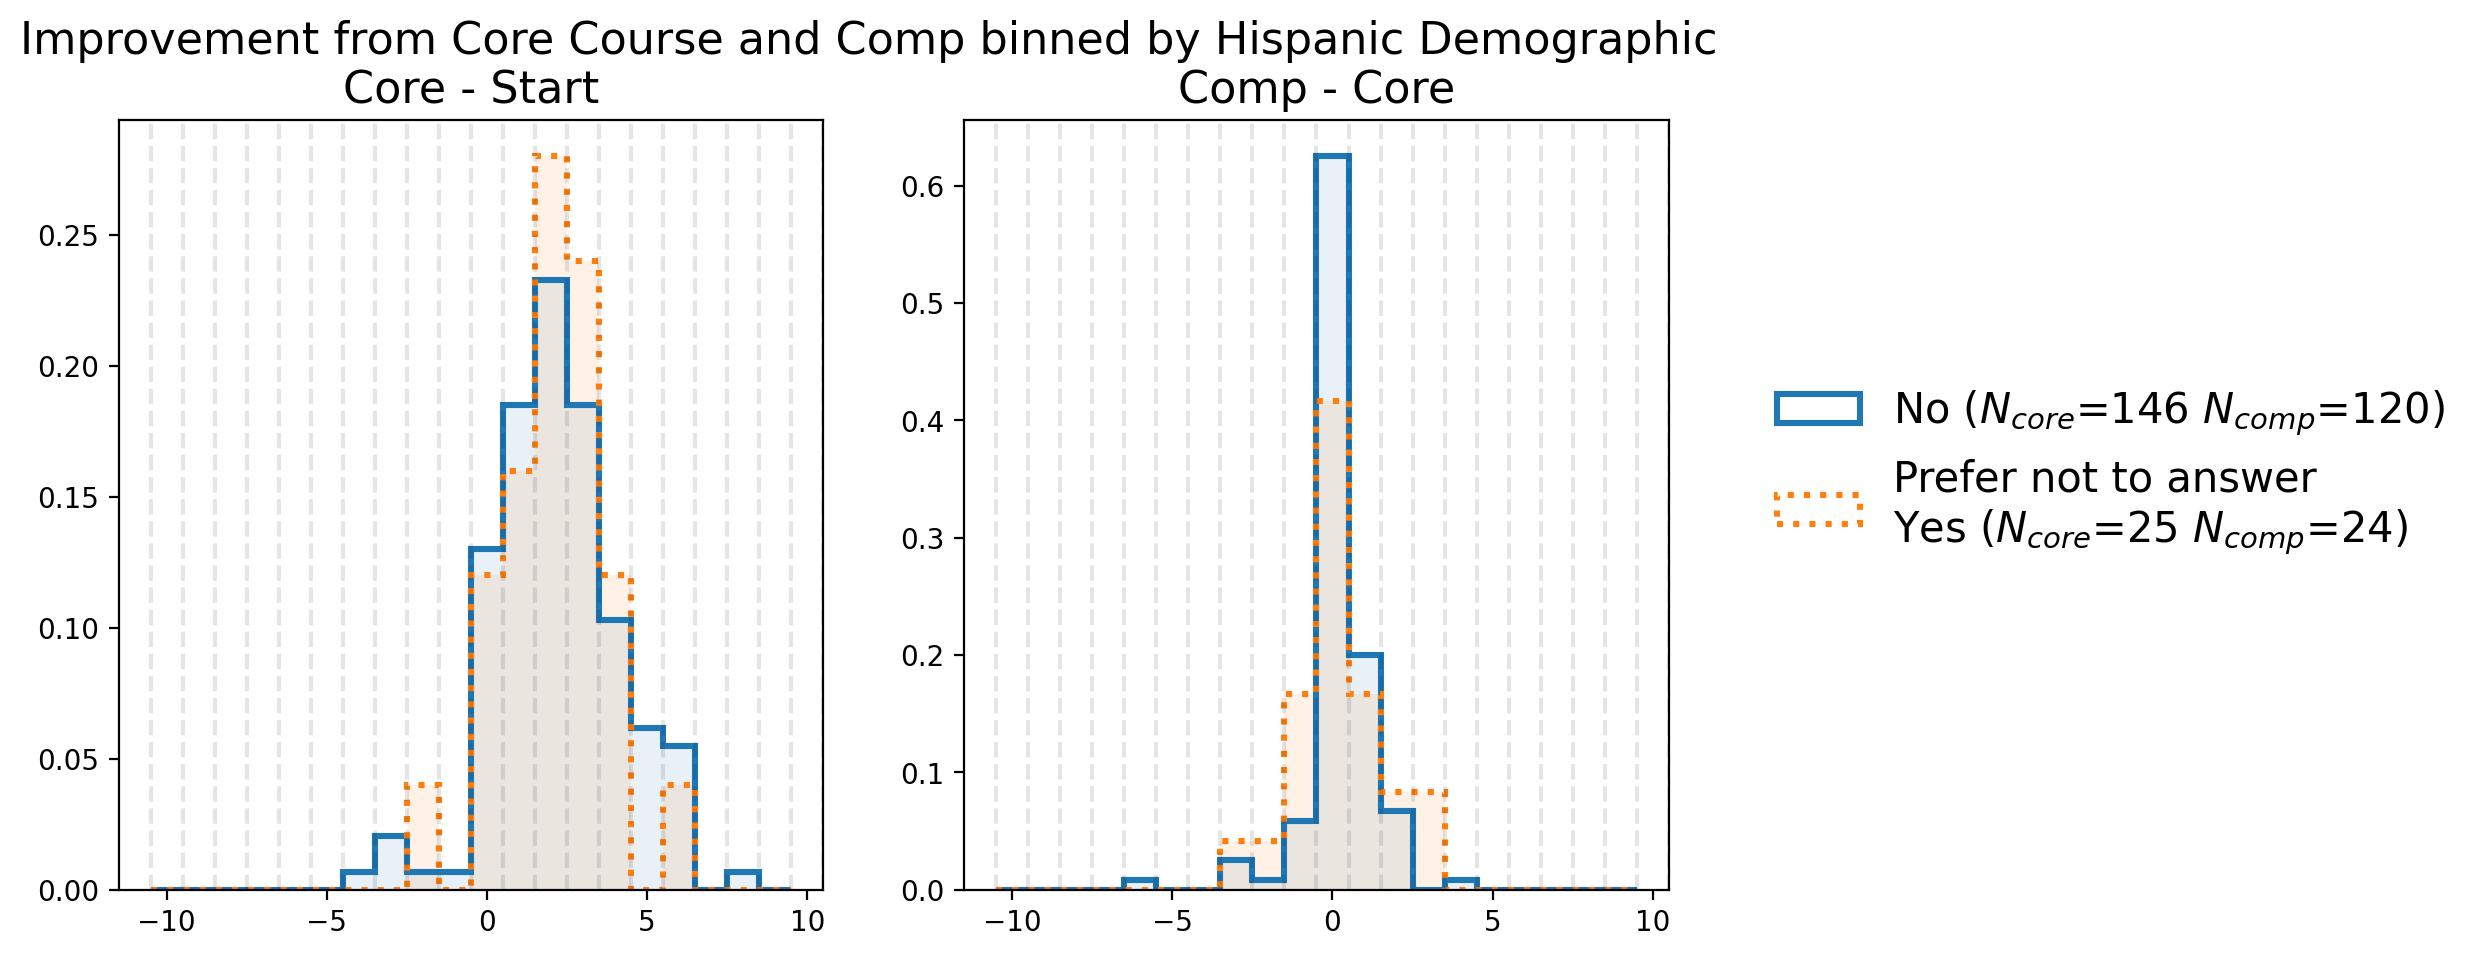

In [113]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

dcol = 'Hispanic'

core_i, comp_i = get_comp_demo(QOLData, dcol, fig, ax)
ax[1].legend(frameon=False, bbox_to_anchor=(1.1,.7), fontsize=15)

for xx in ax:
    for ll in np.arange(-10.5, 11, 1):
        xx.axvline(ll, color='k', ls='--', alpha=.1)

fig.suptitle(f'Improvement from Core Course and Comp binned by {dcol} Demographic', fontsize=16)

In [156]:
kale = ax[1]

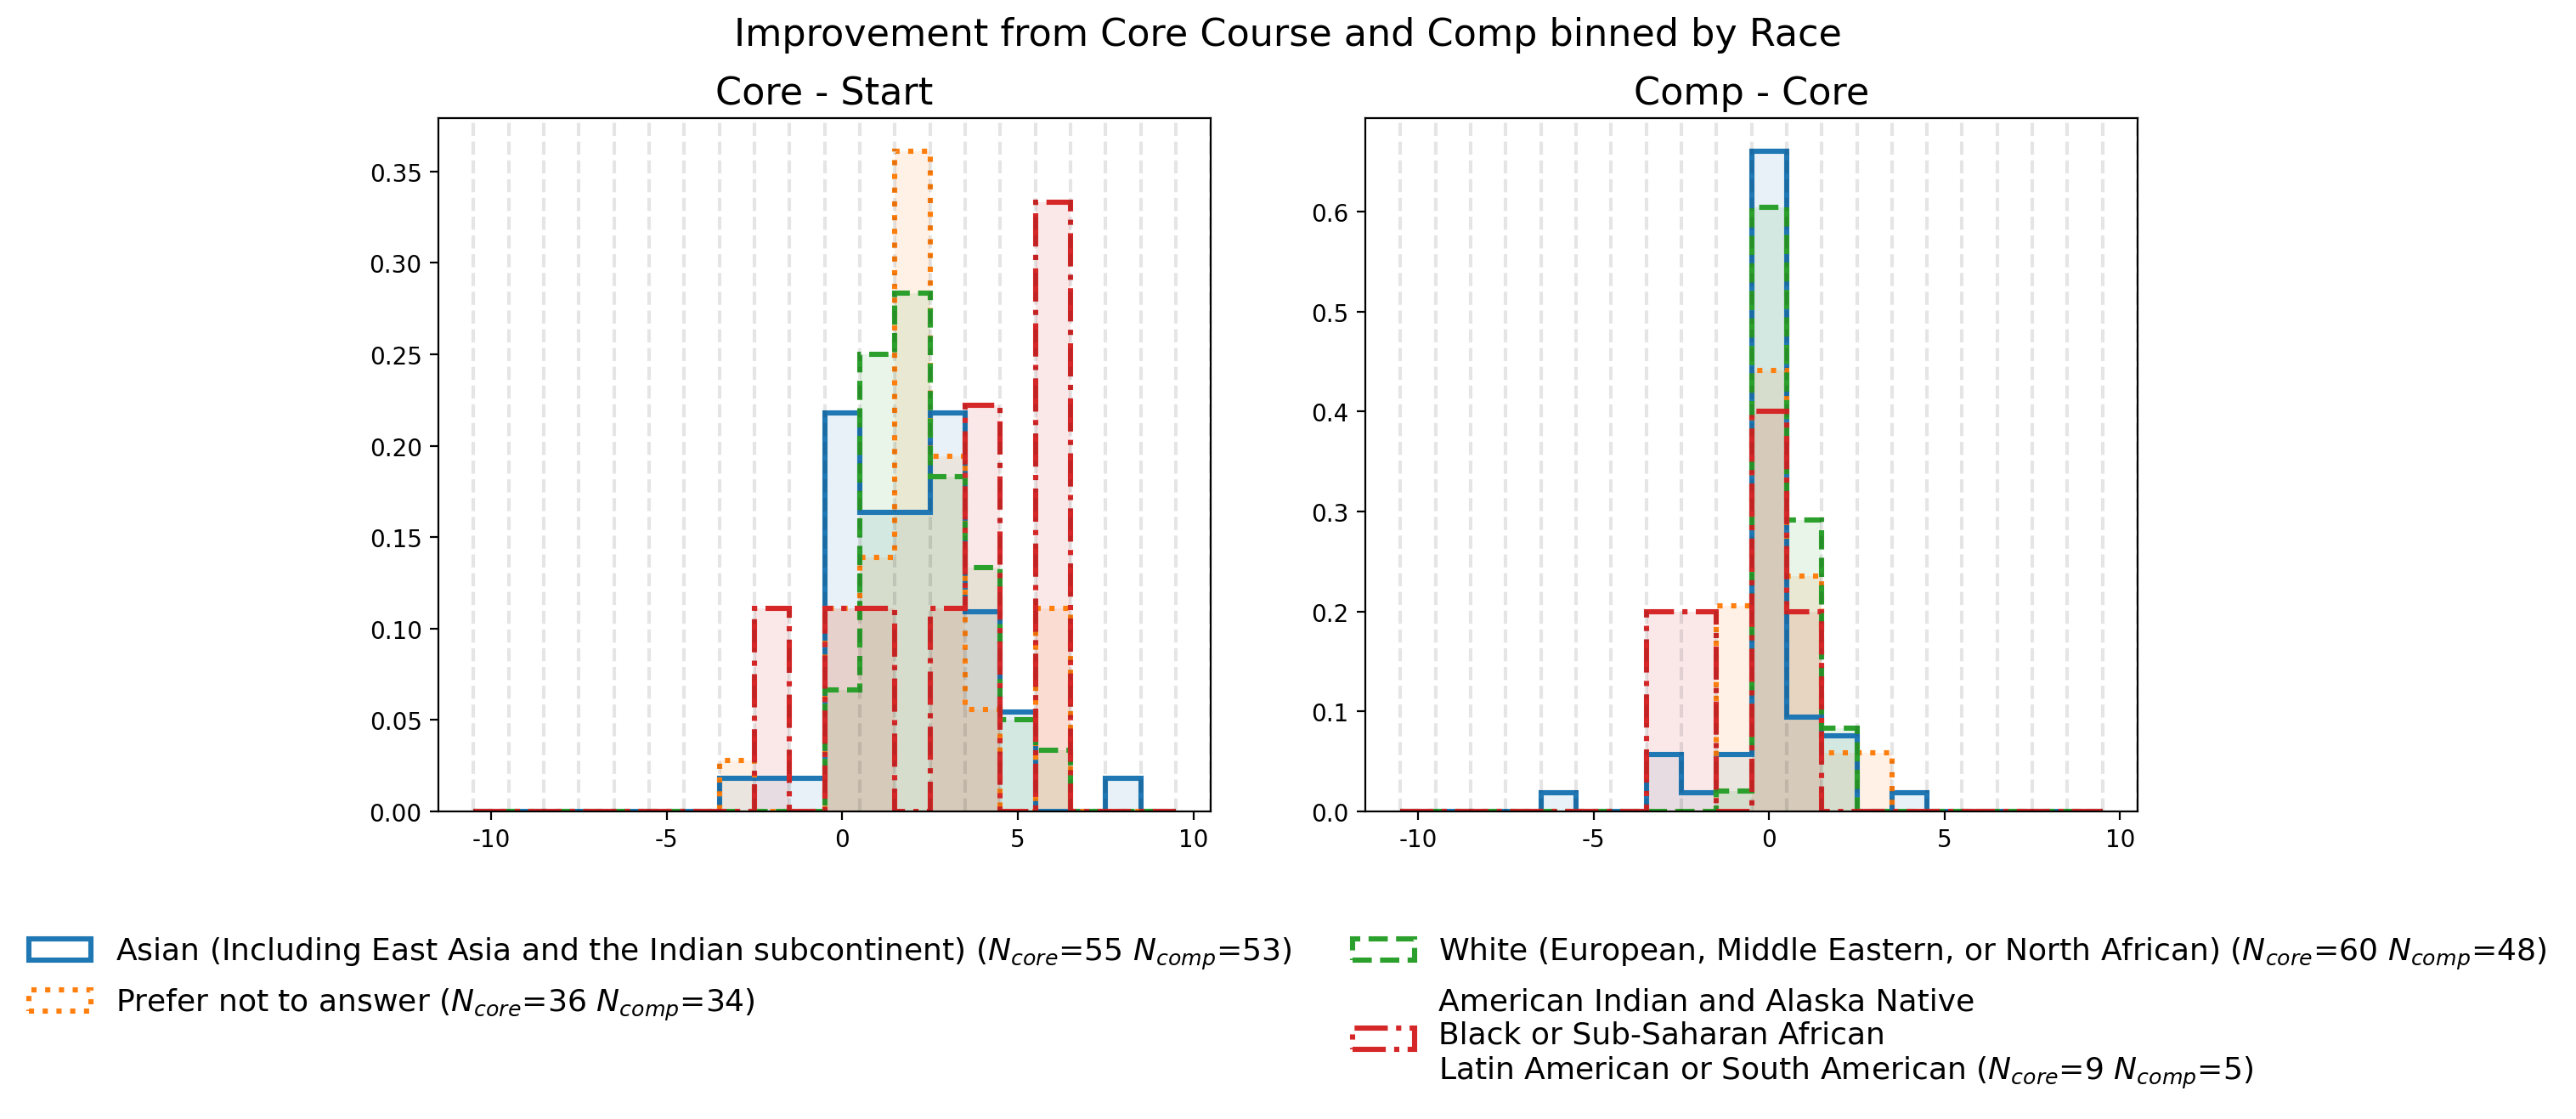

In [190]:
fig, ax = plt.subplots(ncols=2, figsize=(10,6))

dcol = 'Race'

core_i, comp_i = get_comp_demo(QOLData, dcol, fig, ax)
xlbls = np.array([-10, -5, 0, 5, 10])

for xx in ax:
    box = xx.get_position()
    xx.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    xx.set_xticks(xlbls, xlbls)
    for ll in np.arange(-10.5, 11, 1):
        xx.axvline(ll, color='k', ls='--', alpha=.1)
    
# plt.subplots_adjust(bottom=0.05, left=0.05)
fig.suptitle(f'Improvement from Core Course and Comp binned by {dcol}', fontsize=16)

fig.subplots_adjust(bottom=0.2, right=1, left=0)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, frameon=False, loc='lower center', bbox_to_anchor=(0.5, -.1), ncol=2, fontsize=13)
# ax[0].legend(frameon=False, 
# Need to figure out how to put horizontal legend under plot
# ax[0].legend(frameon=False, bbox_to_anchor=(1,-.05), ncol=2, fontsize=15)

### Misc

In [311]:
def split_QOL(factor, data, fn=np.mean):
    cutoff = fn(data[factor])
    above = data[data[factor]>=cutoff]
    below = data[data[factor]<cutoff]
    return above, below

In [313]:
happy_students, nonhappy_students = split_QOL("Happy", QOLData)
belong_students, nonbelong_students = split_QOL("Belong", QOLData)
community_students, noncommunity_students = split_QOL("Community", QOLData)

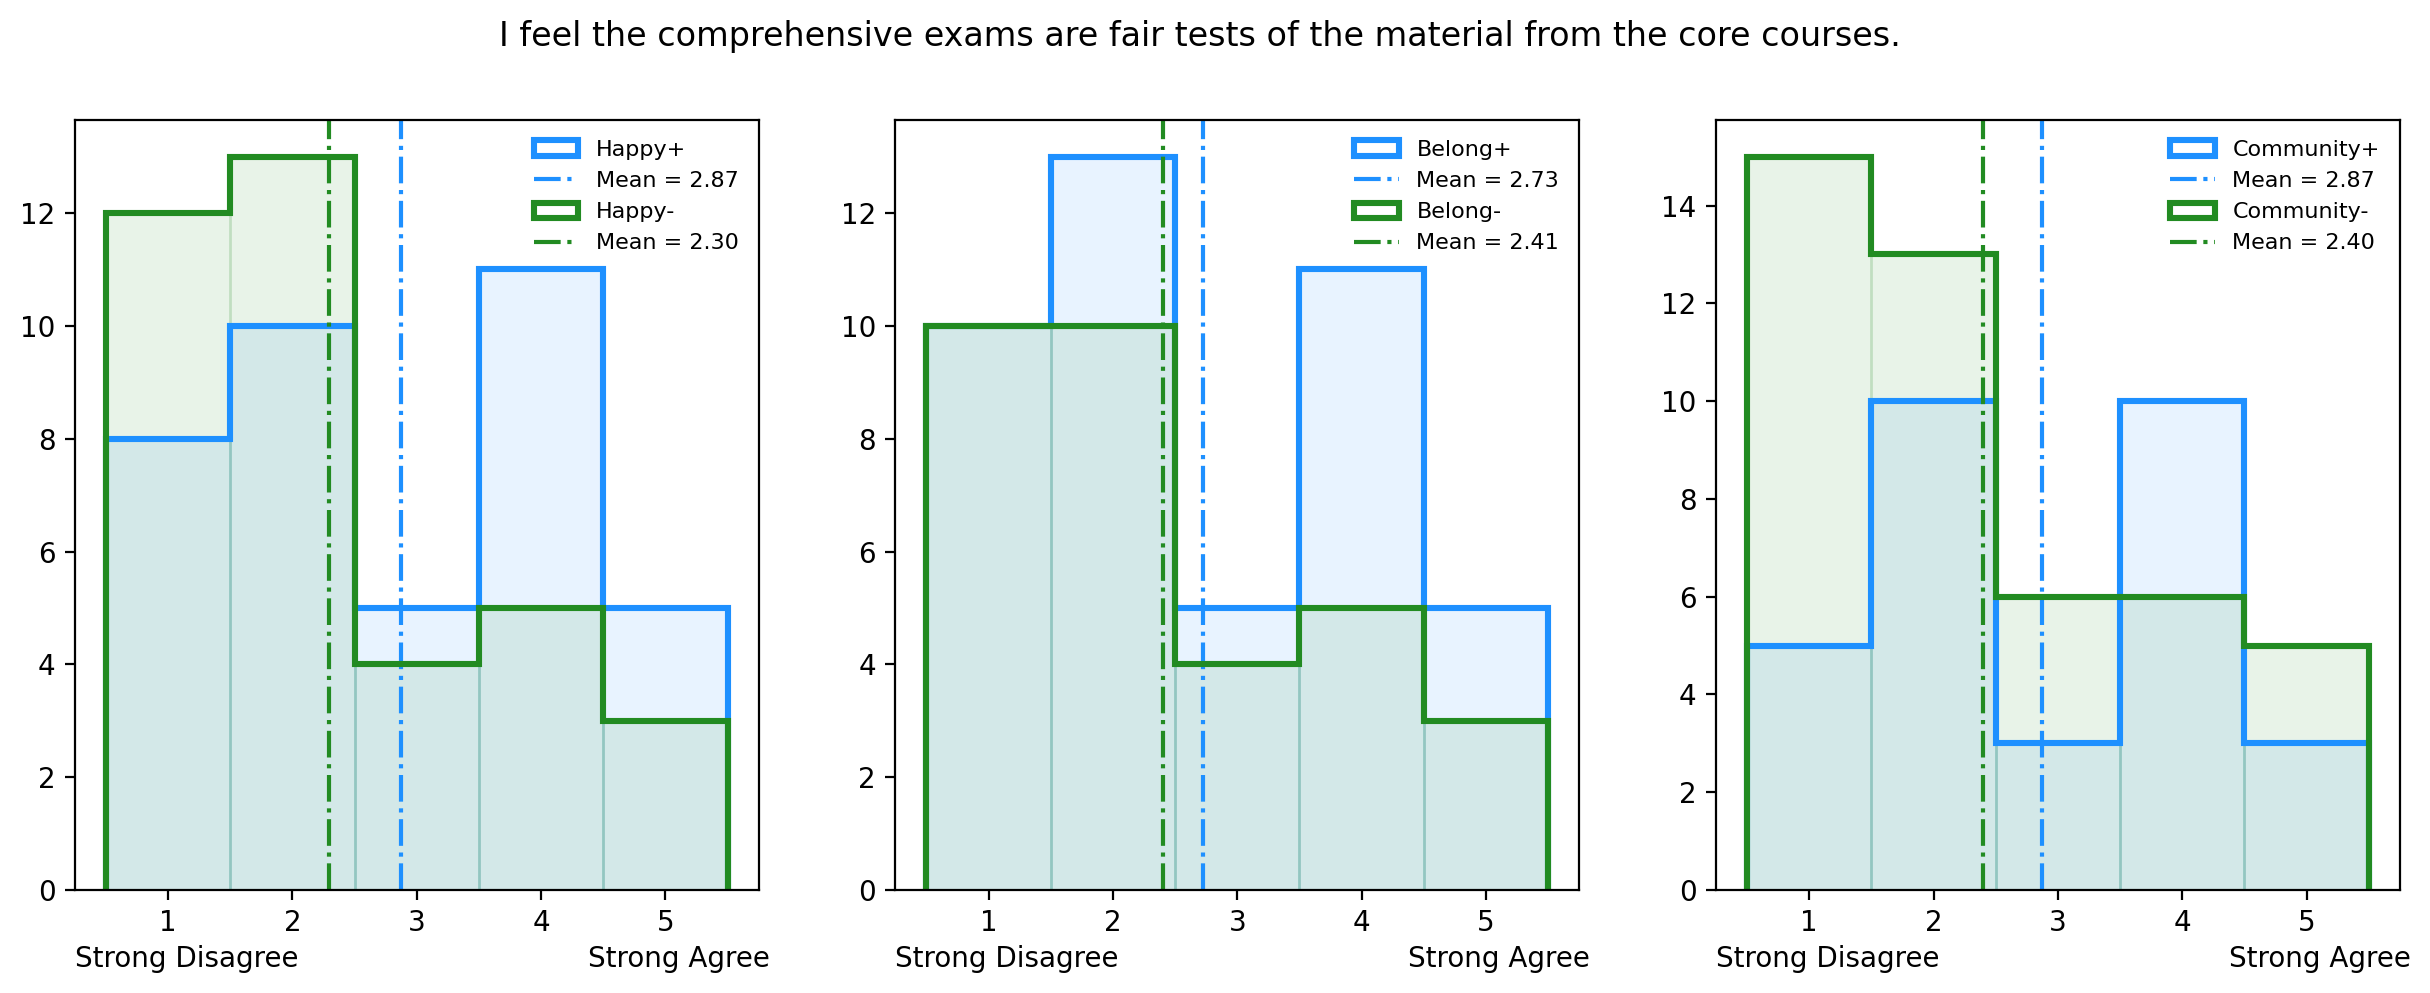

In [314]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

generic_rating_hist("Comp Fair", happy_students, fig, ax[0], color='dodgerblue', title=True,
                    label="Happy+", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Comp Fair", nonhappy_students, fig, ax[0], color='forestgreen', title=True,
                    label="Happy-", guidelines=False, annotate=True, legend=False)

generic_rating_hist("Comp Fair", belong_students, fig, ax[1], color='dodgerblue', title=True,
                    label="Belong+", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Comp Fair", nonbelong_students, fig, ax[1], color='forestgreen', title=True,
                    label="Belong-", guidelines=False, annotate=True, legend=False)

generic_rating_hist("Comp Fair", community_students, fig, ax[2], color='dodgerblue', title=True,
                    label="Community+", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Comp Fair", noncommunity_students, fig, ax[2], color='forestgreen', title=True,
                    label="Community-", guidelines=False, annotate=True, legend=False)

for xx in ax:
    xx.legend(frameon=False, loc='upper right', fontsize=8)

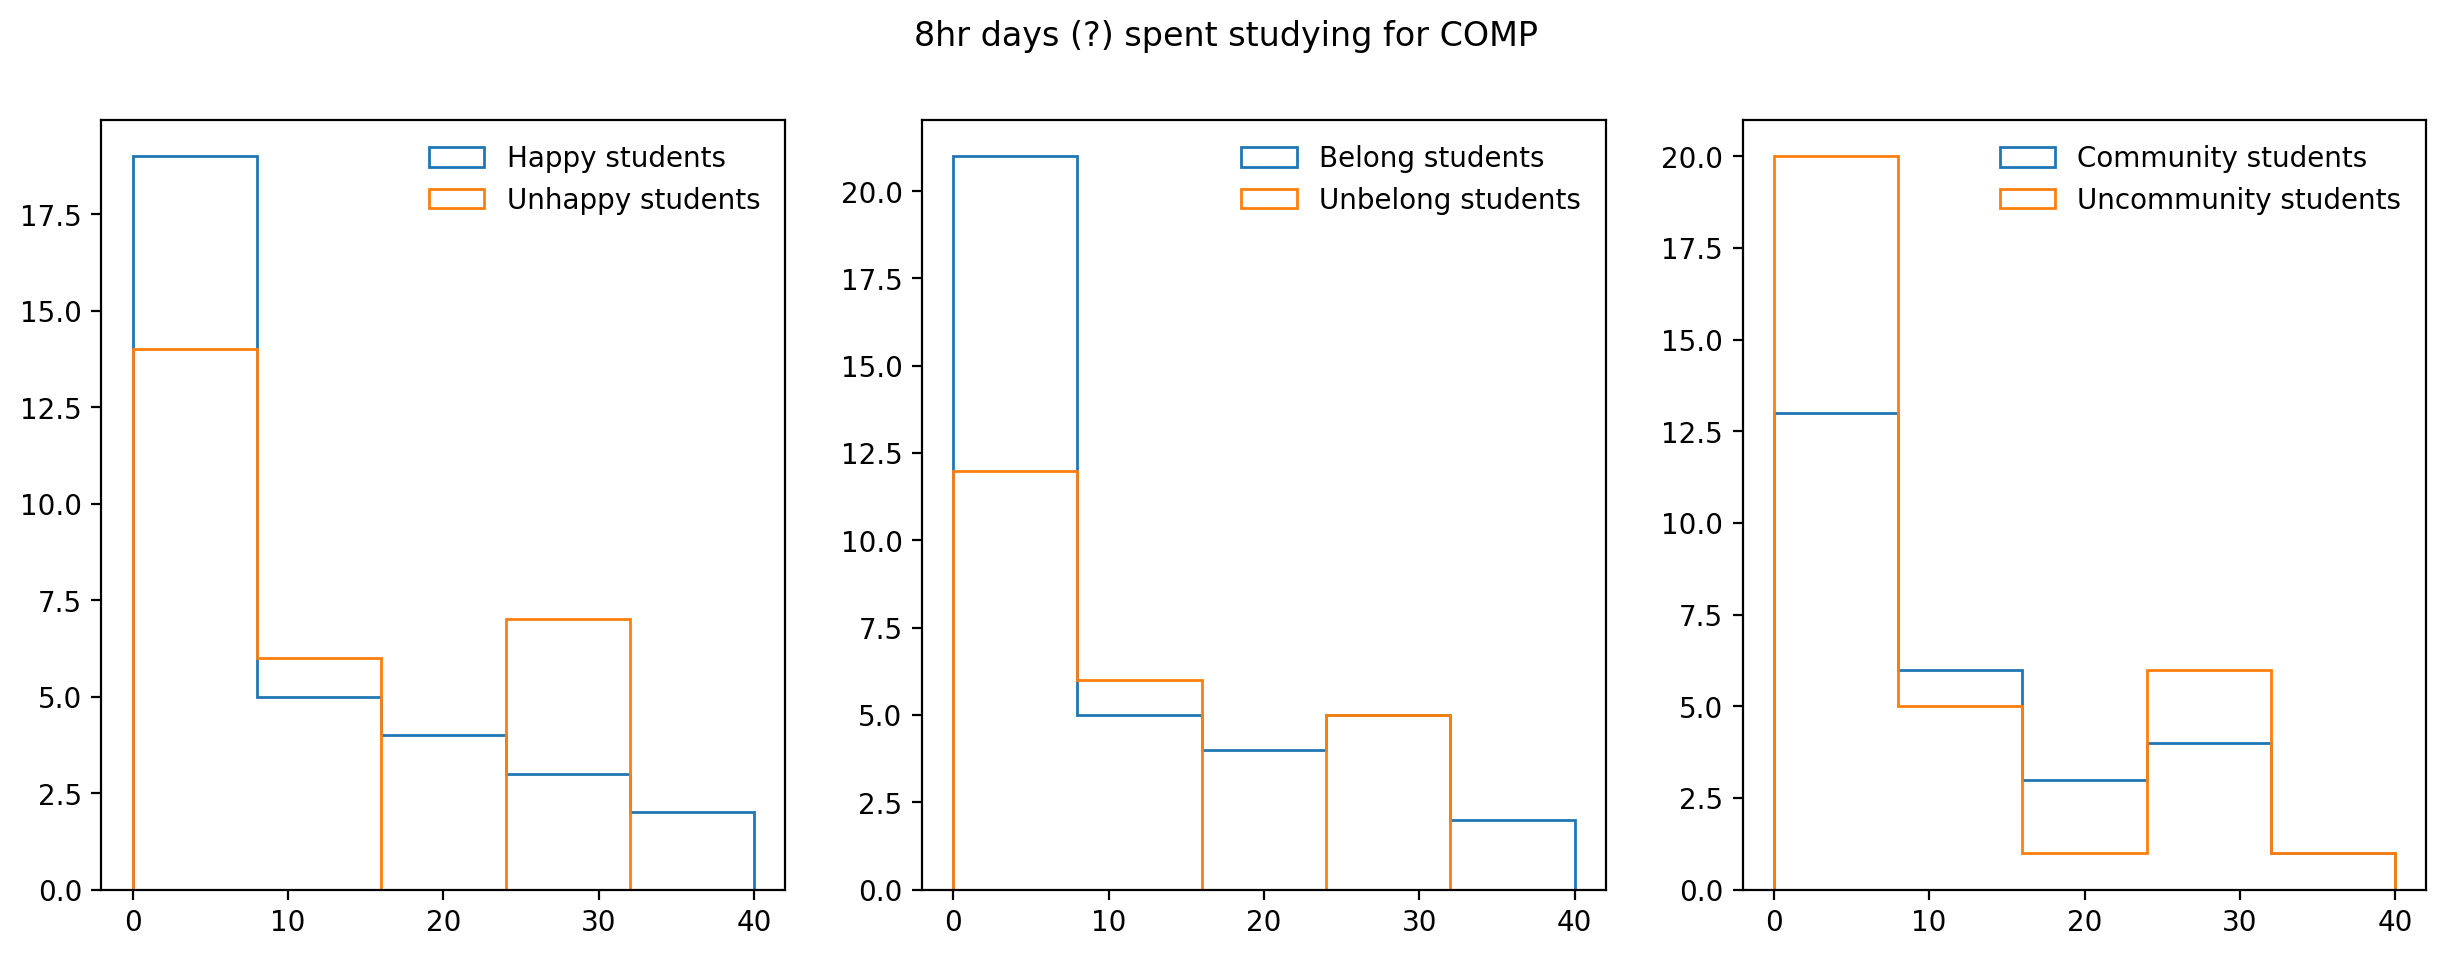

In [315]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].hist(happy_students['COMP Time Prep'], label='Happy students', histtype='step', range=(0, 40), bins=5)
ax[0].hist(nonhappy_students['COMP Time Prep'], label='Unhappy students', histtype='step', range=(0, 40), bins=5)
ax[1].hist(belong_students['COMP Time Prep'], label='Belong students', histtype='step', range=(0, 40), bins=5)
ax[1].hist(nonbelong_students['COMP Time Prep'], label='Unbelong students', histtype='step', range=(0, 40), bins=5)
ax[2].hist(community_students['COMP Time Prep'], label='Community students', histtype='step', range=(0, 40), bins=5)
ax[2].hist(noncommunity_students['COMP Time Prep'], label='Uncommunity students', histtype='step', range=(0, 40), bins=5)


fig.suptitle("8hr days (?) spent studying for COMP")

for xx in ax:
    xx.legend(frameon=False)

In [566]:
import matplotlib.patches as patches
from matplotlib.lines import Line2D

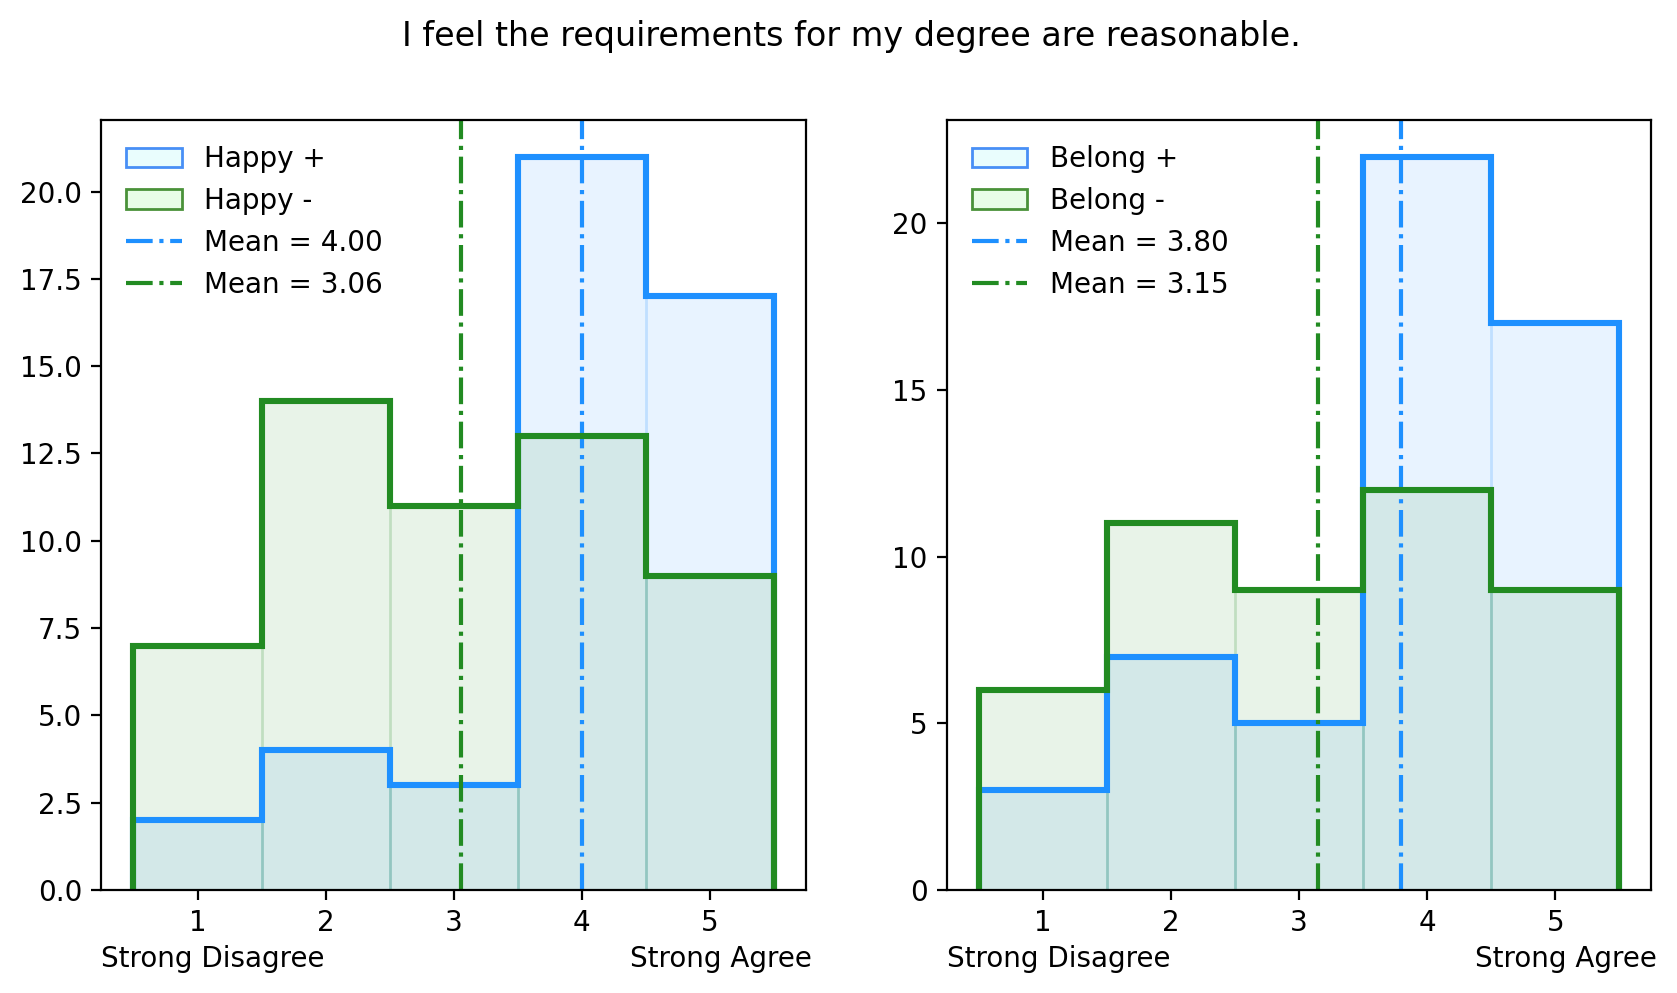

In [588]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

generic_rating_hist("Degree Requirements", happy_students, fig, ax[0], color='dodgerblue',
                    title=False, label="Happy+", guidelines=False, annotate=False, legend=False, meanlabel=False)
generic_rating_hist("Degree Requirements", nonhappy_students, fig, ax[0], color='forestgreen',
                    title=True, label="Happy-", guidelines=False, annotate=True, legend=False, meanlabel=False)

generic_rating_hist("Degree Requirements", belong_students, fig, ax[1], color='dodgerblue',
                    title=False, label="Belong+", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Degree Requirements", nonbelong_students, fig, ax[1], color='forestgreen',
                    title=True, label="Belong-", guidelines=False, annotate=True, legend=False)

# generic_rating_hist("Degree Requirements", community_students, fig, ax[2], color='dodgerblue',
#                     title=False, label="Community+", guidelines=False, annotate=False, legend=False)
# generic_rating_hist("Degree Requirements", noncommunity_students, fig, ax[2], color='forestgreen',
#                     title=True, label="Community-", guidelines=False, annotate=True, legend=False)
blue_patch = patches.Patch(edgecolor=(72/256, 144/256, 247/256), label='Happy +', facecolor=(234/256, 254/256, 254/256))
green_patch = patches.Patch(edgecolor=(74/256, 147/256, 57/256), label='Happy -', facecolor=(234/256, 254/256, 233/256))
line_m = Line2D([0], [0], label='Mean = 4.00', color='dodgerblue', ls='-.')
line_p = Line2D([0], [0], label='Mean = 3.06', color='forestgreen', ls='-.')
ax[0].legend(handles=[blue_patch, green_patch, line_m, line_p], frameon=False)

blue_patch = patches.Patch(edgecolor=(72/256, 144/256, 247/256), label='Belong +', facecolor=(234/256, 254/256, 254/256))
green_patch = patches.Patch(edgecolor=(74/256, 147/256, 57/256), label='Belong -', facecolor=(234/256, 254/256, 233/256))
line_m = Line2D([0], [0], label='Mean = 3.80', color='dodgerblue', ls='-.')
line_p = Line2D([0], [0], label='Mean = 3.15', color='forestgreen', ls='-.')
ax[1].legend(handles=[blue_patch, green_patch, line_m, line_p], frameon=False)




In [139]:
compfair_students, noncompfair_students = split_QOL("Comp Fair", QOLData)

Text(0.5, 1.0, 'Community')

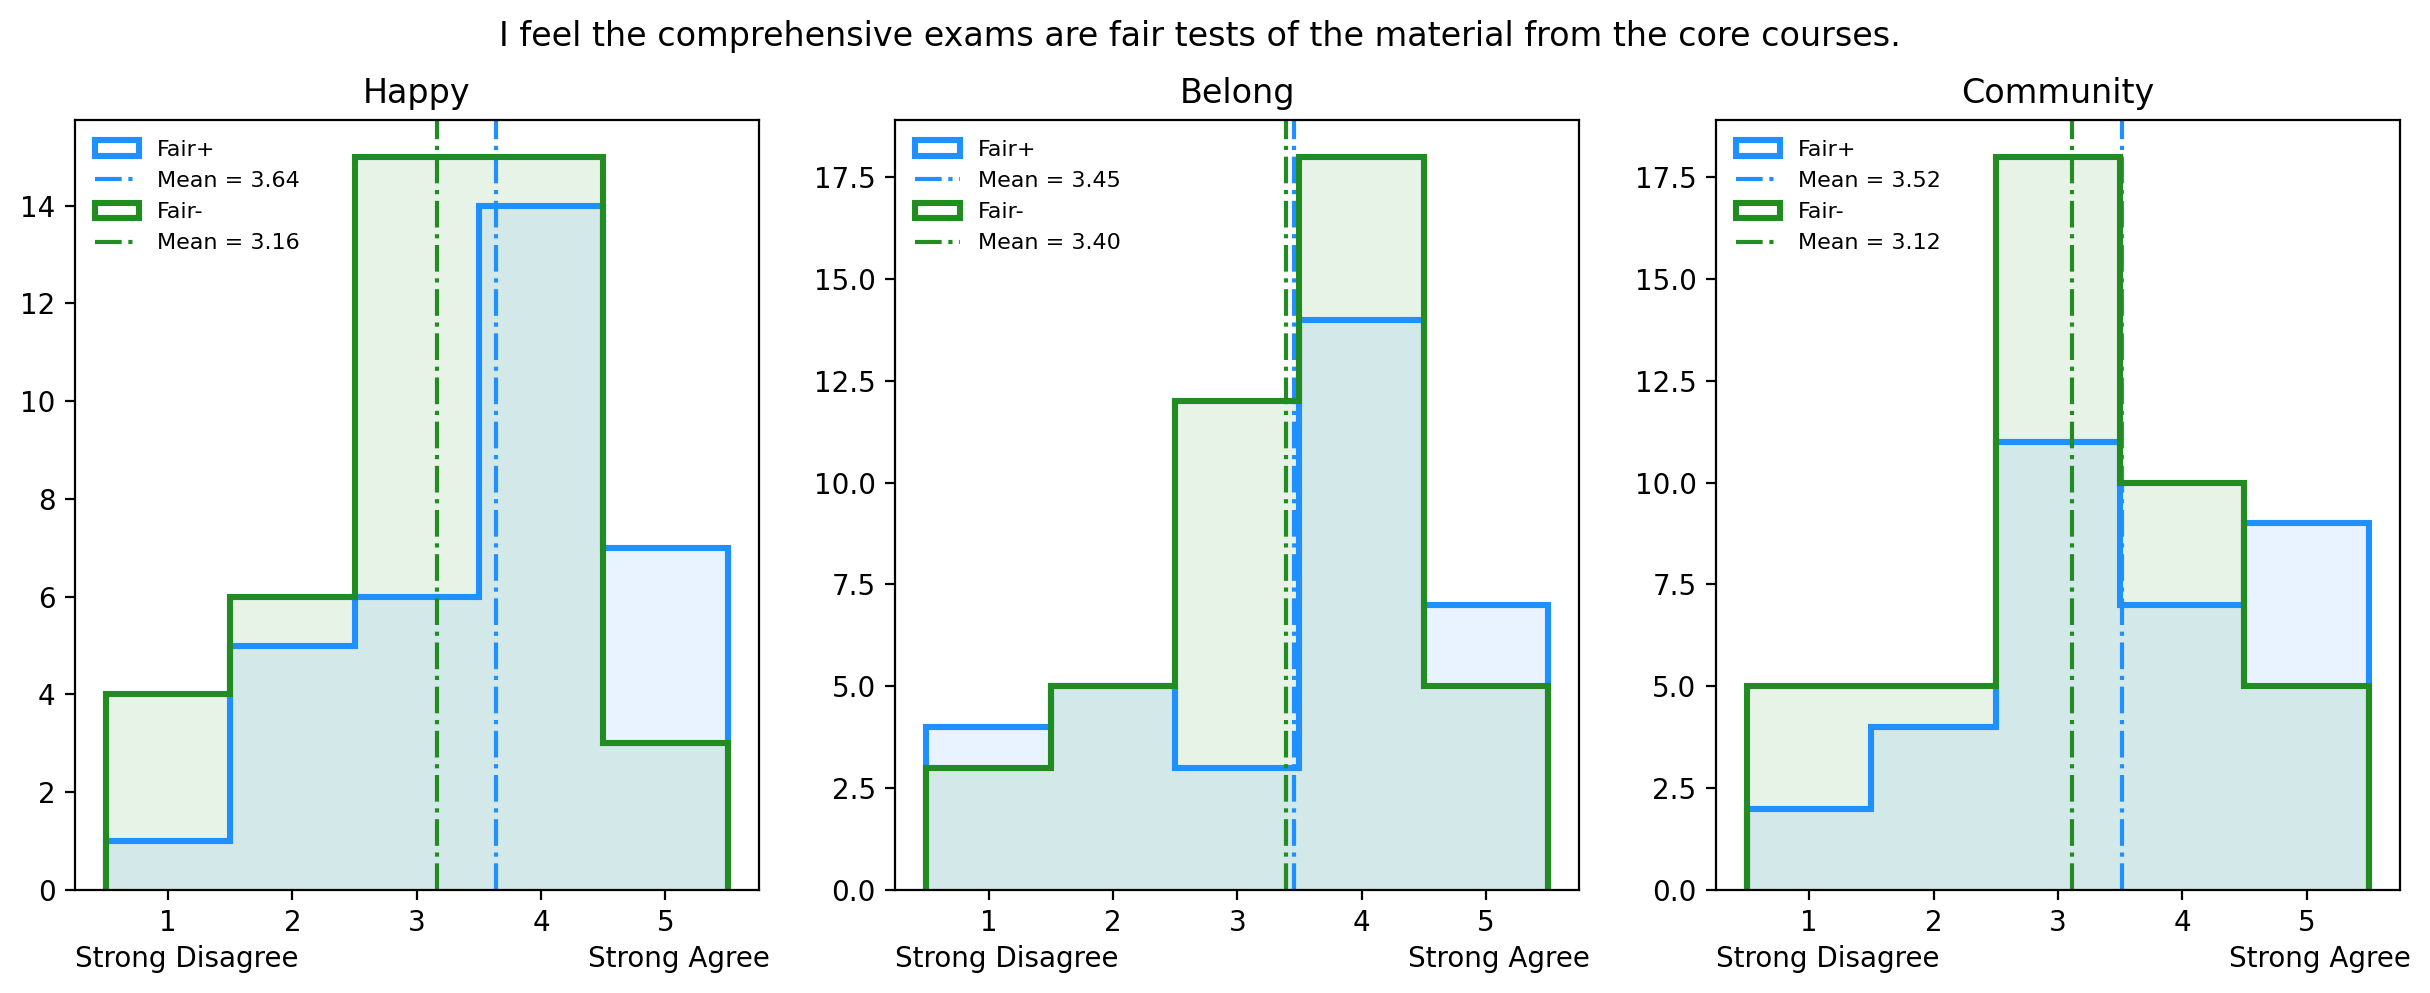

In [140]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

generic_rating_hist("Happy", compfair_students, fig, ax[0], color='dodgerblue',
                    title=False, label="Fair+", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Happy", noncompfair_students, fig, ax[0], color='forestgreen',
                    title=False, label="Fair-", guidelines=False, annotate=True, legend=False)

generic_rating_hist("Belong", compfair_students, fig, ax[1], color='dodgerblue',
                    title=False, label="Fair+", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Belong", noncompfair_students, fig, ax[1], color='forestgreen',
                    title=False, label="Fair-", guidelines=False, annotate=True, legend=False)

generic_rating_hist("Community", compfair_students, fig, ax[2], color='dodgerblue',
                    title=False, label="Fair+", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Community", noncompfair_students, fig, ax[2], color='forestgreen',
                    title=False, label="Fair-", guidelines=False, annotate=True, legend=False)

fig.suptitle(Questions['Comp Fair'])
for xx in ax:
    xx.legend(frameon=False, loc='upper left', fontsize=8)

ax[0].set_title("Happy")
ax[1].set_title("Belong")
ax[2].set_title("Community")

In [357]:
above_ugrad, below_ugrad = split_QOL('Undergrad Prep Math', QOLData)

In [420]:
above_ugrad = QOLData[QOLData['Undergrad Prep Math'] > 3]
below_ugrad = QOLData[QOLData['Undergrad Prep Math'] <= 3]

In [421]:
np.sum(np.isnan(below_ugrad['Comp Fair']))

np.int64(12)

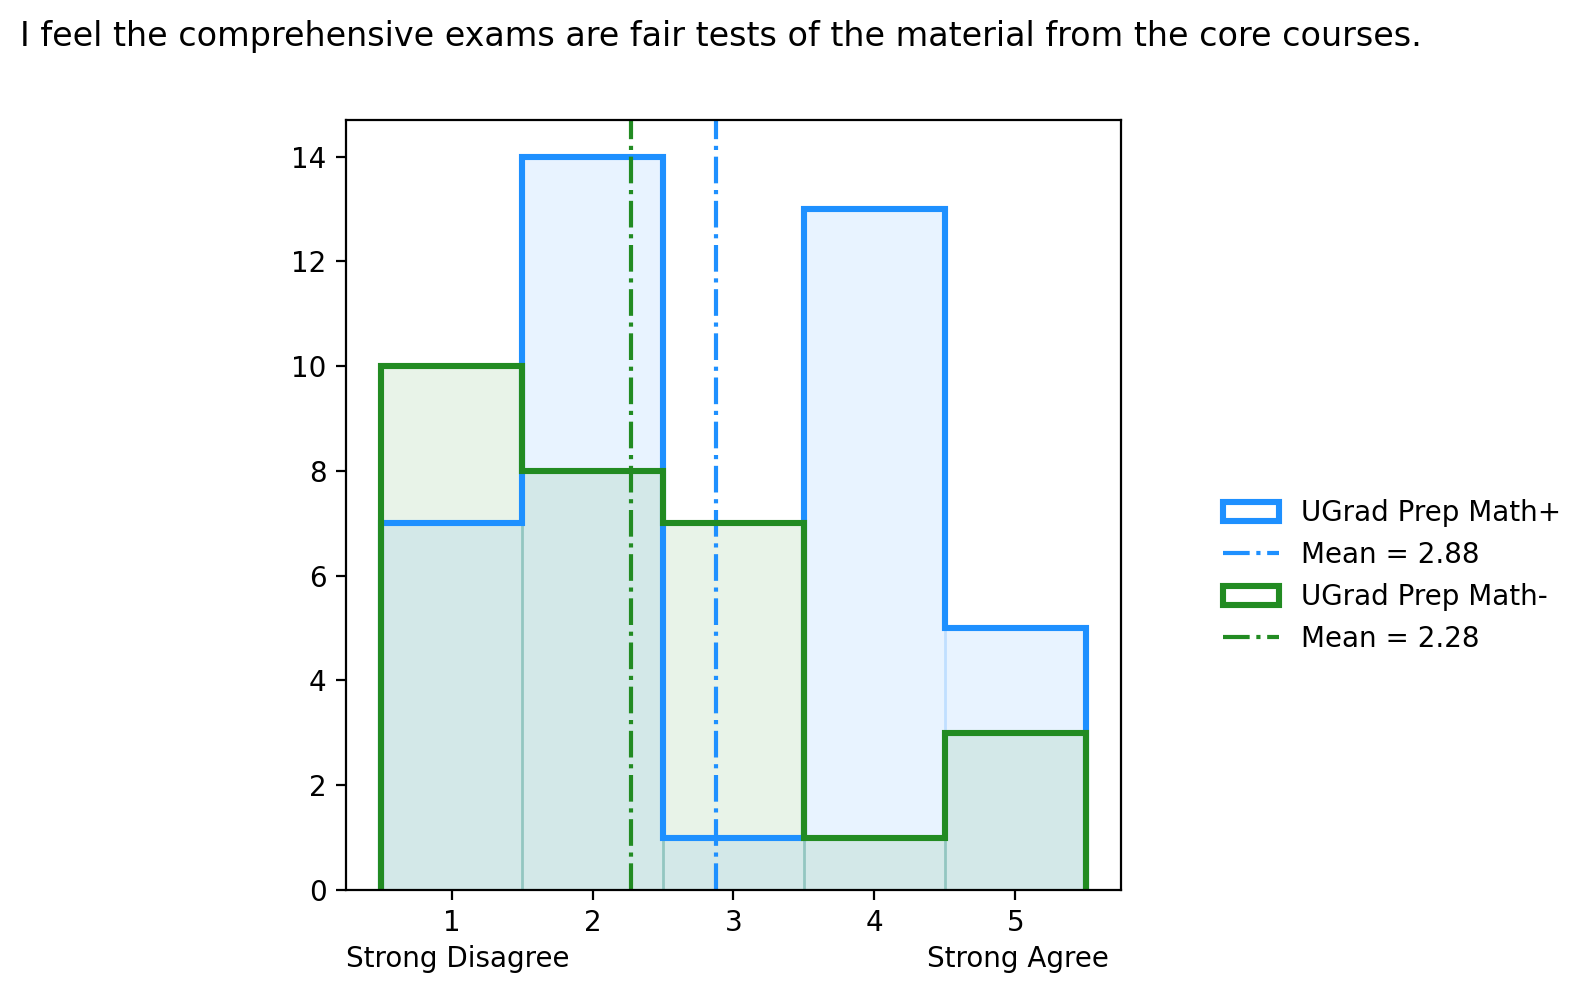

In [422]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

generic_rating_hist("Comp Fair", above_ugrad, fig, ax, color='dodgerblue',
                    title=False, label="UGrad Prep Math+", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Comp Fair", below_ugrad, fig, ax, color='forestgreen',
                    title=True, label="UGrad Prep Math-", guidelines=False, annotate=True, legend=True)

In [168]:
total_above_start = above_ugrad['Knowledge CM Start'] + above_ugrad['Knowledge QM Start'] + above_ugrad['Knowledge EM Start'] + above_ugrad['Knowledge SM Start']
total_below_start = below_ugrad['Knowledge CM Start'] + below_ugrad['Knowledge QM Start'] + below_ugrad['Knowledge EM Start'] + below_ugrad['Knowledge SM Start']

In [179]:
total_course_bins = np.linspace(4, 40, 10)

Text(0.5, 1.0, 'Total Knowledge of Core Courses at Start')

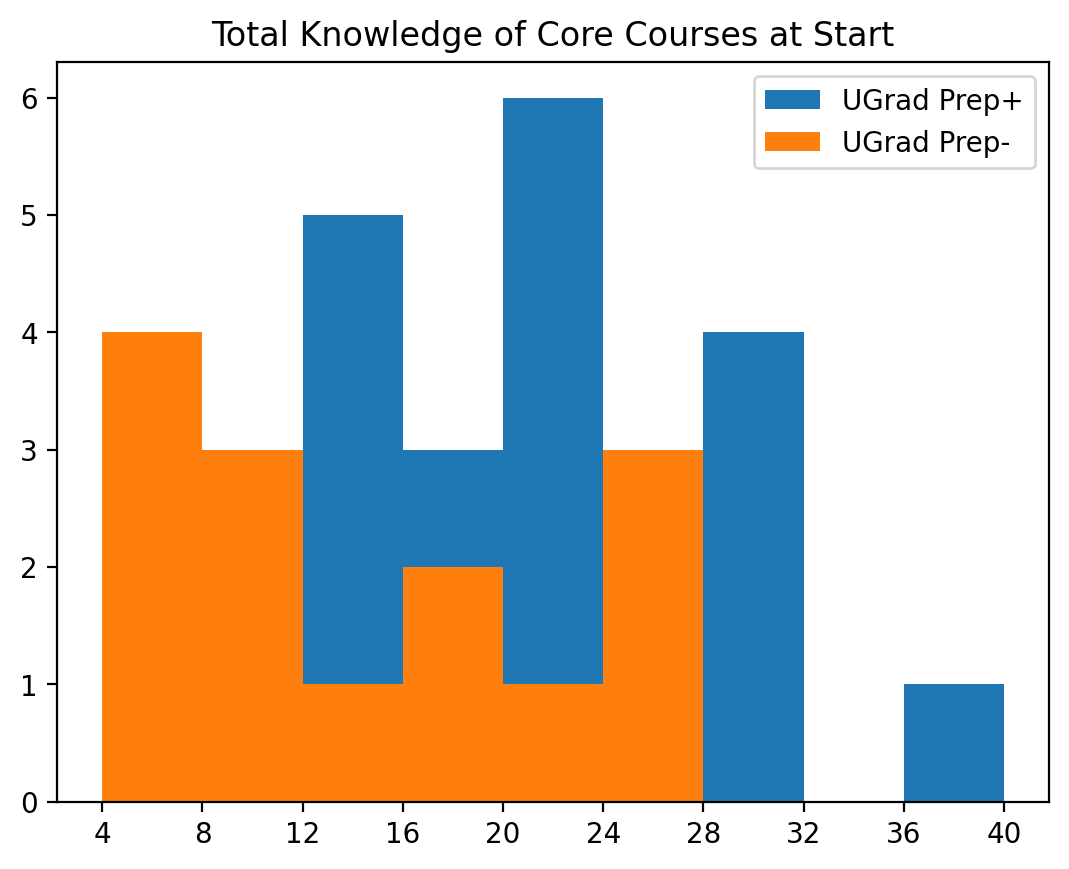

In [182]:
plt.hist(total_above_start, range=(4, 40), bins=9, label='UGrad Prep+');
plt.hist(total_below_start, range=(4, 40), bins=9, label='UGrad Prep-');
plt.xticks(total_course_bins)
plt.legend()
plt.title("Total Knowledge of Core Courses at Start")

In [419]:
cmap = colormaps.get('tab10')

In [425]:
above_ugrad = QOLData[QOLData['Undergrad Prep Math'] > 3]
below_ugrad = QOLData[QOLData['Undergrad Prep Math'] < 3]

Text(0.5, 0.98, 'Knowledge before course start')

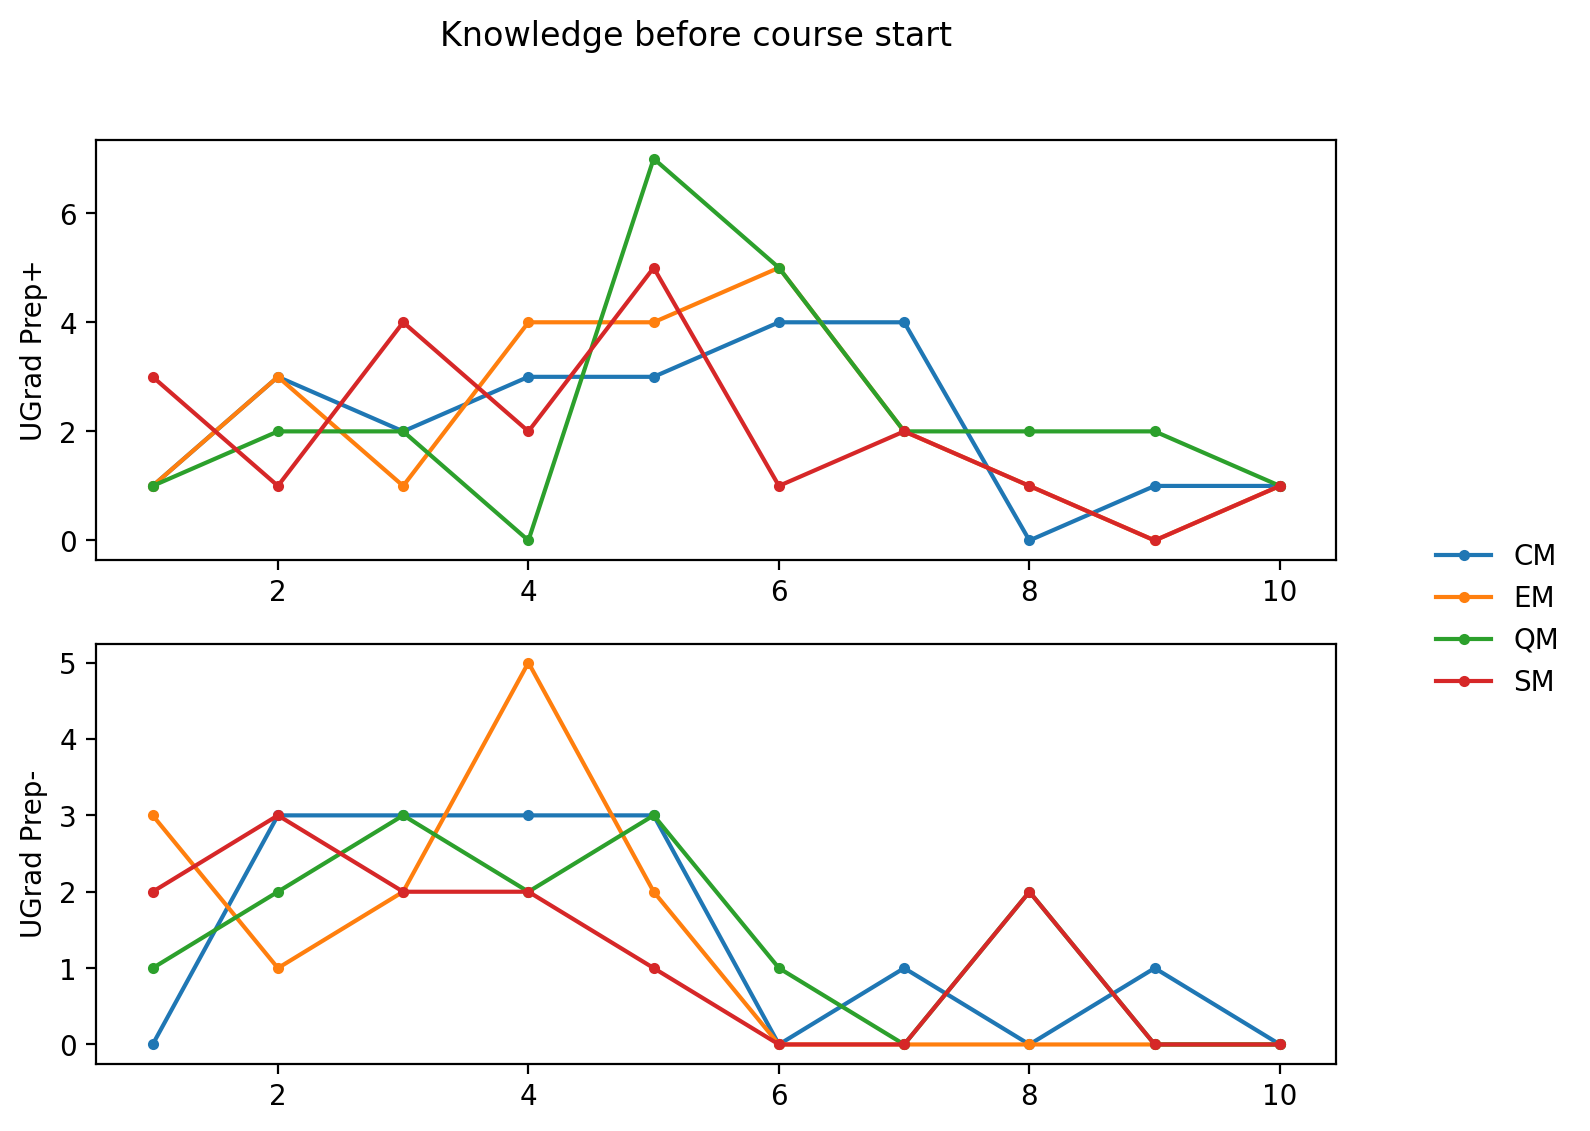

In [426]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 6))

for k,course in enumerate(['CM', 'EM', 'QM', 'SM']):
    for i,dat in enumerate([above_ugrad, below_ugrad]):
        counts, bin_centers = np.histogram(dat[f'Knowledge {course} Start'], range=(1,11), bins=10)
        ax[i].plot(bin_centers[:-1], counts, '.-', color=cmap(k), label=course)

ax[0].legend(frameon=False, bbox_to_anchor=(1.2, .1))
ax[0].set_ylabel("UGrad Prep+")
ax[1].set_ylabel("UGrad Prep-")
fig.suptitle("Knowledge before course start")

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 6))

for k,course in enumerate(['CM', 'EM', 'QM', 'SM']):
    for i,dat in enumerate([above_ugrad, below_ugrad]):
        counts, bin_centers = np.histogram(dat[f'Knowledge {course} Start'], range=(1,11), bins=10)
        ax[i].plot(bin_centers[:-1], counts, '.-', color=cmap(k), label=course)

ax[0].legend(frameon=False, bbox_to_anchor=(1.2, .1))
ax[0].set_ylabel("UGrad Prep+")
ax[1].set_ylabel("UGrad Prep-")
fig.suptitle("Knowledge difference between start and course")

Degree reqs vs Demographics

Degree reqs vs Non-core classes

Degree reqs vs Core Courses

Research Group vs Core Course Preparation for Research

In [80]:
deg_questions = ['Grad Seminar', 'Grad Astro Lab','Degree Requirements', 
                 'CM Core Prep Research', 'EM Core Prep Research', 'SM Core Prep Research', 'QM1 Core Prep Research','QM2 Core Prep Research', ]

In [81]:
deg_requirements = np.zeros((len(deg_questions), 5))
for i,question in enumerate(deg_questions):
    QOL_question = QOLData[question]
    nan_filt = ~np.isnan(QOL_question)
    deg_requirements[i,:] = np.bincount(QOL_question[nan_filt].astype(int), minlength=6)[1:]

In [82]:
data_cum = deg_requirements.cumsum(axis=1)

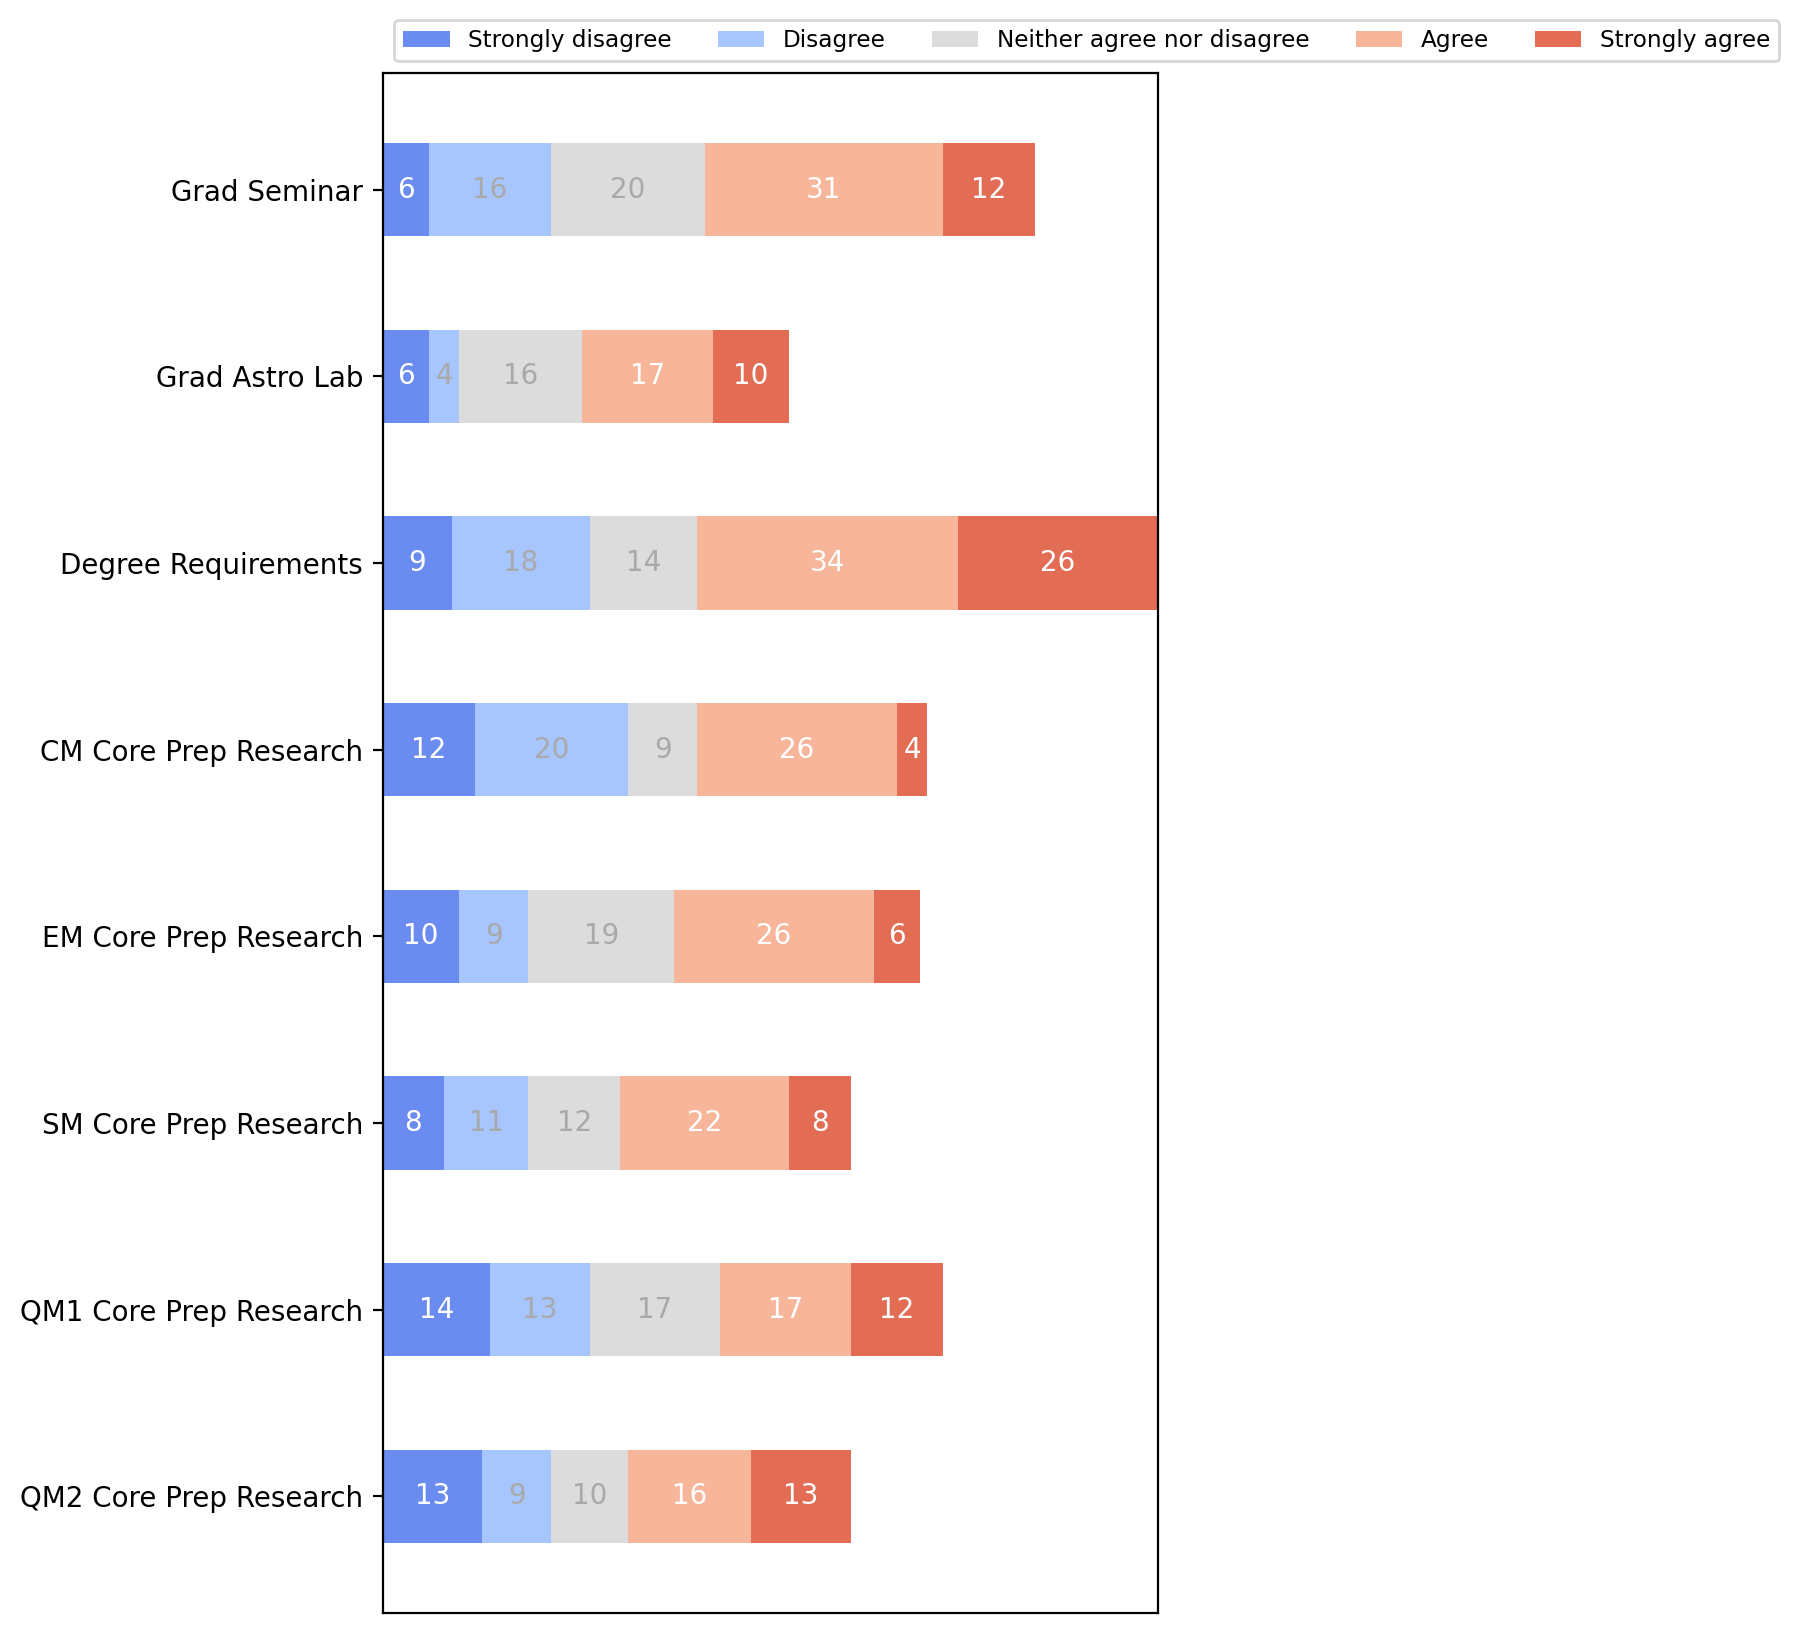

In [83]:
fig, ax = plt.subplots(1, figsize=(5, 10)) 

cwarm = colormaps.get_cmap('coolwarm')
category_colors = cwarm(np.linspace(0.15, 0.85, 5))

ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(deg_requirements, axis=1).max())

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
data_cum = deg_requirements.cumsum(axis=1)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = deg_requirements[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(deg_questions, widths, left=starts, height=0.5,
                    label=colname, color=color)

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color)
ax.legend(ncols=len(deg_questions), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

In [84]:
deg_requirements = np.zeros((len(deg_questions), 5))
degr_meanerr = np.zeros((len(deg_questions),2))
for i,question in enumerate(deg_questions):
    QOL_question = QOLData[question]
    nan_filt = ~np.isnan(QOL_question)
    deg_requirements[i,:] = np.bincount(QOL_question[nan_filt].astype(int), minlength=6)[1:]
    degr_meanerr[i,0] = np.nanmean(QOL_question)
    
    boot_ci = stats.bootstrap([QOL_question], np.nanmean, confidence_level=.68)
    boot_sigma = np.diff(boot_ci.confidence_interval)/2
    degr_meanerr[i,1] = boot_sigma[0]

In [86]:
nsamples = np.sum(deg_requirements, axis=1)
above_neutral = np.sum(deg_requirements[:,3:], axis=1)/nsamples * 100

In [87]:
Plot_Questions={
            'CM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research CM',
            'EM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research EM',
            'QM1 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 1',
            'QM2 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 2',
            'SM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research SM',
            'Grad Seminar':'I feel the $\\bf{seminar courses}$ help me become better at communicating science research.', 
            'Grad Astro Lab':'I feel the $\\bf{Graduate Lab/Astronomy Lab}$ sufficiently taught me experimental/observational techniques and data analysis.',
            'Degree Requirements': 'I feel the requirements for my $\\bf{degree}$$ are reasonable.'
}

Text(4, 2.25, 'The material I learned in the core courses is $\\bf{applicable}$ $\\bf{to}$ $\\bf{my}$ $\\bf{research}$')

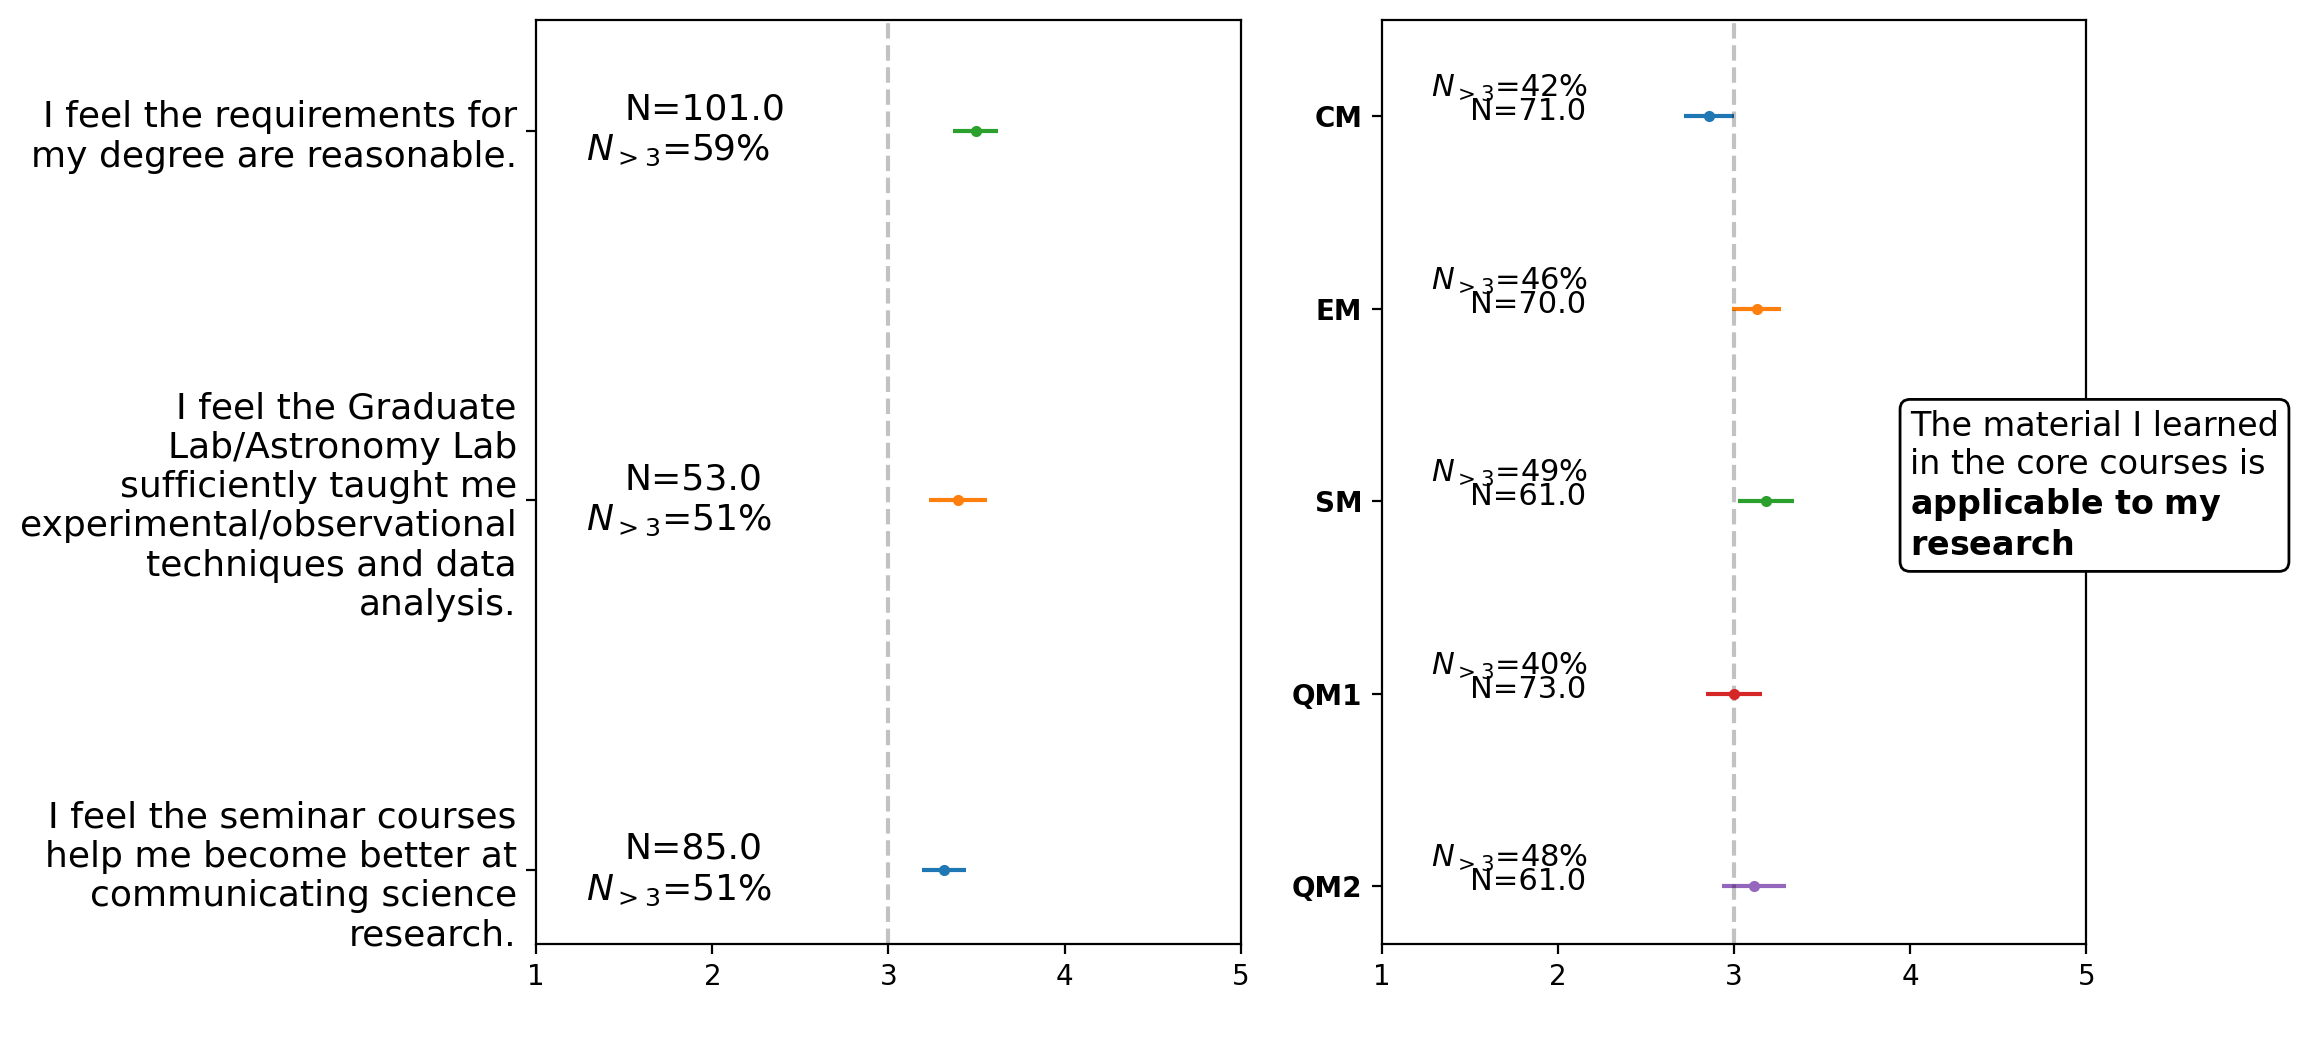

In [452]:
fig, ax = plt.subplots(ncols=2, figsize=(10,6))

for i, dq in enumerate(deg_questions):
    if i <= 2:
        ax[0].errorbar(degr_meanerr[i,0],i, xerr=degr_meanerr[i,1], fmt='.', )
        ax[0].annotate(f"N={nsamples[i]}", (1.5, i+.03), fontsize=13)
        ax[0].annotate("$N_{>3}$" + f"={above_neutral[i]:0.0f}%", (1.28, i-.08), fontsize=13)
    else:
        ax[1].errorbar(degr_meanerr[i,0],i-3, xerr=degr_meanerr[i,1], fmt='.', )
        ax[1].annotate(f"N={nsamples[i]}", (1.5, i-3+.02), fontsize=11)
        ax[1].annotate("$N_{>3}$" + f"={above_neutral[i]:0.0f}%", (1.28, i-3-.1), fontsize=11)
# ax.set_yticks(np.arange(5)+1)
question_text = [Questions[dq] for dq in deg_questions[:3]]
corename = ['CM', 'EM', 'SM', 'QM1', 'QM2']

ax[0].set_yticks(ticks=np.arange(len(question_text)), labels=question_text, wrap=True, fontsize=13)
ax[1].set_yticks(ticks=np.arange(len(corename)), labels=corename, weight='bold')


ax[1].set_ylim(4.3, -.5)
ax[0].set_ylim(-.2, 2.3)
ax[1].invert_yaxis()


for xx in ax:
    xx.set_xlim(1,2)
    xx.set_xticks(np.arange(5)+1)
    xx.axvline(3, ls='--', alpha=.24, color='k')
ax[1].invert_yaxis()
bbox1 = dict(boxstyle="round", fc='w')
ax[1].annotate(r"The material I learned in the core courses is" + r" $\bf{applicable}$ $\bf{to}$ $\bf{my}$ $\bf{research}$",
               (4,2.25), wrap=True, fontsize=12, bbox=bbox1)
# ax[1].annotate(r"hallo $\bf{applicable}$ $\bf{snake}$", (4,1.75), wrap=True, fontsize=12, bbox=bbox1)

# ax[1].yaxis.set_label_position("right")
# ax[1].yaxis.tick_right()
# fig.suptitle("Many students find the degree requirements helpful")
# ax[0].set_title("The degree requirements are applicable to my research", wrap=True)

# ax2 = ax[1].twinx()
# ax2.set_ylabel("The material I learned in the core courses is applicable to my research", rotation=270, labelpad=28.1, fontsize=12, wrap=True)
# ax2.set_yticks([])

# ax[1].set_title("The material I learned in the core courses is applicable to my research", wrap=True)

### Theory vs Experiment

In [68]:
researchQOL = explode_Research()

In [69]:
researchAreas = researchQOL['Research'].unique()

In [625]:
coarse_Research = {
    'Experimental' : ['Astronomy', 'High Energy Physics - Neutrino and Nucleon Decay Group',
                      'Atomic, Molecular and Optical (AMO) Physics', 'Condensed Matter - Experiment',
                      'Nuclear Experiment', 'High Energy Physics - Hadron Collider Group',
                      'Quantum Information Science and Technology', 'Accelerator and Beam Physics'],
    'Theoretical' : ['Condensed Matter - Theory', 'Phenomenology', 'Formal Theory','Nuclear Theory', 'Biological Physics'],
    'Misc' : ['Prefer not to answer', 'I am not currently involved in research'] }
                    

In [630]:
coarse_Research = {
    'Experimental' : ['High Energy Physics - Neutrino and Nucleon Decay Group', 'Condensed Matter - Experiment',
                      'Nuclear Experiment', 'High Energy Physics - Hadron Collider Group', 'Accelerator and Beam Physics'],
    'Theoretical' : ['Condensed Matter - Theory', 'Phenomenology', 'Formal Theory','Nuclear Theory', 'Biological Physics'],
    'Misc' : ['Prefer not to answer', 'I am not currently involved in research'] }
                    

In [631]:
inv_coarse_research = {RA: 'Misc' for RA in researchAreas}

for RA in researchAreas:
    for i in ['Experimental', 'Theoretical', 'Misc']:
        if RA in coarse_Research[i]:
            inv_coarse_research[RA] = i

In [632]:
researchQOL['Research Type'] = researchQOL['Research'].map(inv_coarse_research)

In [633]:
experiQOL = researchQOL[researchQOL['Research Type']=='Experimental']
theoryQOL = researchQOL[researchQOL['Research Type']=='Theoretical']
rmiscQOL = researchQOL[researchQOL['Research Type']=='Misc']

Text(0, 0.5, 'Counts')

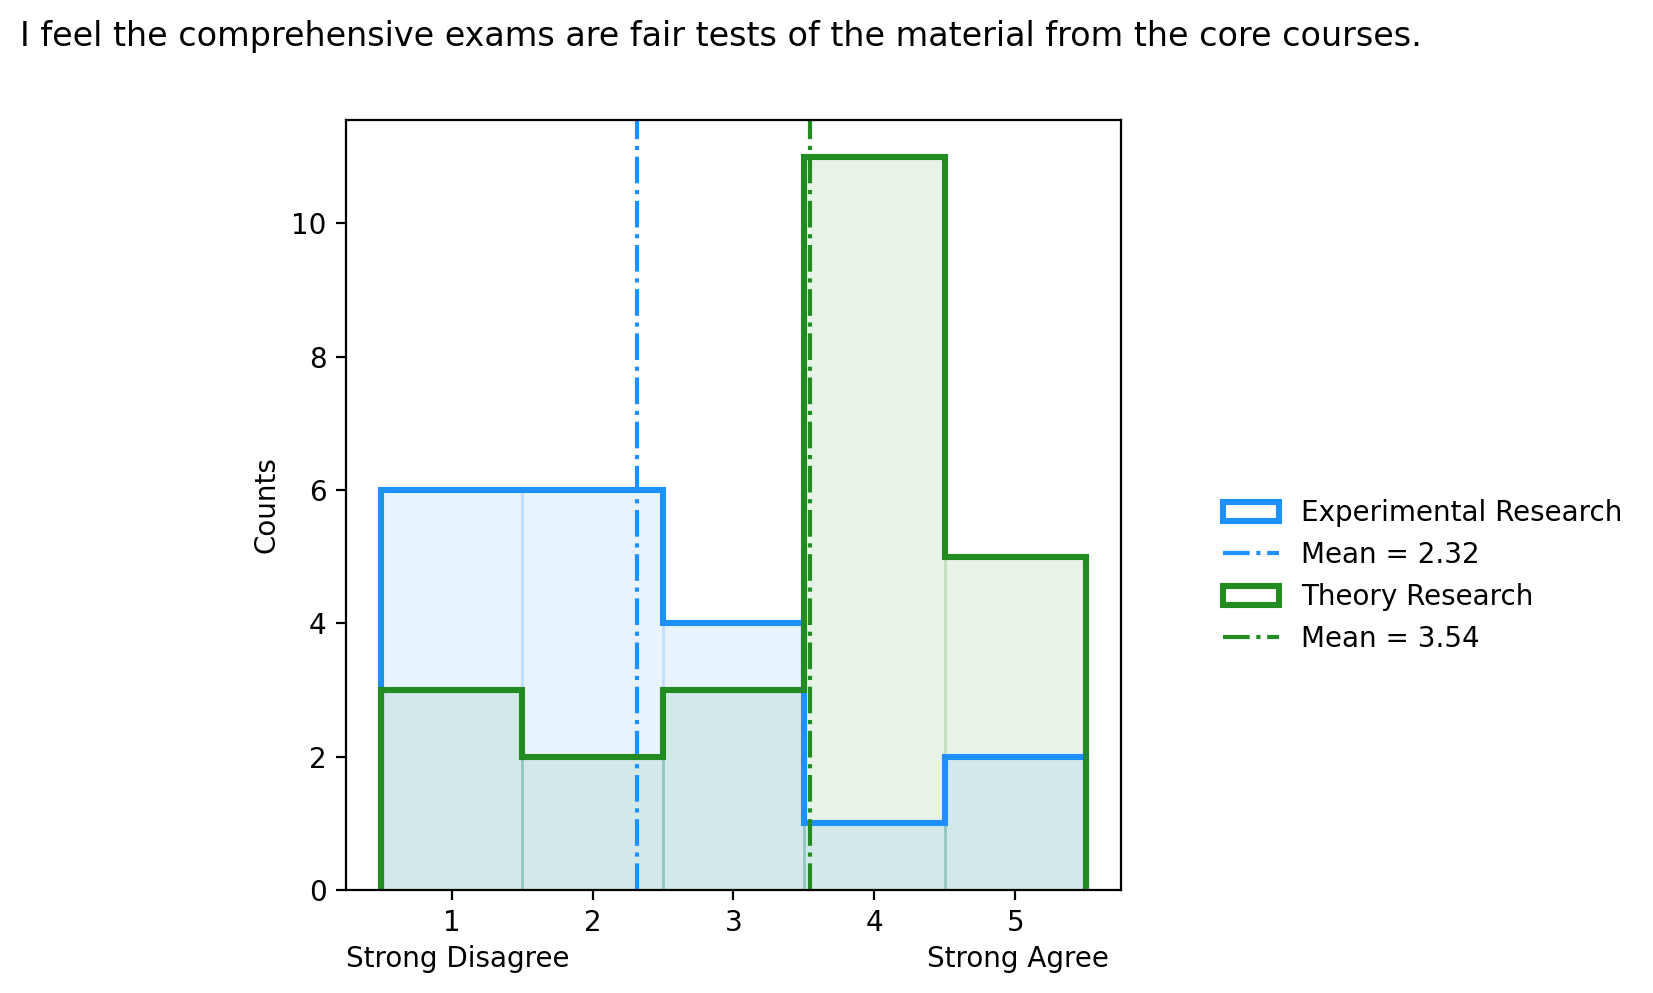

In [635]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

generic_rating_hist("Comp Fair", experiQOL, fig, ax, color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False, annotate=False, legend=False)
# generic_rating_hist("Comp Fair", rmiscQOL, fig, ax, color='red',
#                     title=False, label="Misc Research", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Comp Fair", theoryQOL, fig, ax, color='forestgreen',
                    title=True, label="Theory Research", guidelines=False, annotate=True, legend=True)
plt.ylabel("Counts")

In [415]:
# Standard QOL data can have one student (row) be part of multiple research groups
# Here we let a single student that is part of multiple groups be counted multiple times
researchQOL = explode_Research()

# Need a new set of "anonymized" research group names 
non_combined_research_areas = np.unique(researchQOL['Research'].values)
nc_research_areas = [[ncra] for ncra in non_combined_research_areas]

nc_research_areas.pop(-2)
nc_research_areas.pop(-5)
nc_research_areas.append(['I am not currently involved in research'])
nc_research_areas.append( ['Prefer not to answer'])

# kl = anon_factor("Research", cut_VariablesBelong[0], ano_bins=nc_research_areas, QOL=researchQOL)

In [416]:
nc_research_areas = np.array(nc_research_areas).flatten()

In [418]:
deg_requirements = np.zeros((len(nc_research_areas), 5))
for i,research_area in enumerate(nc_research_areas):
    QOL_sub = researchQOL[researchQOL['Research']==research_area]
    deg_requirements[i,:] = np.bincount(QOL_sub['Degree Requirements'], minlength=6)[1:]

In [420]:
data_cum = deg_requirements.cumsum(axis=1)

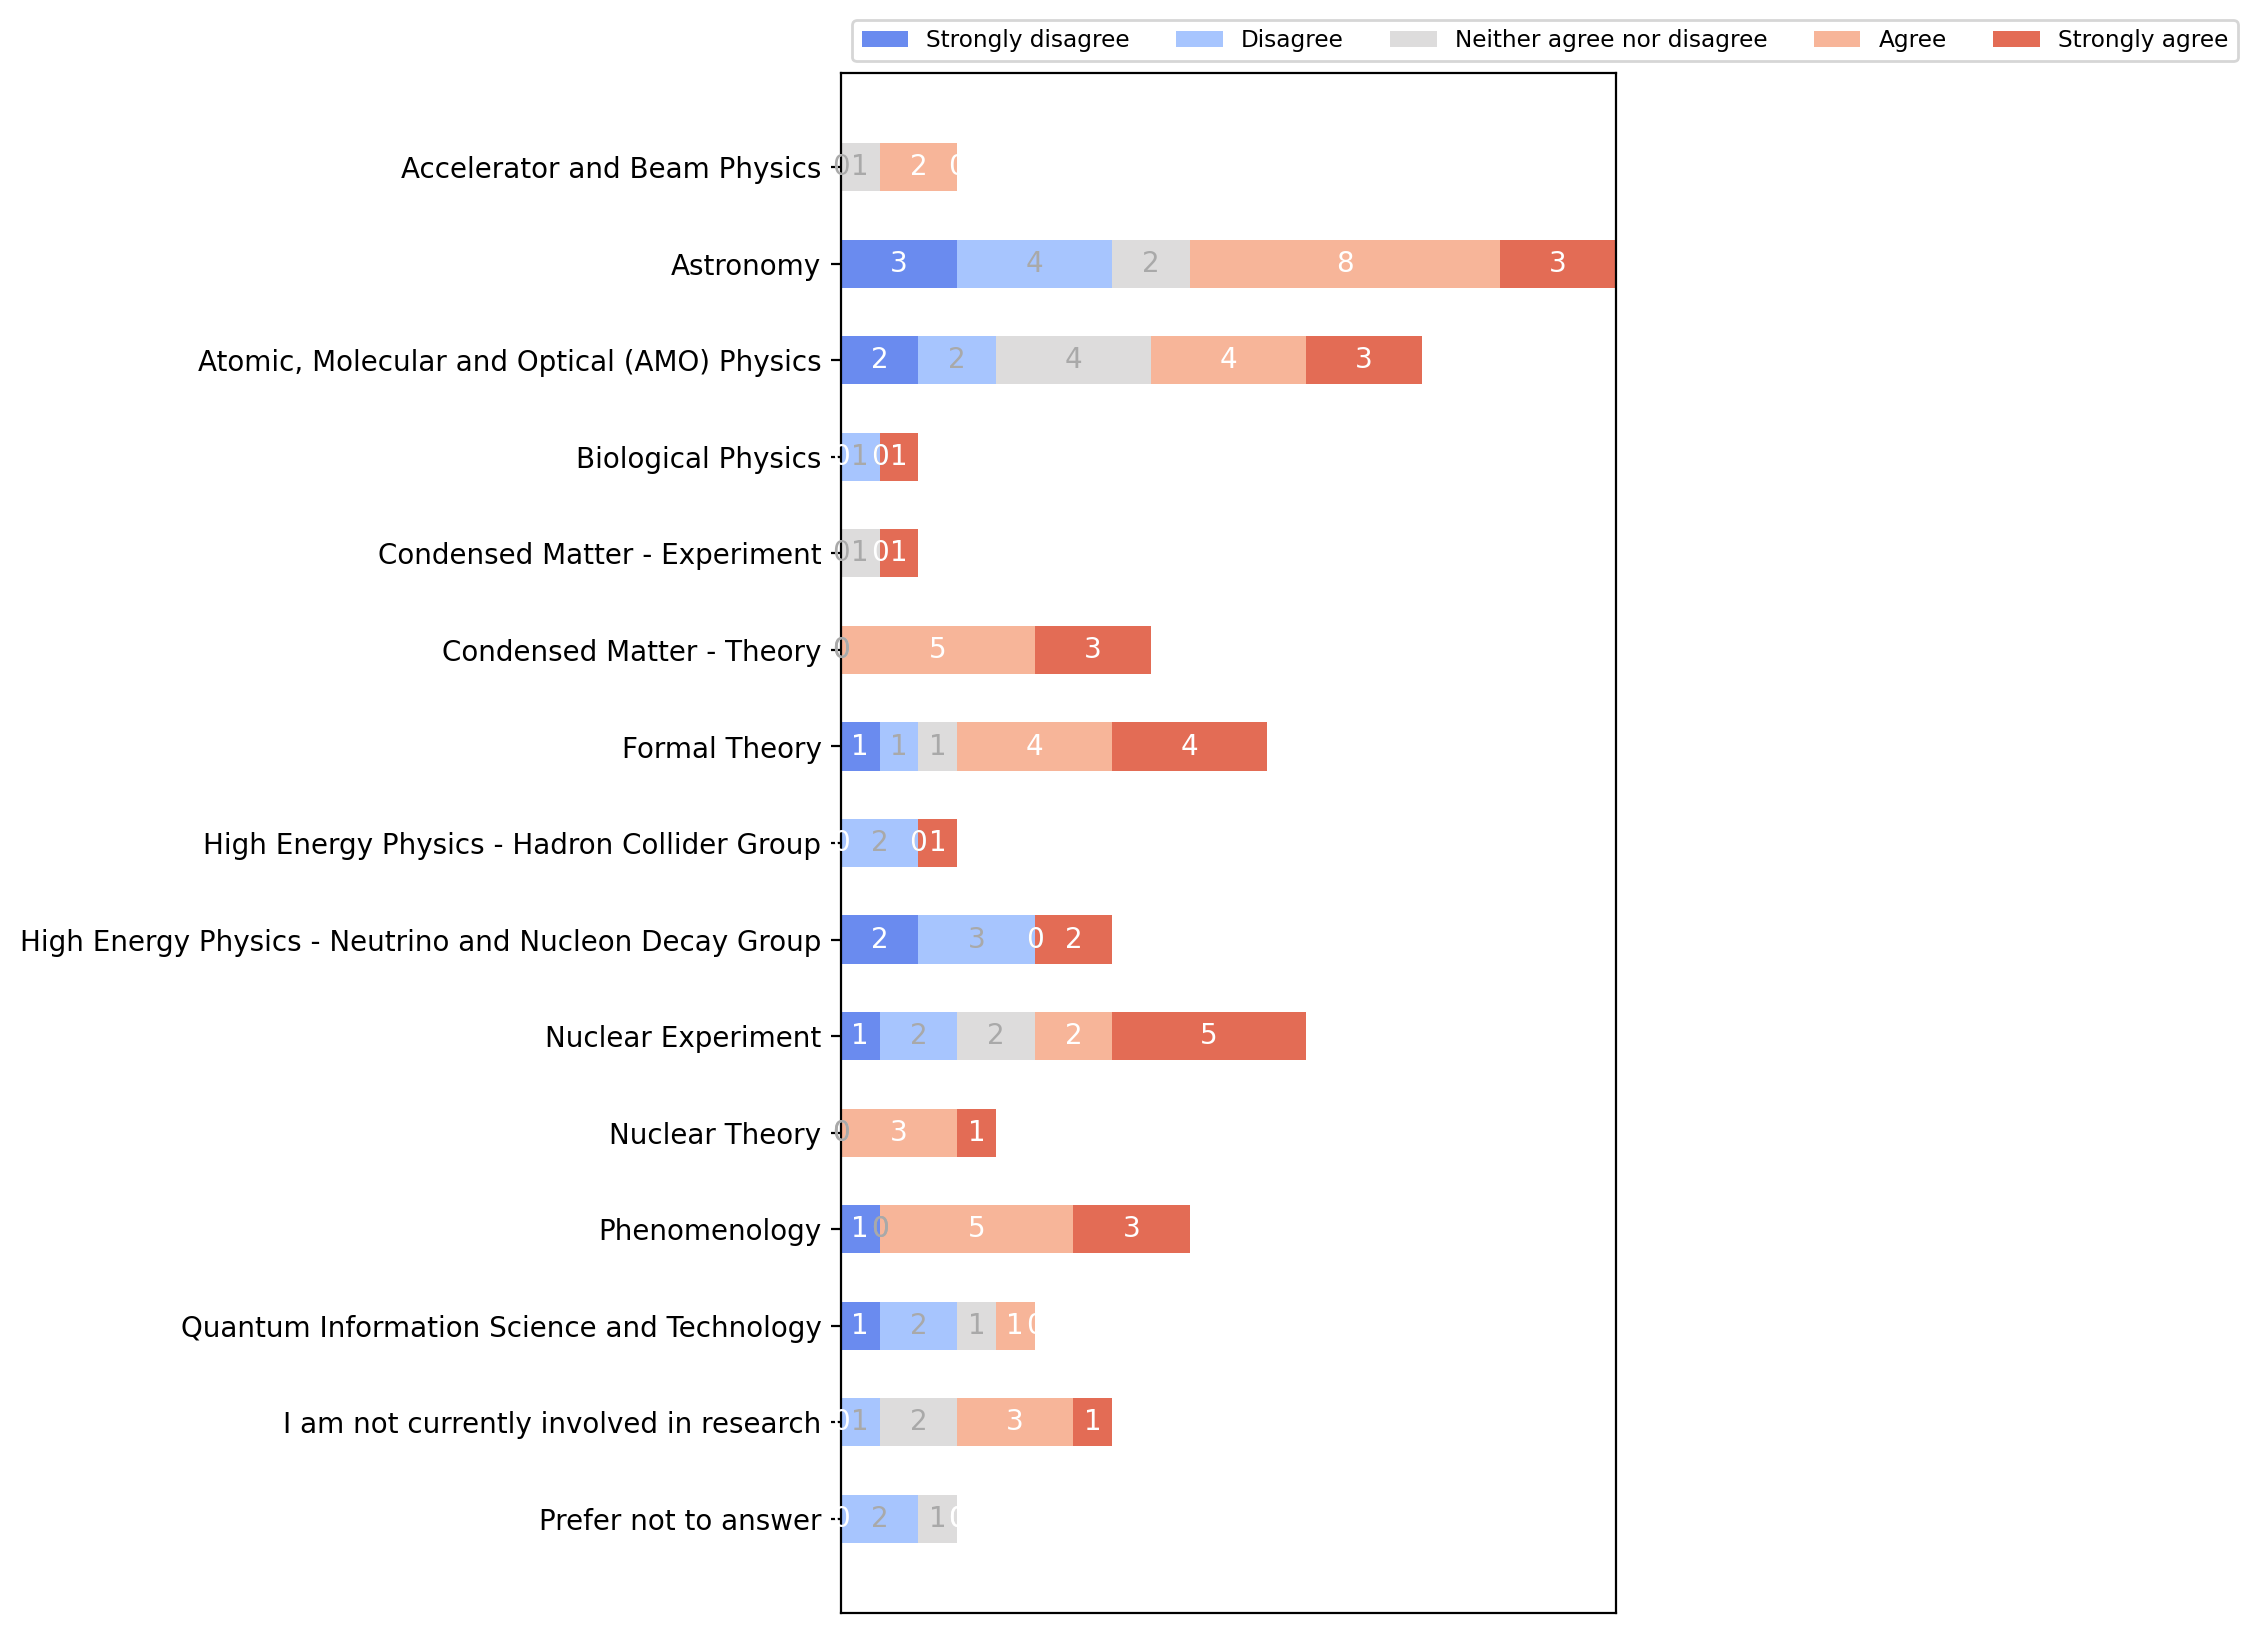

In [425]:
fig, ax = plt.subplots(1, figsize=(5, 10)) 

cwarm = colormaps.get_cmap('coolwarm')
category_colors = cwarm(np.linspace(0.15, 0.85, 5))

ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(deg_requirements, axis=1).max())

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
data_cum = deg_requirements.cumsum(axis=1)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = deg_requirements[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(nc_research_areas, widths, left=starts, height=0.5,
                    label=colname, color=color)

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color)
ax.legend(ncols=len(nc_research_areas), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

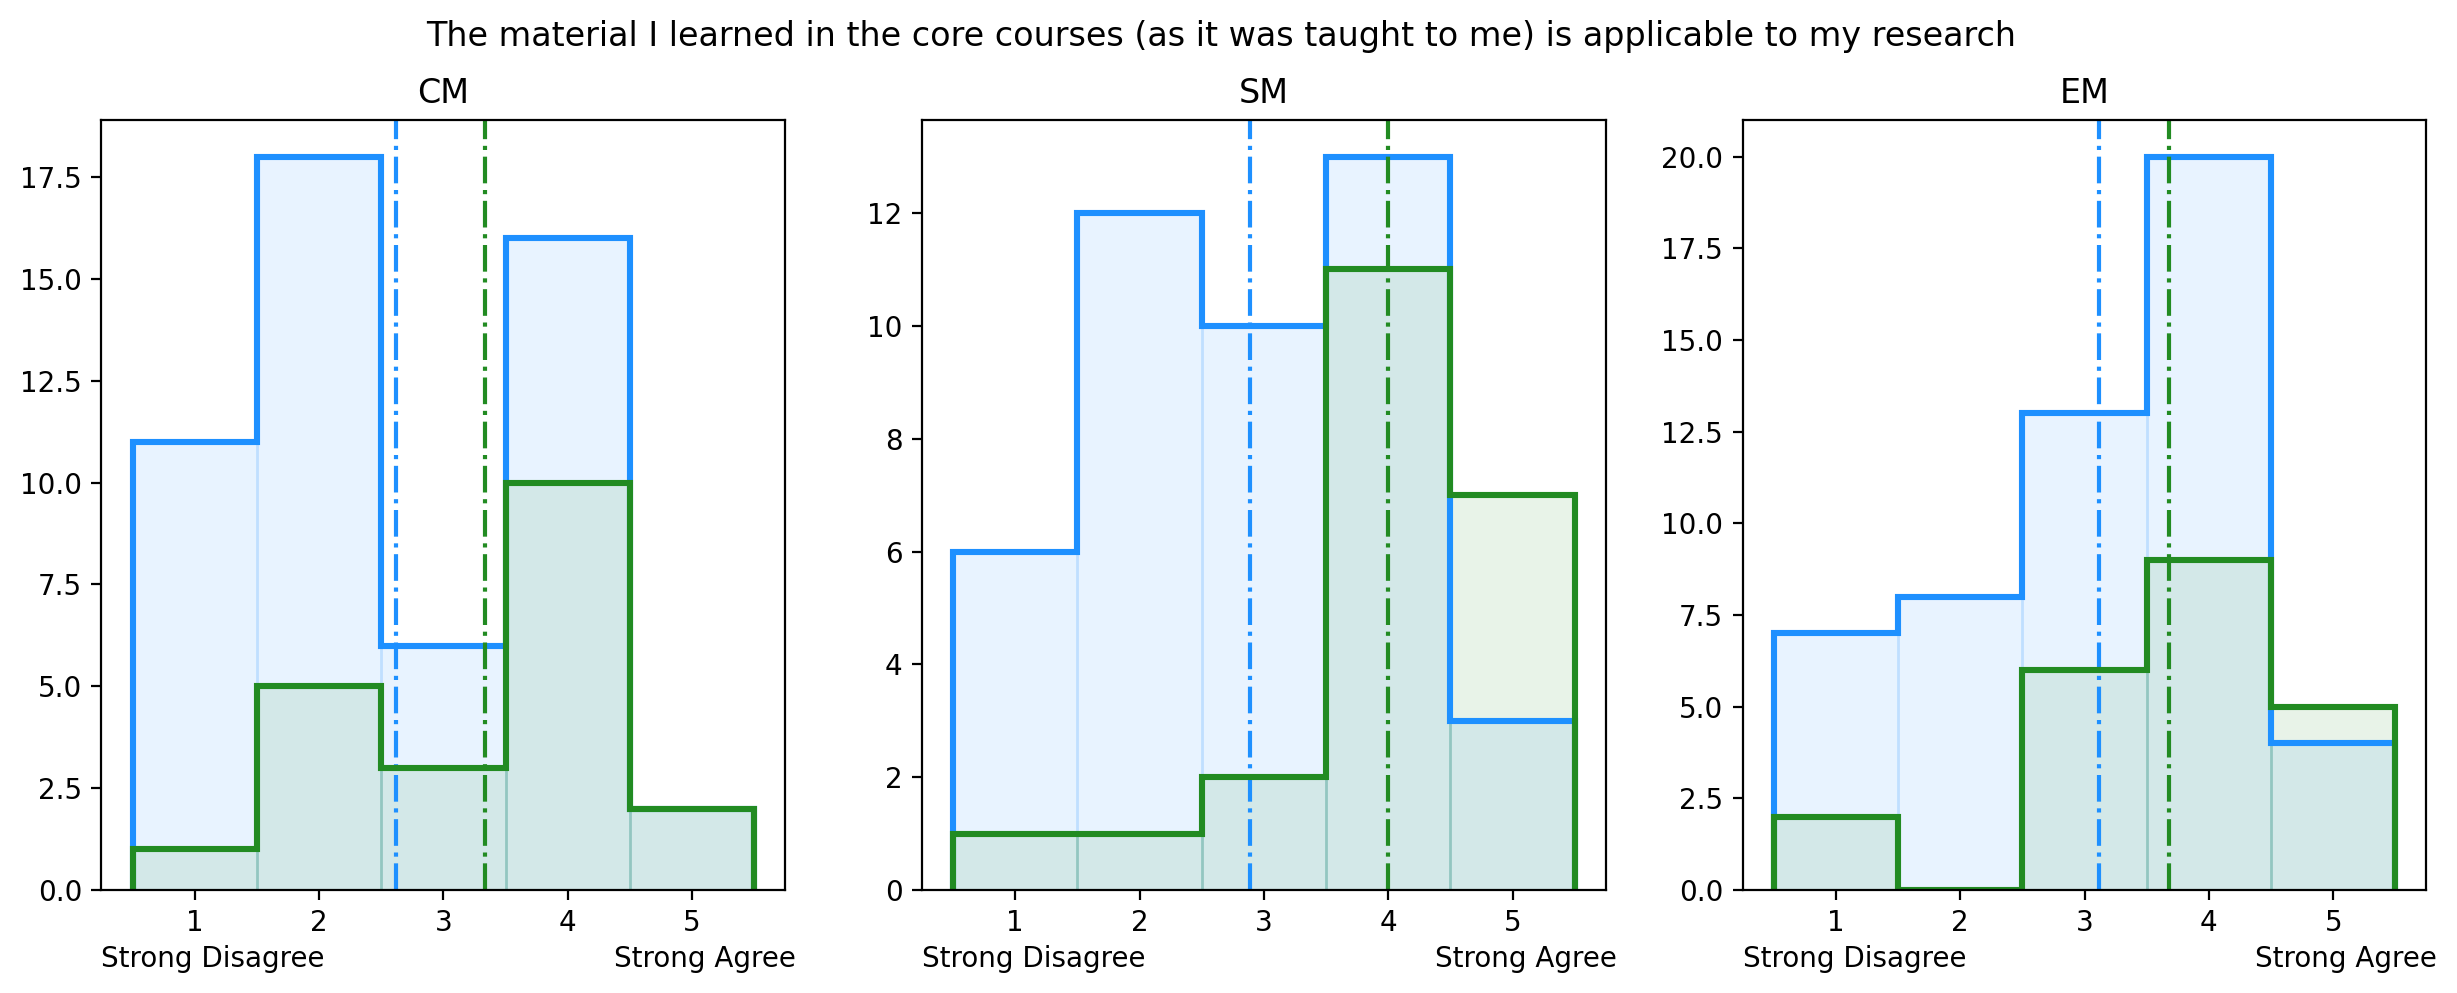

In [374]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

for i, name in enumerate(['CM', 'SM', 'EM']):
    generic_rating_hist(f"{name} Core Prep Research", experiQOL, fig, ax[i], color='dodgerblue',
                        title=False, label="Experimental Research", guidelines=False, annotate=False, legend=False, meanlabel=False)
    generic_rating_hist(f"{name} Core Prep Research", theoryQOL, fig, ax[i], color='forestgreen',
                        title=True, label="Theory Research", guidelines=False, annotate=True, legend=False, meanlabel=False)

fig.suptitle(Questions["CM Core Prep Research"][:-2])

# for xx in ax:
#     xx.legend(frameon=False, fontsize=8)
    
for i, name in enumerate(['CM', 'SM', 'EM']):
    ax[i].set_title(name)


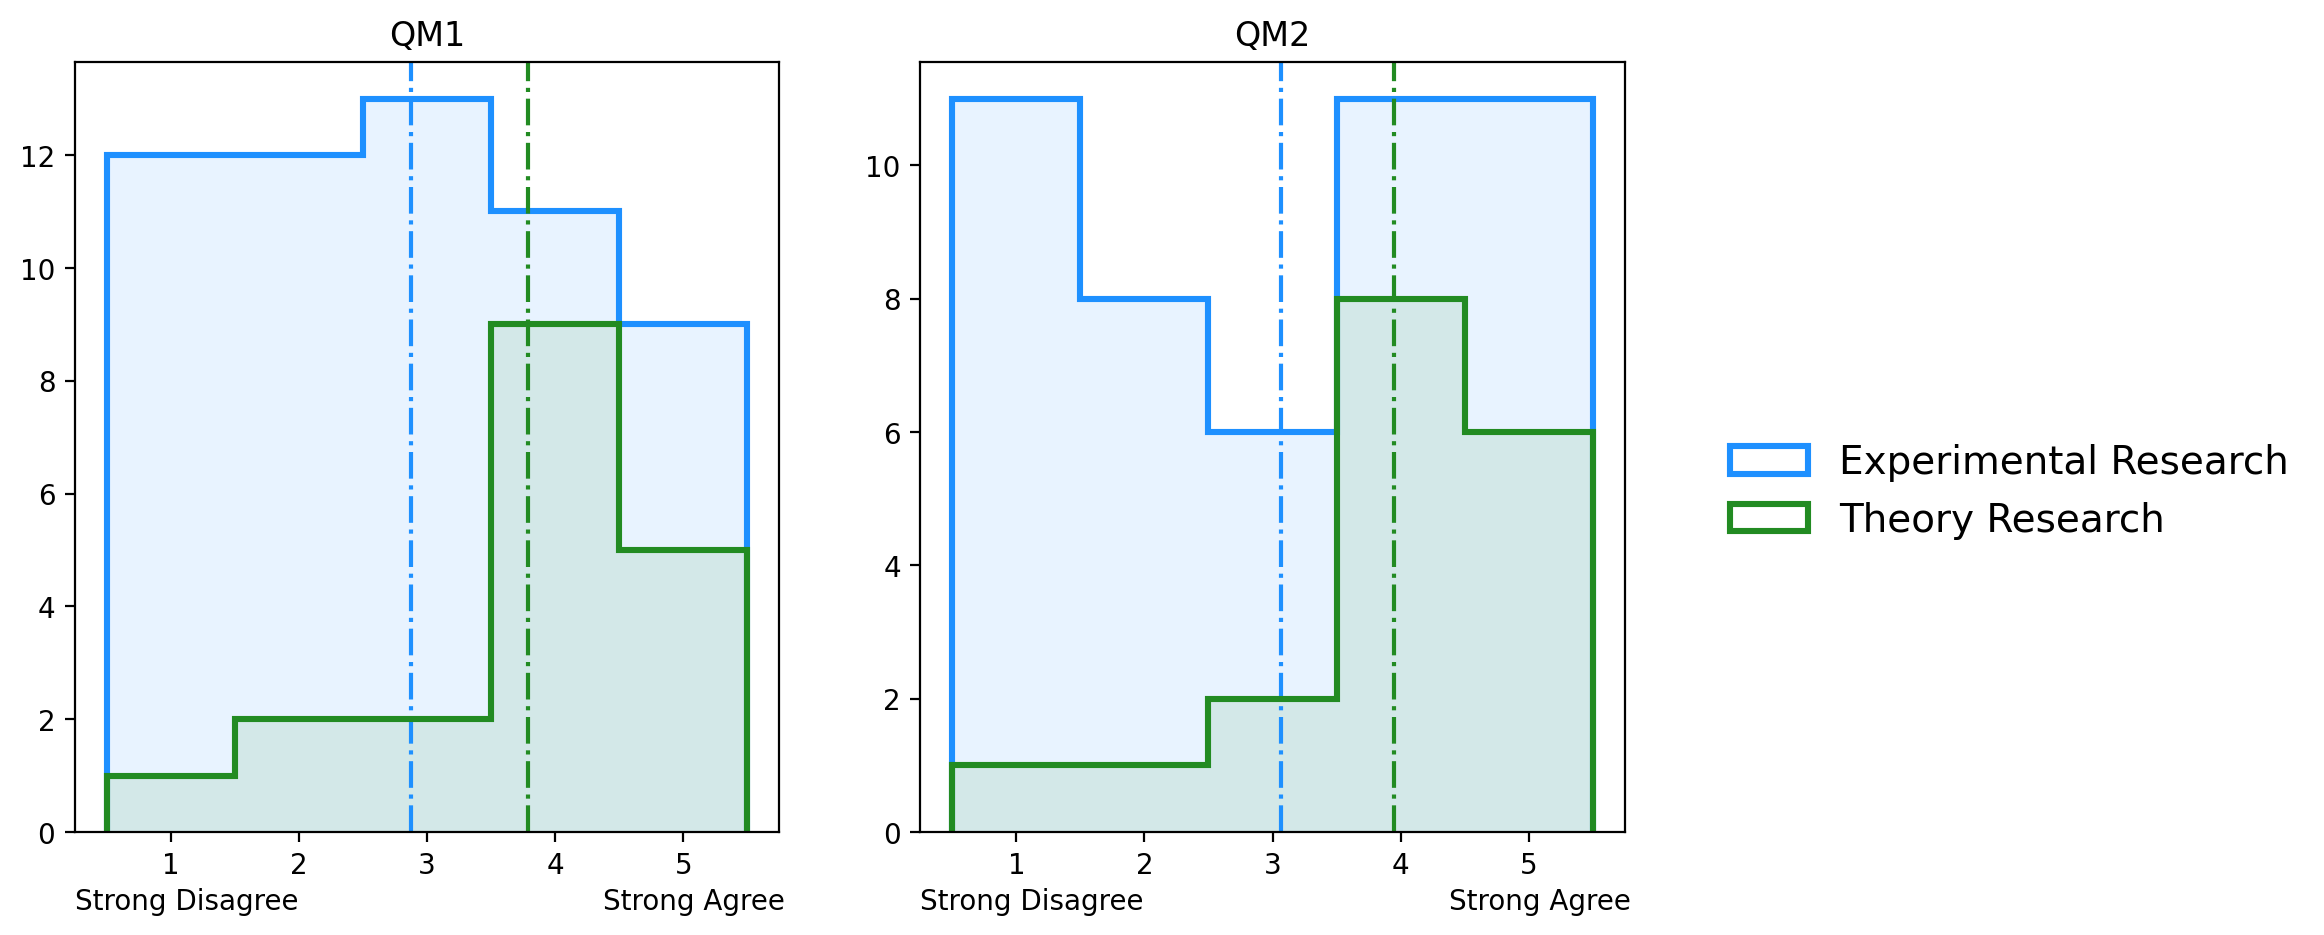

In [301]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

for i, name in enumerate(['QM1', 'QM2']):
    generic_rating_hist(f"{name} Core Prep Research", experiQOL, fig, ax[i], color='dodgerblue',
                        title=False, label="Experimental Research", guidelines=False, annotate=False, legend=False, meanlabel=False)
    generic_rating_hist(f"{name} Core Prep Research", theoryQOL, fig, ax[i], color='forestgreen',
                        title=False, label="Theory Research", guidelines=False, annotate=True, legend=False, meanlabel=False)
    ax[i].set_title(name)

# fig.suptitle(Questions["QM1 Core Prep Research"][:-4])
ax[1].legend(frameon=False, fontsize=14, bbox_to_anchor=(1.1, .55))


Text(0, 0.5, 'Counts')

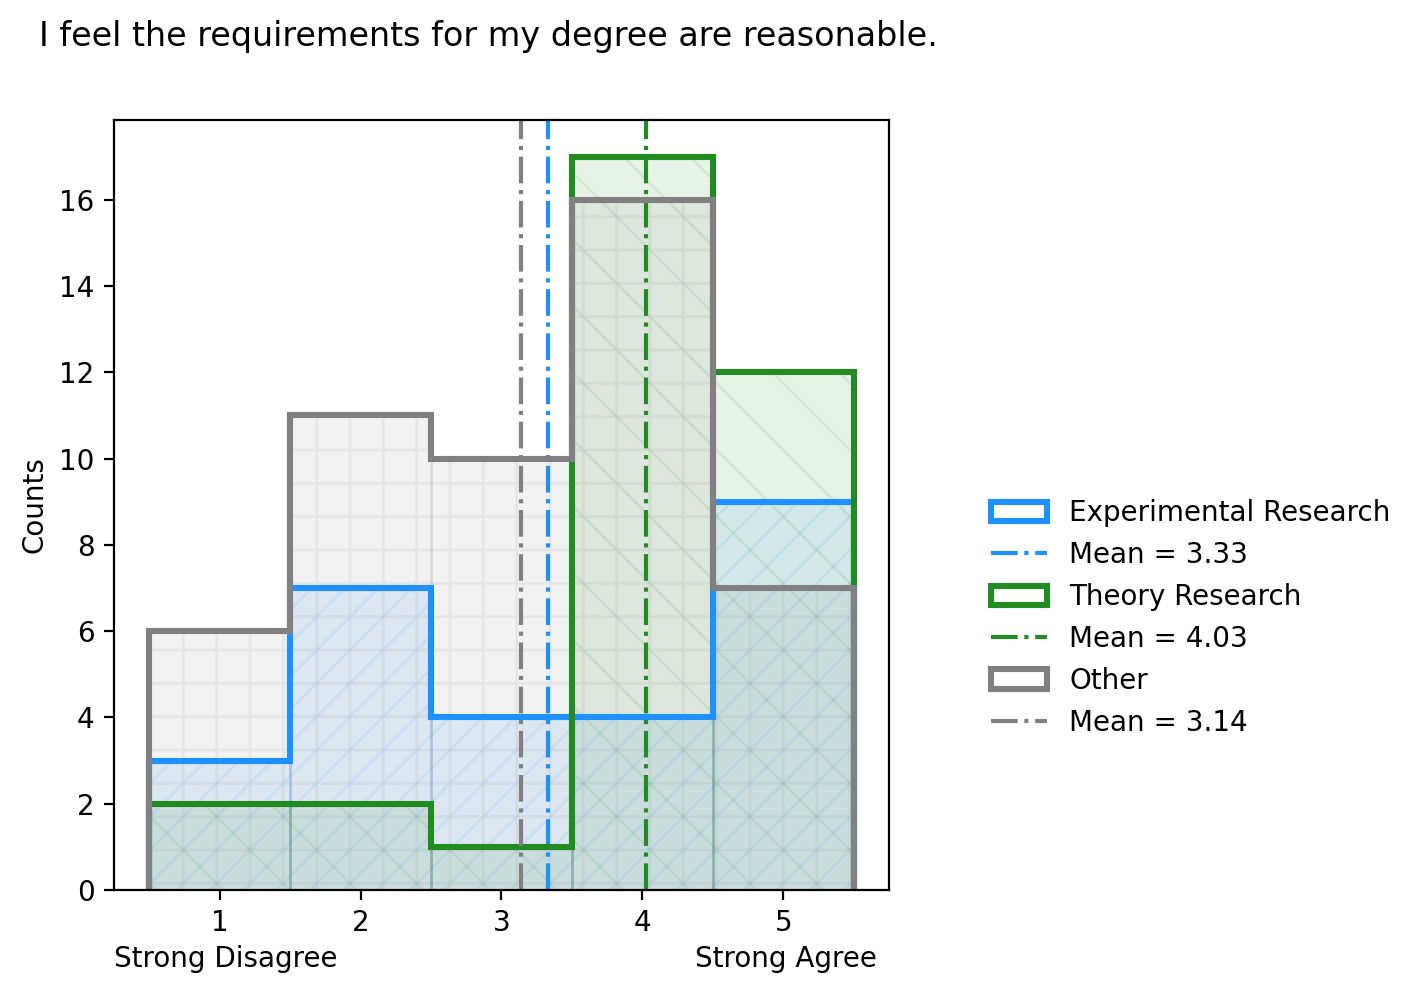

In [639]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

generic_rating_hist("Degree Requirements", experiQOL, fig, ax, color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False,
                    annotate=False, legend=False, hatch='//')
generic_rating_hist("Degree Requirements", theoryQOL, fig, ax, color='forestgreen',
                    title=True, label="Theory Research", guidelines=False,
                    annotate=True, legend=True, hatch='\\')
generic_rating_hist("Degree Requirements", rmiscQOL, fig, ax, color='gray', title=False, label="Other",
                    guidelines=False, annotate=False, legend=True, hatch='+')
plt.ylabel("Counts")

Text(0.5, 1.0, 'Community')

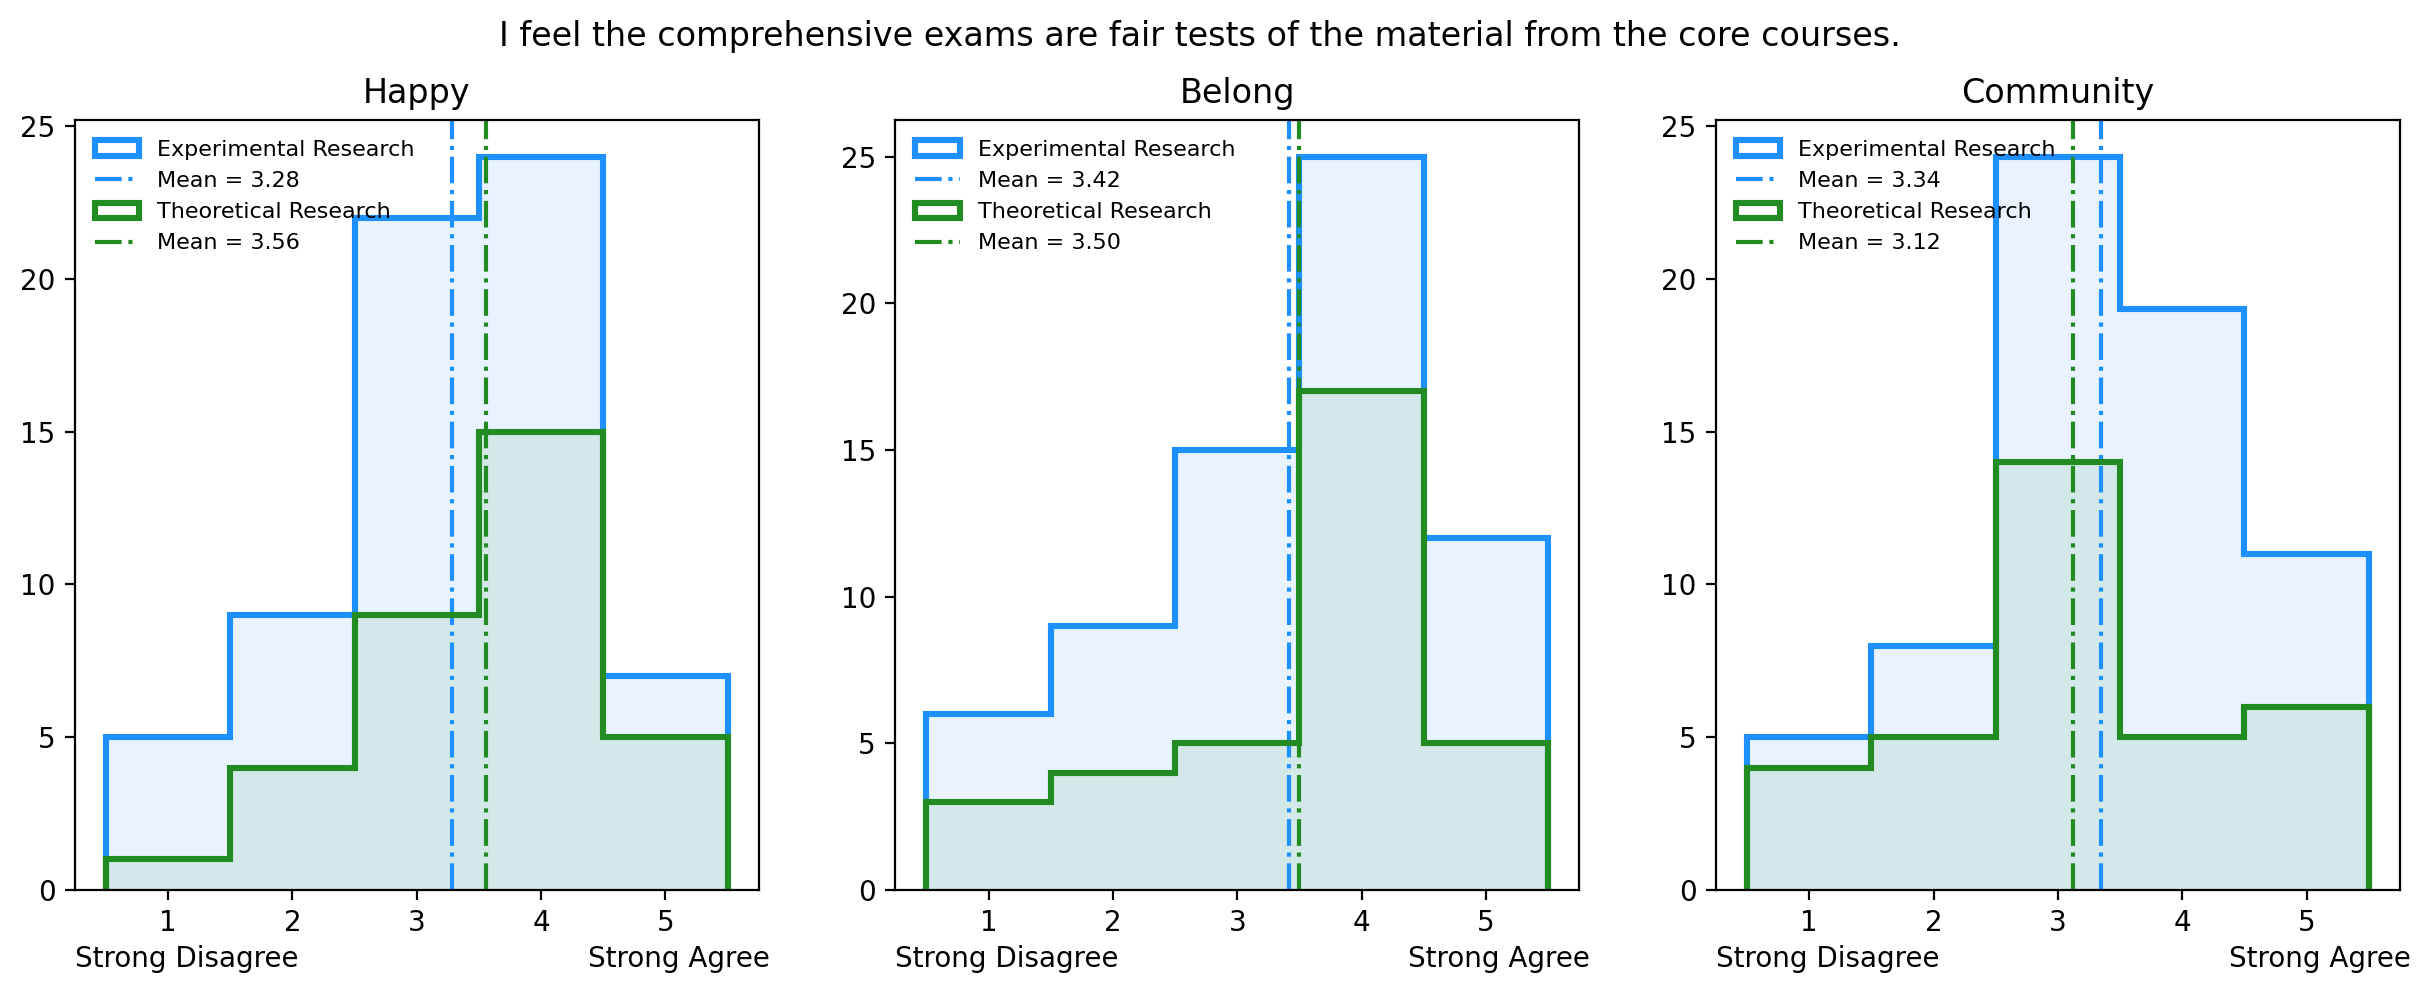

In [307]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

generic_rating_hist("Happy", experiQOL, fig, ax[0], color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Happy", theoryQOL, fig, ax[0], color='forestgreen',
                    title=False, label="Theoretical Research", guidelines=False, annotate=True, legend=False)

generic_rating_hist("Belong", experiQOL, fig, ax[1], color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Belong", theoryQOL, fig, ax[1], color='forestgreen',
                    title=False, label="Theoretical Research", guidelines=False, annotate=True, legend=False)

generic_rating_hist("Community", experiQOL, fig, ax[2], color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False, annotate=False, legend=False)
generic_rating_hist("Community", theoryQOL, fig, ax[2], color='forestgreen',
                    title=False, label="Theoretical Research", guidelines=False, annotate=True, legend=False)

fig.suptitle(Questions['Comp Fair'])
for xx in ax:
    xx.legend(frameon=False, loc='upper left', fontsize=8)

ax[0].set_title("Happy")
ax[1].set_title("Belong")
ax[2].set_title("Community")

Text(0, 0.5, 'Counts')

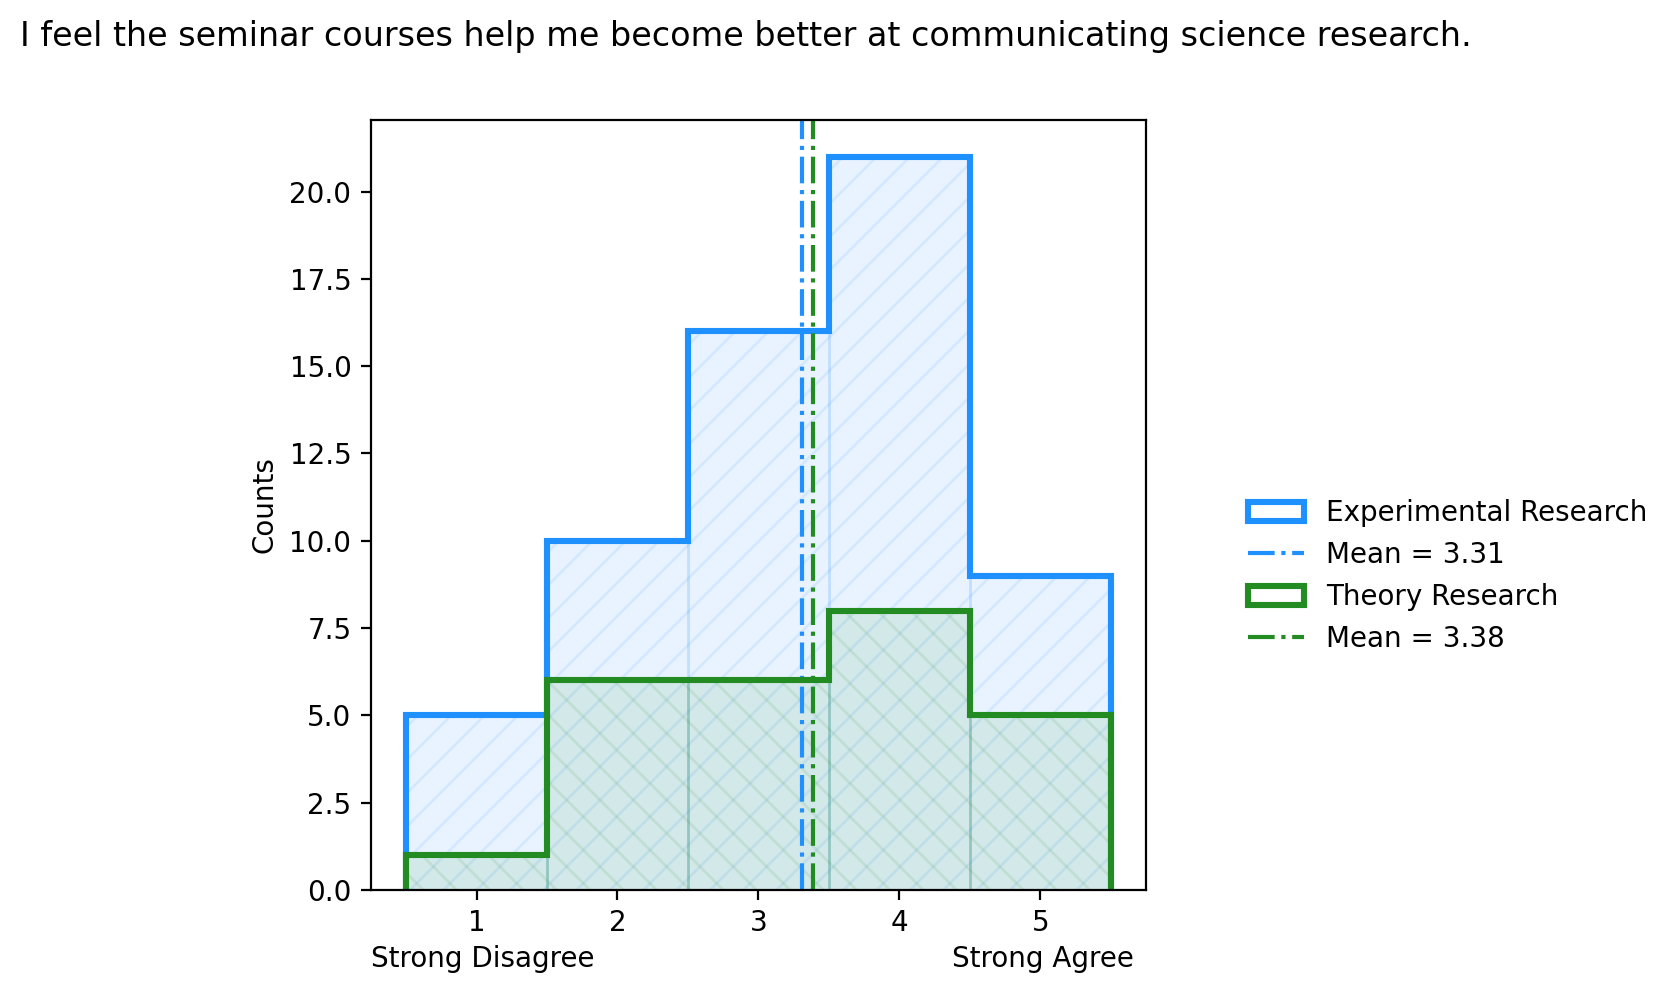

In [326]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

generic_rating_hist("Grad Seminar", experiQOL, fig, ax, color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False,
                    annotate=False, legend=False, hatch='//')
generic_rating_hist("Grad Seminar", theoryQOL, fig, ax, color='forestgreen',
                    title=True, label="Theory Research", guidelines=False,
                    annotate=True, legend=True, hatch='\\\\')
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

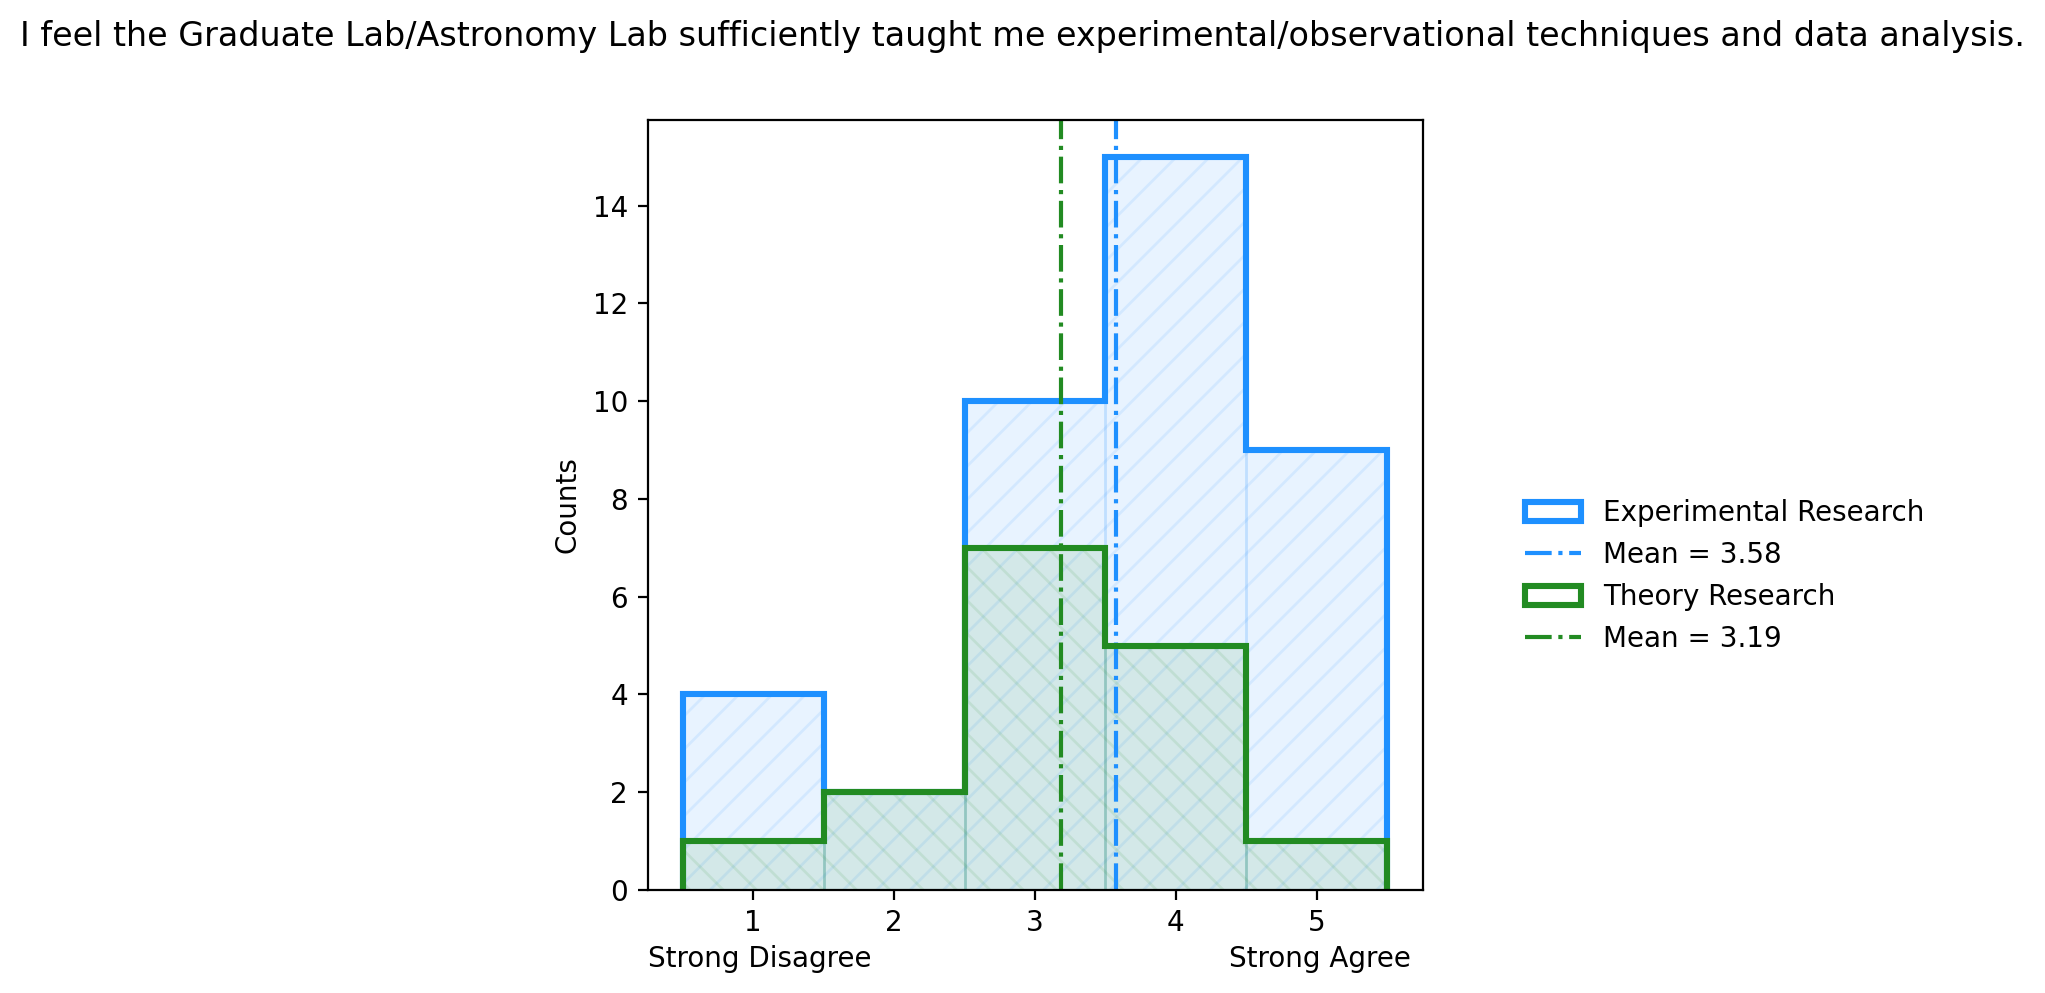

In [325]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

generic_rating_hist("Grad Astro Lab", experiQOL, fig, ax, color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False,
                    annotate=False, legend=False, hatch='//')
generic_rating_hist("Grad Astro Lab", theoryQOL, fig, ax, color='forestgreen',
                    title=True, label="Theory Research", guidelines=False,
                    annotate=True, legend=True, hatch='\\\\')
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

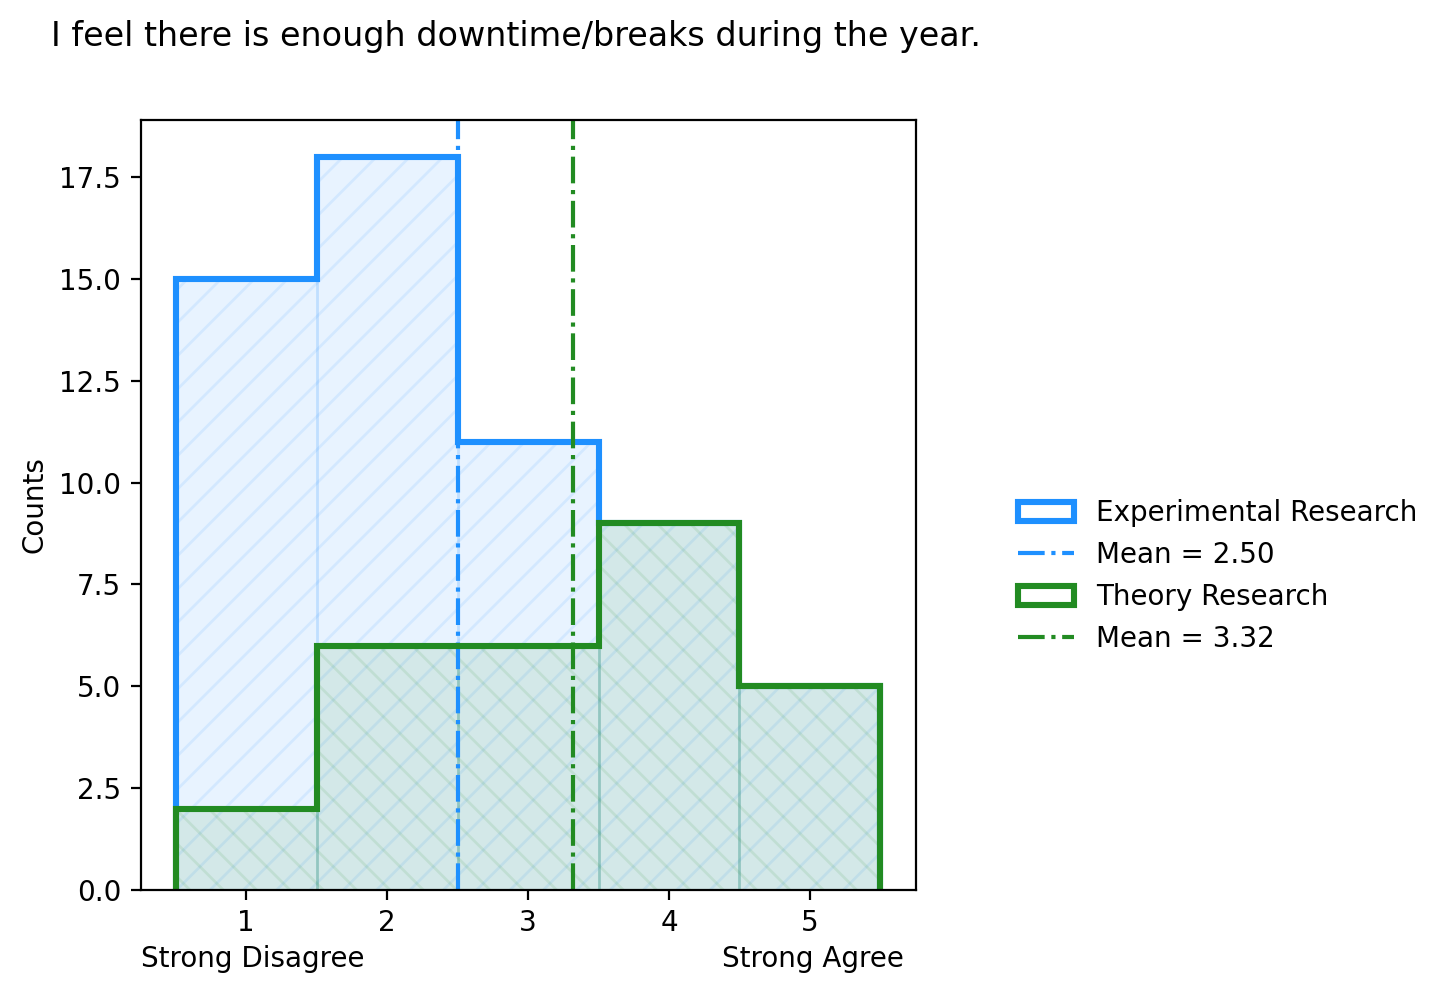

In [327]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

generic_rating_hist("Downtime", experiQOL, fig, ax, color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False,
                    annotate=False, legend=False, hatch='//')
generic_rating_hist("Downtime", theoryQOL, fig, ax, color='forestgreen',
                    title=True, label="Theory Research", guidelines=False,
                    annotate=True, legend=True, hatch='\\\\')
plt.ylabel("Counts")

In [376]:
work_bins = np.linspace(0, 100, 11)

Text(0, 0.5, 'Counts')

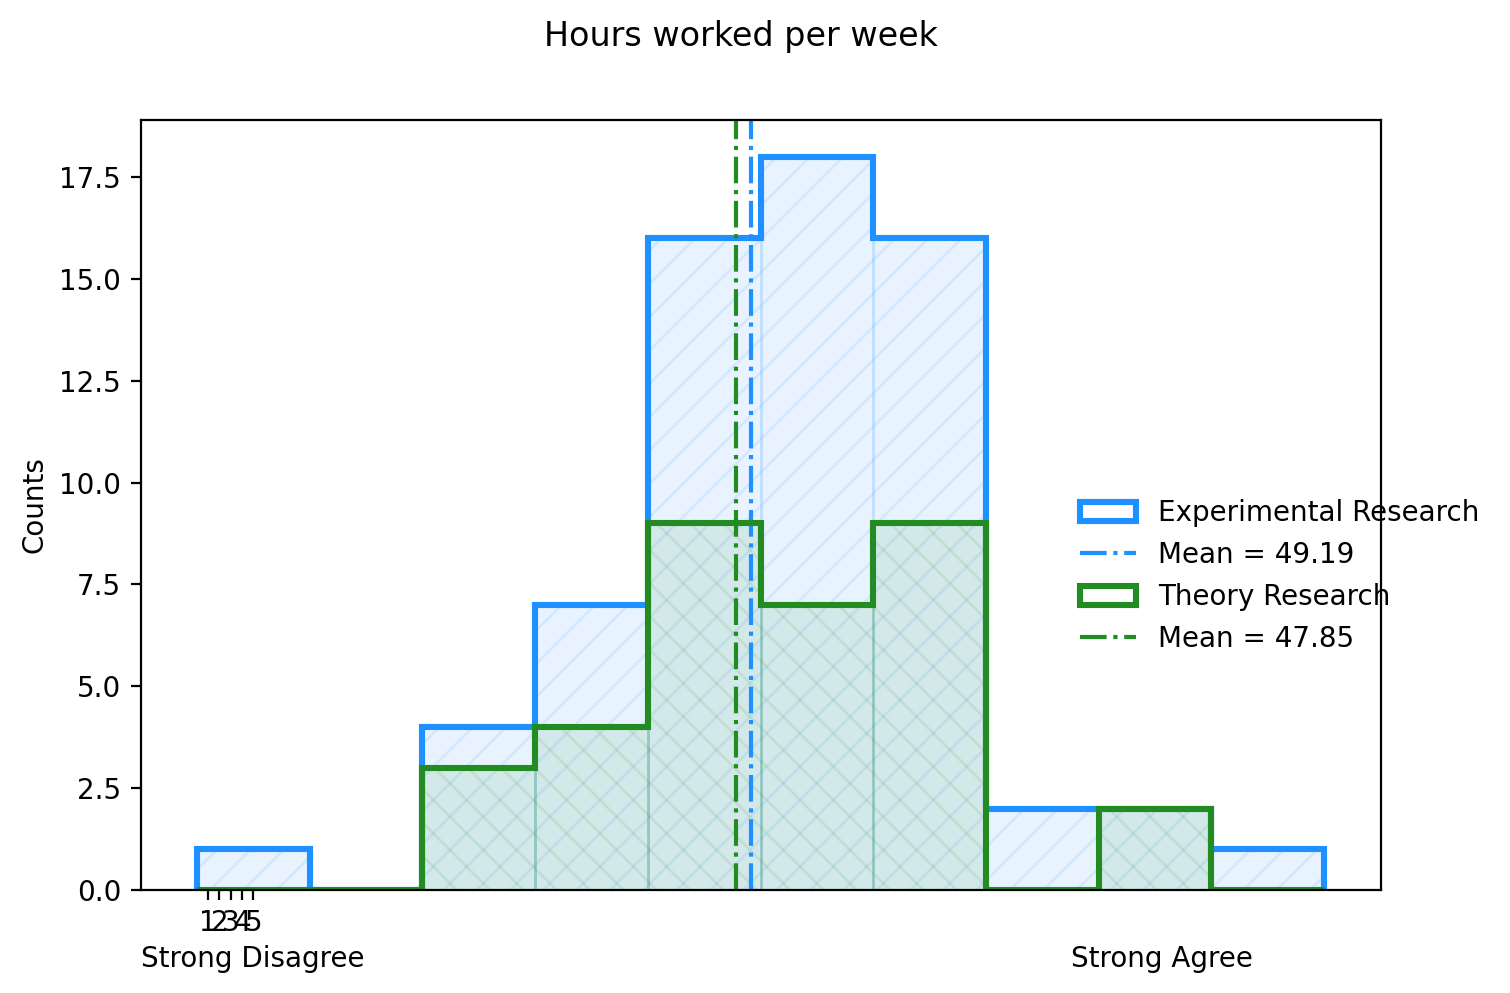

In [377]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 5))

generic_continuous_hist("Work Hours per Week", experiQOL, fig, ax, bins=work_bins, color='dodgerblue',
                    title=False, label="Experimental Research", 
                    annotate=False, legend=False, hatch='//')
generic_continuous_hist("Work Hours per Week", theoryQOL, fig, ax, bins=work_bins, color='forestgreen',
                    title=False, label="Theory Research", 
                    annotate=True, legend=True, hatch='\\\\')
fig.suptitle("Hours worked per week")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

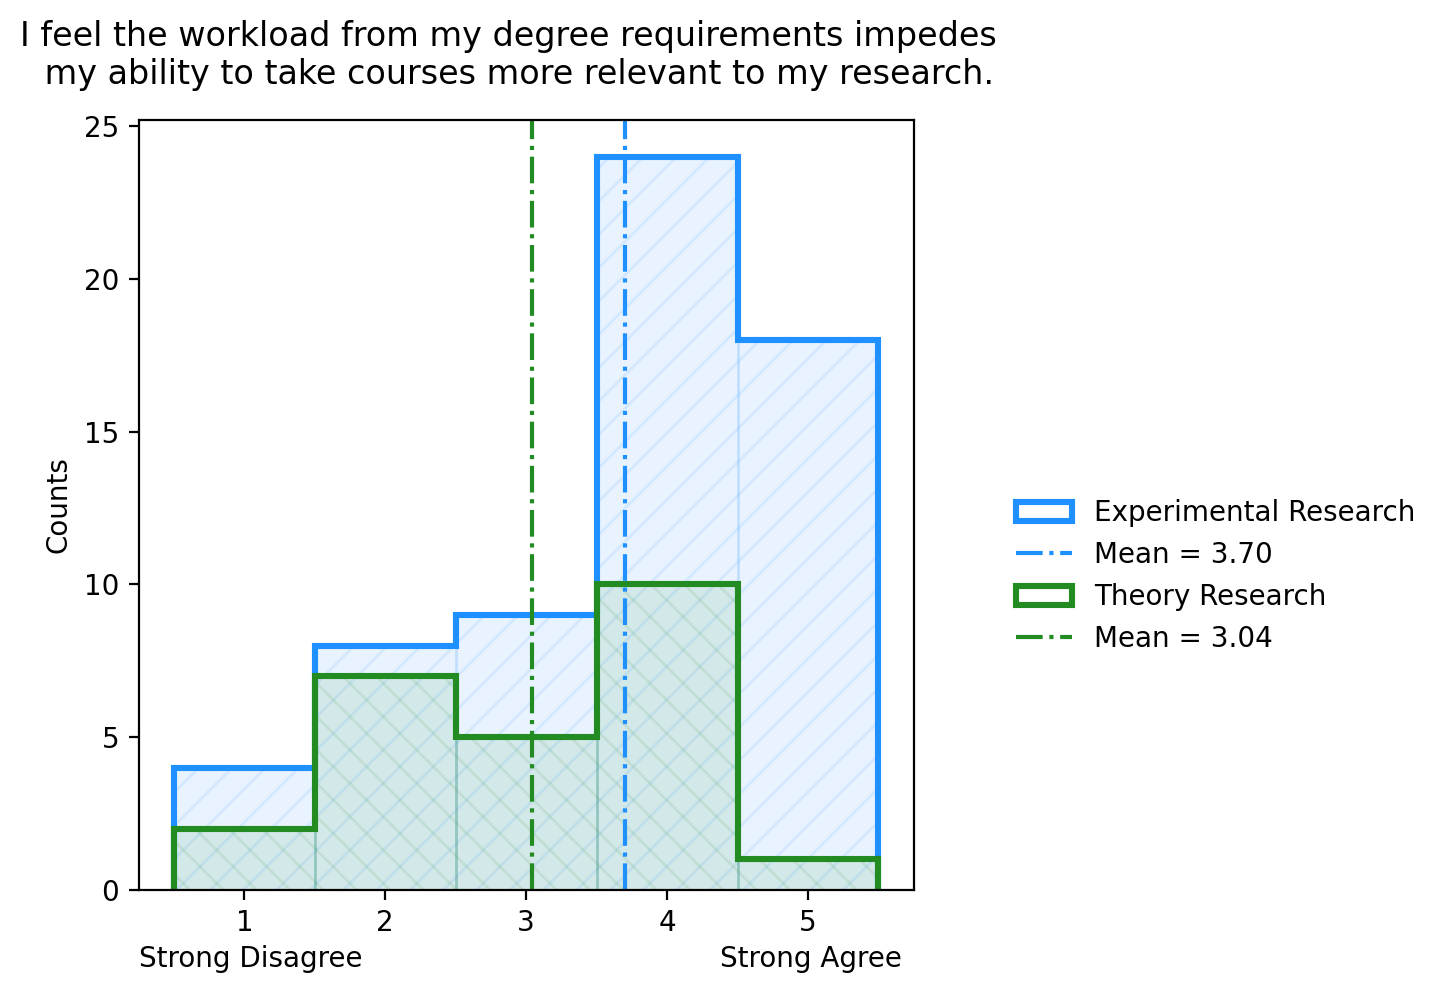

In [375]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

generic_rating_hist("Workload Impedence", experiQOL, fig, ax, color='dodgerblue',
                    title=False, label="Experimental Research", guidelines=False,
                    annotate=False, legend=False, hatch='//')
generic_rating_hist("Workload Impedence", theoryQOL, fig, ax, color='forestgreen',
                    title=True, label="Theory Research", guidelines=False,
                    annotate=True, legend=True, hatch='\\\\')
plt.ylabel("Counts")

In [ ]:
Questions['F

In [225]:
Questions

{'Happy': 'I am happy in the department.',
 'Belong': 'I feel that I belong here.',
 'Community': 'The department provides an adequate sense of community.',
 'Degree Requirements': 'I feel the requirements for my degree are reasonable.',
 'Breadth': 'I feel the breadth courses provide a wide variety of topics.',
 'CM Core Prep Comp': 'The core courses adequately prepared me for taking the comps. CM',
 'EM Core Prep Comp': 'The core courses adequately prepared me for taking the comps. EM',
 'QM1 Core Prep Comp': 'The core courses adequately prepared me for taking the comps. QM1',
 'QM2 Core Prep Comp': 'The core courses adequately prepared me for taking the comps. QM2',
 'SM Core Prep Comp': 'The core courses adequately prepared me for taking the comps. SM',
 'CM Core Prep Research': 'The material I learned in the core courses (as it was taught to me) is applicable to my research CM',
 'EM Core Prep Research': 'The material I learned in the core courses (as it was taught to me) is appli

Degree reqs vs Demographics

Degree reqs vs Non-core classes

Degree reqs vs Core Courses

Research Group vs Core Course Preparation for Research

### Degree Reqs vs Research Group

In [70]:
deg_questions = ['Grad Seminar', 'Grad Astro Lab','Degree Requirements', 
                 'CM Core Prep Research', 'EM Core Prep Research', 'SM Core Prep Research', 'QM1 Core Prep Research','QM2 Core Prep Research', ]

In [71]:
nc_research_areas = ['Astronomy', 'Atomic, Molecular and Optical (AMO) Physics']

In [72]:
deg_requirements = np.zeros((len(nc_research_areas), len(deg_questions), 5))
degr_meanerr = np.zeros((len(nc_research_areas), len(deg_questions),2))
for j,ra in enumerate(nc_research_areas):
    QOL_ra = researchQOL[researchQOL['Research']==ra]
    print(len(QOL_ra))
    for i,question in enumerate(deg_questions):
        QOL_question = QOL_ra[question]
        nan_filt = ~np.isnan(QOL_question)
        deg_requirements[j,i,:] = np.bincount(QOL_question[nan_filt].astype(int), minlength=6)[1:]
        degr_meanerr[j,i,0] = np.nanmean(QOL_question)
        
        boot_ci = stats.bootstrap([QOL_question], np.nanmean, confidence_level=.68)
        boot_sigma = np.diff(boot_ci.confidence_interval)/2
        degr_meanerr[j,i,1] = boot_sigma[0]

20
15


In [73]:
nsamples = np.sum(deg_requirements, axis=2)
above_neutral = np.sum(deg_requirements[:,:, 3:], axis=2)/nsamples * 100

In [74]:
Plot_Questions={
            'CM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research CM',
            'EM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research EM',
            'QM1 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 1',
            'QM2 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 2',
            'SM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research SM',
            'Grad Seminar':'I feel the $\\bf{seminar courses}$ help me become better at communicating science research.', 
            'Grad Astro Lab':'I feel the $\\bf{Graduate Lab/Astronomy Lab}$ sufficiently taught me experimental/observational techniques and data analysis.',
            'Degree Requirements': 'I feel the requirements for my $\\bf{degree}$$ are reasonable.'
}

In [75]:
len(QOLData)

101

In [76]:
degr_meanerr

array([[[3.72222222, 0.23538012],
        [4.23076923, 0.2724359 ],
        [3.2       , 0.3       ],
        [2.76470588, 0.29093567],
        [3.0625    , 0.27777778],
        [3.30769231, 0.33571429],
        [1.94117647, 0.28958333],
        [2.        , 0.33035714]],

       [[3.42857143, 0.27948718],
        [3.66666667, 0.22777778],
        [3.26666667, 0.33333333],
        [2.6       , 0.38888889],
        [3.41666667, 0.29166667],
        [2.8       , 0.36868687],
        [3.76923077, 0.30494505],
        [4.18181818, 0.29166667]]])

In [77]:
degr_meanerr[0,:,0]

array([3.72222222, 4.23076923, 3.2       , 2.76470588, 3.0625    ,
       3.30769231, 1.94117647, 2.        ])

In [78]:
fig, ax = plt.subplots(1, figsize=(5,5))

for i in range(2):
    ax.plot(i, degr_meanerr[i,

_IncompleteInputError: incomplete input (366984286.py, line 4)

ValueError: 'x' and 'y' must have the same size

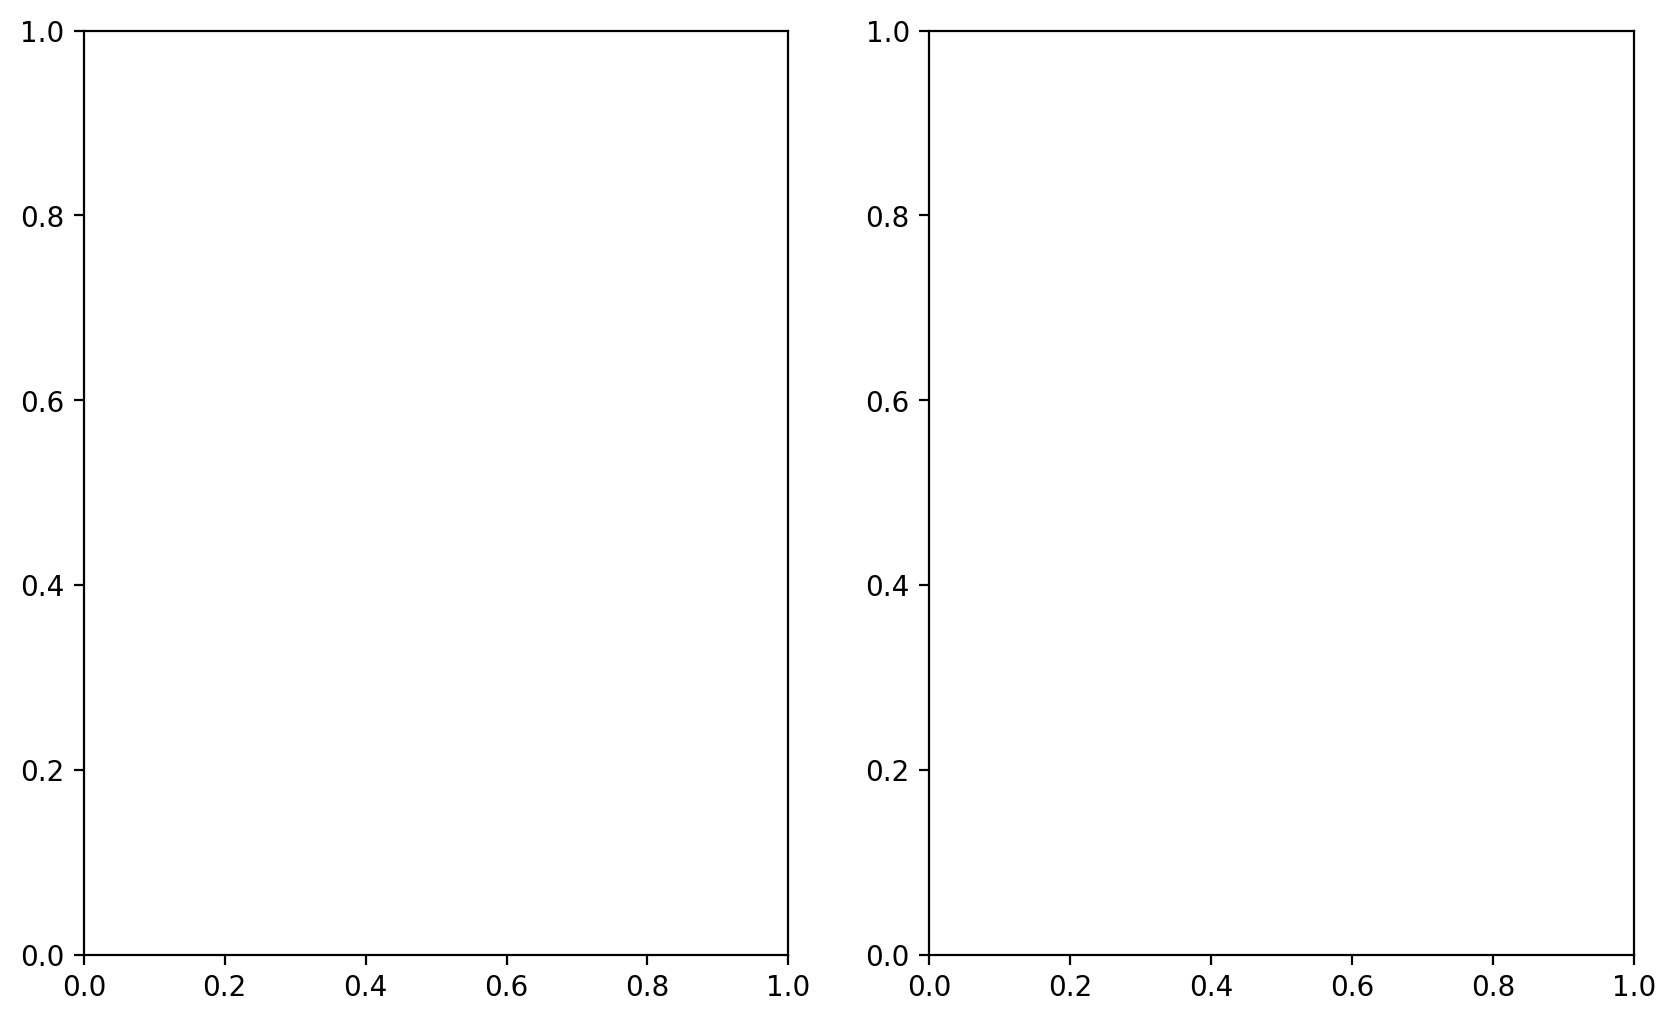

In [79]:
fig, ax = plt.subplots(ncols=2, figsize=(10,6))

for i, dq in enumerate(deg_questions):
    if i <= 2:
        ax[0].errorbar(degr_meanerr[i,0],i, xerr=degr_meanerr[i,1], fmt='.', )
        ax[0].annotate(f"N={nsamples[i]}", (1.5, i+.03))
        ax[0].annotate("$N_{>3}$" + f"={above_neutral[i]:0.0f}%", (1.28, i-.08))
    else:
        ax[1].errorbar(degr_meanerr[i,0],i-3, xerr=degr_meanerr[i,1], fmt='.', )
        ax[1].annotate(f"N={nsamples[i]}", (1.5, i-3+.02))
        ax[1].annotate("$N_{>3}$" + f"={above_neutral[i]:0.0f}%", (1.28, i-3-.1))
# ax.set_ylim(1, 5)
# ax.set_yticks(np.arange(5)+1)
question_text = [Questions[dq] for dq in deg_questions[:3]]
corename = ['CM', 'EM', 'SM', 'QM1', 'QM2']

ax[0].set_yticks(ticks=np.arange(len(question_text)), labels=question_text, wrap=True)
ax[1].set_yticks(ticks=np.arange(len(corename)), labels=corename)

ax[0].set_ylim(-.2, 2.3)

for xx in ax:
    xx.set_xlim(1,2)
    xx.set_xticks(np.arange(5)+1)
    xx.axvline(3, ls='--', alpha=.24, color='k')

bbox1 = dict(boxstyle="round", fc='w')
ax[1].annotate("The material I learned in the core courses is applicable to my research", (4,1.75), wrap=True, fontsize=12, bbox=bbox1)

# ax[1].yaxis.set_label_position("right")
# ax[1].yaxis.tick_right()
# fig.suptitle("Many students find the degree requirements helpful")
# ax[0].set_title("The degree requirements are applicable to my research", wrap=True)

# ax2 = ax[1].twinx()
# ax2.set_ylabel("The material I learned in the core courses is applicable to my research", rotation=270, labelpad=28.1, fontsize=12, wrap=True)
# ax2.set_yticks([])

# ax[1].set_title("The material I learned in the core courses is applicable to my research", wrap=True)

In [641]:
# Standard QOL data can have one student (row) be part of multiple research groups
# Here we let a single student that is part of multiple groups be counted multiple times
researchQOL = explode_Research()

# Need a new set of "anonymized" research group names 
non_combined_research_areas = np.unique(researchQOL['Research'].values)
nc_research_areas = [[ncra] for ncra in non_combined_research_areas]

nc_research_areas.pop(-2)
nc_research_areas.pop(-5)
nc_research_areas.append(['I am not currently involved in research'])
nc_research_areas.append( ['Prefer not to answer'])

# kl = anon_factor("Research", cut_VariablesBelong[0], ano_bins=nc_research_areas, QOL=researchQOL)

In [642]:
nc_research_areas

[['Accelerator and Beam Physics'],
 ['Astronomy'],
 ['Atomic, Molecular and Optical (AMO) Physics'],
 ['Biological Physics'],
 ['Condensed Matter - Experiment'],
 ['Condensed Matter - Theory'],
 ['Formal Theory'],
 ['High Energy Physics - Hadron Collider Group'],
 ['High Energy Physics - Neutrino and Nucleon Decay Group'],
 ['Nuclear Experiment'],
 ['Nuclear Theory'],
 ['Phenomenology'],
 ['Quantum Information Science and Technology'],
 ['I am not currently involved in research'],
 ['Prefer not to answer']]

In [644]:
researchQOL[researchQOL['Research']==nc_research_areas[0][0]]

Program                 Job                      Research  Gender  \
63  PhD Student  Teaching Assistant  Accelerator and Beam Physics    Male   
91  PhD Student               Other  Accelerator and Beam Physics    Male   
92  PhD Student               Other  Accelerator and Beam Physics  Female   

   LGBTQIA+                                               Race Hispanic  \
63       No  Asian (Including East Asia and the Indian subc...       No   
91       No  White (European, Middle Eastern, or North Afri...       No   
92      Yes  White (European, Middle Eastern, or North Afri...       No   

   Please indicate which of the core courses and comprehensive exams have you already taken.  \
63  CM Course, EM Course, QM I Course, QM II Cours...                                          
91                    CM Course, QM I Course, CM Comp                                          
92                             CM Course, QM I Course                                          

    Happy  Belong  ...  Knowledge SM Core  Knowledge SM Comp  Sleep  \
63      4       3  ...                5.0                6.0    7.0   
91      4       4  ...                NaN                NaN    6.0   
92      3       2  ...                NaN                NaN    6.0   

    Mental Health Rate  Physical Health Rate  Downtime  Monthly Income  \
63                 4.0                   3.0       3.0          2300.0   
91                 2.0                   3.0       2.0          2900.0   
92                 2.0                   2.0       1.0             NaN   

    Outside Support  Necessities percentage  Stipend Financially stable  
63             True                    70.0                         2.0  
91            False                    70.0                         4.0  
92             True                     NaN                         1.0  

[3 rows x 63 columns]

In [ ]:
fig, ax = plt.subplots(1, figsize=(4, 16))


demo_quest_heatmap(researchQOL, "Research", cut_VariablesBelong, fig, ax,
                   cmap='coolwarm', transpose=True, ano_bins=nc_research_areas)

# ax.set_xticks(np.arange(15), Ano_Research, rotation=-90);

### Degree reqs vs Demographics

### Non-core Courses

In [164]:
VariablesCourses

['Degree Requirements',
 'Breadth',
 'Grad Astro Lab',
 'Workload Impedence',
 'Undergrad Prep Concept',
 'Undergrad Prep Math']

Breadth, Grad Astro, Workload Impedence, ____ Core Prep Research, Degree Requirements

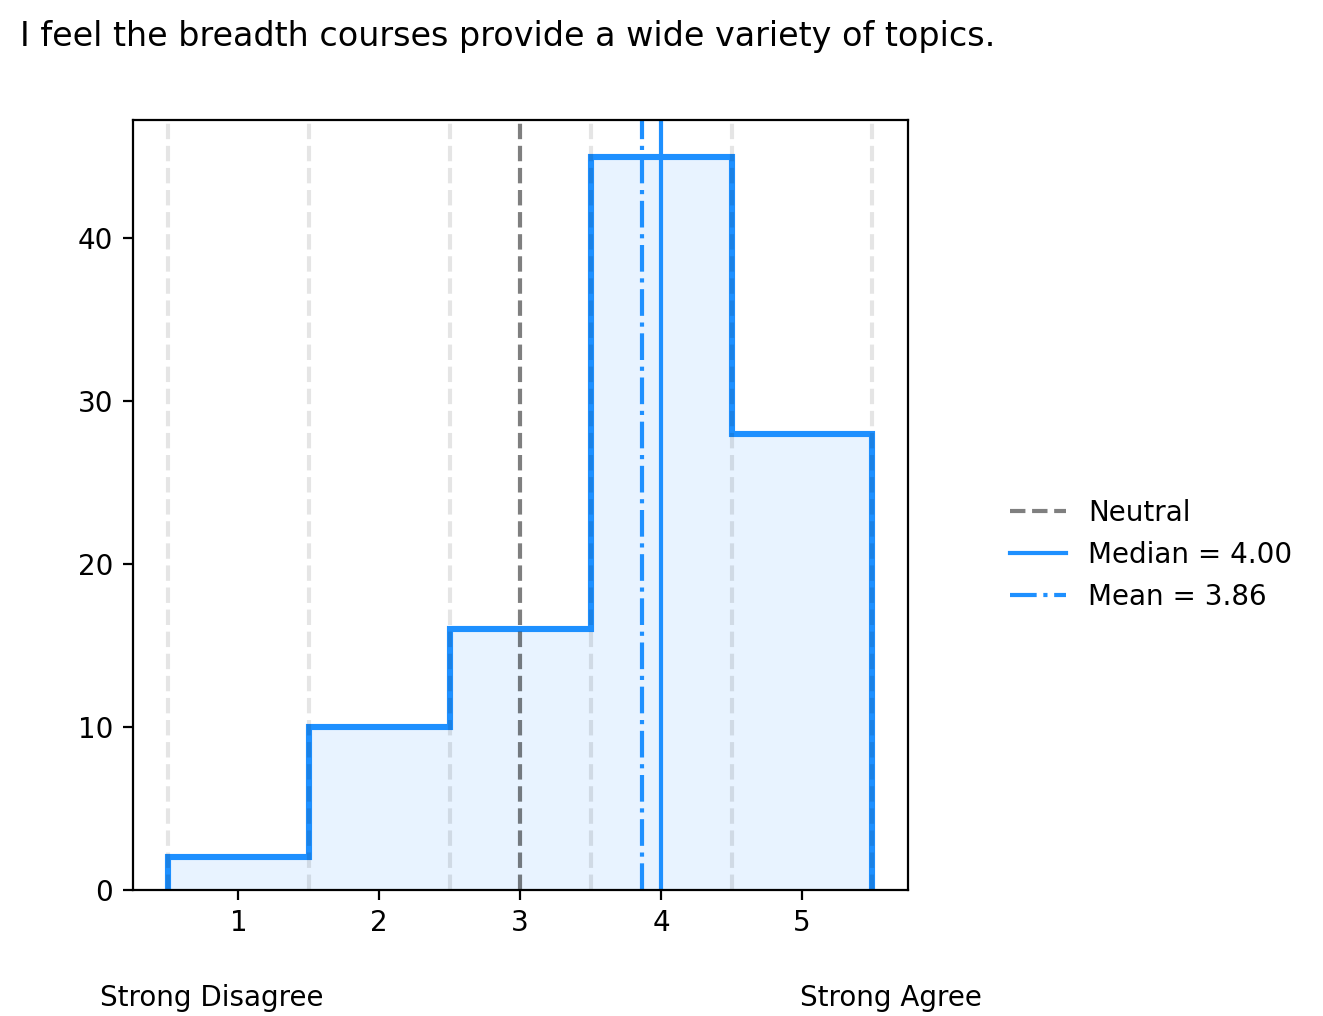

In [135]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Breadth", QOLData, fig, ax, color='dodgerblue')

Text(0.5, 0.98, 'I feel the Graduate Lab/Astronomy Lab sufficiently taught\n me experimental/observational techniques and data analysis.')

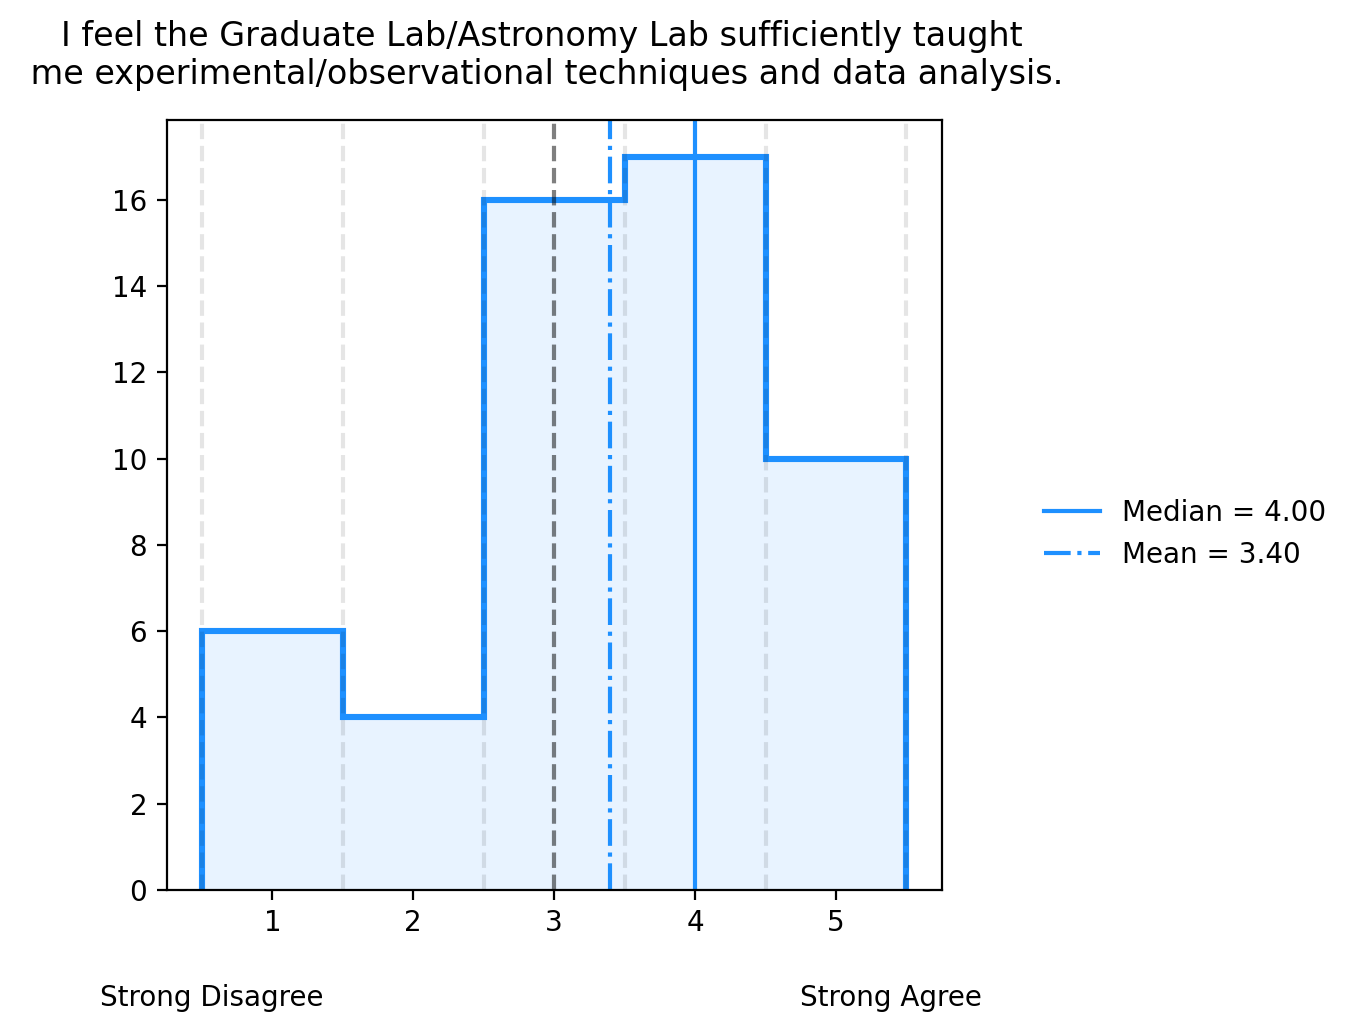

In [165]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Grad Astro Lab", QOLData, fig, ax, color='dodgerblue', title=False)
fig.suptitle("I feel the Graduate Lab/Astronomy Lab sufficiently taught\n me experimental/observational techniques and data analysis.")

In [137]:
qR = explode_Research()
astro_students = qR[qR['Research']=='Astronomy']
nonastro_students = qR[~(qR['Research']=='Astronomy')]

Text(0.5, 0.98, 'I feel the Lab sufficiently taught me ...')

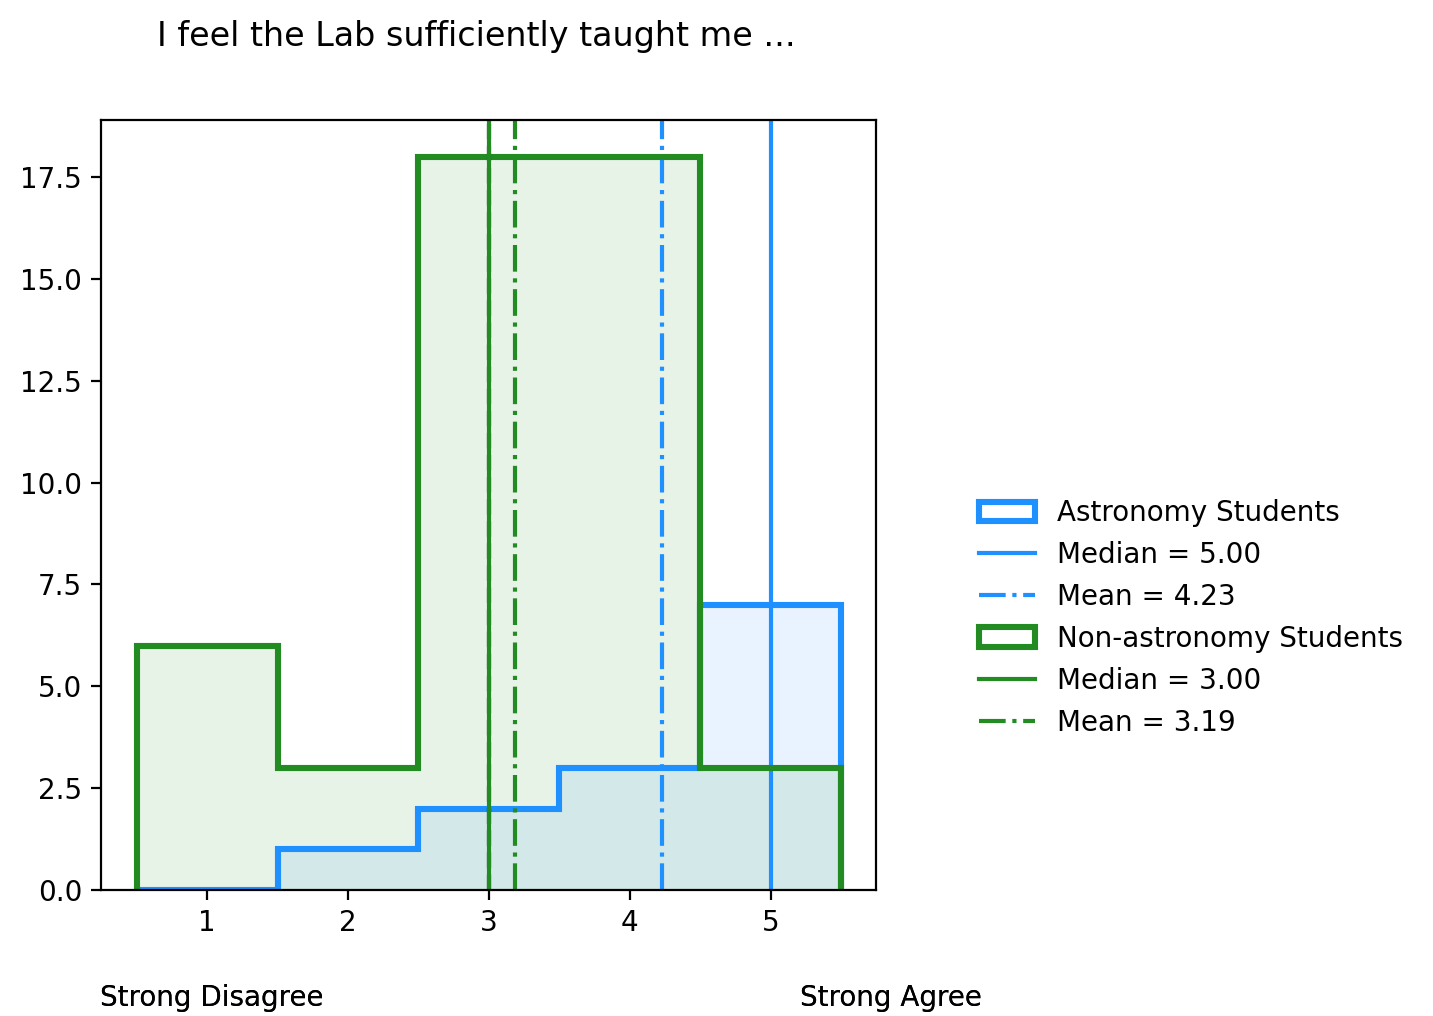

In [142]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Grad Astro Lab", astro_students, fig, ax, color='dodgerblue', title=False, label="Astronomy Students", guidelines=False)
generic_rating_hist("Grad Astro Lab", nonastro_students, fig, ax, color='forestgreen', title=False, label="Non-astronomy Students", guidelines=False)
fig.suptitle(r"I feel the Lab sufficiently taught me ...")

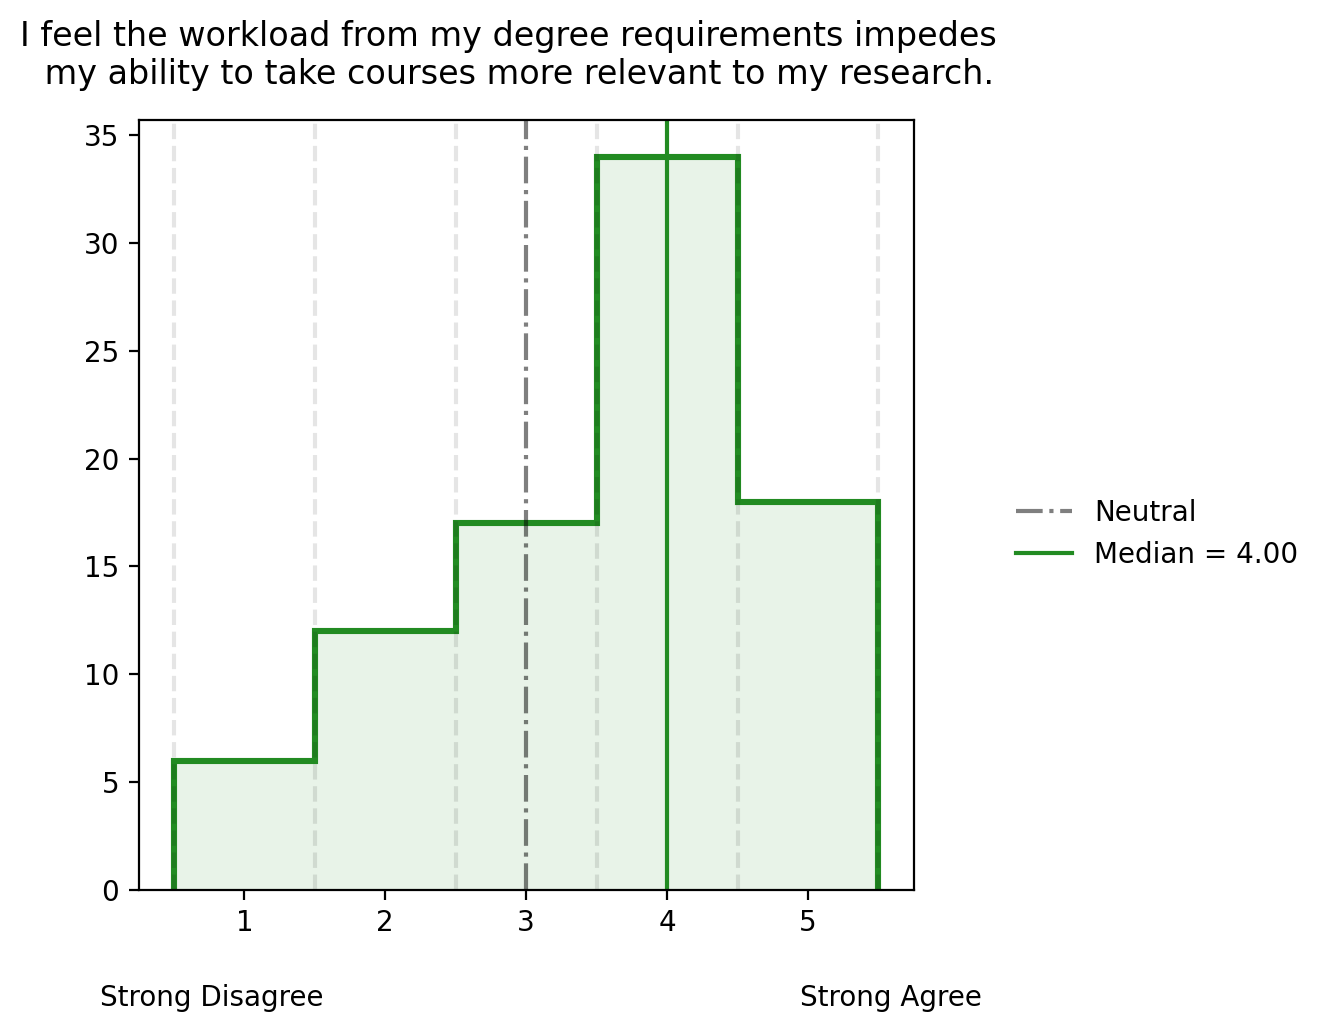

In [63]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Workload Impedence", QOLData, fig, ax, color='forestgreen', title=True)

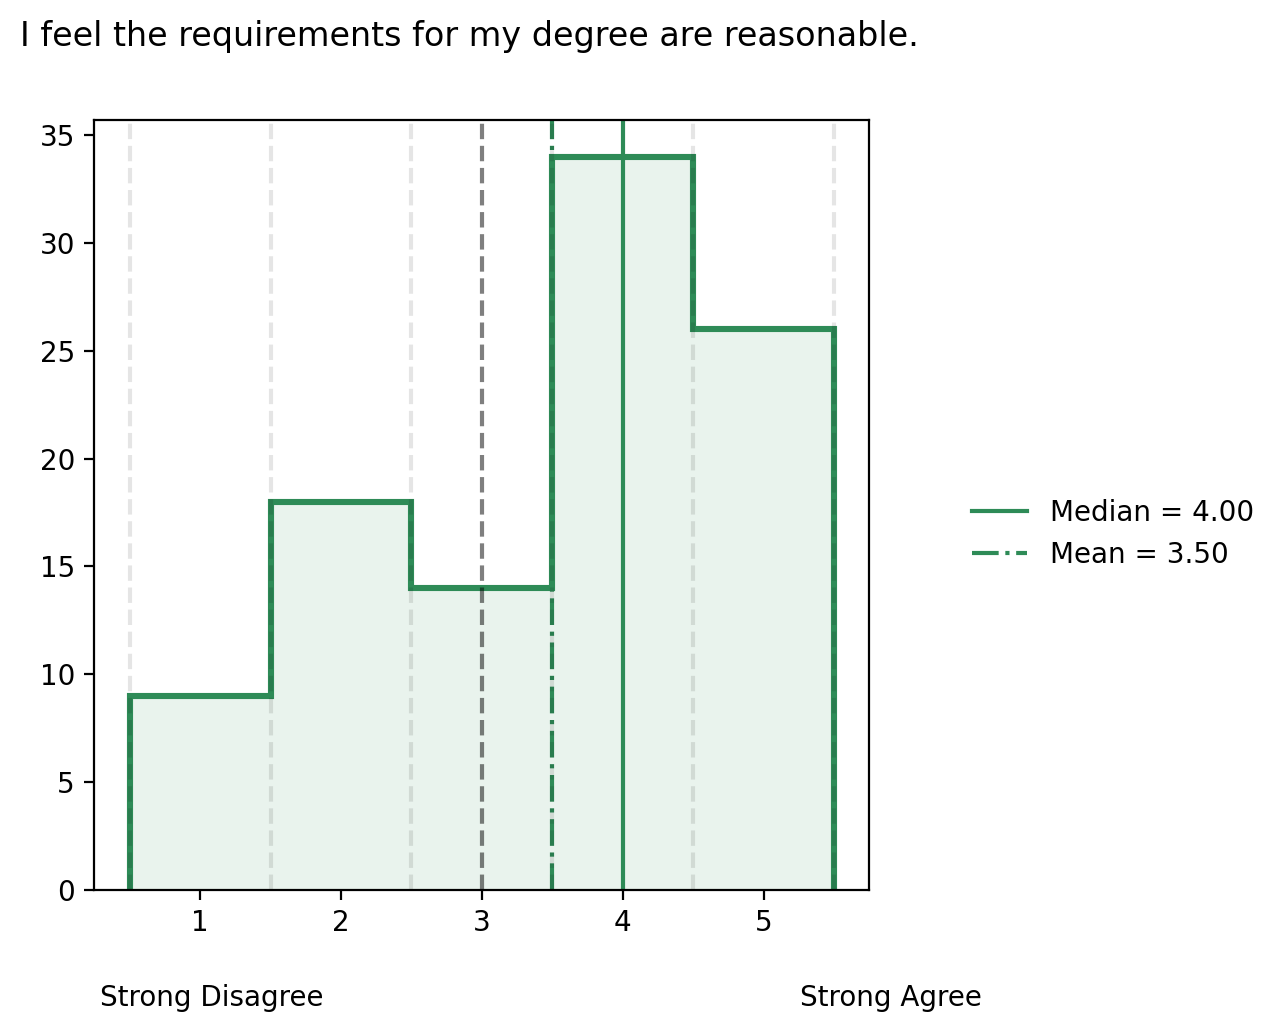

In [145]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Degree Requirements", QOLData, fig, ax, color='seagreen', title=True)

In [148]:
degree_req = QOLData['Degree Requirements']

In [152]:
degree_req = QOLData['Degree Requirements']
center_req = np.nanmean(degree_req)

unhappydegree = QOLData[QOLData['Degree Requirements'] <=center_req]
happydegree = QOLData[QOLData['Degree Requirements'] >= center_req]

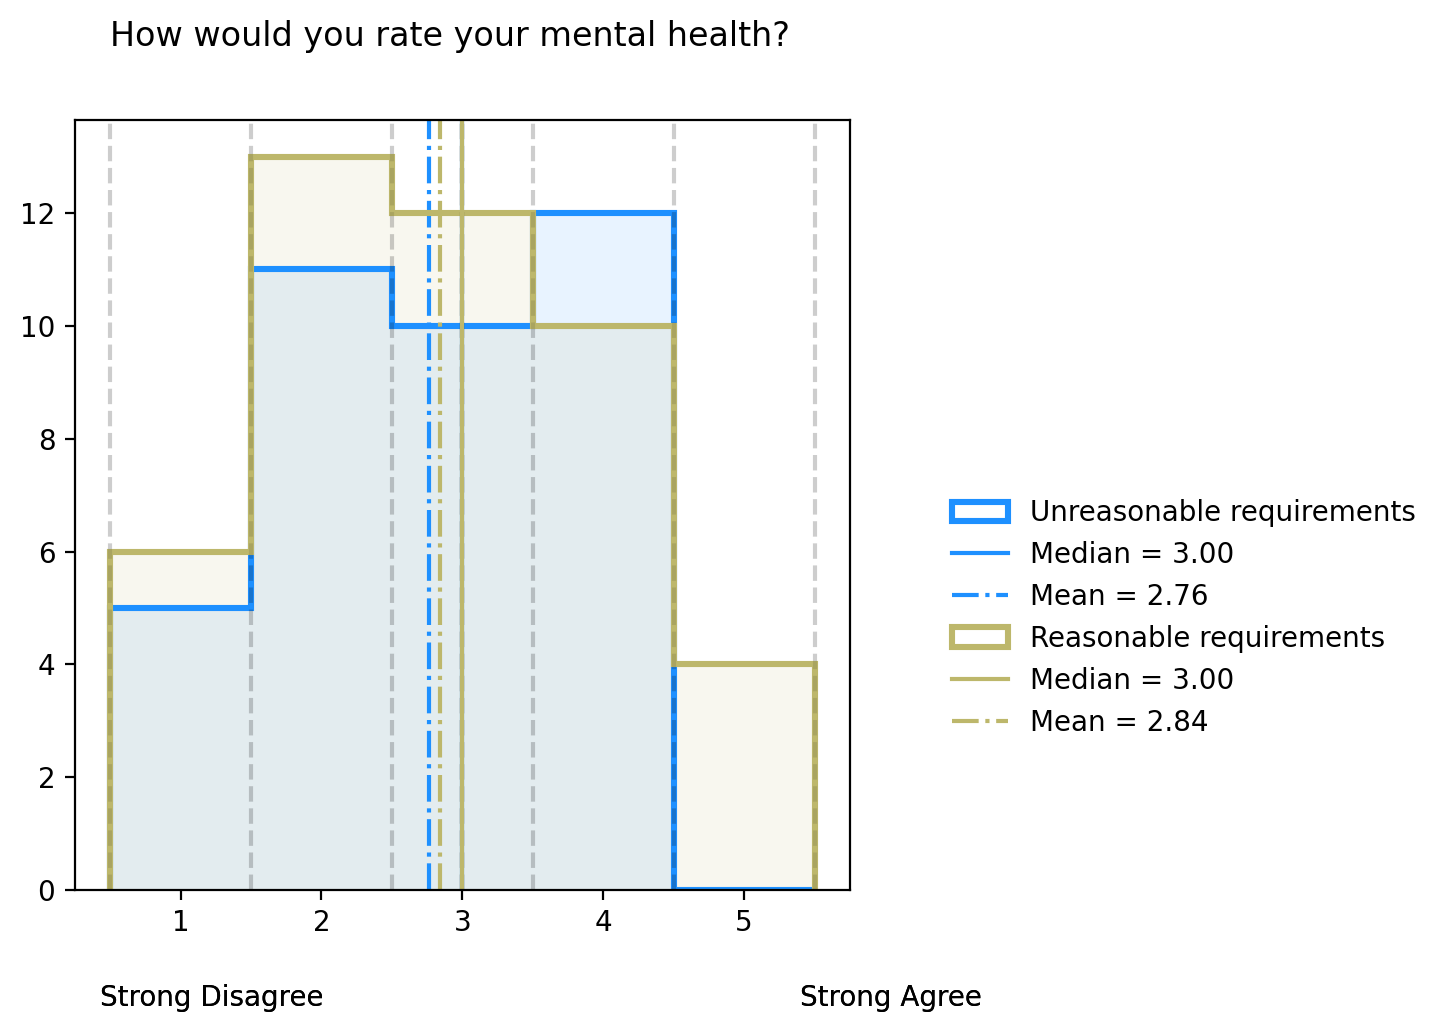

In [155]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Mental Health Rate", unhappydegree, fig, ax, color='dodgerblue', label="Unreasonable requirements")
generic_rating_hist("Mental Health Rate", happydegree, fig, ax, color='darkkhaki', label="Reasonable requirements")
# generic_rating_hist("Grad Astro Lab", nonastro_students, fig, ax, color='forestgreen', title=False, label="Non-astronomy Students", guidelines=False)

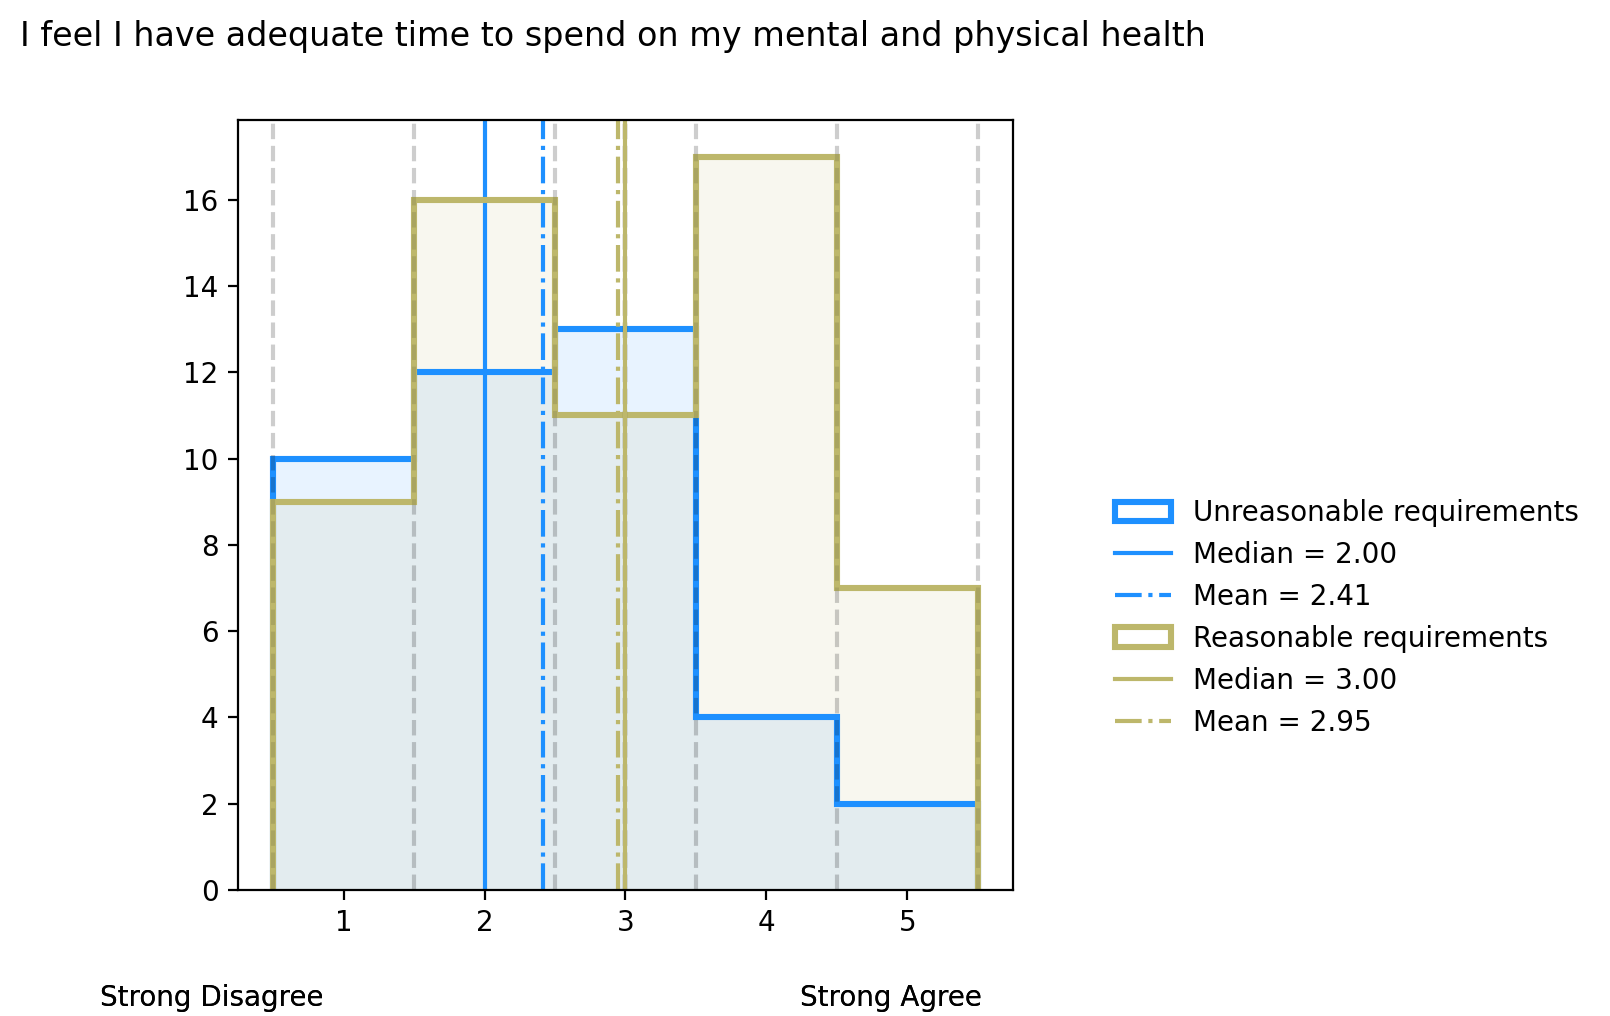

In [161]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Adequate Health Time", unhappydegree, fig, ax, color='dodgerblue', label="Unreasonable requirements")
generic_rating_hist("Adequate Health Time", happydegree, fig, ax, color='darkkhaki', label="Reasonable requirements")
# generic_rating_hist("Grad Astro Lab", nonastro_students, fig, ax, color='forestgreen', title=False, label="Non-astronomy Students", guidelines=False)

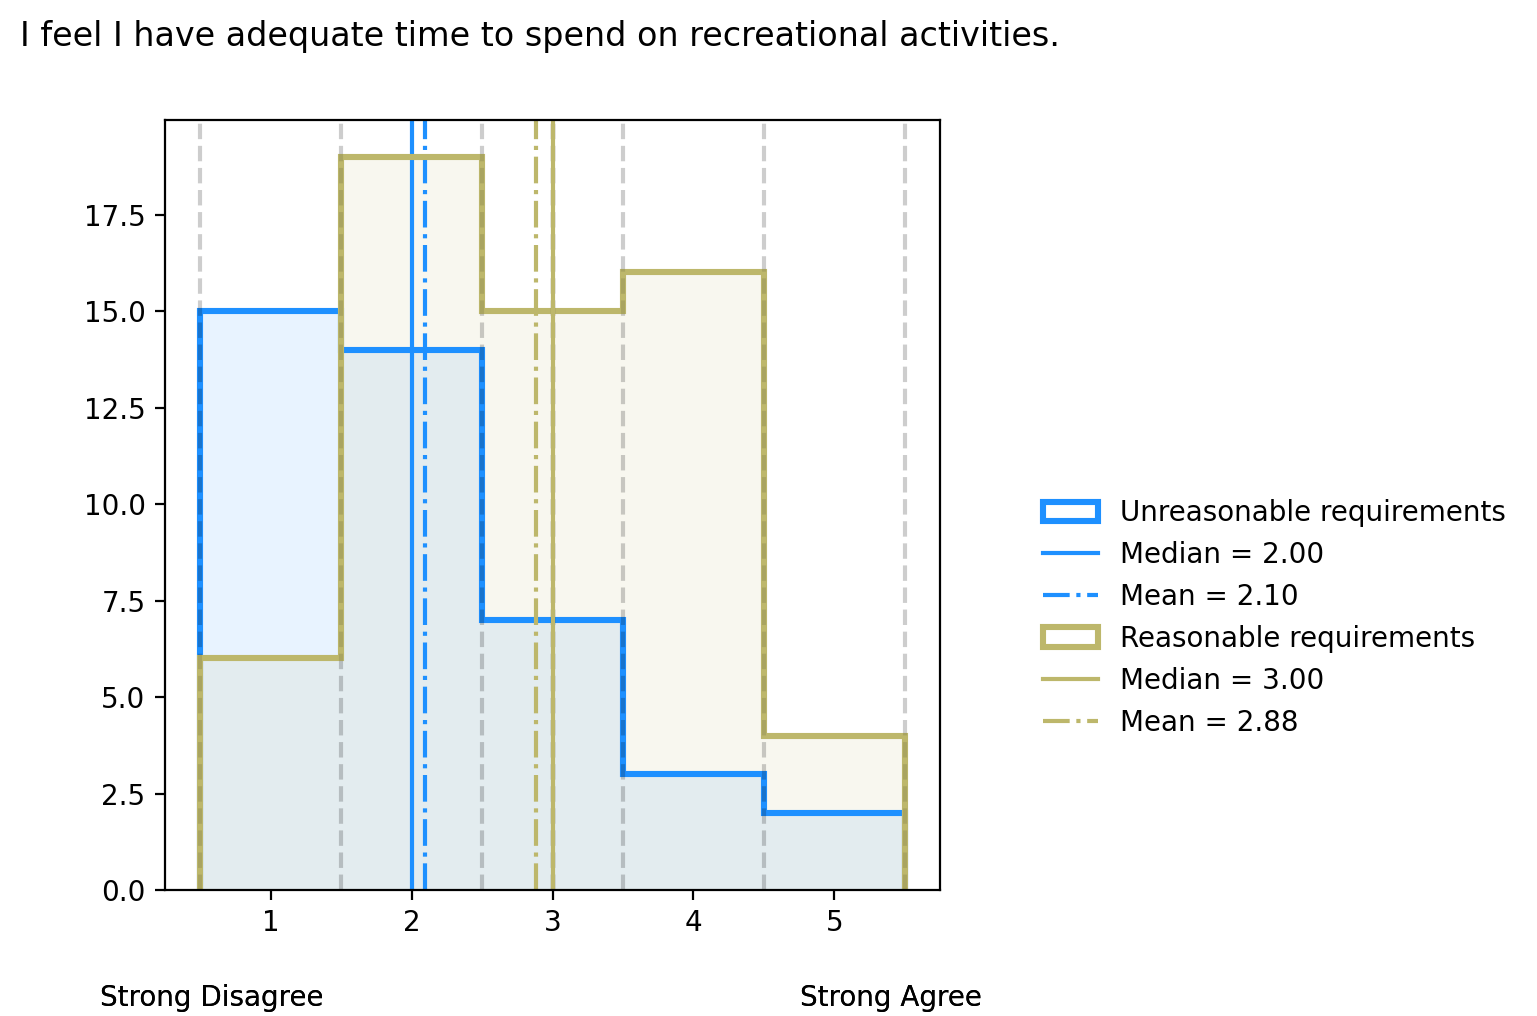

In [162]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Adequate Recreation Time", unhappydegree, fig, ax, color='dodgerblue', label="Unreasonable requirements")
generic_rating_hist("Adequate Recreation Time", happydegree, fig, ax, color='darkkhaki', label="Reasonable requirements")
# generic_rating_hist("Grad Astro Lab", nonastro_students, fig, ax, color='forestgreen', title=False, label="Non-astronomy Students", guidelines=False)

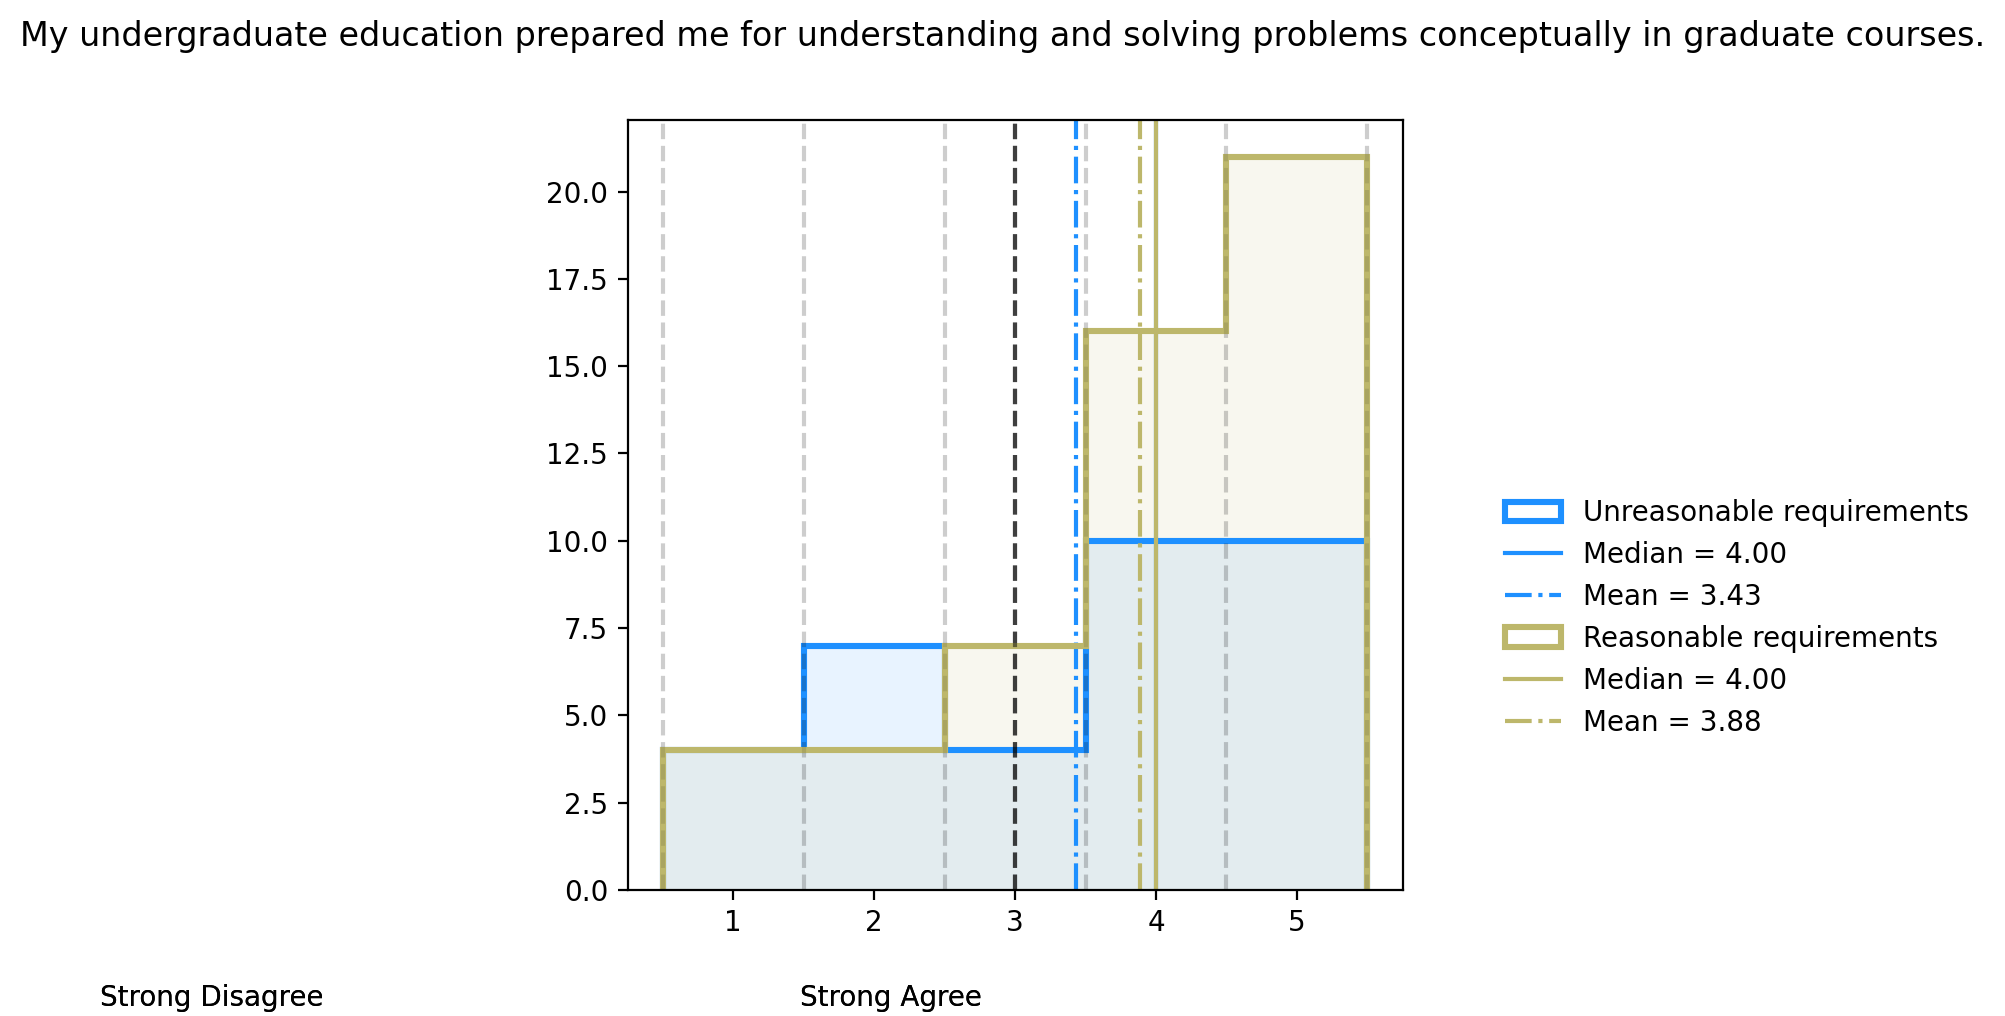

In [172]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Undergrad Prep Concept", unhappydegree, fig, ax, color='dodgerblue', label="Unreasonable requirements")
generic_rating_hist("Undergrad Prep Concept", happydegree, fig, ax, color='darkkhaki', label="Reasonable requirements")
# generic_rating_hist("Grad Astro Lab", nonastro_students, fig, ax, color='forestgreen', title=False, label="Non-astronomy Students", guidelines=False)

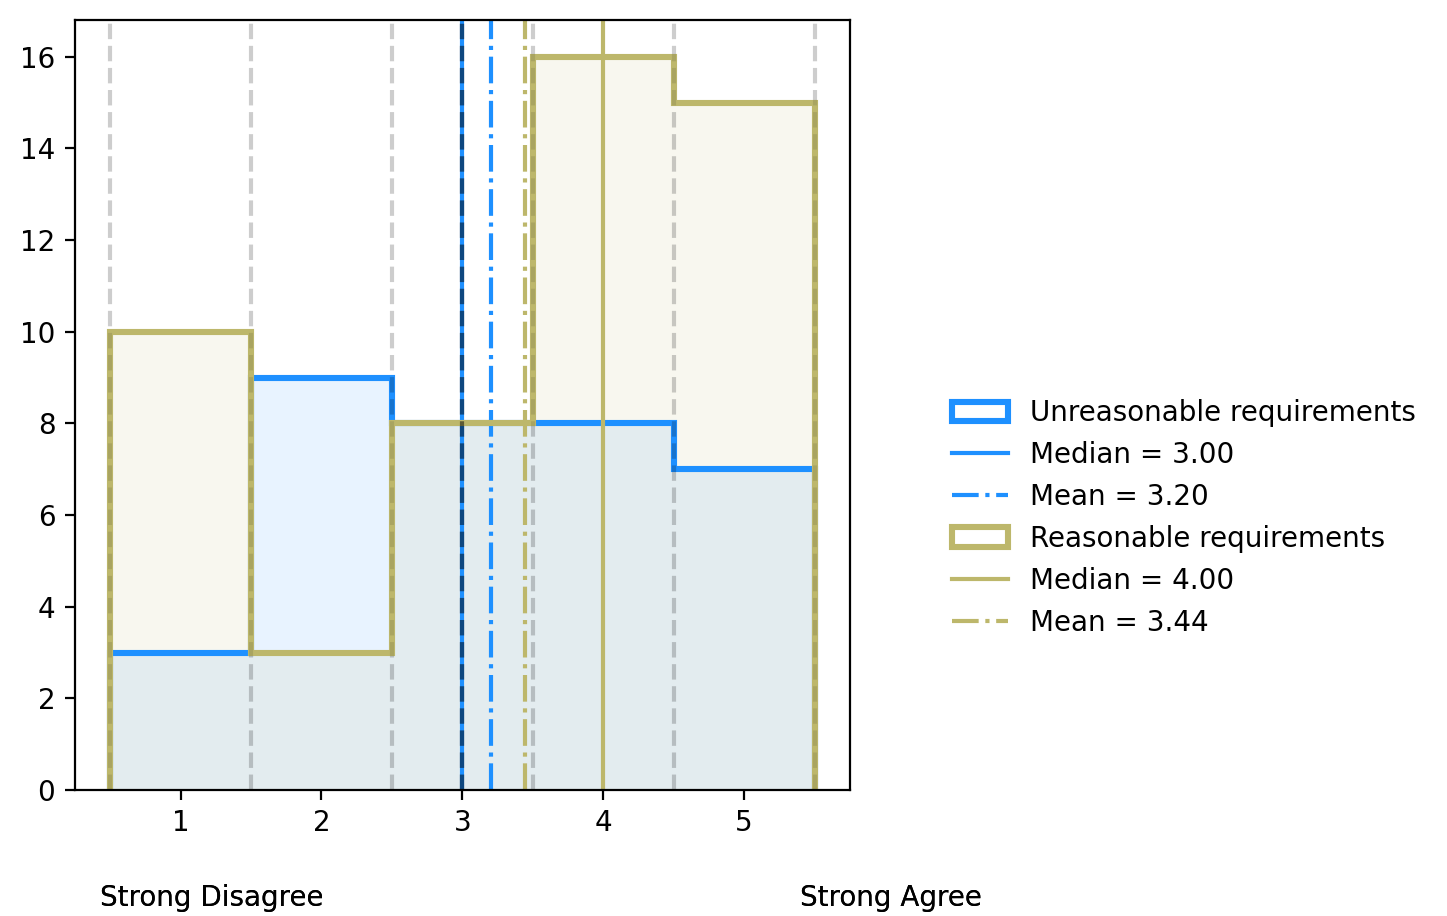

In [174]:
fig, ax = plt.subplots(1, figsize=(5,5))

generic_rating_hist("Undergrad Prep Math", unhappydegree, fig, ax, color='dodgerblue', label="Unreasonable requirements", title=False)
generic_rating_hist("Undergrad Prep Math", happydegree, fig, ax, color='darkkhaki', label="Reasonable requirements", title=False)
# generic_rating_hist("Grad Astro Lab", nonastro_students, fig, ax, color='forestgreen', title=False, label="Non-astronomy Students", guidelines=False)

In [156]:
# Can look into bootstrap for correlations?

In [171]:
VariablesCourses

['Degree Requirements',
 'Breadth',
 'Grad Astro Lab',
 'Workload Impedence',
 'Undergrad Prep Concept',
 'Undergrad Prep Math']

In [157]:
VariablesHealth

['Work Hours per Week',
 'Adequate Health Time',
 'Health Hours per Week',
 'Adequate Recreation Time',
 'Recreation Hours per Week',
 'Sleep',
 'Mental Health Rate',
 'Physical Health Rate',
 'Downtime']

#### Core Research Prep

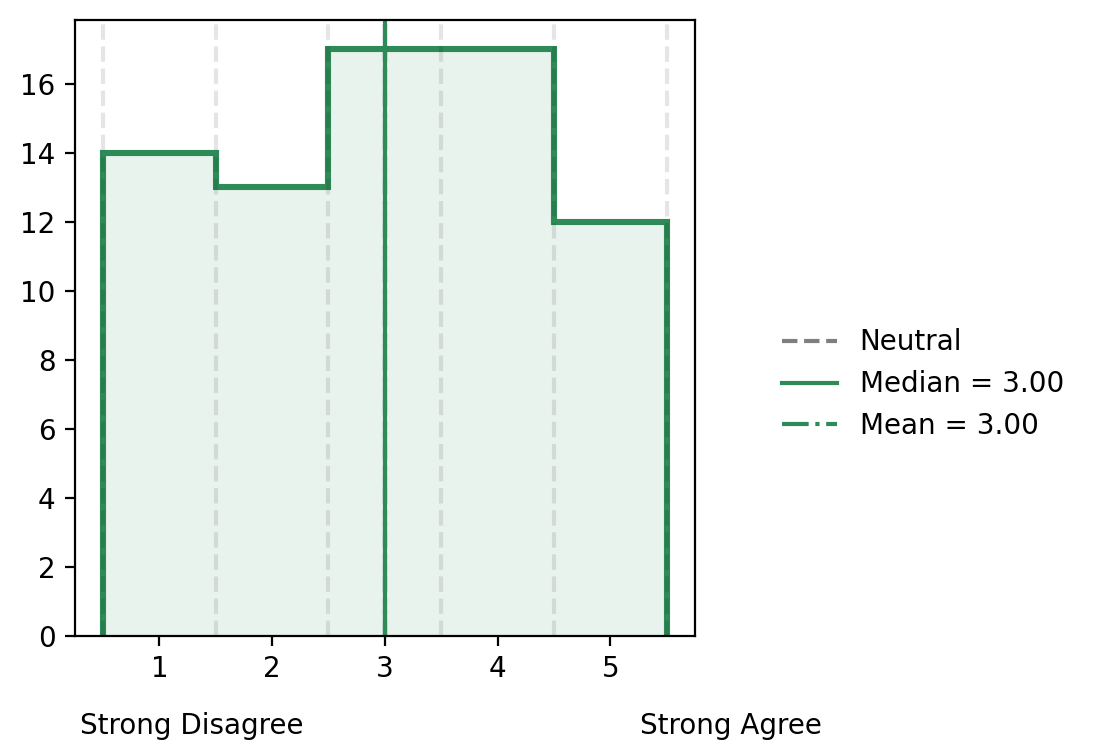

In [110]:
fig, ax = plt.subplots(1, figsize=(4,4))

generic_rating_hist("QM1 Core Prep Research", QOLData, fig, ax, color='seagreen', title=False)

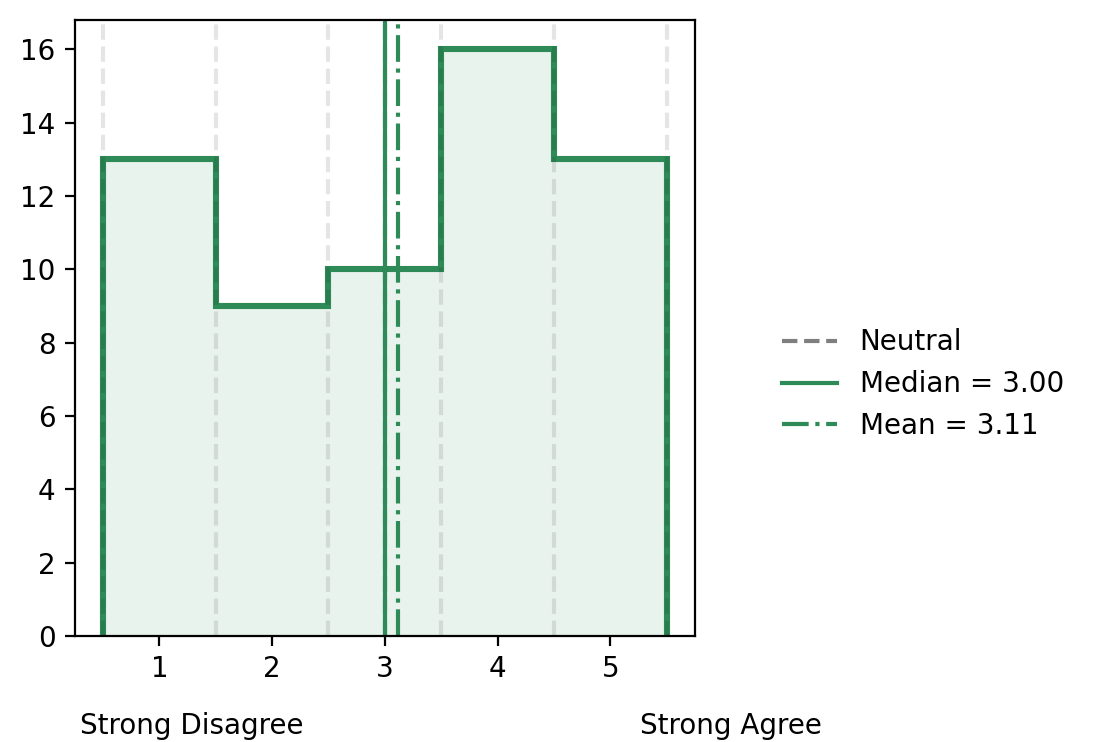

In [111]:
fig, ax = plt.subplots(1, figsize=(4,4))

generic_rating_hist("QM2 Core Prep Research", QOLData, fig, ax, color='seagreen', title=False)

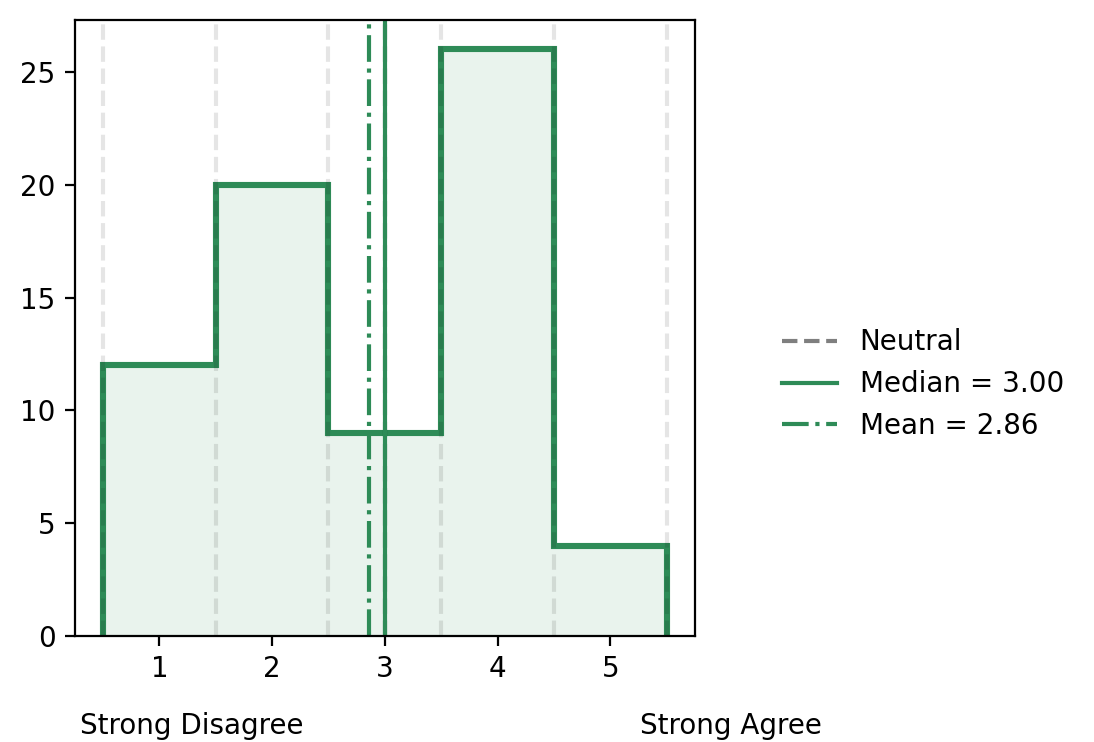

In [113]:
fig, ax = plt.subplots(1, figsize=(4,4))

generic_rating_hist("CM Core Prep Research", QOLData, fig, ax, color='seagreen', title=False)

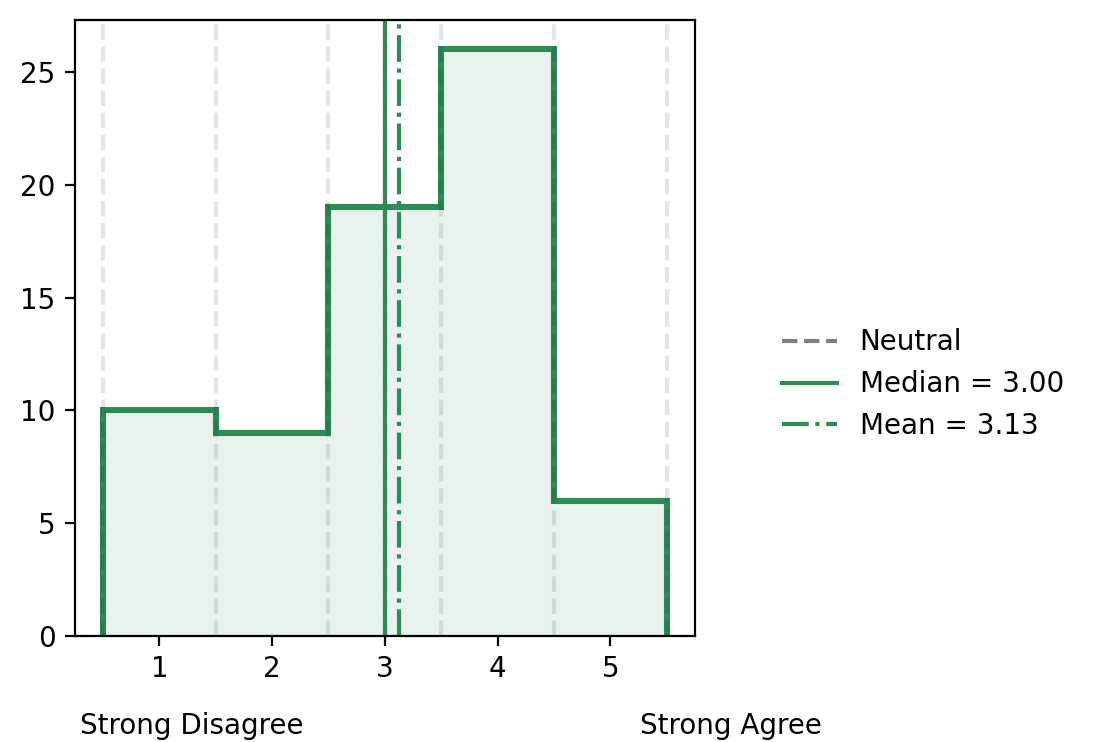

In [114]:
fig, ax = plt.subplots(1, figsize=(4,4))

generic_rating_hist("EM Core Prep Research", QOLData, fig, ax, color='seagreen', title=False)

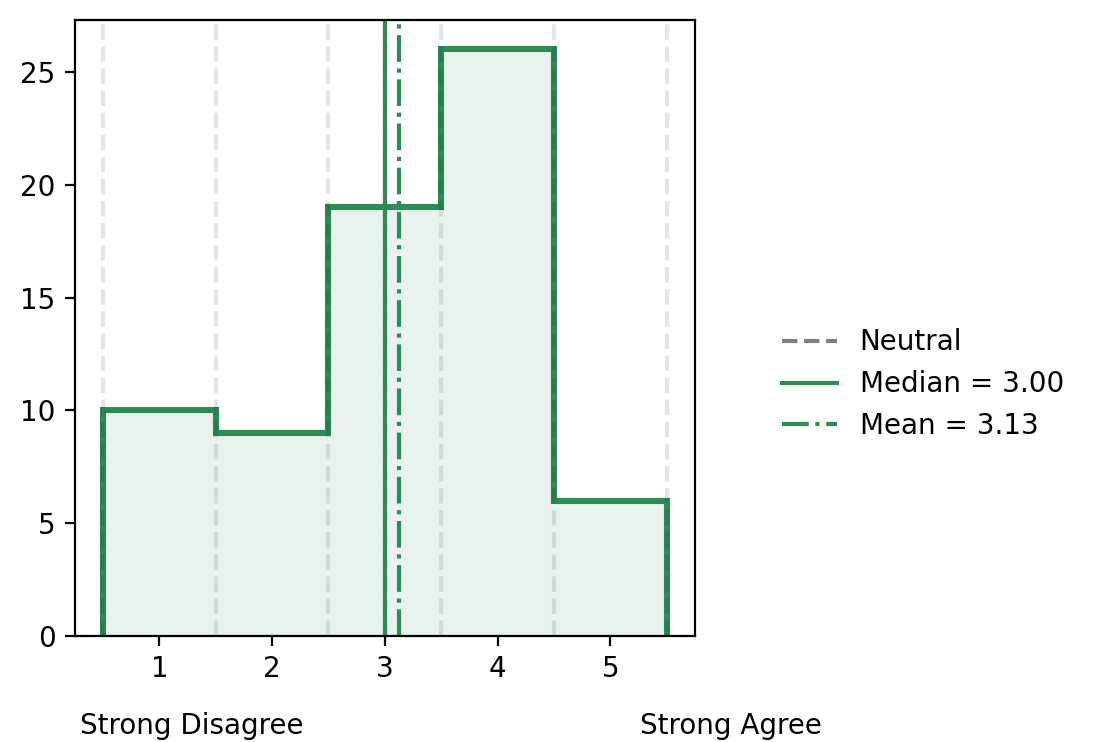

In [115]:
fig, ax = plt.subplots(1, figsize=(4,4))

generic_rating_hist("EM Core Prep Research", QOLData, fig, ax, color='seagreen', title=False)

In [112]:
Questions['CM ']

'The material I learned in the core courses (as it was taught to me) is applicable to my research CM'


Breadth, Grad Astro, Workload Impedence, ____ Core Prep Research, Degree Requirements

In [65]:
QOLData['Degree Requirements']

0      4
1      4
2      1
3      1
4      5
      ..
96     5
97     4
98     4
99     4
100    2
Name: Degree Requirements, Length: 101, dtype: int64

In [19]:
VariablesCourses

['Degree Requirements',
 'Breadth',
 'Grad Astro Lab',
 'Workload Impedence',
 'Undergrad Prep Concept',
 'Undergrad Prep Math']

# Pay and Hours

In [453]:
VariablesFinances=['Financially Stable','Monthly Income', 'Outside Support', 'Necessities percentage','Stipend Financially stable']
VariablesHealth=['Work Hours per Week', 'Adequate Health Time', 'Health Hours per Week',
        'Adequate Recreation Time', 'Recreation Hours per Week','Sleep','Mental Health Rate', 'Physical Health Rate', 'Downtime']

In [454]:
# Some students are part of mutliple jobs so we explode on "Jobs" such that each job
# a student has is its own row

jobData = explode_Job()

In [389]:
# phdData = QOLData[(QOLData['Program'] != 'Masters Degree') * (QOLData['Job'] != 'Other')]
# jobData = QOLData[(QOLData['Job'] != 'Other')]

In [472]:
work_hours = anon_factor("Program", 'Work Hours per Week', )
health_hours = anon_factor("Program", 'Health Hours per Week', )
rec_hours = anon_factor("Program", 'Recreation Hours per Week', )

In [473]:
def anon_meanfactor(demo_column, factor):
    data = anon_factor(demo_column, factor)
    mean_data = np.array([np.nanmean(k) for k in data])
    return mean_data

In [474]:
mean_work = anon_meanfactor("Program", 'Work Hours per Week')
mean_health = anon_meanfactor("Program", 'Health Hours per Week')
mean_rec = anon_meanfactor("Program", 'Recreation Hours per Week')

In [475]:
mean_work + mean_health + mean_rec

array([62.27561807, 65.81521739, 65.99335508])

In [477]:
# Standard QOL data can have one student (row) be part of multiple research groups
# Here we let a single student that is part of multiple groups be counted multiple times
researchQOL = explode_Research()

# Need a new set of "anonymized" research group names 
non_combined_research_areas = np.unique(researchQOL['Research'].values)
nc_research_areas = [[ncra] for ncra in non_combined_research_areas]

nc_research_areas.pop(-2)
nc_research_areas.pop(-5)
nc_research_areas.append(['I am not currently involved in research'])
nc_research_areas.append( ['Prefer not to answer'])

In [505]:
research_workhours_samples = anon_factor("Research", 'Work Hours per Week', ano_bins=nc_research_areas, QOL=researchData)
research_rechours_samples = anon_factor("Research", 'Recreation Hours per Week', ano_bins=nc_research_areas, QOL=researchData)
research_healthhours_samples = anon_factor("Research", 'Health Hours per Week', ano_bins=nc_research_areas, QOL=researchData)

In [513]:
mint = stats.bootstrap([research_rechours_samples[0]], np.nanmean, confidence_level=.68)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_resampling.py:650: RuntimeWarning: Mean of empty slice
  theta_hat_b.append(statistic(*resampled_data, axis=-1))


In [515]:
mint.confidence_interval.low

np.float64(nan)

In [516]:
def anon_meanerr(anon_samples):
    means = np.zeros(len(anon_samples))
    errs = np.zeros_like(means)

    for i,k in enumerate(anon_samples):
        means[i] = np.nanmean(k)
    
        boot_ci = stats.bootstrap([k], np.nanmean, confidence_level=.68)
        if np.isnan(boot_ci.confidence_interval.low):
            errs[i] = 0
        else:
            boot_sigma = (np.diff(boot_ci.confidence_interval)/2)[0]
            errs[i] = boot_sigma
        
    return means, errs

In [553]:
research_workhours_samples

[array([35, 50, 55]),
 array([ 27,  50,  45,  40,  60,  50,  40,  30, 100,  50,  40,  40,  55,
         45,  60,  60,  50,  85,  60,  30]),
 array([45, 60, 40, 50, 65, 70, 60, 40, 50, 50, 61, 60, 50, 40, 55]),
 array([30, 44]),
 array([60, 80]),
 array([80, 20, 45, 40, 35, 40, 60, 50]),
 array([20, 60, 80, 60, 50, 60, 35, 60, 60, 35, 50]),
 array([ 5, 35, 60]),
 array([55, 20, 72, 60, 60, 40, 25]),
 array([60, 35, 50, 24, 35, 40, 45, 35, 50, 40, 50, 40]),
 array([20, 50, 60, 50]),
 array([50, 40, 40, 48, 60, 60, 45, 40, 50]),
 array([50, 65, 60, 50, 42]),
 array([48, 50, 34, 33, 75, 35, 25]),
 array([60, 60, 60])]

In [517]:
w1, w2 = anon_meanerr(research_workhours_samples)
r1, r2 = anon_meanerr(research_rechours_samples)
h1, h2 = anon_meanerr(research_healthhours_samples)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:440: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  return fun(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_resampling.py:130: RuntimeWarning: Mean of empty slice
  theta_hat_i.append(statistic(*broadcasted, axis=-1))


In [521]:
total_hours = w1 + r1 + h1
total_hour_err = np.sqrt(w2**2 + r2**2 + h2**2)
nsamples

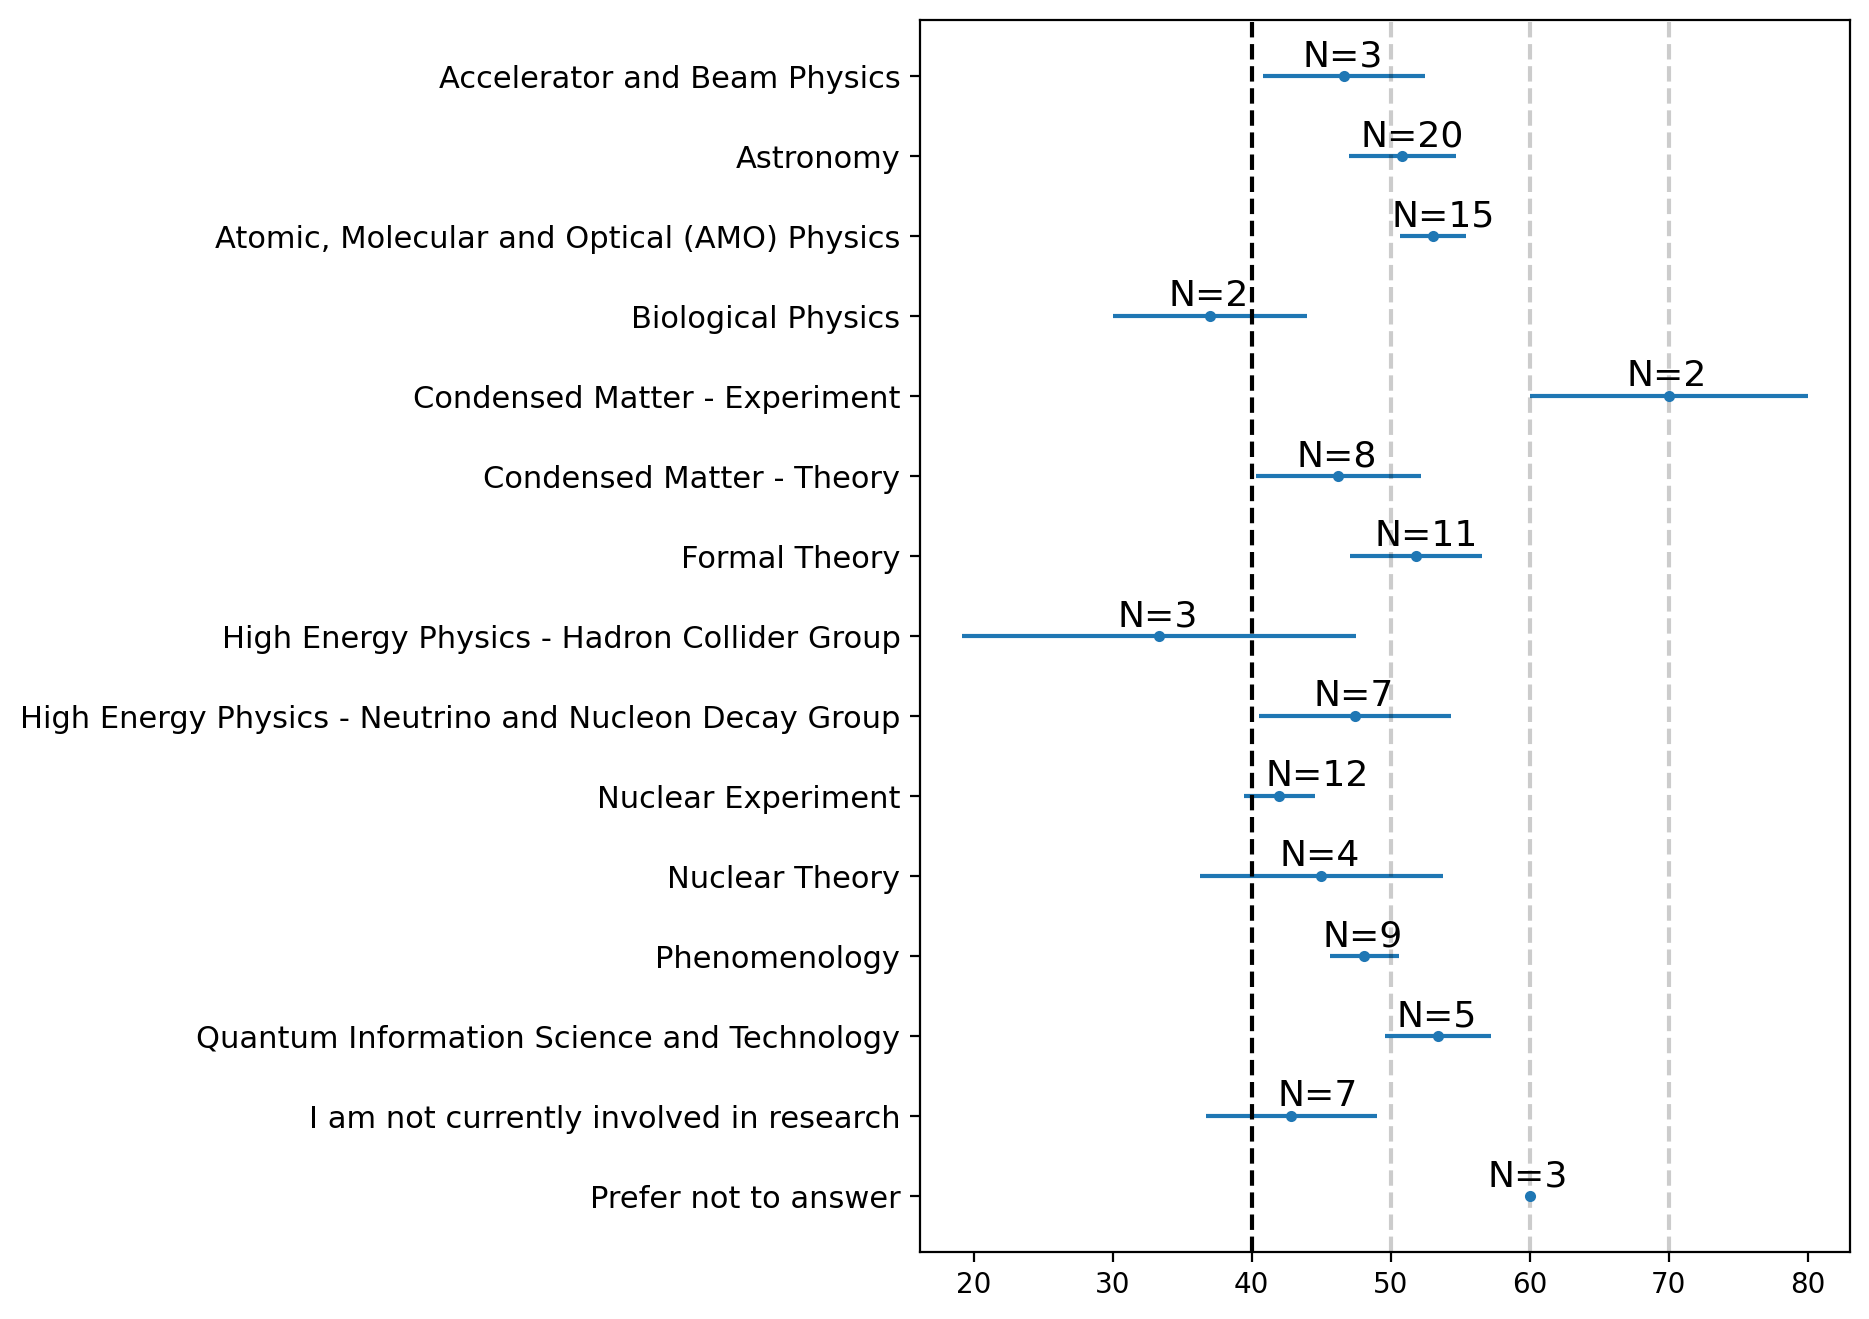

In [552]:
fig, ax = plt.subplots(ncols=1, figsize=(6,8))

nsamples = [len(rw) for rw in research_workhours_samples]
ys = np.arange(len(w1))*2

ax.errorbar(w1, ys, xerr=w2, fmt='.')
ax.axvline(40, ls='--', color='k')
for vs in [50, 60, 70]:
    ax.axvline(vs, ls='--', color='k', alpha=0.2)

for i in range(len(ys)):
    if i==9:
        ax.annotate(f"N={nsamples[i]}", (w1[i]-1, ys[i]-.25), fontsize=13)
    elif i==13:
        ax.annotate(f"N={nsamples[i]}", (w1[i]-1, ys[i]-.25), fontsize=13)
    else:
        ax.annotate(f"N={nsamples[i]}", (w1[i]-3, ys[i]-.25), fontsize=13)

ax.invert_yaxis()
flat_res_areas = [nc[0] for nc in nc_research_areas]
ax.set_yticks(ticks=ys, labels=flat_res_areas, wrap=False, fontsize=11);
# ax.axvline(20, ls='--', color='k')

# ax[1].annotate(r"hallo $\bf{applicable}$ $\bf{snake}$", (4,1.75), wrap=True, fontsize=12, bbox=bbox1)

# ax[1].yaxis.set_label_position("right")
# ax[1].yaxis.tick_right()
# fig.suptitle("Many students find the degree requirements helpful")
# ax[0].set_title("The degree requirements are applicable to my research", wrap=True)

# ax2 = ax[1].twinx()
# ax2.set_ylabel("The material I learned in the core courses is applicable to my research", rotation=270, labelpad=28.1, fontsize=12, wrap=True)
# ax2.set_yticks([])

# ax[1].set_title("The material I learned in the core courses is applicable to my research", wrap=True)

In [378]:
cm = colormaps.get_cmap('tab10')

Text(0.8, 0.01, 'Strong Agree')

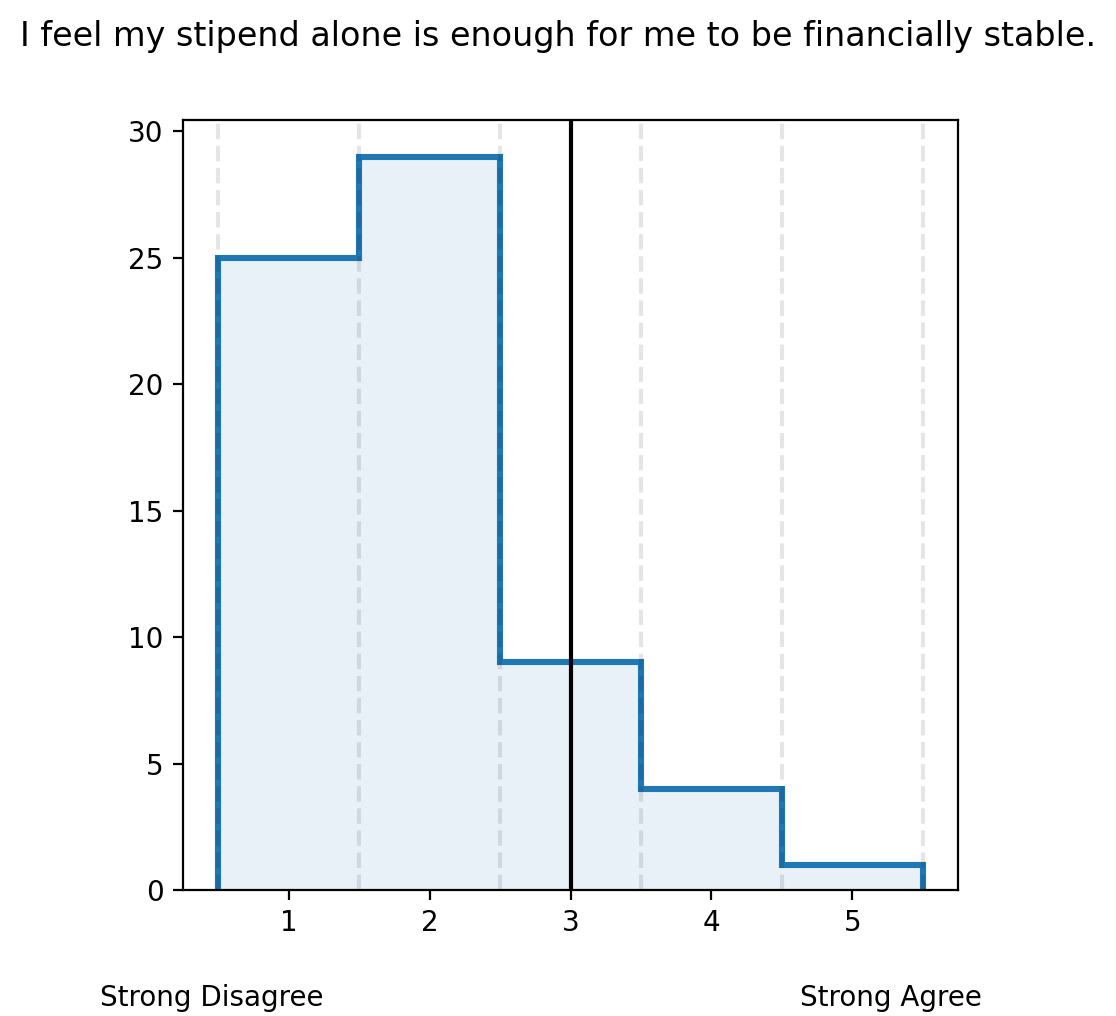

In [379]:
# Is the stipend enough?

fig, ax = plt.subplots(1, figsize=(5,5))

# stipend_stable_data = np.concatenate(anon_factor("Job", "Stipend Financially stable"))

ax.hist(stipend_stable_data, bins=rbins, alpha=1, density=False,
                    histtype='step', linewidth=2.2,color=cm(0))

ax.hist(stipend_stable_data, bins=rbins, alpha=.1, density=False, color=cm(0))

ax.axvline(x=3.5, color='k', ls='-', label="Neutral")

ax.set_xticks(ratings+.5, ratings);
for ll in rbins:
    ax.axvline(ll, color='k', ls='--', alpha=.1)

fig.suptitle("I feel my stipend alone is enough for me to be financially stable.")
ax.annotate("Strong Disagree", xy=(.1,.01), xycoords='figure fraction')
ax.annotate("Strong Agree", xy=(.8, .01), xycoords='figure fraction')

# stipend_support = anon_factor('Job', VariablesFinances[-1], QOL=jobData)
# lbls = [' / '.join(anonymous_demo['Job'][i]) + f' (n = {len(stipend_support[i])})' for i in range(3)]

# for i, stip in enuemrate(stipend_support):
#     ax.hist(stip, density=True


A majority of students ($55$) disagree with the statement that the stipend is enough to be financially stable.

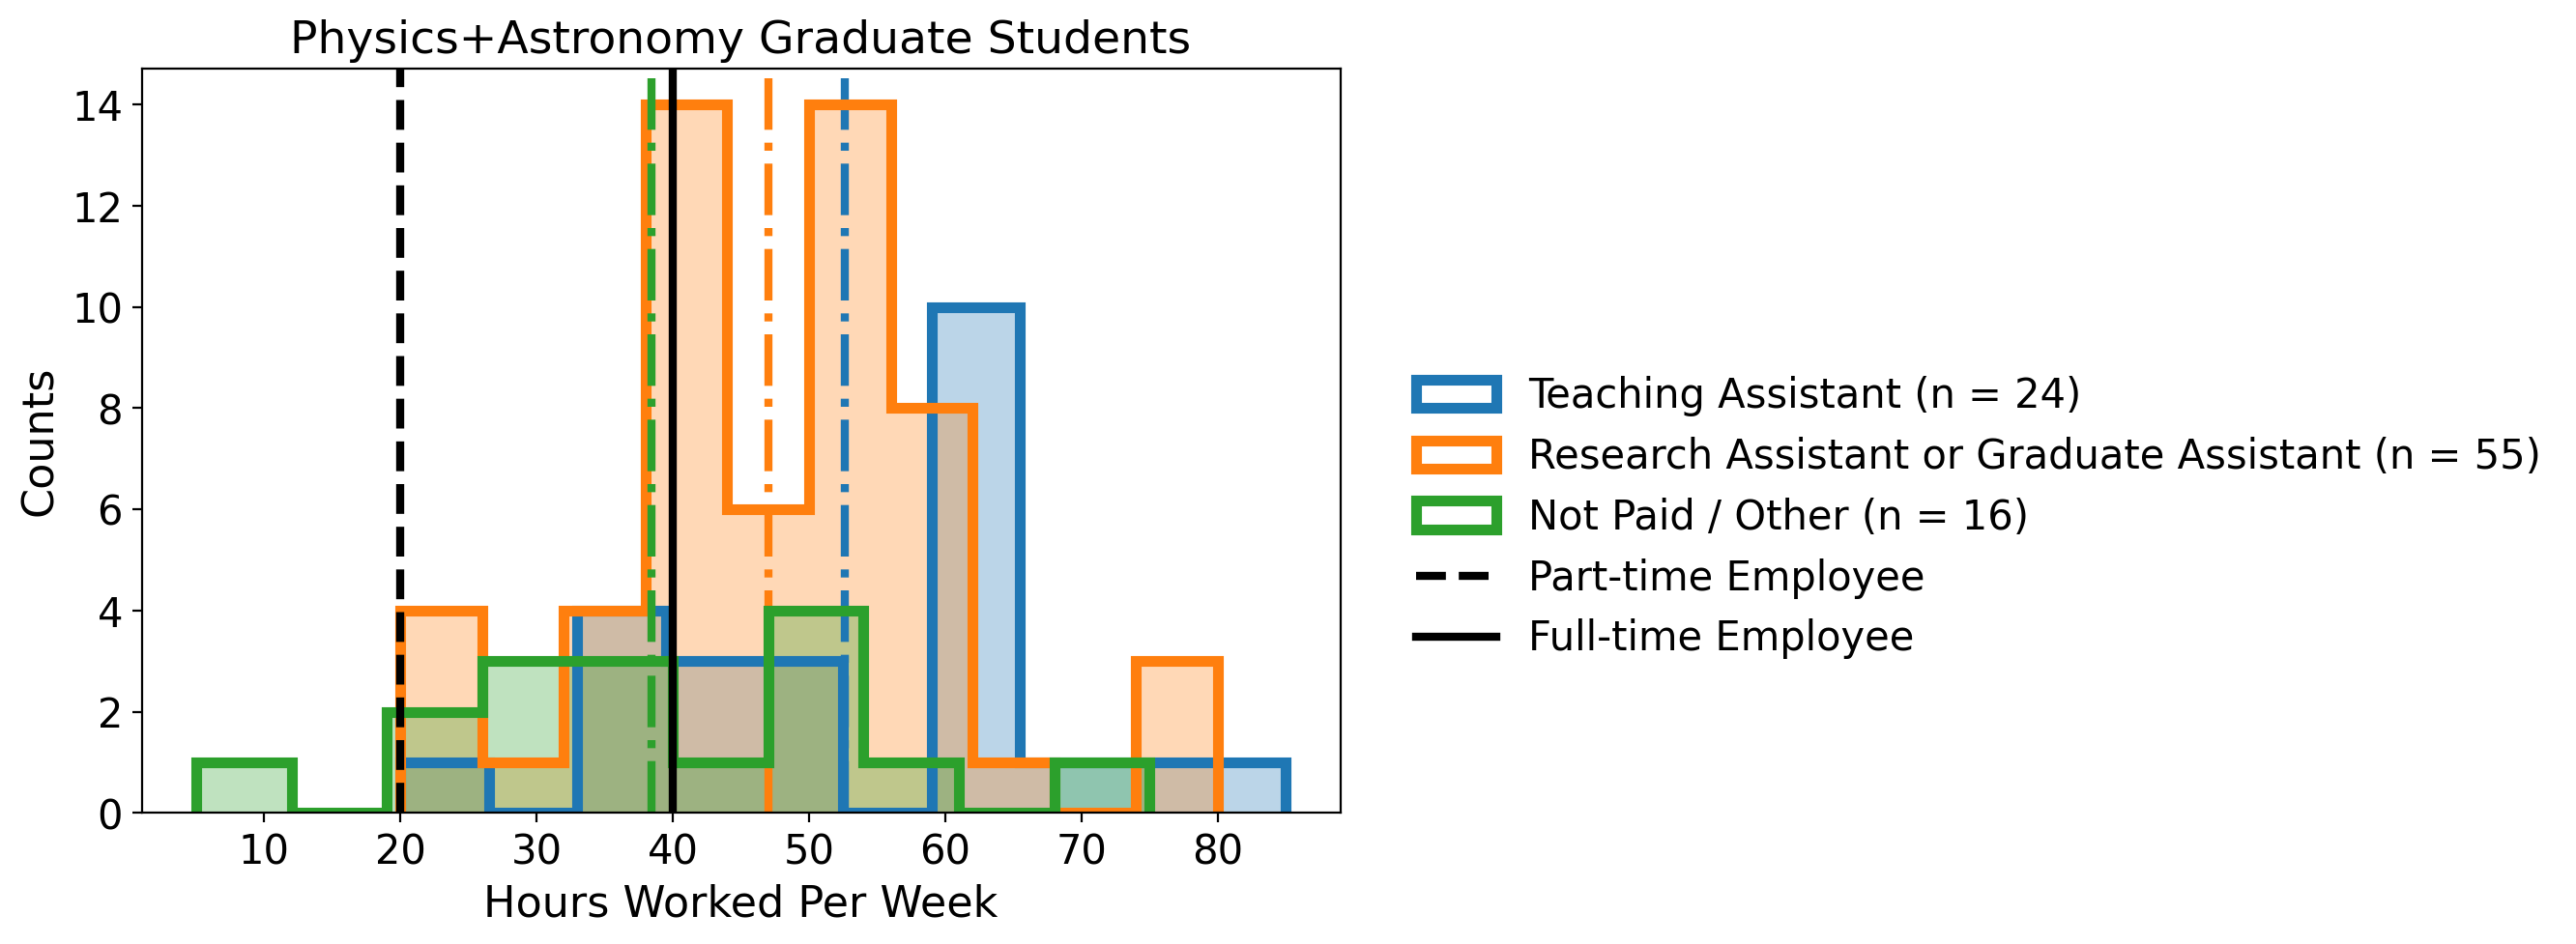

In [367]:
# Job type vs hours

fig, ax = plt.subplots(1, figsize=(8,5))

hours_jobs = anon_factor('Job', 'Work Hours per Week')

lbls = [' / '.join(anonymous_demo['Job'][i]) + f' (n = {len(hours_jobs[i])})' for i in range(3)]
leg_plots = []

for i, hj in enumerate(hours_jobs):
    ax.axvline(hj.mean(), ls='-.', color=cm(i), linewidth=3)
    # ax.axvline(np.median(hj), ls='-', color=cm(i-1), linewidth=3)
    ax.hist(hj,  density=False, alpha=.3, color=cm(i))
    ax.hist(hj, label=lbls[i], density=False, histtype='step', linewidth=4, color=cm(i))


for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
ax.set_title("Physics+Astronomy Graduate Students", fontsize=17)
ax.set_xlabel("Hours Worked Per Week", fontsize=16)
ax.set_ylabel("Counts", fontsize=16)
ax.axvline(20, ls='--', color='black', linewidth=3, label='Part-time Employee')
ax.axvline(40, ls='-', color='black', linewidth=3, label='Full-time Employee')
# ax.axvline(0, ls='-.', color='gray', linewidth=3, label='Mean of Category')
fig.legend(frameon=False, bbox_to_anchor=(1.7, .6), fontsize=15)



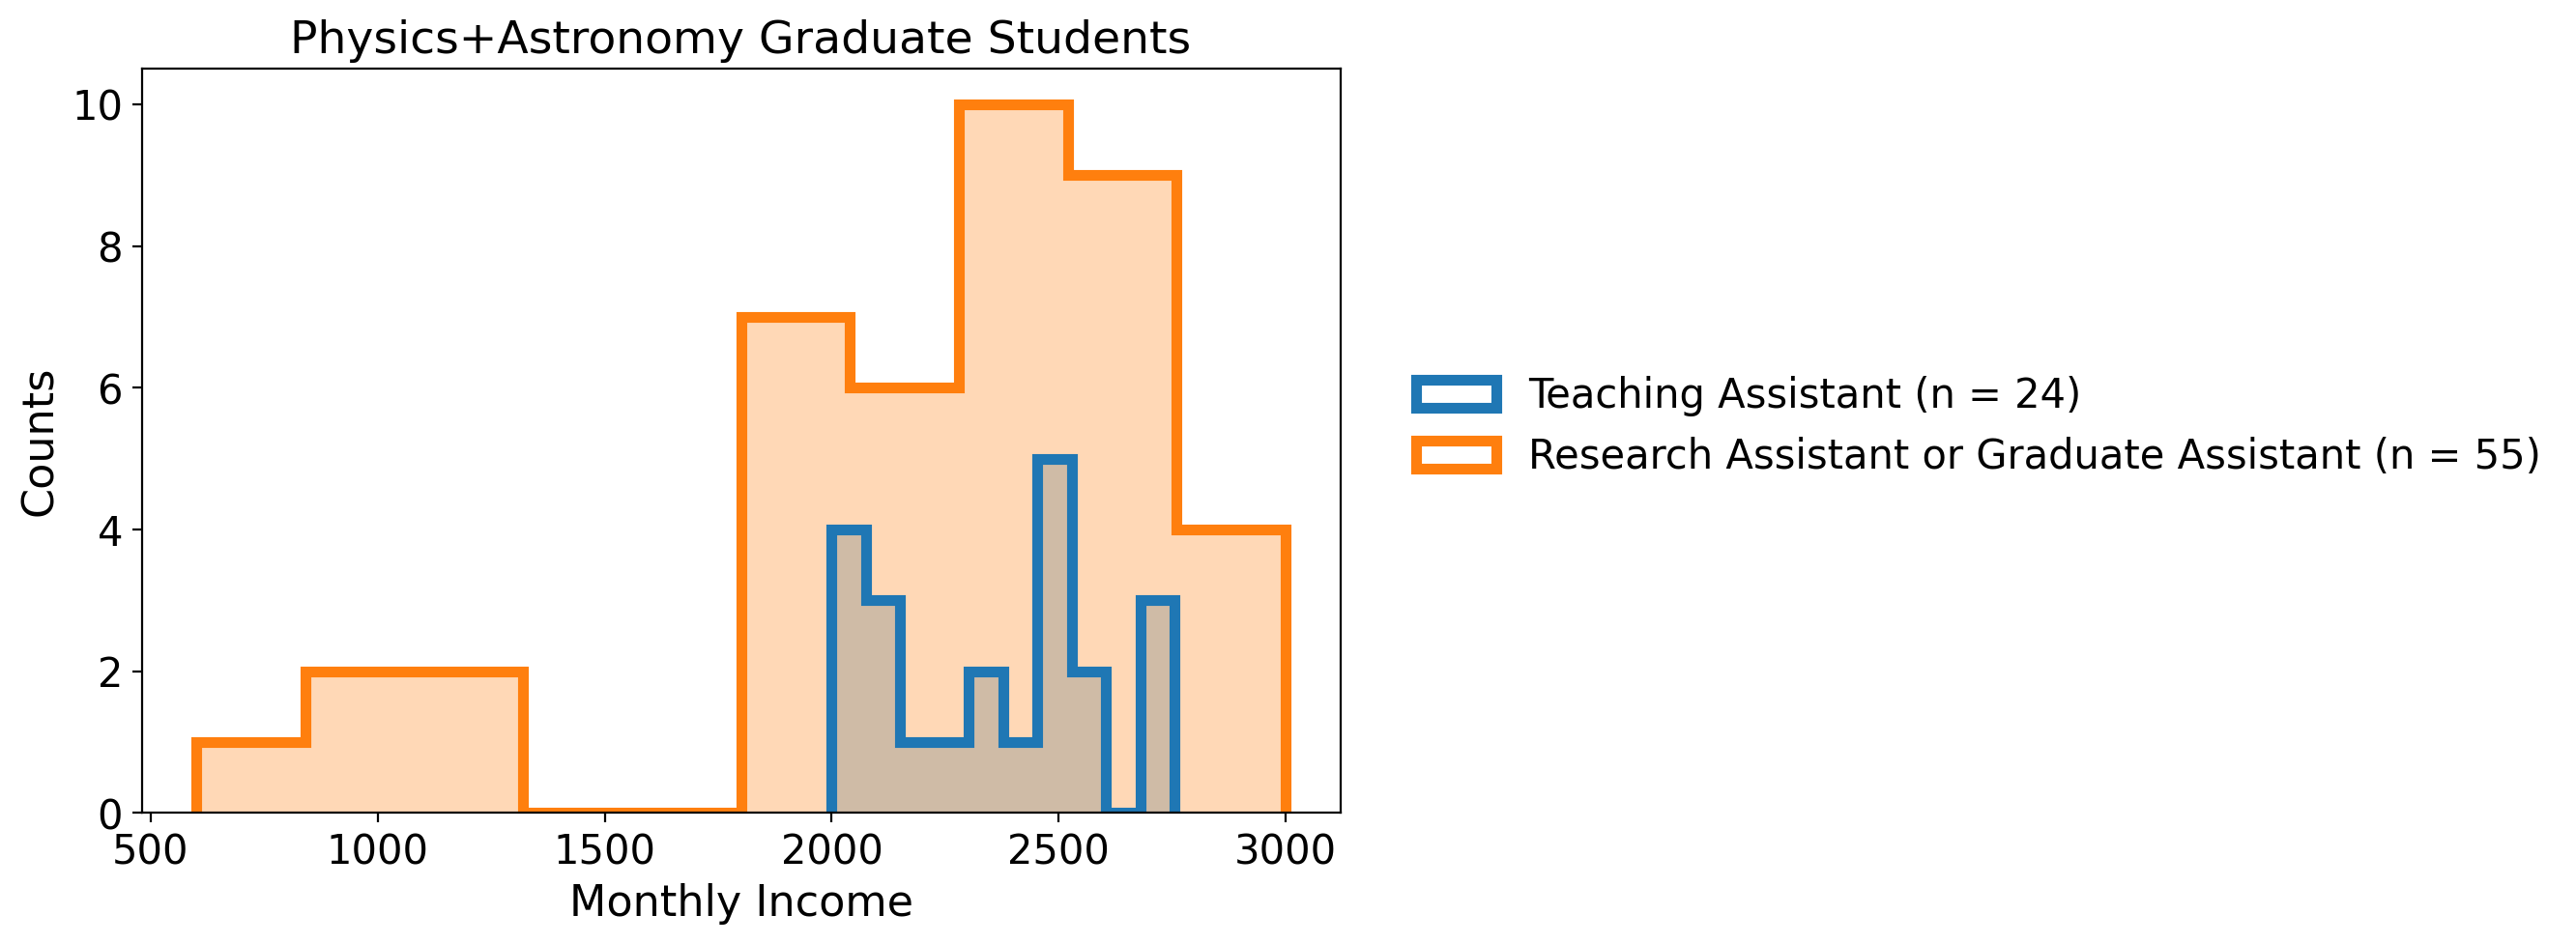

In [296]:
# Job type vs pay

fig, ax = plt.subplots(1, figsize=(8,5))

hours_jobs = anon_factor('Job', 'Monthly Income')

lbls = [' / '.join(anonymous_demo['Job'][i]) + f' (n = {len(hours_jobs[i])})' for i in range(3)]
leg_plots = []

for i, hj in enumerate(hours_jobs):
    if i==2:
        continue
    ax.axvline(hj.mean(), ls='-.', color=cm(i), linewidth=3)
    # ax.axvline(np.median(hj), ls='-', color=cm(i-1), linewidth=3)
    ax.hist(hj, alpha=.3, color=cm(i))
    ax.hist(hj, label=lbls[i], histtype='step', linewidth=4, color=cm(i))


for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
ax.set_title("Physics+Astronomy Graduate Students", fontsize=17)
ax.set_xlabel("Monthly Income", fontsize=16)
ax.set_ylabel("Counts", fontsize=16)
# ax.axvline(20, ls='--', color='black', linewidth=3, label='Part-time Employee')
# ax.axvline(40, ls='-', color='black', linewidth=3, label='Full-time Employee')
# ax.axvline(0, ls='-.', color='gray', linewidth=3, label='Mean of Category')
fig.legend(frameon=False, bbox_to_anchor=(1.7, .6), fontsize=15)



What's the cost of living for a single person? Assuming one adult with 0 children

6367 - https://www.bestplaces.net/cost_of_living/county/new_york/suffolk

8800 -  https://www.bestplaces.net/cost_of_living/city/ny/stony_brook

What's the average rent?

3162 - https://www.zumper.com/rent-research/stony-brook-university-ny

2081 - https://www.apartments.com/rent-market-trends/stony-brook-ny/

2150 - https://www.zillow.com/rental-manager/market-trends/stony-brook-ny/

2113 - https://www.census.gov/quickfacts/fact/table/suffolkcountynewyork/PST045216

Median Suffolk County Salary

9937 - https://fred.stlouisfed.org/series/MHINY36103A052NCEN

4962 - https://livingwage.mit.edu/counties/36103 (For a living wage)

In [340]:
avg_rent = np.mean([2081, 2150, 2113])
lowest_living_wage = 4962

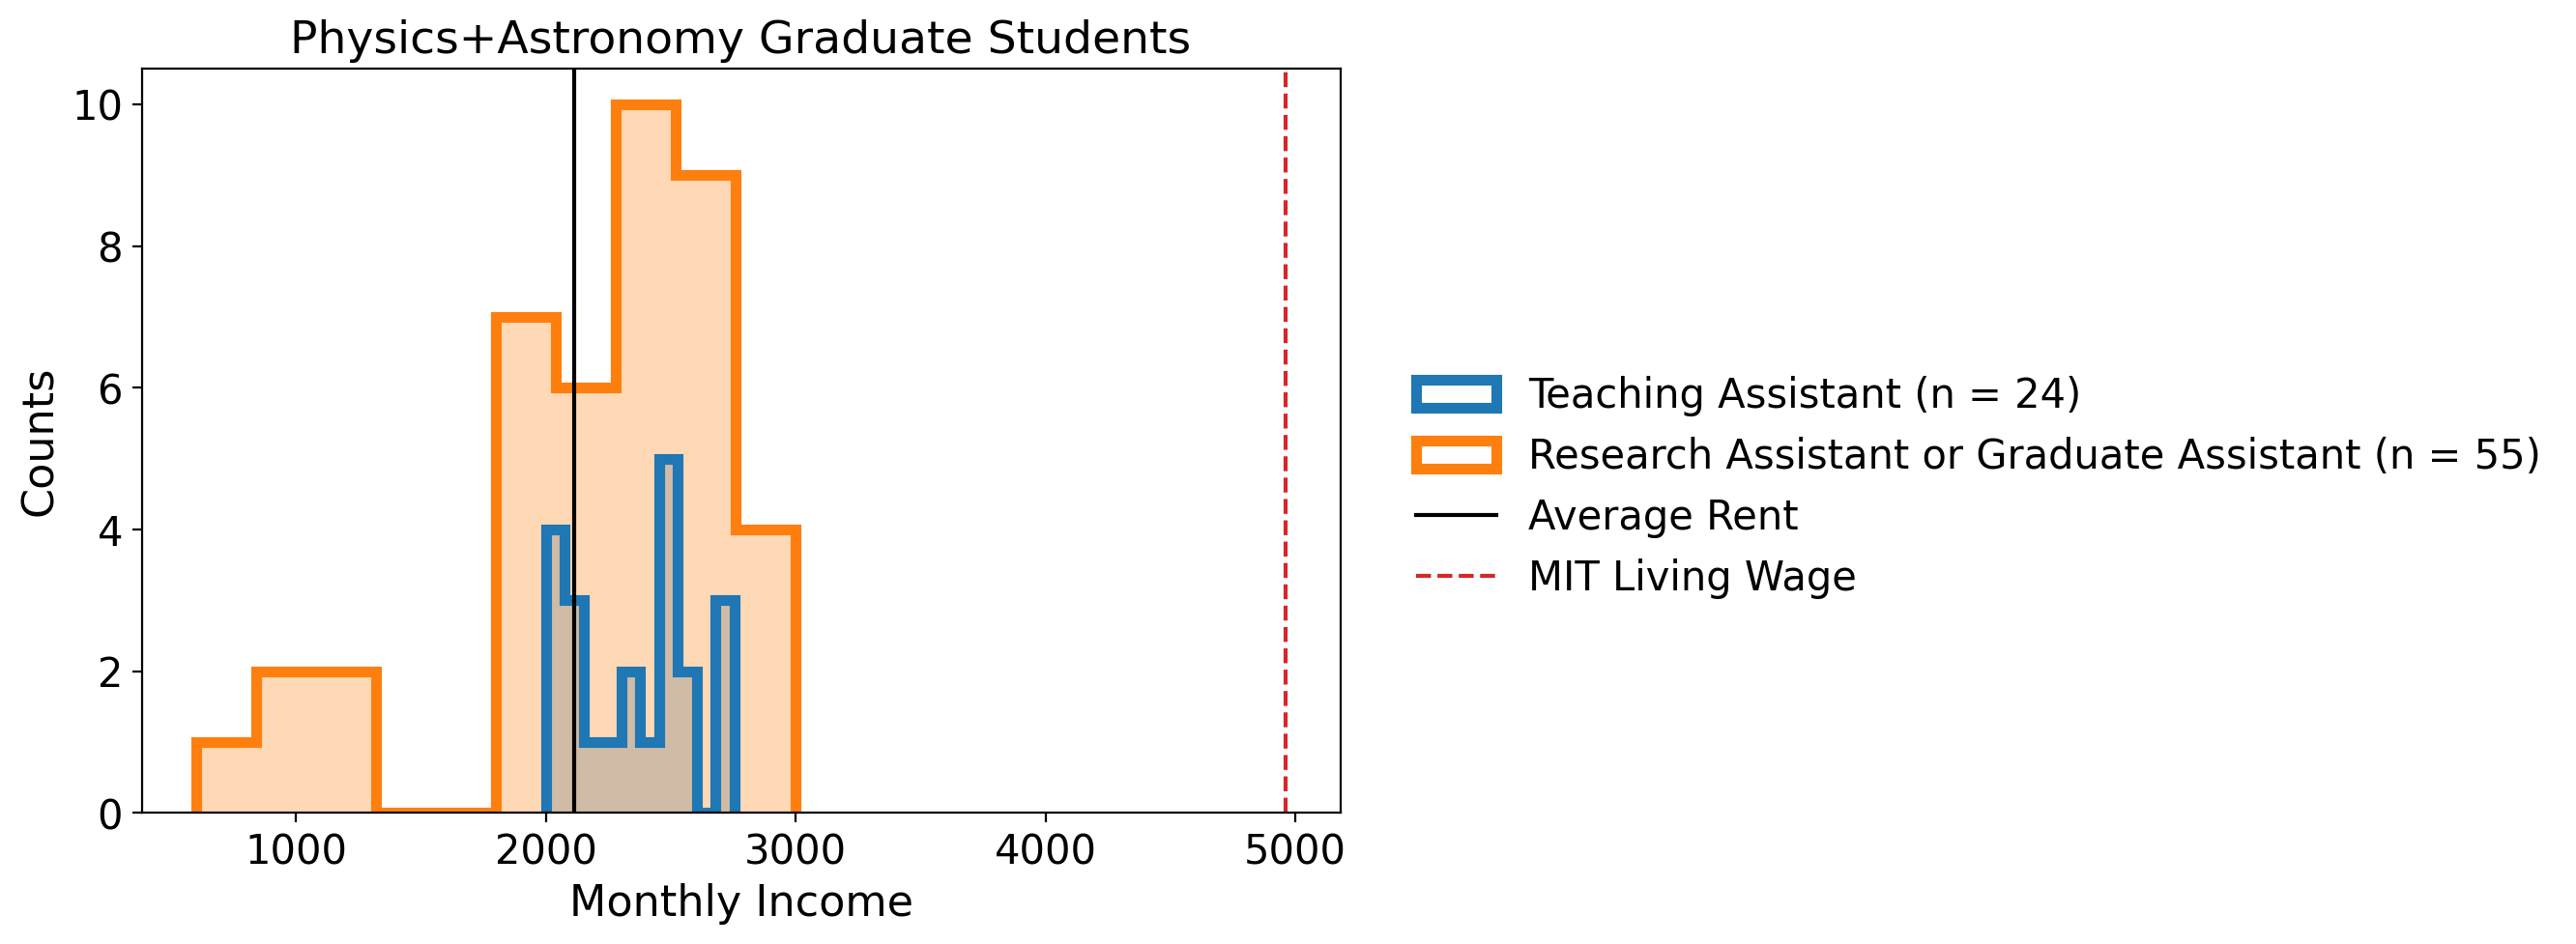

In [343]:
# Job type vs pay

fig, ax = plt.subplots(1, figsize=(8,5))

hours_jobs = anon_factor('Job', 'Monthly Income')

lbls = [' / '.join(anonymous_demo['Job'][i]) + f' (n = {len(hours_jobs[i])})' for i in range(3)]
leg_plots = []

for i, hj in enumerate(hours_jobs):
    if i==2:
        continue
    ax.axvline(hj.mean(), ls='-.', color=cm(i), linewidth=3)
    # ax.axvline(np.median(hj), ls='-', color=cm(i-1), linewidth=3)
    ax.hist(hj, alpha=.3, color=cm(i))
    ax.hist(hj, label=lbls[i], histtype='step', linewidth=4, color=cm(i))


for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
ax.set_title("Physics+Astronomy Graduate Students", fontsize=17)
ax.set_xlabel("Monthly Income", fontsize=16)
ax.set_ylabel("Counts", fontsize=16)

ax.axvline(avg_rent, ls='-', color='k', label="Average Rent")
ax.axvline(lowest_living_wage, ls='--', color='tab:red', label="MIT Living Wage")
# ax.axvline(20, ls='--', color='black', linewidth=3, label='Part-time Employee')
# ax.axvline(40, ls='-', color='black', linewidth=3, label='Full-time Employee')
# ax.axvline(0, ls='-.', color='gray', linewidth=3, label='Mean of Category')
fig.legend(frameon=False, bbox_to_anchor=(1.7, .6), fontsize=15)



# Snippets

In [ ]:
for dc in demographic_columns:
    anon_factor(

In [383]:
for vb in VariablesBelong:
    print(Questions[vb])

I am happy in the department.
I feel that I belong here.
The department provides an adequate sense of community.
The department-wide events help me to connect with my peers and professors.
The PGSA events help me to connect with my peers.


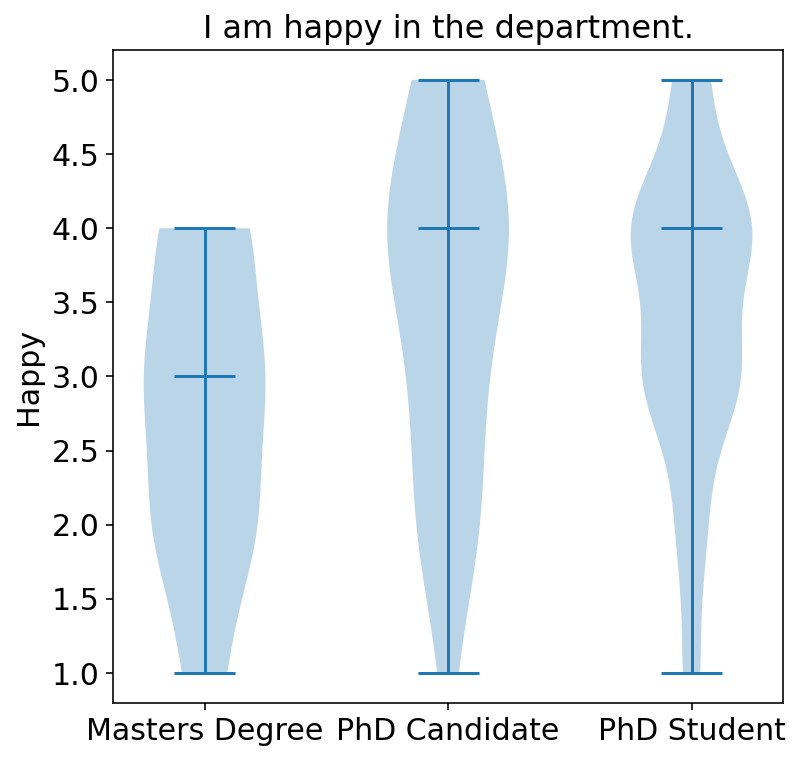

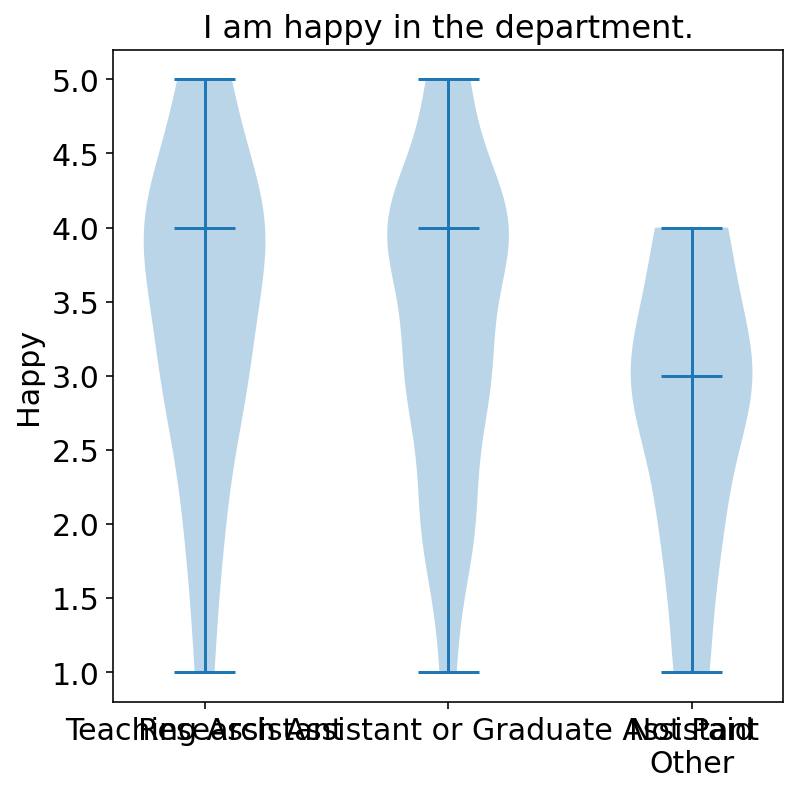

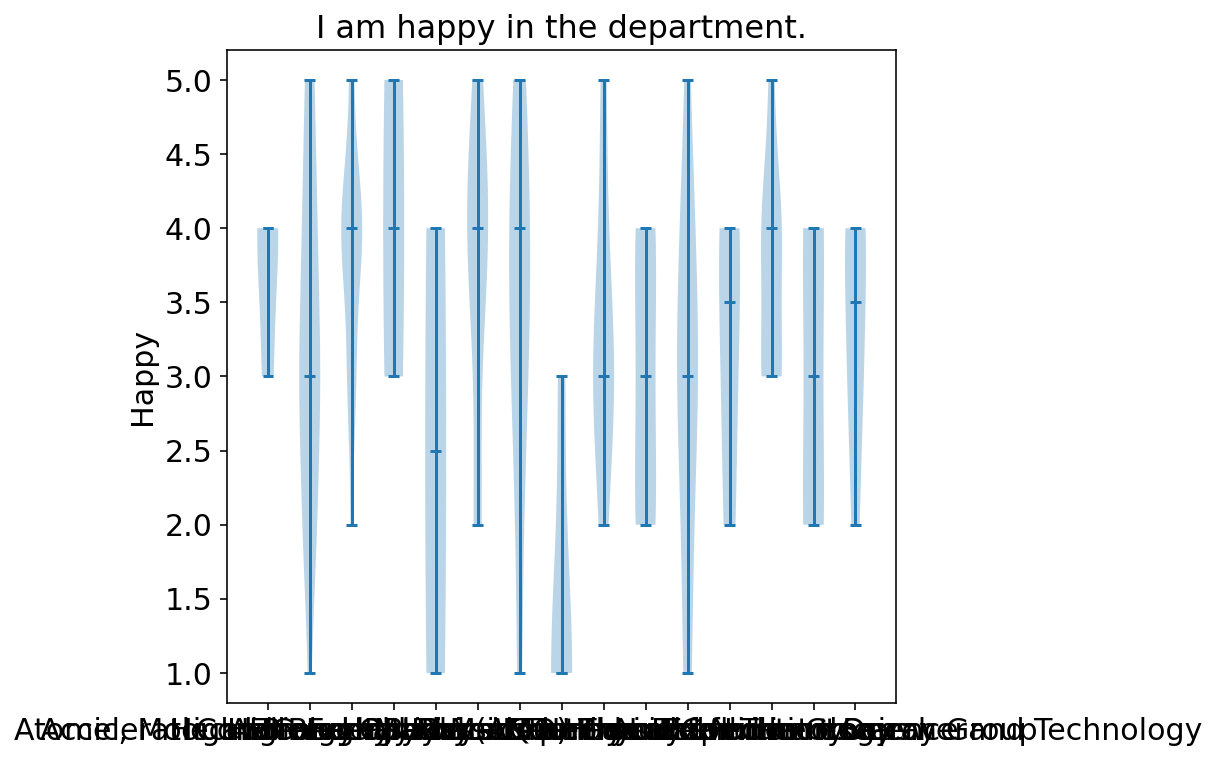

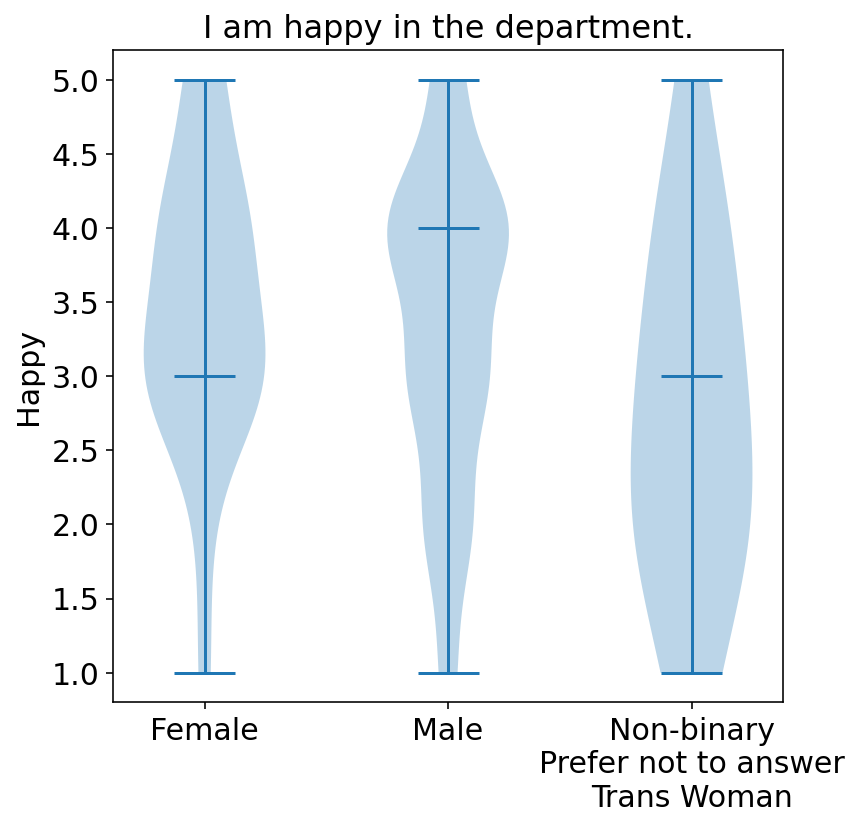

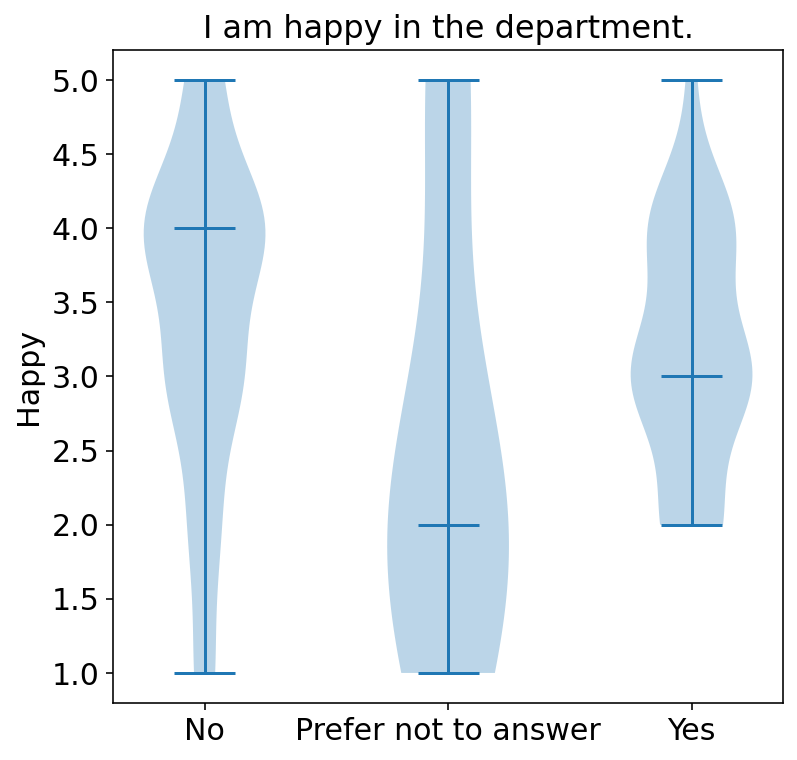

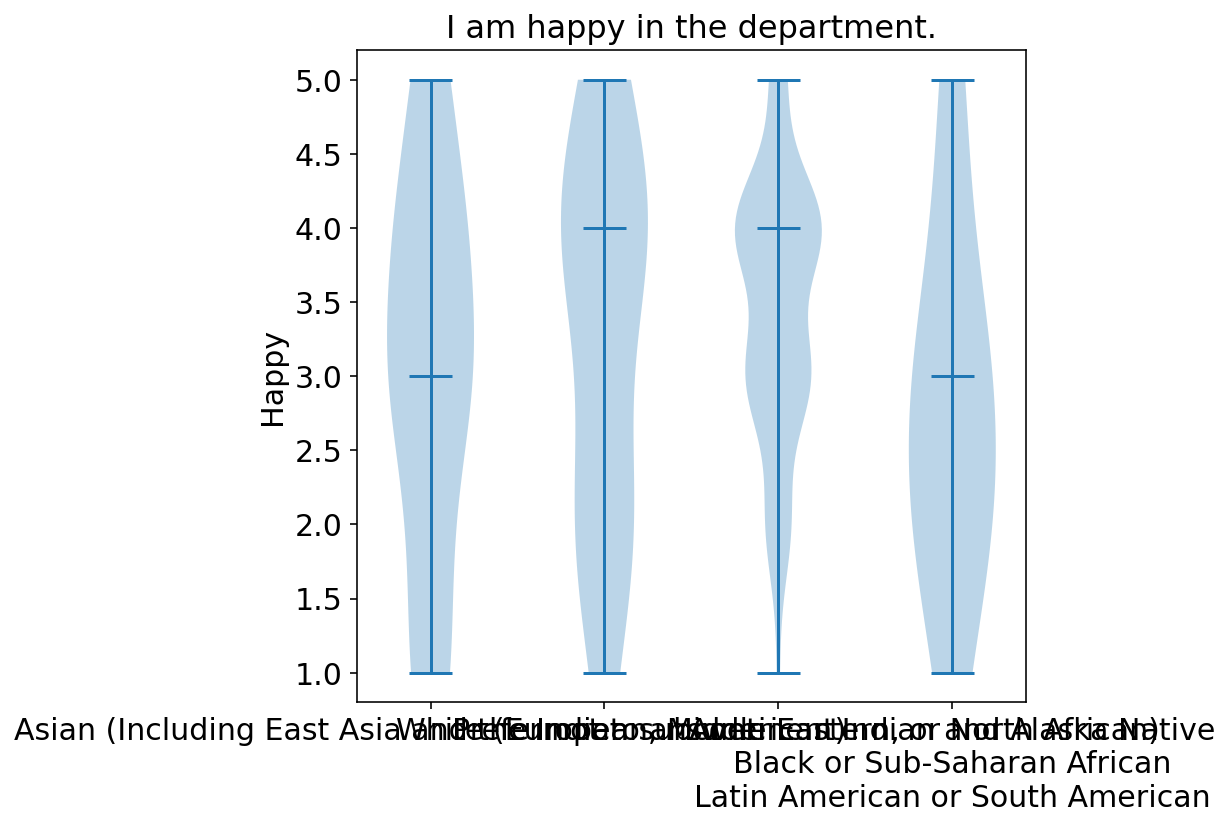

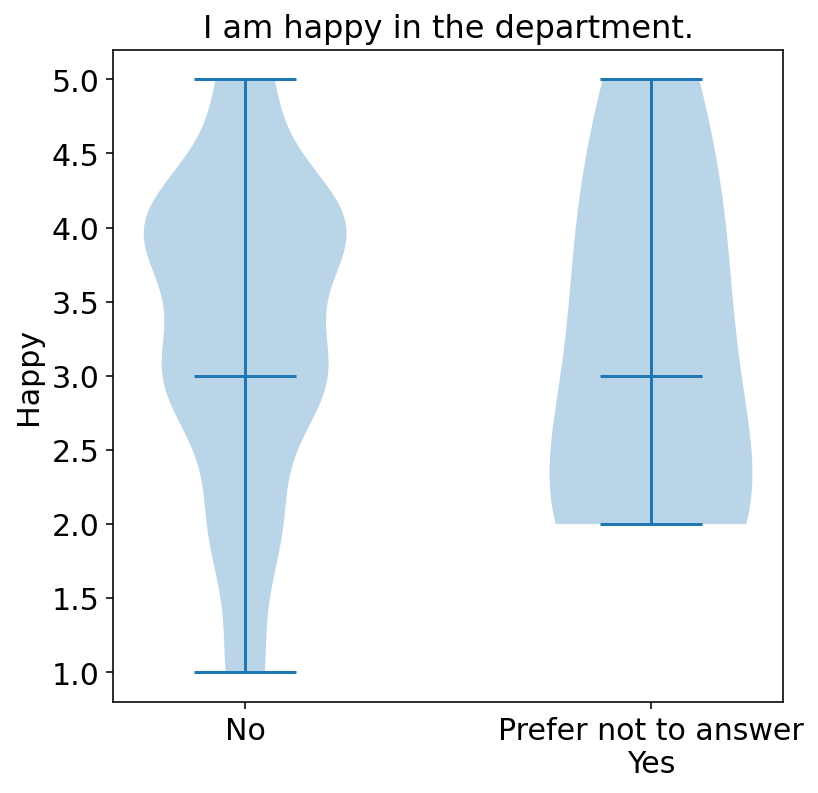

In [384]:
# for dc in demographic_columns:

#     fig, ax = plt.subplots(1, figsize=(6,6))
#     auto_violin_plot(dc, "Happy", fig, ax, rot=0, fontsize=15, show=False)
#     ax.set_title(f"{Questions['Happy']}", fontsize=16)

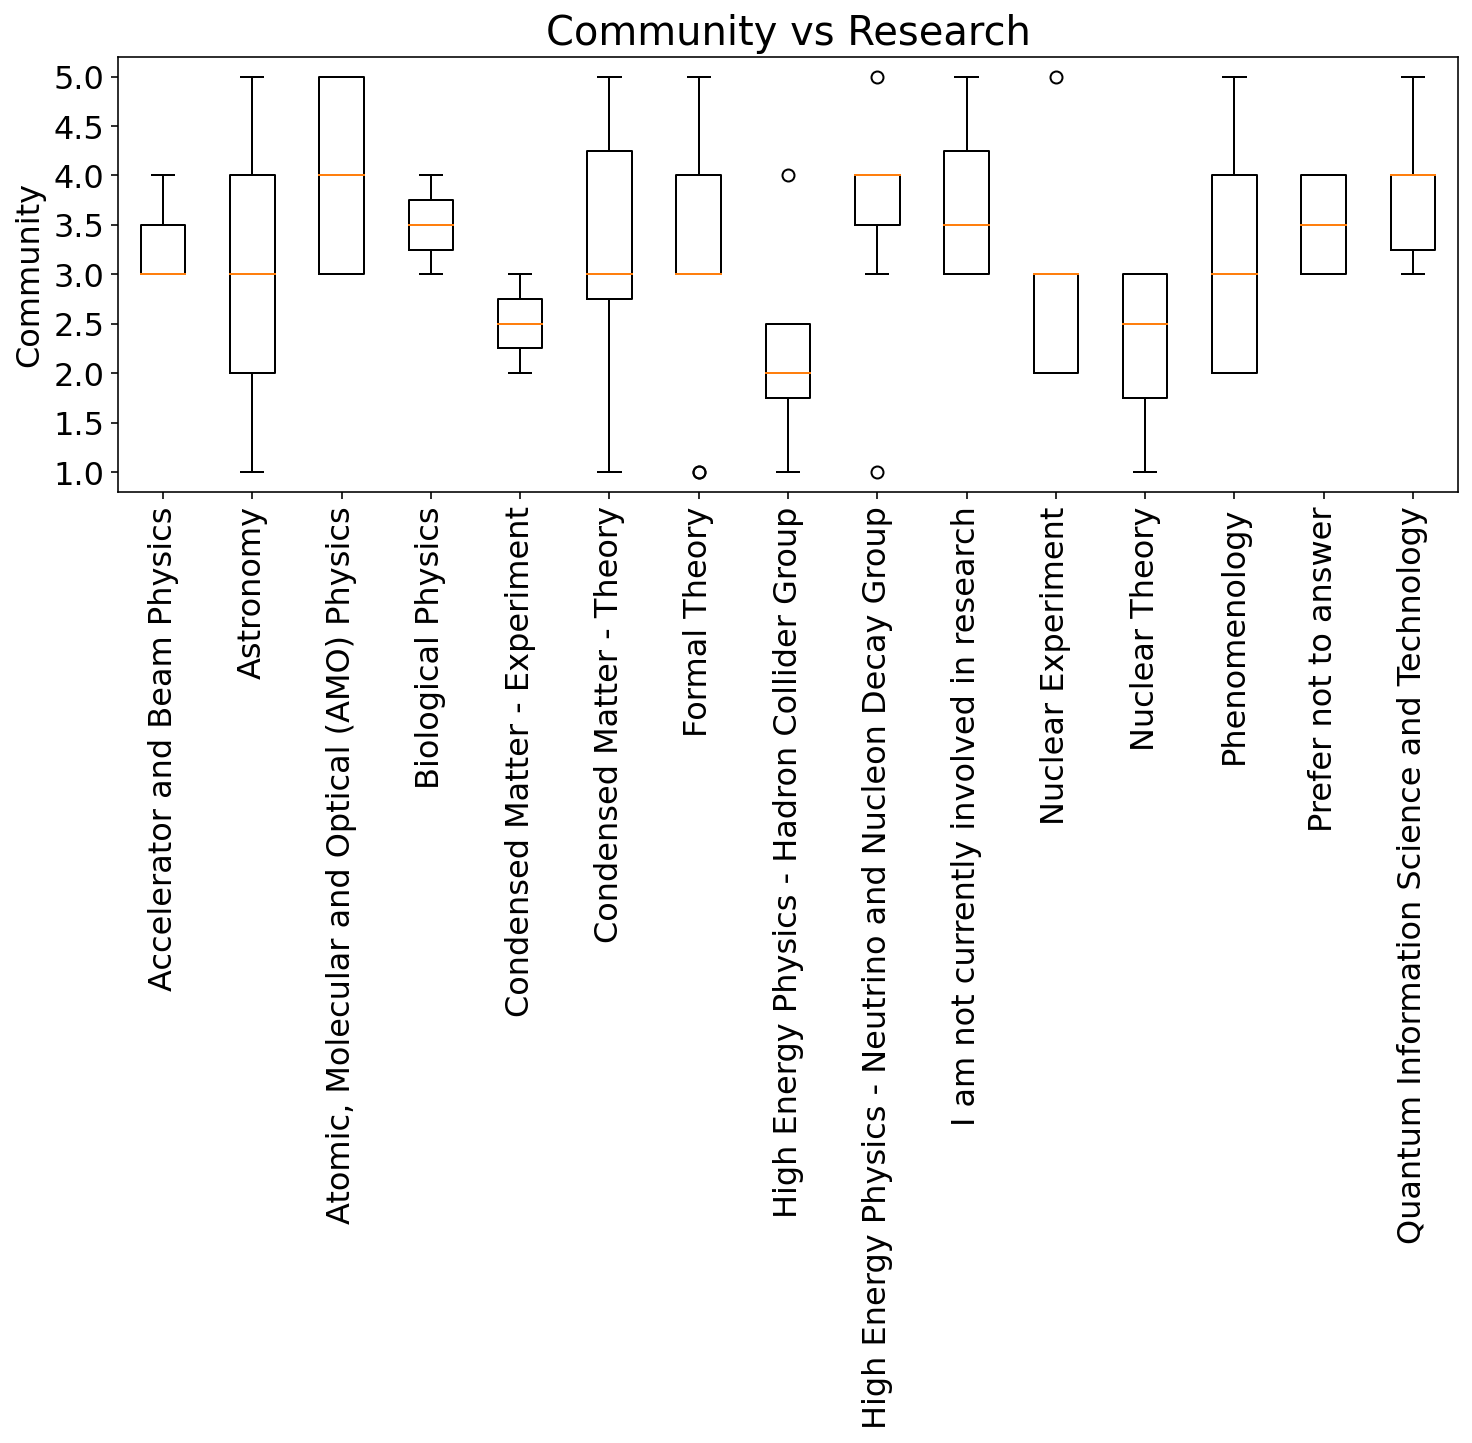

In [330]:
fig, ax = plt.subplots(1, figsize=(12,4))

kale = auto_box_plot("Research", VariablesBelong[2], figsize=(12,4), fontsize=16)


In [181]:
happy_gend = anon_factor("Gender", 'Happy')

In [117]:
# fig, ax = plt.subplots(1, figsize=(6,6))

# # plot violin plot
# ax.violinplot(happy_data,
#                   showmeans=False,
#                   showmedians=True)
# # ax.set_title('Happiness')

# ax.set_xticks(xticks+1, Races, fontsize=14, rotation=-45, ha='left');
# ax.set_ylabel("Happiness", fontsize=16)

# for item in (ax.get_xticklabels() + ax.get_yticklabels()):
#         item.set_fontsize(14)

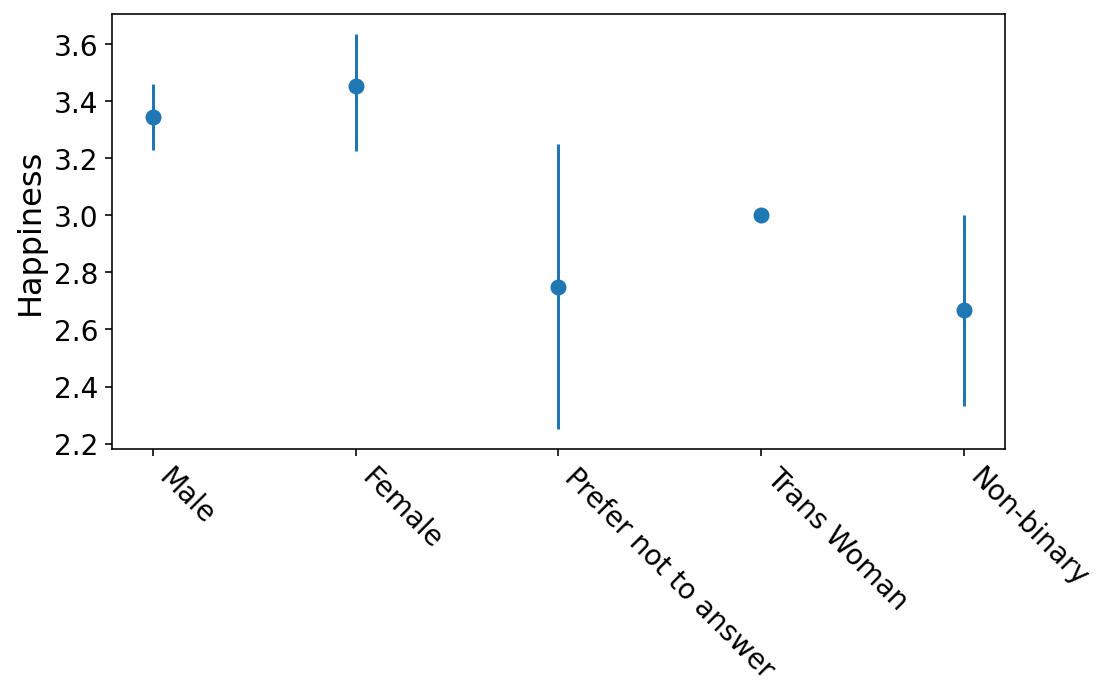

In [112]:
fig, ax = plt.subplots(1, figsize=(8,4))

xticks = np.arange(len(Genders))

ax.errorbar(xticks, happiness_gend, yerr=(np.abs(happiness_gend_ci)).T,
           ls='', marker='.', markersize=14)
ax.set_xticks(xticks, Genders, fontsize=14, rotation=-45, ha='left');
ax.set_ylabel("Happiness", fontsize=16)
# ax.set_xlabel("Demographic", fontsize=16)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

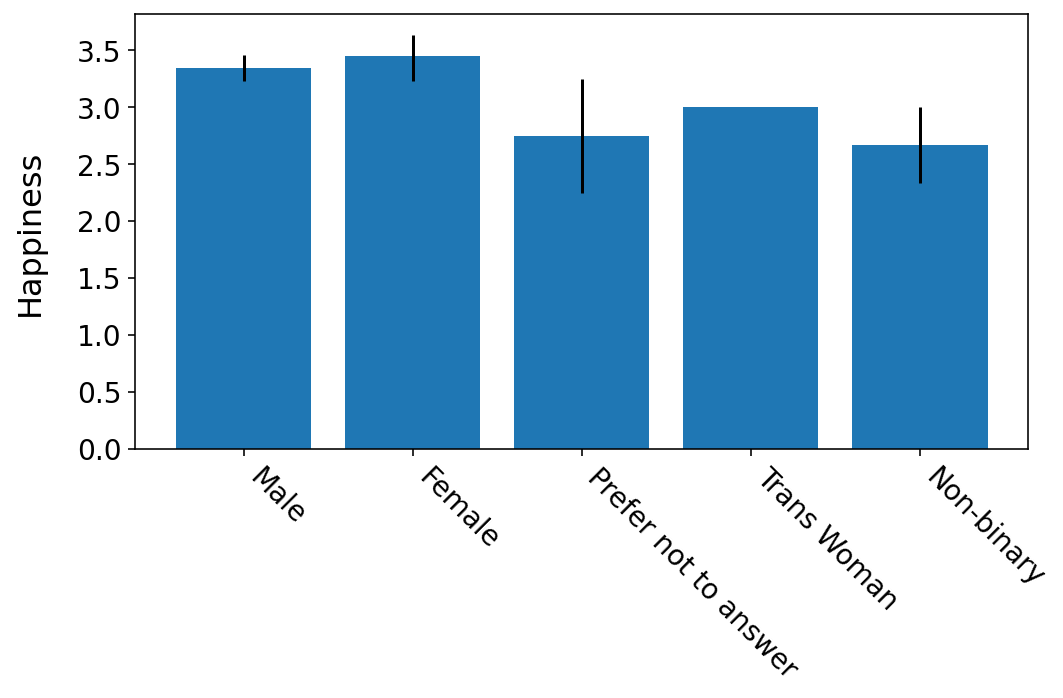

In [113]:
fig, ax = plt.subplots(1, figsize=(8,4))

xticks = np.arange(len(Genders))

ax.bar(xticks, happiness_gend, yerr=(np.abs(happiness_gend_ci)).T)
ax.set_xticks(xticks, Genders, fontsize=14, rotation=-45, ha='left')

ax.set_xticks(xticks, Genders, fontsize=14, rotation=-45, ha='left');
fig.supylabel("Happiness", fontsize=16)
# ax.set_xlabel("Demographic", fontsize=16)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)


In [237]:
# #TODO: Make this a function
# #TODO: Re-bin if we have fewer than 10 entries for a demographic
# # Might be worth to just hardcode the combined bins?

# happiness_gend = np.zeros(len(Genders)) # Mean of statistic
# happiness_gend_n = np.zeros_like(happiness_gend) # Number of samples 
# happiness_gend_ci = np.zeros((len(Genders),2)) # Estimate on 68% confidence interval

# for i,gend in enumerate(Genders):
#     gend_filt = QOLData['Gender'] == gend # Generate filter
#     rel_data = QOLData['Happy'][gend_filt] # Apply filter 
    
#     hg_mean = np.mean(rel_data)
#     hg_count = np.sum(gend_filt)
    
#     happiness_gend_n[i] =  hg_count  
#     happiness_gend[i] = hg_mean
    
#     if hg_count > 1:
#         boot_ci = stats.bootstrap([rel_data], np.mean, confidence_level=.68)
#         happiness_gend_ci[i] = boot_ci.confidence_interval
#         happiness_gend_ci[i] -= hg_mean
    


In [247]:
np.random.seed(0)
# x = rng.normal(0, 1, size=10000)
x = np.random.random(100)


In [253]:
np.histogram(x, bins=11)

(array([13, 12,  9,  7, 10, 11, 14,  7,  7, 10]),
 array([0.00469548, 0.10306331, 0.20143115, 0.29979898, 0.39816682,
        0.49653466, 0.59490249, 0.69327033, 0.79163817, 0.890006  ,
        0.98837384]))

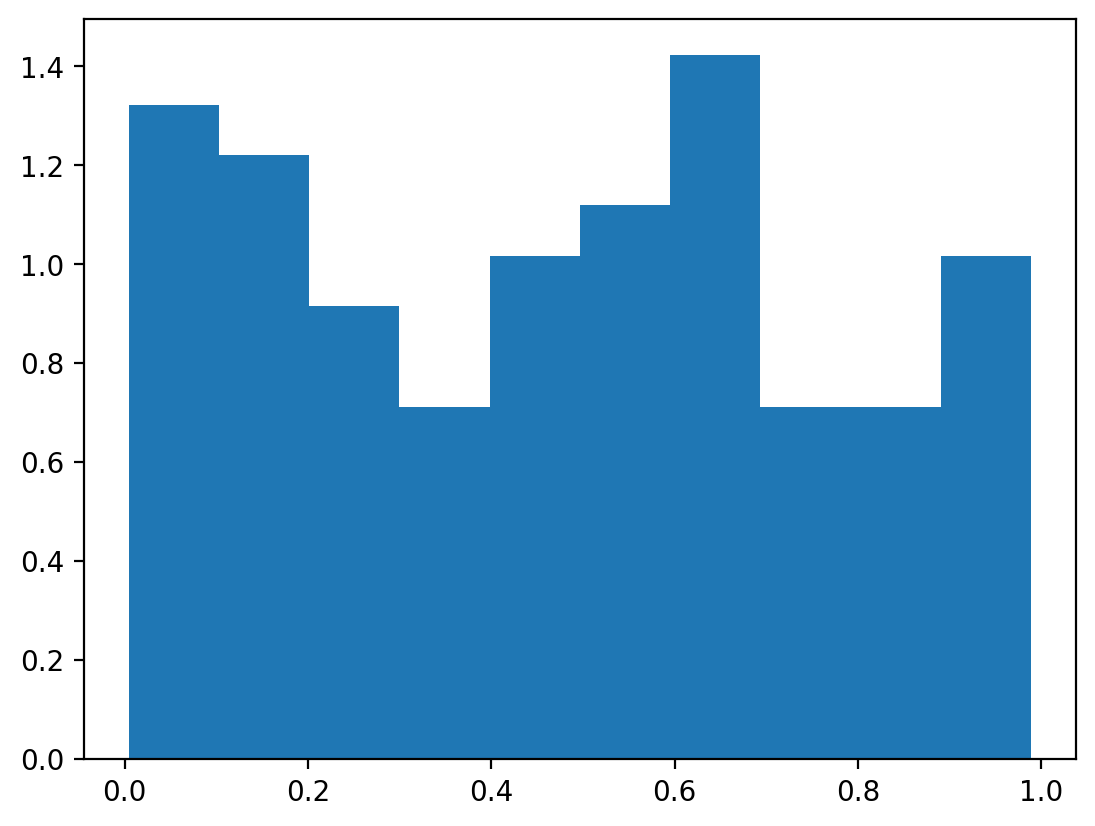

In [252]:
plt.hist(x, density=True, bins=10)
plt.show()